In [11]:
from DeepCodec import *
%matplotlib inline


In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
def batchtoimg(batchvectors):
    img = torch.zeros(32,32)
    tophalf,bottomhalf = batchvectors
    img[:16,:] = tophalf.view(16,32)
    img[16:,:] = bottomhalf.view(16,32)
    return img

In [3]:
GPU = torch.cuda.is_available()


In [12]:
#transform = transforms.Compose([transforms.ToTensor(),
#                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
transform = transforms.ToTensor()
trainset = torchvision.datasets.CIFAR10(root='./data',train=True, 
                                        download = True, transform=transform)
# Prepare Data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified


In [47]:

DC_data = torch.zeros(2*len(trainset),512,1)
for i,data in enumerate(trainset):
    images, labels = data
    #images = images / 2 + 0.5  
    gray = rgbtogray(images)
    # normalize
    gray = (gray-.5)*2
    H,W = gray.size()
    H2 = int(H/2)
    DC_data[2*i] = gray[:H2,:].view(512,1)
    DC_data[2*i+1] = gray[H2:,:].view(512,1)

DC_testdata = torch.zeros(2*len(testset),512,1)
for i,data in enumerate(testset):
    images, labels = data
    gray = rgbtogray(images)
    gray = (gray-.5)*2
    H,W = gray.size()
    H2 = int(H/2)
    DC_testdata[2*i] = gray[:H2,:].view(512,1)
    DC_testdata[2*i+1] = gray[H2:,:].view(512,1)


        

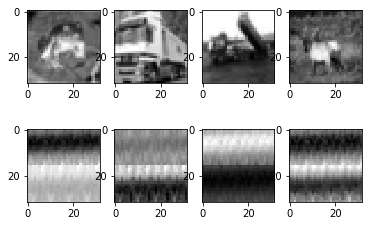

In [10]:
#DC_trainset = torch.utils.data.TensorDataset(DC_data,DC_data)
#DC_trainloader = torch.utils.data.DataLoader(DC_trainset, batch_size=batch_size,shuffle=True)
#dataiter = iter(testloader)
#images, labels = dataiter.next()
for i in range(4):
    img = batchtoimg(DC_data[2*i:2*(i+1)])
    plt.subplot(2,4,i+1)
    # print images
    imshow(img)
    
    inputVal = Variable(DC_data[2*i:2*(i+1)])
    if GPU:
        inputVal = inputVal.cuda()
    output = net(inputVal)
    netimg = batchtoimg(output.data)
    plt.subplot(2,4,4+i+1)
    imshow(netimg)

    

# Train on a few iterations

In [14]:
N = 512
r = 16
GPU = True
batch_size = 1000
net = DeepCodec(r)
if GPU:
    net.cuda()
DC_trainset = torch.utils.data.TensorDataset(DC_data,DC_data)
DC_trainloader = torch.utils.data.DataLoader(DC_trainset, batch_size=batch_size,shuffle=True)
train_net(net, DC_trainloader, num_epochs=25, GPU=GPU,
          weightpath='./weights/',save_epoch=500,
          lr=0.001,momentum=0.9,saveweights=False)

	[1,     1] loss: 0.023, 0.042 seconds elapsed
	[1,    11] loss: 0.233, 0.561 seconds elapsed
	[1,    21] loss: 0.233, 0.983 seconds elapsed
	[1,    31] loss: 0.234, 1.335 seconds elapsed
	[1,    41] loss: 0.232, 1.687 seconds elapsed
	[1,    51] loss: 0.233, 2.093 seconds elapsed
	[1,    61] loss: 0.232, 2.456 seconds elapsed
	[1,    71] loss: 0.229, 2.857 seconds elapsed
	[1,    81] loss: 0.229, 3.230 seconds elapsed
	[1,    91] loss: 0.228, 3.655 seconds elapsed
Epoch 1 Training Time: 3.984 seconds
Total Elapsed Time: 3.984 seconds
	[2,     1] loss: 0.023, 0.043 seconds elapsed
	[2,    11] loss: 0.233, 0.449 seconds elapsed
	[2,    21] loss: 0.232, 0.806 seconds elapsed
	[2,    31] loss: 0.230, 1.200 seconds elapsed
	[2,    41] loss: 0.233, 1.560 seconds elapsed
	[2,    51] loss: 0.230, 1.913 seconds elapsed
	[2,    61] loss: 0.227, 2.317 seconds elapsed
	[2,    71] loss: 0.231, 2.677 seconds elapsed
	[2,    81] loss: 0.229, 3.073 seconds elapsed
	[2,    91] loss: 0.230, 3.451 secon

	[16,    11] loss: 0.127, 0.386 seconds elapsed
	[16,    21] loss: 0.127, 0.785 seconds elapsed
	[16,    31] loss: 0.127, 1.143 seconds elapsed
	[16,    41] loss: 0.127, 1.535 seconds elapsed
	[16,    51] loss: 0.125, 1.886 seconds elapsed
	[16,    61] loss: 0.126, 2.273 seconds elapsed
	[16,    71] loss: 0.126, 2.621 seconds elapsed
	[16,    81] loss: 0.125, 2.981 seconds elapsed
	[16,    91] loss: 0.126, 3.373 seconds elapsed
Epoch 16 Training Time: 3.693 seconds
Total Elapsed Time: 60.252 seconds
	[17,     1] loss: 0.013, 0.038 seconds elapsed
	[17,    11] loss: 0.124, 0.425 seconds elapsed
	[17,    21] loss: 0.124, 0.781 seconds elapsed
	[17,    31] loss: 0.123, 1.176 seconds elapsed
	[17,    41] loss: 0.124, 1.526 seconds elapsed
	[17,    51] loss: 0.124, 1.922 seconds elapsed
	[17,    61] loss: 0.124, 2.282 seconds elapsed
	[17,    71] loss: 0.123, 2.672 seconds elapsed
	[17,    81] loss: 0.122, 3.038 seconds elapsed
	[17,    91] loss: 0.123, 3.387 seconds elapsed
Epoch 17 Traini

### Compare to untrained net after 5 epochs

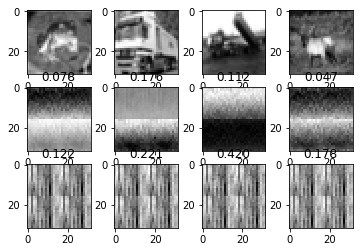

In [18]:
#DC_trainset = torch.utils.data.TensorDataset(DC_data,DC_data)
#DC_trainloader = torch.utils.data.DataLoader(DC_trainset, batch_size=batch_size,shuffle=True)
#dataiter = iter(testloader)
#images, labels = dataiter.next()
untrainednet = DeepCodec(r)
if GPU:
    untrainednet.cuda()
for i in range(4):
    img = batchtoimg(DC_data[2*i:2*(i+1)])
    plt.subplot(3,4,i+1)
    # print images
    imshow(img)
    
    inputVal = Variable(DC_data[2*i:2*(i+1)])
    if GPU:
        inputVal = inputVal.cuda()
    output = net(inputVal)
    netimg = batchtoimg(output.data)
    plt.subplot(3,4,4+i+1)
    imshow(netimg)
    plt.title('%.3f' % torch.mean((img-netimg)**2))
    
    output2 = untrainednet(inputVal)
    netimg2 = batchtoimg(output2.data)
    plt.subplot(3,4,8+i+1)
    imshow(netimg2)
    plt.title('%.3f' % torch.mean((img-netimg2)**2))


# Train on 5000 epochs

In [19]:
N = 512
r = 16
GPU = True
batch_size = 1000
net = DeepCodec(r)
if GPU:
    net.cuda()
DC_trainset = torch.utils.data.TensorDataset(DC_data,DC_data)
DC_trainloader = torch.utils.data.DataLoader(DC_trainset, batch_size=batch_size,shuffle=True)
train_net(net, DC_trainloader, num_epochs=5000, GPU=GPU,
          weightpath='./weights/',save_epoch=500,
          lr=0.001,momentum=0.9,saveweights=True)

	[1,     1] loss: 0.023, 0.043 seconds elapsed
	[1,    11] loss: 0.235, 0.627 seconds elapsed
	[1,    21] loss: 0.231, 0.991 seconds elapsed
	[1,    31] loss: 0.233, 1.399 seconds elapsed
	[1,    41] loss: 0.231, 1.779 seconds elapsed
	[1,    51] loss: 0.233, 2.186 seconds elapsed
	[1,    61] loss: 0.233, 2.548 seconds elapsed
	[1,    71] loss: 0.230, 2.897 seconds elapsed
	[1,    81] loss: 0.231, 3.286 seconds elapsed
	[1,    91] loss: 0.229, 3.646 seconds elapsed
Epoch 1 Training Time: 4.001 seconds
Total Elapsed Time: 4.001 seconds
	[2,     1] loss: 0.023, 0.038 seconds elapsed
	[2,    11] loss: 0.230, 0.385 seconds elapsed
	[2,    21] loss: 0.231, 0.772 seconds elapsed
	[2,    31] loss: 0.229, 1.119 seconds elapsed
	[2,    41] loss: 0.230, 1.506 seconds elapsed
	[2,    51] loss: 0.233, 1.854 seconds elapsed
	[2,    61] loss: 0.233, 2.244 seconds elapsed
	[2,    71] loss: 0.229, 2.593 seconds elapsed
	[2,    81] loss: 0.228, 2.961 seconds elapsed
	[2,    91] loss: 0.228, 3.362 secon

	[16,    11] loss: 0.136, 0.445 seconds elapsed
	[16,    21] loss: 0.134, 0.794 seconds elapsed
	[16,    31] loss: 0.134, 1.205 seconds elapsed
	[16,    41] loss: 0.134, 1.563 seconds elapsed
	[16,    51] loss: 0.135, 1.969 seconds elapsed
	[16,    61] loss: 0.134, 2.330 seconds elapsed
	[16,    71] loss: 0.132, 2.731 seconds elapsed
	[16,    81] loss: 0.133, 3.080 seconds elapsed
	[16,    91] loss: 0.134, 3.480 seconds elapsed
Epoch 16 Training Time: 3.799 seconds
Total Elapsed Time: 60.502 seconds
	[17,     1] loss: 0.013, 0.038 seconds elapsed
	[17,    11] loss: 0.132, 0.387 seconds elapsed
	[17,    21] loss: 0.132, 0.788 seconds elapsed
	[17,    31] loss: 0.131, 1.136 seconds elapsed
	[17,    41] loss: 0.130, 1.526 seconds elapsed
	[17,    51] loss: 0.129, 1.898 seconds elapsed
	[17,    61] loss: 0.129, 2.303 seconds elapsed
	[17,    71] loss: 0.128, 2.667 seconds elapsed
	[17,    81] loss: 0.128, 3.070 seconds elapsed
	[17,    91] loss: 0.129, 3.428 seconds elapsed
Epoch 17 Traini

	[31,    11] loss: 0.106, 0.429 seconds elapsed
	[31,    21] loss: 0.104, 0.854 seconds elapsed
	[31,    31] loss: 0.105, 1.235 seconds elapsed
	[31,    41] loss: 0.105, 1.608 seconds elapsed
	[31,    51] loss: 0.105, 2.016 seconds elapsed
	[31,    61] loss: 0.106, 2.376 seconds elapsed
	[31,    71] loss: 0.105, 2.785 seconds elapsed
	[31,    81] loss: 0.104, 3.152 seconds elapsed
	[31,    91] loss: 0.104, 3.546 seconds elapsed
Epoch 31 Training Time: 3.896 seconds
Total Elapsed Time: 117.788 seconds
	[32,     1] loss: 0.011, 0.043 seconds elapsed
	[32,    11] loss: 0.104, 0.442 seconds elapsed
	[32,    21] loss: 0.103, 0.800 seconds elapsed
	[32,    31] loss: 0.103, 1.203 seconds elapsed
	[32,    41] loss: 0.104, 1.568 seconds elapsed
	[32,    51] loss: 0.104, 1.924 seconds elapsed
	[32,    61] loss: 0.104, 2.357 seconds elapsed
	[32,    71] loss: 0.105, 2.727 seconds elapsed
	[32,    81] loss: 0.104, 3.117 seconds elapsed
	[32,    91] loss: 0.105, 3.469 seconds elapsed
Epoch 32 Train

	[46,    11] loss: 0.101, 0.394 seconds elapsed
	[46,    21] loss: 0.100, 0.804 seconds elapsed
	[46,    31] loss: 0.101, 1.160 seconds elapsed
	[46,    41] loss: 0.102, 1.551 seconds elapsed
	[46,    51] loss: 0.100, 1.929 seconds elapsed
	[46,    61] loss: 0.101, 2.328 seconds elapsed
	[46,    71] loss: 0.101, 2.692 seconds elapsed
	[46,    81] loss: 0.100, 3.070 seconds elapsed
	[46,    91] loss: 0.100, 3.484 seconds elapsed
Epoch 46 Training Time: 3.805 seconds
Total Elapsed Time: 174.484 seconds
	[47,     1] loss: 0.010, 0.049 seconds elapsed
	[47,    11] loss: 0.100, 0.471 seconds elapsed
	[47,    21] loss: 0.100, 0.842 seconds elapsed
	[47,    31] loss: 0.101, 1.266 seconds elapsed
	[47,    41] loss: 0.100, 1.665 seconds elapsed
	[47,    51] loss: 0.100, 2.099 seconds elapsed
	[47,    61] loss: 0.101, 2.474 seconds elapsed
	[47,    71] loss: 0.099, 2.865 seconds elapsed
	[47,    81] loss: 0.101, 3.224 seconds elapsed
	[47,    91] loss: 0.101, 3.578 seconds elapsed
Epoch 47 Train

	[61,    11] loss: 0.095, 0.410 seconds elapsed
	[61,    21] loss: 0.095, 0.809 seconds elapsed
	[61,    31] loss: 0.093, 1.158 seconds elapsed
	[61,    41] loss: 0.095, 1.549 seconds elapsed
	[61,    51] loss: 0.093, 1.899 seconds elapsed
	[61,    61] loss: 0.094, 2.292 seconds elapsed
	[61,    71] loss: 0.094, 2.645 seconds elapsed
	[61,    81] loss: 0.094, 3.039 seconds elapsed
	[61,    91] loss: 0.096, 3.396 seconds elapsed
Epoch 61 Training Time: 3.731 seconds
Total Elapsed Time: 231.150 seconds
	[62,     1] loss: 0.010, 0.085 seconds elapsed
	[62,    11] loss: 0.094, 0.450 seconds elapsed
	[62,    21] loss: 0.093, 0.819 seconds elapsed
	[62,    31] loss: 0.094, 1.261 seconds elapsed
	[62,    41] loss: 0.094, 1.621 seconds elapsed
	[62,    51] loss: 0.094, 2.016 seconds elapsed
	[62,    61] loss: 0.094, 2.382 seconds elapsed
	[62,    71] loss: 0.093, 2.777 seconds elapsed
	[62,    81] loss: 0.094, 3.132 seconds elapsed
	[62,    91] loss: 0.094, 3.537 seconds elapsed
Epoch 62 Train

	[76,    11] loss: 0.076, 0.429 seconds elapsed
	[76,    21] loss: 0.077, 0.781 seconds elapsed
	[76,    31] loss: 0.077, 1.170 seconds elapsed
	[76,    41] loss: 0.077, 1.532 seconds elapsed
	[76,    51] loss: 0.076, 1.882 seconds elapsed
	[76,    61] loss: 0.076, 2.282 seconds elapsed
	[76,    71] loss: 0.076, 2.634 seconds elapsed
	[76,    81] loss: 0.076, 3.022 seconds elapsed
	[76,    91] loss: 0.076, 3.377 seconds elapsed
Epoch 76 Training Time: 3.750 seconds
Total Elapsed Time: 287.653 seconds
	[77,     1] loss: 0.007, 0.038 seconds elapsed
	[77,    11] loss: 0.076, 0.396 seconds elapsed
	[77,    21] loss: 0.077, 0.796 seconds elapsed
	[77,    31] loss: 0.075, 1.147 seconds elapsed
	[77,    41] loss: 0.075, 1.561 seconds elapsed
	[77,    51] loss: 0.077, 1.916 seconds elapsed
	[77,    61] loss: 0.076, 2.266 seconds elapsed
	[77,    71] loss: 0.076, 2.661 seconds elapsed
	[77,    81] loss: 0.077, 3.026 seconds elapsed
	[77,    91] loss: 0.076, 3.437 seconds elapsed
Epoch 77 Train

	[91,    11] loss: 0.073, 0.433 seconds elapsed
	[91,    21] loss: 0.072, 0.794 seconds elapsed
	[91,    31] loss: 0.073, 1.190 seconds elapsed
	[91,    41] loss: 0.072, 1.546 seconds elapsed
	[91,    51] loss: 0.073, 1.935 seconds elapsed
	[91,    61] loss: 0.072, 2.285 seconds elapsed
	[91,    71] loss: 0.073, 2.674 seconds elapsed
	[91,    81] loss: 0.073, 3.023 seconds elapsed
	[91,    91] loss: 0.073, 3.373 seconds elapsed
Epoch 91 Training Time: 3.737 seconds
Total Elapsed Time: 344.128 seconds
	[92,     1] loss: 0.007, 0.041 seconds elapsed
	[92,    11] loss: 0.073, 0.398 seconds elapsed
	[92,    21] loss: 0.073, 0.785 seconds elapsed
	[92,    31] loss: 0.072, 1.156 seconds elapsed
	[92,    41] loss: 0.073, 1.546 seconds elapsed
	[92,    51] loss: 0.072, 1.899 seconds elapsed
	[92,    61] loss: 0.072, 2.290 seconds elapsed
	[92,    71] loss: 0.073, 2.639 seconds elapsed
	[92,    81] loss: 0.073, 3.054 seconds elapsed
	[92,    91] loss: 0.073, 3.404 seconds elapsed
Epoch 92 Train

	[105,    91] loss: 0.071, 3.409 seconds elapsed
Epoch 105 Training Time: 3.733 seconds
Total Elapsed Time: 397.294 seconds
	[106,     1] loss: 0.007, 0.077 seconds elapsed
	[106,    11] loss: 0.071, 0.441 seconds elapsed
	[106,    21] loss: 0.071, 0.813 seconds elapsed
	[106,    31] loss: 0.070, 1.216 seconds elapsed
	[106,    41] loss: 0.070, 1.565 seconds elapsed
	[106,    51] loss: 0.071, 1.955 seconds elapsed
	[106,    61] loss: 0.071, 2.317 seconds elapsed
	[106,    71] loss: 0.070, 2.718 seconds elapsed
	[106,    81] loss: 0.071, 3.067 seconds elapsed
	[106,    91] loss: 0.072, 3.460 seconds elapsed
Epoch 106 Training Time: 3.781 seconds
Total Elapsed Time: 401.076 seconds
	[107,     1] loss: 0.007, 0.041 seconds elapsed
	[107,    11] loss: 0.071, 0.442 seconds elapsed
	[107,    21] loss: 0.070, 0.820 seconds elapsed
	[107,    31] loss: 0.070, 1.170 seconds elapsed
	[107,    41] loss: 0.071, 1.568 seconds elapsed
	[107,    51] loss: 0.071, 1.916 seconds elapsed
	[107,    61] los

	[120,    41] loss: 0.070, 1.553 seconds elapsed
	[120,    51] loss: 0.069, 1.911 seconds elapsed
	[120,    61] loss: 0.069, 2.304 seconds elapsed
	[120,    71] loss: 0.069, 2.663 seconds elapsed
	[120,    81] loss: 0.069, 3.067 seconds elapsed
	[120,    91] loss: 0.070, 3.433 seconds elapsed
Epoch 120 Training Time: 3.796 seconds
Total Elapsed Time: 453.607 seconds
	[121,     1] loss: 0.007, 0.037 seconds elapsed
	[121,    11] loss: 0.069, 0.392 seconds elapsed
	[121,    21] loss: 0.069, 0.785 seconds elapsed
	[121,    31] loss: 0.069, 1.139 seconds elapsed
	[121,    41] loss: 0.070, 1.527 seconds elapsed
	[121,    51] loss: 0.070, 1.878 seconds elapsed
	[121,    61] loss: 0.069, 2.232 seconds elapsed
	[121,    71] loss: 0.069, 2.632 seconds elapsed
	[121,    81] loss: 0.069, 2.988 seconds elapsed
	[121,    91] loss: 0.069, 3.386 seconds elapsed
Epoch 121 Training Time: 3.700 seconds
Total Elapsed Time: 457.307 seconds
	[122,     1] loss: 0.007, 0.041 seconds elapsed
	[122,    11] los

Epoch 134 Training Time: 3.724 seconds
Total Elapsed Time: 506.046 seconds
	[135,     1] loss: 0.007, 0.038 seconds elapsed
	[135,    11] loss: 0.069, 0.446 seconds elapsed
	[135,    21] loss: 0.068, 0.794 seconds elapsed
	[135,    31] loss: 0.068, 1.190 seconds elapsed
	[135,    41] loss: 0.068, 1.560 seconds elapsed
	[135,    51] loss: 0.069, 1.949 seconds elapsed
	[135,    61] loss: 0.068, 2.298 seconds elapsed
	[135,    71] loss: 0.068, 2.698 seconds elapsed
	[135,    81] loss: 0.068, 3.051 seconds elapsed
	[135,    91] loss: 0.069, 3.401 seconds elapsed
Epoch 135 Training Time: 3.754 seconds
Total Elapsed Time: 509.800 seconds
	[136,     1] loss: 0.007, 0.038 seconds elapsed
	[136,    11] loss: 0.068, 0.386 seconds elapsed
	[136,    21] loss: 0.068, 0.771 seconds elapsed
	[136,    31] loss: 0.069, 1.123 seconds elapsed
	[136,    41] loss: 0.067, 1.514 seconds elapsed
	[136,    51] loss: 0.069, 1.864 seconds elapsed
	[136,    61] loss: 0.069, 2.255 seconds elapsed
	[136,    71] los

	[149,    51] loss: 0.068, 1.913 seconds elapsed
	[149,    61] loss: 0.067, 2.308 seconds elapsed
	[149,    71] loss: 0.067, 2.664 seconds elapsed
	[149,    81] loss: 0.067, 3.080 seconds elapsed
	[149,    91] loss: 0.066, 3.432 seconds elapsed
Epoch 149 Training Time: 3.748 seconds
Total Elapsed Time: 562.424 seconds
	[150,     1] loss: 0.007, 0.077 seconds elapsed
	[150,    11] loss: 0.067, 0.438 seconds elapsed
	[150,    21] loss: 0.067, 0.824 seconds elapsed
	[150,    31] loss: 0.067, 1.225 seconds elapsed
	[150,    41] loss: 0.067, 1.574 seconds elapsed
	[150,    51] loss: 0.067, 1.962 seconds elapsed
	[150,    61] loss: 0.067, 2.311 seconds elapsed
	[150,    71] loss: 0.067, 2.726 seconds elapsed
	[150,    81] loss: 0.067, 3.096 seconds elapsed
	[150,    91] loss: 0.068, 3.504 seconds elapsed
Epoch 150 Training Time: 3.846 seconds
Total Elapsed Time: 566.270 seconds
	[151,     1] loss: 0.007, 0.038 seconds elapsed
	[151,    11] loss: 0.067, 0.513 seconds elapsed
	[151,    21] los

	[164,    11] loss: 0.066, 0.431 seconds elapsed
	[164,    21] loss: 0.065, 0.787 seconds elapsed
	[164,    31] loss: 0.066, 1.183 seconds elapsed
	[164,    41] loss: 0.066, 1.543 seconds elapsed
	[164,    51] loss: 0.066, 1.895 seconds elapsed
	[164,    61] loss: 0.066, 2.284 seconds elapsed
	[164,    71] loss: 0.066, 2.654 seconds elapsed
	[164,    81] loss: 0.066, 3.057 seconds elapsed
	[164,    91] loss: 0.067, 3.414 seconds elapsed
Epoch 164 Training Time: 3.774 seconds
Total Elapsed Time: 619.406 seconds
	[165,     1] loss: 0.006, 0.038 seconds elapsed
	[165,    11] loss: 0.066, 0.408 seconds elapsed
	[165,    21] loss: 0.066, 0.805 seconds elapsed
	[165,    31] loss: 0.066, 1.157 seconds elapsed
	[165,    41] loss: 0.066, 1.547 seconds elapsed
	[165,    51] loss: 0.066, 1.897 seconds elapsed
	[165,    61] loss: 0.066, 2.269 seconds elapsed
	[165,    71] loss: 0.066, 2.660 seconds elapsed
	[165,    81] loss: 0.066, 3.039 seconds elapsed
	[165,    91] loss: 0.066, 3.443 seconds el

	[178,    71] loss: 0.064, 2.685 seconds elapsed
	[178,    81] loss: 0.065, 3.037 seconds elapsed
	[178,    91] loss: 0.064, 3.430 seconds elapsed
Epoch 178 Training Time: 3.755 seconds
Total Elapsed Time: 671.926 seconds
	[179,     1] loss: 0.007, 0.038 seconds elapsed
	[179,    11] loss: 0.065, 0.430 seconds elapsed
	[179,    21] loss: 0.064, 0.782 seconds elapsed
	[179,    31] loss: 0.065, 1.184 seconds elapsed
	[179,    41] loss: 0.065, 1.534 seconds elapsed
	[179,    51] loss: 0.065, 1.949 seconds elapsed
	[179,    61] loss: 0.064, 2.307 seconds elapsed
	[179,    71] loss: 0.064, 2.708 seconds elapsed
	[179,    81] loss: 0.065, 3.057 seconds elapsed
	[179,    91] loss: 0.065, 3.409 seconds elapsed
Epoch 179 Training Time: 3.778 seconds
Total Elapsed Time: 675.704 seconds
	[180,     1] loss: 0.006, 0.038 seconds elapsed
	[180,    11] loss: 0.064, 0.397 seconds elapsed
	[180,    21] loss: 0.064, 0.786 seconds elapsed
	[180,    31] loss: 0.064, 1.144 seconds elapsed
	[180,    41] los

	[193,    21] loss: 0.063, 0.784 seconds elapsed
	[193,    31] loss: 0.064, 1.136 seconds elapsed
	[193,    41] loss: 0.063, 1.525 seconds elapsed
	[193,    51] loss: 0.063, 1.890 seconds elapsed
	[193,    61] loss: 0.063, 2.284 seconds elapsed
	[193,    71] loss: 0.063, 2.639 seconds elapsed
	[193,    81] loss: 0.063, 3.030 seconds elapsed
	[193,    91] loss: 0.063, 3.384 seconds elapsed
Epoch 193 Training Time: 3.703 seconds
Total Elapsed Time: 728.127 seconds
	[194,     1] loss: 0.006, 0.082 seconds elapsed
	[194,    11] loss: 0.063, 0.442 seconds elapsed
	[194,    21] loss: 0.064, 0.794 seconds elapsed
	[194,    31] loss: 0.063, 1.203 seconds elapsed
	[194,    41] loss: 0.063, 1.558 seconds elapsed
	[194,    51] loss: 0.065, 1.965 seconds elapsed
	[194,    61] loss: 0.064, 2.325 seconds elapsed
	[194,    71] loss: 0.063, 2.721 seconds elapsed
	[194,    81] loss: 0.063, 3.075 seconds elapsed
	[194,    91] loss: 0.063, 3.471 seconds elapsed
Epoch 194 Training Time: 3.788 seconds
Tota

	[207,    81] loss: 0.062, 3.016 seconds elapsed
	[207,    91] loss: 0.062, 3.426 seconds elapsed
Epoch 207 Training Time: 3.747 seconds
Total Elapsed Time: 780.808 seconds
	[208,     1] loss: 0.006, 0.038 seconds elapsed
	[208,    11] loss: 0.063, 0.430 seconds elapsed
	[208,    21] loss: 0.063, 0.803 seconds elapsed
	[208,    31] loss: 0.062, 1.198 seconds elapsed
	[208,    41] loss: 0.063, 1.558 seconds elapsed
	[208,    51] loss: 0.063, 1.924 seconds elapsed
	[208,    61] loss: 0.062, 2.323 seconds elapsed
	[208,    71] loss: 0.062, 2.687 seconds elapsed
	[208,    81] loss: 0.063, 3.085 seconds elapsed
	[208,    91] loss: 0.062, 3.435 seconds elapsed
Epoch 208 Training Time: 3.792 seconds
Total Elapsed Time: 784.600 seconds
	[209,     1] loss: 0.006, 0.038 seconds elapsed
	[209,    11] loss: 0.062, 0.390 seconds elapsed
	[209,    21] loss: 0.062, 0.781 seconds elapsed
	[209,    31] loss: 0.063, 1.136 seconds elapsed
	[209,    41] loss: 0.062, 1.528 seconds elapsed
	[209,    51] los

	[222,    31] loss: 0.061, 1.167 seconds elapsed
	[222,    41] loss: 0.062, 1.562 seconds elapsed
	[222,    51] loss: 0.063, 1.919 seconds elapsed
	[222,    61] loss: 0.062, 2.315 seconds elapsed
	[222,    71] loss: 0.062, 2.671 seconds elapsed
	[222,    81] loss: 0.062, 3.025 seconds elapsed
	[222,    91] loss: 0.062, 3.419 seconds elapsed
Epoch 222 Training Time: 3.739 seconds
Total Elapsed Time: 837.255 seconds
	[223,     1] loss: 0.006, 0.037 seconds elapsed
	[223,    11] loss: 0.062, 0.431 seconds elapsed
	[223,    21] loss: 0.062, 0.783 seconds elapsed
	[223,    31] loss: 0.062, 1.179 seconds elapsed
	[223,    41] loss: 0.061, 1.528 seconds elapsed
	[223,    51] loss: 0.062, 1.923 seconds elapsed
	[223,    61] loss: 0.063, 2.285 seconds elapsed
	[223,    71] loss: 0.062, 2.677 seconds elapsed
	[223,    81] loss: 0.062, 3.039 seconds elapsed
	[223,    91] loss: 0.062, 3.393 seconds elapsed
Epoch 223 Training Time: 3.753 seconds
Total Elapsed Time: 841.009 seconds
	[224,     1] los

	[236,    91] loss: 0.061, 3.441 seconds elapsed
Epoch 236 Training Time: 3.765 seconds
Total Elapsed Time: 889.872 seconds
	[237,     1] loss: 0.006, 0.038 seconds elapsed
	[237,    11] loss: 0.062, 0.404 seconds elapsed
	[237,    21] loss: 0.062, 0.791 seconds elapsed
	[237,    31] loss: 0.061, 1.142 seconds elapsed
	[237,    41] loss: 0.061, 1.533 seconds elapsed
	[237,    51] loss: 0.061, 1.887 seconds elapsed
	[237,    61] loss: 0.061, 2.279 seconds elapsed
	[237,    71] loss: 0.062, 2.629 seconds elapsed
	[237,    81] loss: 0.062, 3.021 seconds elapsed
	[237,    91] loss: 0.061, 3.387 seconds elapsed
Epoch 237 Training Time: 3.706 seconds
Total Elapsed Time: 893.578 seconds
	[238,     1] loss: 0.006, 0.076 seconds elapsed
	[238,    11] loss: 0.061, 0.433 seconds elapsed
	[238,    21] loss: 0.061, 0.782 seconds elapsed
	[238,    31] loss: 0.061, 1.179 seconds elapsed
	[238,    41] loss: 0.062, 1.531 seconds elapsed
	[238,    51] loss: 0.061, 1.931 seconds elapsed
	[238,    61] los

	[251,    41] loss: 0.061, 1.521 seconds elapsed
	[251,    51] loss: 0.062, 1.910 seconds elapsed
	[251,    61] loss: 0.062, 2.270 seconds elapsed
	[251,    71] loss: 0.060, 2.662 seconds elapsed
	[251,    81] loss: 0.061, 3.022 seconds elapsed
	[251,    91] loss: 0.061, 3.417 seconds elapsed
Epoch 251 Training Time: 3.734 seconds
Total Elapsed Time: 946.025 seconds
	[252,     1] loss: 0.006, 0.038 seconds elapsed
	[252,    11] loss: 0.061, 0.430 seconds elapsed
	[252,    21] loss: 0.062, 0.789 seconds elapsed
	[252,    31] loss: 0.061, 1.180 seconds elapsed
	[252,    41] loss: 0.061, 1.536 seconds elapsed
	[252,    51] loss: 0.061, 1.899 seconds elapsed
	[252,    61] loss: 0.061, 2.301 seconds elapsed
	[252,    71] loss: 0.061, 2.649 seconds elapsed
	[252,    81] loss: 0.061, 3.038 seconds elapsed
	[252,    91] loss: 0.060, 3.399 seconds elapsed
Epoch 252 Training Time: 3.759 seconds
Total Elapsed Time: 949.785 seconds
	[253,     1] loss: 0.006, 0.040 seconds elapsed
	[253,    11] los

Epoch 265 Training Time: 3.779 seconds
Total Elapsed Time: 998.622 seconds
	[266,     1] loss: 0.006, 0.037 seconds elapsed
	[266,    11] loss: 0.061, 0.398 seconds elapsed
	[266,    21] loss: 0.061, 0.813 seconds elapsed
	[266,    31] loss: 0.060, 1.206 seconds elapsed
	[266,    41] loss: 0.061, 1.597 seconds elapsed
	[266,    51] loss: 0.062, 1.959 seconds elapsed
	[266,    61] loss: 0.061, 2.348 seconds elapsed
	[266,    71] loss: 0.060, 2.708 seconds elapsed
	[266,    81] loss: 0.061, 3.072 seconds elapsed
	[266,    91] loss: 0.061, 3.488 seconds elapsed
Epoch 266 Training Time: 3.820 seconds
Total Elapsed Time: 1002.443 seconds
	[267,     1] loss: 0.006, 0.041 seconds elapsed
	[267,    11] loss: 0.060, 0.442 seconds elapsed
	[267,    21] loss: 0.061, 0.792 seconds elapsed
	[267,    31] loss: 0.061, 1.185 seconds elapsed
	[267,    41] loss: 0.061, 1.542 seconds elapsed
	[267,    51] loss: 0.061, 1.931 seconds elapsed
	[267,    61] loss: 0.061, 2.284 seconds elapsed
	[267,    71] lo

	[280,    41] loss: 0.061, 1.556 seconds elapsed
	[280,    51] loss: 0.060, 1.946 seconds elapsed
	[280,    61] loss: 0.061, 2.297 seconds elapsed
	[280,    71] loss: 0.061, 2.698 seconds elapsed
	[280,    81] loss: 0.061, 3.053 seconds elapsed
	[280,    91] loss: 0.061, 3.446 seconds elapsed
Epoch 280 Training Time: 3.767 seconds
Total Elapsed Time: 1054.996 seconds
	[281,     1] loss: 0.006, 0.038 seconds elapsed
	[281,    11] loss: 0.061, 0.399 seconds elapsed
	[281,    21] loss: 0.061, 0.795 seconds elapsed
	[281,    31] loss: 0.061, 1.148 seconds elapsed
	[281,    41] loss: 0.060, 1.551 seconds elapsed
	[281,    51] loss: 0.060, 1.909 seconds elapsed
	[281,    61] loss: 0.061, 2.318 seconds elapsed
	[281,    71] loss: 0.061, 2.670 seconds elapsed
	[281,    81] loss: 0.061, 3.061 seconds elapsed
	[281,    91] loss: 0.060, 3.418 seconds elapsed
Epoch 281 Training Time: 3.736 seconds
Total Elapsed Time: 1058.732 seconds
	[282,     1] loss: 0.006, 0.077 seconds elapsed
	[282,    11] l

Epoch 294 Training Time: 3.802 seconds
Total Elapsed Time: 1107.574 seconds
	[295,     1] loss: 0.006, 0.038 seconds elapsed
	[295,    11] loss: 0.061, 0.392 seconds elapsed
	[295,    21] loss: 0.061, 0.783 seconds elapsed
	[295,    31] loss: 0.060, 1.139 seconds elapsed
	[295,    41] loss: 0.061, 1.492 seconds elapsed
	[295,    51] loss: 0.060, 1.893 seconds elapsed
	[295,    61] loss: 0.060, 2.249 seconds elapsed
	[295,    71] loss: 0.060, 2.647 seconds elapsed
	[295,    81] loss: 0.060, 3.001 seconds elapsed
	[295,    91] loss: 0.060, 3.395 seconds elapsed
Epoch 295 Training Time: 3.711 seconds
Total Elapsed Time: 1111.286 seconds
	[296,     1] loss: 0.006, 0.038 seconds elapsed
	[296,    11] loss: 0.061, 0.429 seconds elapsed
	[296,    21] loss: 0.061, 0.784 seconds elapsed
	[296,    31] loss: 0.060, 1.175 seconds elapsed
	[296,    41] loss: 0.060, 1.526 seconds elapsed
	[296,    51] loss: 0.060, 1.879 seconds elapsed
	[296,    61] loss: 0.060, 2.270 seconds elapsed
	[296,    71] l

	[309,    41] loss: 0.060, 1.538 seconds elapsed
	[309,    51] loss: 0.060, 1.935 seconds elapsed
	[309,    61] loss: 0.060, 2.285 seconds elapsed
	[309,    71] loss: 0.061, 2.645 seconds elapsed
	[309,    81] loss: 0.060, 3.048 seconds elapsed
	[309,    91] loss: 0.060, 3.400 seconds elapsed
Epoch 309 Training Time: 3.761 seconds
Total Elapsed Time: 1163.640 seconds
	[310,     1] loss: 0.006, 0.040 seconds elapsed
	[310,    11] loss: 0.060, 0.400 seconds elapsed
	[310,    21] loss: 0.060, 0.791 seconds elapsed
	[310,    31] loss: 0.060, 1.145 seconds elapsed
	[310,    41] loss: 0.060, 1.537 seconds elapsed
	[310,    51] loss: 0.060, 1.885 seconds elapsed
	[310,    61] loss: 0.060, 2.277 seconds elapsed
	[310,    71] loss: 0.060, 2.641 seconds elapsed
	[310,    81] loss: 0.060, 2.999 seconds elapsed
	[310,    91] loss: 0.061, 3.385 seconds elapsed
Epoch 310 Training Time: 3.705 seconds
Total Elapsed Time: 1167.345 seconds
	[311,     1] loss: 0.006, 0.038 seconds elapsed
	[311,    11] l

Epoch 323 Training Time: 3.694 seconds
Total Elapsed Time: 1215.837 seconds
	[324,     1] loss: 0.006, 0.038 seconds elapsed
	[324,    11] loss: 0.060, 0.430 seconds elapsed
	[324,    21] loss: 0.060, 0.786 seconds elapsed
	[324,    31] loss: 0.060, 1.170 seconds elapsed
	[324,    41] loss: 0.060, 1.531 seconds elapsed
	[324,    51] loss: 0.060, 1.922 seconds elapsed
	[324,    61] loss: 0.060, 2.273 seconds elapsed
	[324,    71] loss: 0.060, 2.675 seconds elapsed
	[324,    81] loss: 0.060, 3.028 seconds elapsed
	[324,    91] loss: 0.060, 3.438 seconds elapsed
Epoch 324 Training Time: 3.770 seconds
Total Elapsed Time: 1219.607 seconds
	[325,     1] loss: 0.006, 0.038 seconds elapsed
	[325,    11] loss: 0.059, 0.392 seconds elapsed
	[325,    21] loss: 0.060, 0.794 seconds elapsed
	[325,    31] loss: 0.060, 1.146 seconds elapsed
	[325,    41] loss: 0.060, 1.542 seconds elapsed
	[325,    51] loss: 0.060, 1.893 seconds elapsed
	[325,    61] loss: 0.060, 2.279 seconds elapsed
	[325,    71] l

	[338,    41] loss: 0.060, 1.518 seconds elapsed
	[338,    51] loss: 0.059, 1.872 seconds elapsed
	[338,    61] loss: 0.060, 2.262 seconds elapsed
	[338,    71] loss: 0.060, 2.624 seconds elapsed
	[338,    81] loss: 0.060, 3.012 seconds elapsed
	[338,    91] loss: 0.060, 3.360 seconds elapsed
Epoch 338 Training Time: 3.716 seconds
Total Elapsed Time: 1271.659 seconds
	[339,     1] loss: 0.006, 0.040 seconds elapsed
	[339,    11] loss: 0.060, 0.403 seconds elapsed
	[339,    21] loss: 0.060, 0.799 seconds elapsed
	[339,    31] loss: 0.060, 1.159 seconds elapsed
	[339,    41] loss: 0.059, 1.508 seconds elapsed
	[339,    51] loss: 0.060, 1.907 seconds elapsed
	[339,    61] loss: 0.060, 2.270 seconds elapsed
	[339,    71] loss: 0.059, 2.658 seconds elapsed
	[339,    81] loss: 0.059, 3.004 seconds elapsed
	[339,    91] loss: 0.059, 3.399 seconds elapsed
Epoch 339 Training Time: 3.713 seconds
Total Elapsed Time: 1275.372 seconds
	[340,     1] loss: 0.006, 0.038 seconds elapsed
	[340,    11] l

Epoch 352 Training Time: 3.699 seconds
Total Elapsed Time: 1323.865 seconds
	[353,     1] loss: 0.006, 0.041 seconds elapsed
	[353,    11] loss: 0.059, 0.433 seconds elapsed
	[353,    21] loss: 0.060, 0.781 seconds elapsed
	[353,    31] loss: 0.060, 1.183 seconds elapsed
	[353,    41] loss: 0.060, 1.539 seconds elapsed
	[353,    51] loss: 0.060, 1.940 seconds elapsed
	[353,    61] loss: 0.059, 2.289 seconds elapsed
	[353,    71] loss: 0.060, 2.658 seconds elapsed
	[353,    81] loss: 0.059, 3.054 seconds elapsed
	[353,    91] loss: 0.059, 3.407 seconds elapsed
Epoch 353 Training Time: 3.781 seconds
Total Elapsed Time: 1327.646 seconds
	[354,     1] loss: 0.006, 0.038 seconds elapsed
	[354,    11] loss: 0.059, 0.391 seconds elapsed
	[354,    21] loss: 0.059, 0.795 seconds elapsed
	[354,    31] loss: 0.060, 1.143 seconds elapsed
	[354,    41] loss: 0.059, 1.534 seconds elapsed
	[354,    51] loss: 0.059, 1.895 seconds elapsed
	[354,    61] loss: 0.059, 2.294 seconds elapsed
	[354,    71] l

	[367,    41] loss: 0.059, 1.531 seconds elapsed
	[367,    51] loss: 0.059, 1.879 seconds elapsed
	[367,    61] loss: 0.059, 2.272 seconds elapsed
	[367,    71] loss: 0.059, 2.626 seconds elapsed
	[367,    81] loss: 0.060, 3.013 seconds elapsed
	[367,    91] loss: 0.059, 3.362 seconds elapsed
Epoch 367 Training Time: 3.677 seconds
Total Elapsed Time: 1379.755 seconds
	[368,     1] loss: 0.006, 0.038 seconds elapsed
	[368,    11] loss: 0.059, 0.422 seconds elapsed
	[368,    21] loss: 0.059, 0.785 seconds elapsed
	[368,    31] loss: 0.059, 1.177 seconds elapsed
	[368,    41] loss: 0.059, 1.528 seconds elapsed
	[368,    51] loss: 0.059, 1.932 seconds elapsed
	[368,    61] loss: 0.059, 2.283 seconds elapsed
	[368,    71] loss: 0.059, 2.670 seconds elapsed
	[368,    81] loss: 0.059, 3.021 seconds elapsed
	[368,    91] loss: 0.059, 3.409 seconds elapsed
Epoch 368 Training Time: 3.730 seconds
Total Elapsed Time: 1383.484 seconds
	[369,     1] loss: 0.006, 0.037 seconds elapsed
	[369,    11] l

Epoch 381 Training Time: 3.730 seconds
Total Elapsed Time: 1432.018 seconds
	[382,     1] loss: 0.006, 0.038 seconds elapsed
	[382,    11] loss: 0.059, 0.425 seconds elapsed
	[382,    21] loss: 0.059, 0.771 seconds elapsed
	[382,    31] loss: 0.059, 1.122 seconds elapsed
	[382,    41] loss: 0.058, 1.515 seconds elapsed
	[382,    51] loss: 0.059, 1.870 seconds elapsed
	[382,    61] loss: 0.058, 2.283 seconds elapsed
	[382,    71] loss: 0.059, 2.636 seconds elapsed
	[382,    81] loss: 0.059, 3.035 seconds elapsed
	[382,    91] loss: 0.059, 3.390 seconds elapsed
Epoch 382 Training Time: 3.769 seconds
Total Elapsed Time: 1435.788 seconds
	[383,     1] loss: 0.006, 0.040 seconds elapsed
	[383,    11] loss: 0.058, 0.390 seconds elapsed
	[383,    21] loss: 0.059, 0.790 seconds elapsed
	[383,    31] loss: 0.060, 1.138 seconds elapsed
	[383,    41] loss: 0.059, 1.505 seconds elapsed
	[383,    51] loss: 0.059, 1.899 seconds elapsed
	[383,    61] loss: 0.059, 2.262 seconds elapsed
	[383,    71] l

	[396,    41] loss: 0.058, 1.571 seconds elapsed
	[396,    51] loss: 0.059, 1.920 seconds elapsed
	[396,    61] loss: 0.058, 2.269 seconds elapsed
	[396,    71] loss: 0.059, 2.656 seconds elapsed
	[396,    81] loss: 0.059, 3.016 seconds elapsed
	[396,    91] loss: 0.058, 3.422 seconds elapsed
Epoch 396 Training Time: 3.735 seconds
Total Elapsed Time: 1488.057 seconds
	[397,     1] loss: 0.006, 0.038 seconds elapsed
	[397,    11] loss: 0.059, 0.430 seconds elapsed
	[397,    21] loss: 0.059, 0.780 seconds elapsed
	[397,    31] loss: 0.059, 1.172 seconds elapsed
	[397,    41] loss: 0.059, 1.537 seconds elapsed
	[397,    51] loss: 0.058, 1.934 seconds elapsed
	[397,    61] loss: 0.058, 2.288 seconds elapsed
	[397,    71] loss: 0.058, 2.662 seconds elapsed
	[397,    81] loss: 0.058, 3.046 seconds elapsed
	[397,    91] loss: 0.058, 3.404 seconds elapsed
Epoch 397 Training Time: 3.755 seconds
Total Elapsed Time: 1491.812 seconds
	[398,     1] loss: 0.006, 0.038 seconds elapsed
	[398,    11] l

Epoch 410 Training Time: 3.765 seconds
Total Elapsed Time: 1540.350 seconds
	[411,     1] loss: 0.006, 0.041 seconds elapsed
	[411,    11] loss: 0.058, 0.390 seconds elapsed
	[411,    21] loss: 0.059, 0.779 seconds elapsed
	[411,    31] loss: 0.058, 1.131 seconds elapsed
	[411,    41] loss: 0.058, 1.521 seconds elapsed
	[411,    51] loss: 0.058, 1.879 seconds elapsed
	[411,    61] loss: 0.058, 2.265 seconds elapsed
	[411,    71] loss: 0.058, 2.625 seconds elapsed
	[411,    81] loss: 0.058, 3.012 seconds elapsed
	[411,    91] loss: 0.058, 3.369 seconds elapsed
Epoch 411 Training Time: 3.694 seconds
Total Elapsed Time: 1544.045 seconds
	[412,     1] loss: 0.006, 0.037 seconds elapsed
	[412,    11] loss: 0.058, 0.441 seconds elapsed
	[412,    21] loss: 0.058, 0.810 seconds elapsed
	[412,    31] loss: 0.058, 1.200 seconds elapsed
	[412,    41] loss: 0.058, 1.550 seconds elapsed
	[412,    51] loss: 0.059, 1.942 seconds elapsed
	[412,    61] loss: 0.059, 2.294 seconds elapsed
	[412,    71] l

	[425,    41] loss: 0.058, 0.997 seconds elapsed
	[425,    51] loss: 0.058, 1.276 seconds elapsed
	[425,    61] loss: 0.058, 1.509 seconds elapsed
	[425,    71] loss: 0.058, 1.764 seconds elapsed
	[425,    81] loss: 0.058, 2.004 seconds elapsed
	[425,    91] loss: 0.057, 2.257 seconds elapsed
Epoch 425 Training Time: 2.462 seconds
Total Elapsed Time: 1587.320 seconds
	[426,     1] loss: 0.006, 0.026 seconds elapsed
	[426,    11] loss: 0.057, 0.282 seconds elapsed
	[426,    21] loss: 0.058, 0.508 seconds elapsed
	[426,    31] loss: 0.058, 0.737 seconds elapsed
	[426,    41] loss: 0.058, 0.993 seconds elapsed
	[426,    51] loss: 0.059, 1.219 seconds elapsed
	[426,    61] loss: 0.057, 1.476 seconds elapsed
	[426,    71] loss: 0.058, 1.707 seconds elapsed
	[426,    81] loss: 0.058, 1.957 seconds elapsed
	[426,    91] loss: 0.059, 2.202 seconds elapsed
Epoch 426 Training Time: 2.441 seconds
Total Elapsed Time: 1589.762 seconds
	[427,     1] loss: 0.006, 0.023 seconds elapsed
	[427,    11] l

Epoch 439 Training Time: 2.403 seconds
Total Elapsed Time: 1621.076 seconds
	[440,     1] loss: 0.006, 0.026 seconds elapsed
	[440,    11] loss: 0.058, 0.252 seconds elapsed
	[440,    21] loss: 0.058, 0.503 seconds elapsed
	[440,    31] loss: 0.058, 0.730 seconds elapsed
	[440,    41] loss: 0.057, 0.980 seconds elapsed
	[440,    51] loss: 0.058, 1.209 seconds elapsed
	[440,    61] loss: 0.058, 1.437 seconds elapsed
	[440,    71] loss: 0.057, 1.695 seconds elapsed
	[440,    81] loss: 0.057, 1.923 seconds elapsed
	[440,    91] loss: 0.058, 2.178 seconds elapsed
Epoch 440 Training Time: 2.379 seconds
Total Elapsed Time: 1623.457 seconds
	[441,     1] loss: 0.006, 0.026 seconds elapsed
	[441,    11] loss: 0.057, 0.279 seconds elapsed
	[441,    21] loss: 0.058, 0.506 seconds elapsed
	[441,    31] loss: 0.057, 0.761 seconds elapsed
	[441,    41] loss: 0.058, 0.988 seconds elapsed
	[441,    51] loss: 0.058, 1.239 seconds elapsed
	[441,    61] loss: 0.057, 1.467 seconds elapsed
	[441,    71] l

	[454,    41] loss: 0.058, 1.030 seconds elapsed
	[454,    51] loss: 0.057, 1.280 seconds elapsed
	[454,    61] loss: 0.057, 1.508 seconds elapsed
	[454,    71] loss: 0.058, 1.765 seconds elapsed
	[454,    81] loss: 0.057, 1.998 seconds elapsed
	[454,    91] loss: 0.058, 2.230 seconds elapsed
Epoch 454 Training Time: 2.459 seconds
Total Elapsed Time: 1657.763 seconds
	[455,     1] loss: 0.006, 0.024 seconds elapsed
	[455,    11] loss: 0.058, 0.256 seconds elapsed
	[455,    21] loss: 0.057, 0.511 seconds elapsed
	[455,    31] loss: 0.058, 0.738 seconds elapsed
	[455,    41] loss: 0.057, 0.991 seconds elapsed
	[455,    51] loss: 0.058, 1.216 seconds elapsed
	[455,    61] loss: 0.057, 1.469 seconds elapsed
	[455,    71] loss: 0.057, 1.696 seconds elapsed
	[455,    81] loss: 0.057, 1.943 seconds elapsed
	[455,    91] loss: 0.058, 2.175 seconds elapsed
Epoch 455 Training Time: 2.385 seconds
Total Elapsed Time: 1660.148 seconds
	[456,     1] loss: 0.006, 0.026 seconds elapsed
	[456,    11] l

Epoch 468 Training Time: 2.416 seconds
Total Elapsed Time: 1691.494 seconds
	[469,     1] loss: 0.006, 0.051 seconds elapsed
	[469,    11] loss: 0.057, 0.283 seconds elapsed
	[469,    21] loss: 0.058, 0.516 seconds elapsed
	[469,    31] loss: 0.057, 0.771 seconds elapsed
	[469,    41] loss: 0.057, 1.002 seconds elapsed
	[469,    51] loss: 0.058, 1.254 seconds elapsed
	[469,    61] loss: 0.057, 1.484 seconds elapsed
	[469,    71] loss: 0.057, 1.738 seconds elapsed
	[469,    81] loss: 0.057, 1.969 seconds elapsed
	[469,    91] loss: 0.057, 2.226 seconds elapsed
Epoch 469 Training Time: 2.434 seconds
Total Elapsed Time: 1693.929 seconds
	[470,     1] loss: 0.006, 0.025 seconds elapsed
	[470,    11] loss: 0.057, 0.281 seconds elapsed
	[470,    21] loss: 0.057, 0.508 seconds elapsed
	[470,    31] loss: 0.057, 0.739 seconds elapsed
	[470,    41] loss: 0.057, 0.991 seconds elapsed
	[470,    51] loss: 0.057, 1.221 seconds elapsed
	[470,    61] loss: 0.057, 1.477 seconds elapsed
	[470,    71] l

	[483,    41] loss: 0.057, 0.989 seconds elapsed
	[483,    51] loss: 0.057, 1.218 seconds elapsed
	[483,    61] loss: 0.058, 1.475 seconds elapsed
	[483,    71] loss: 0.057, 1.710 seconds elapsed
	[483,    81] loss: 0.057, 1.967 seconds elapsed
	[483,    91] loss: 0.056, 2.197 seconds elapsed
Epoch 483 Training Time: 2.427 seconds
Total Elapsed Time: 1728.376 seconds
	[484,     1] loss: 0.006, 0.024 seconds elapsed
	[484,    11] loss: 0.057, 0.258 seconds elapsed
	[484,    21] loss: 0.057, 0.515 seconds elapsed
	[484,    31] loss: 0.057, 0.748 seconds elapsed
	[484,    41] loss: 0.057, 1.004 seconds elapsed
	[484,    51] loss: 0.057, 1.236 seconds elapsed
	[484,    61] loss: 0.057, 1.468 seconds elapsed
	[484,    71] loss: 0.057, 1.722 seconds elapsed
	[484,    81] loss: 0.057, 1.950 seconds elapsed
	[484,    91] loss: 0.057, 2.203 seconds elapsed
Epoch 484 Training Time: 2.409 seconds
Total Elapsed Time: 1730.786 seconds
	[485,     1] loss: 0.006, 0.024 seconds elapsed
	[485,    11] l

Epoch 497 Training Time: 2.385 seconds
Total Elapsed Time: 1762.482 seconds
	[498,     1] loss: 0.006, 0.025 seconds elapsed
	[498,    11] loss: 0.056, 0.276 seconds elapsed
	[498,    21] loss: 0.057, 0.502 seconds elapsed
	[498,    31] loss: 0.057, 0.755 seconds elapsed
	[498,    41] loss: 0.056, 0.986 seconds elapsed
	[498,    51] loss: 0.057, 1.236 seconds elapsed
	[498,    61] loss: 0.057, 1.465 seconds elapsed
	[498,    71] loss: 0.057, 1.716 seconds elapsed
	[498,    81] loss: 0.057, 1.945 seconds elapsed
	[498,    91] loss: 0.057, 2.177 seconds elapsed
Epoch 498 Training Time: 2.407 seconds
Total Elapsed Time: 1764.889 seconds
	[499,     1] loss: 0.006, 0.024 seconds elapsed
	[499,    11] loss: 0.057, 0.252 seconds elapsed
	[499,    21] loss: 0.057, 0.503 seconds elapsed
	[499,    31] loss: 0.057, 0.736 seconds elapsed
	[499,    41] loss: 0.056, 0.987 seconds elapsed
	[499,    51] loss: 0.056, 1.216 seconds elapsed
	[499,    61] loss: 0.057, 1.468 seconds elapsed
	[499,    71] l

	[512,    41] loss: 0.057, 0.978 seconds elapsed
	[512,    51] loss: 0.056, 1.205 seconds elapsed
	[512,    61] loss: 0.057, 1.457 seconds elapsed
	[512,    71] loss: 0.057, 1.683 seconds elapsed
	[512,    81] loss: 0.056, 1.933 seconds elapsed
	[512,    91] loss: 0.057, 2.160 seconds elapsed
Epoch 512 Training Time: 2.363 seconds
Total Elapsed Time: 1798.278 seconds
	[513,     1] loss: 0.006, 0.047 seconds elapsed
	[513,    11] loss: 0.057, 0.275 seconds elapsed
	[513,    21] loss: 0.057, 0.501 seconds elapsed
	[513,    31] loss: 0.057, 0.750 seconds elapsed
	[513,    41] loss: 0.057, 0.979 seconds elapsed
	[513,    51] loss: 0.057, 1.226 seconds elapsed
	[513,    61] loss: 0.056, 1.455 seconds elapsed
	[513,    71] loss: 0.056, 1.705 seconds elapsed
	[513,    81] loss: 0.057, 1.932 seconds elapsed
	[513,    91] loss: 0.056, 2.186 seconds elapsed
Epoch 513 Training Time: 2.390 seconds
Total Elapsed Time: 1800.669 seconds
	[514,     1] loss: 0.006, 0.025 seconds elapsed
	[514,    11] l

Epoch 526 Training Time: 2.386 seconds
Total Elapsed Time: 1831.847 seconds
	[527,     1] loss: 0.006, 0.024 seconds elapsed
	[527,    11] loss: 0.056, 0.278 seconds elapsed
	[527,    21] loss: 0.057, 0.506 seconds elapsed
	[527,    31] loss: 0.056, 0.757 seconds elapsed
	[527,    41] loss: 0.056, 0.988 seconds elapsed
	[527,    51] loss: 0.056, 1.218 seconds elapsed
	[527,    61] loss: 0.056, 1.471 seconds elapsed
	[527,    71] loss: 0.056, 1.698 seconds elapsed
	[527,    81] loss: 0.056, 1.949 seconds elapsed
	[527,    91] loss: 0.057, 2.177 seconds elapsed
Epoch 527 Training Time: 2.405 seconds
Total Elapsed Time: 1834.253 seconds
	[528,     1] loss: 0.006, 0.024 seconds elapsed
	[528,    11] loss: 0.057, 0.251 seconds elapsed
	[528,    21] loss: 0.056, 0.500 seconds elapsed
	[528,    31] loss: 0.057, 0.728 seconds elapsed
	[528,    41] loss: 0.056, 0.981 seconds elapsed
	[528,    51] loss: 0.056, 1.210 seconds elapsed
	[528,    61] loss: 0.056, 1.439 seconds elapsed
	[528,    71] l

	[541,    41] loss: 0.056, 0.989 seconds elapsed
	[541,    51] loss: 0.056, 1.217 seconds elapsed
	[541,    61] loss: 0.056, 1.471 seconds elapsed
	[541,    71] loss: 0.056, 1.699 seconds elapsed
	[541,    81] loss: 0.055, 1.927 seconds elapsed
	[541,    91] loss: 0.056, 2.180 seconds elapsed
Epoch 541 Training Time: 2.384 seconds
Total Elapsed Time: 1867.757 seconds
	[542,     1] loss: 0.006, 0.025 seconds elapsed
	[542,    11] loss: 0.056, 0.278 seconds elapsed
	[542,    21] loss: 0.057, 0.505 seconds elapsed
	[542,    31] loss: 0.056, 0.758 seconds elapsed
	[542,    41] loss: 0.056, 0.986 seconds elapsed
	[542,    51] loss: 0.056, 1.238 seconds elapsed
	[542,    61] loss: 0.056, 1.467 seconds elapsed
	[542,    71] loss: 0.055, 1.718 seconds elapsed
	[542,    81] loss: 0.056, 1.946 seconds elapsed
	[542,    91] loss: 0.056, 2.175 seconds elapsed
Epoch 542 Training Time: 2.403 seconds
Total Elapsed Time: 1870.161 seconds
	[543,     1] loss: 0.006, 0.024 seconds elapsed
	[543,    11] l

Epoch 555 Training Time: 2.410 seconds
Total Elapsed Time: 1901.328 seconds
	[556,     1] loss: 0.006, 0.024 seconds elapsed
	[556,    11] loss: 0.056, 0.253 seconds elapsed
	[556,    21] loss: 0.055, 0.504 seconds elapsed
	[556,    31] loss: 0.056, 0.732 seconds elapsed
	[556,    41] loss: 0.056, 0.984 seconds elapsed
	[556,    51] loss: 0.056, 1.214 seconds elapsed
	[556,    61] loss: 0.056, 1.468 seconds elapsed
	[556,    71] loss: 0.055, 1.697 seconds elapsed
	[556,    81] loss: 0.056, 1.948 seconds elapsed
	[556,    91] loss: 0.056, 2.177 seconds elapsed
Epoch 556 Training Time: 2.383 seconds
Total Elapsed Time: 1903.712 seconds
	[557,     1] loss: 0.006, 0.048 seconds elapsed
	[557,    11] loss: 0.056, 0.277 seconds elapsed
	[557,    21] loss: 0.056, 0.505 seconds elapsed
	[557,    31] loss: 0.056, 0.758 seconds elapsed
	[557,    41] loss: 0.056, 0.988 seconds elapsed
	[557,    51] loss: 0.056, 1.239 seconds elapsed
	[557,    61] loss: 0.055, 1.468 seconds elapsed
	[557,    71] l

	[570,    41] loss: 0.056, 0.965 seconds elapsed
	[570,    51] loss: 0.056, 1.217 seconds elapsed
	[570,    61] loss: 0.055, 1.447 seconds elapsed
	[570,    71] loss: 0.056, 1.698 seconds elapsed
	[570,    81] loss: 0.056, 1.925 seconds elapsed
	[570,    91] loss: 0.056, 2.175 seconds elapsed
Epoch 570 Training Time: 2.379 seconds
Total Elapsed Time: 1937.267 seconds
	[571,     1] loss: 0.005, 0.024 seconds elapsed
	[571,    11] loss: 0.057, 0.275 seconds elapsed
	[571,    21] loss: 0.056, 0.506 seconds elapsed
	[571,    31] loss: 0.056, 0.756 seconds elapsed
	[571,    41] loss: 0.056, 0.984 seconds elapsed
	[571,    51] loss: 0.055, 1.212 seconds elapsed
	[571,    61] loss: 0.056, 1.464 seconds elapsed
	[571,    71] loss: 0.056, 1.693 seconds elapsed
	[571,    81] loss: 0.056, 1.943 seconds elapsed
	[571,    91] loss: 0.056, 2.173 seconds elapsed
Epoch 571 Training Time: 2.400 seconds
Total Elapsed Time: 1939.668 seconds
	[572,     1] loss: 0.005, 0.024 seconds elapsed
	[572,    11] l

Epoch 584 Training Time: 2.408 seconds
Total Elapsed Time: 1970.819 seconds
	[585,     1] loss: 0.005, 0.025 seconds elapsed
	[585,    11] loss: 0.056, 0.253 seconds elapsed
	[585,    21] loss: 0.055, 0.503 seconds elapsed
	[585,    31] loss: 0.056, 0.732 seconds elapsed
	[585,    41] loss: 0.055, 0.984 seconds elapsed
	[585,    51] loss: 0.055, 1.215 seconds elapsed
	[585,    61] loss: 0.055, 1.466 seconds elapsed
	[585,    71] loss: 0.055, 1.696 seconds elapsed
	[585,    81] loss: 0.056, 1.923 seconds elapsed
	[585,    91] loss: 0.056, 2.175 seconds elapsed
Epoch 585 Training Time: 2.379 seconds
Total Elapsed Time: 1973.200 seconds
	[586,     1] loss: 0.006, 0.028 seconds elapsed
	[586,    11] loss: 0.055, 0.277 seconds elapsed
	[586,    21] loss: 0.056, 0.507 seconds elapsed
	[586,    31] loss: 0.055, 0.757 seconds elapsed
	[586,    41] loss: 0.056, 0.986 seconds elapsed
	[586,    51] loss: 0.055, 1.238 seconds elapsed
	[586,    61] loss: 0.055, 1.469 seconds elapsed
	[586,    71] l

	[599,    41] loss: 0.055, 0.985 seconds elapsed
	[599,    51] loss: 0.056, 1.237 seconds elapsed
	[599,    61] loss: 0.055, 1.466 seconds elapsed
	[599,    71] loss: 0.055, 1.719 seconds elapsed
	[599,    81] loss: 0.056, 1.947 seconds elapsed
	[599,    91] loss: 0.055, 2.200 seconds elapsed
Epoch 599 Training Time: 2.404 seconds
Total Elapsed Time: 2006.793 seconds
	[600,     1] loss: 0.005, 0.026 seconds elapsed
	[600,    11] loss: 0.055, 0.257 seconds elapsed
	[600,    21] loss: 0.055, 0.507 seconds elapsed
	[600,    31] loss: 0.055, 0.737 seconds elapsed
	[600,    41] loss: 0.055, 0.988 seconds elapsed
	[600,    51] loss: 0.055, 1.218 seconds elapsed
	[600,    61] loss: 0.055, 1.472 seconds elapsed
	[600,    71] loss: 0.056, 1.702 seconds elapsed
	[600,    81] loss: 0.056, 1.953 seconds elapsed
	[600,    91] loss: 0.055, 2.181 seconds elapsed
Epoch 600 Training Time: 2.386 seconds
Total Elapsed Time: 2009.179 seconds
	[601,     1] loss: 0.006, 0.048 seconds elapsed
	[601,    11] l

Epoch 613 Training Time: 2.411 seconds
Total Elapsed Time: 2040.347 seconds
	[614,     1] loss: 0.006, 0.024 seconds elapsed
	[614,    11] loss: 0.056, 0.255 seconds elapsed
	[614,    21] loss: 0.055, 0.506 seconds elapsed
	[614,    31] loss: 0.055, 0.735 seconds elapsed
	[614,    41] loss: 0.055, 0.964 seconds elapsed
	[614,    51] loss: 0.055, 1.215 seconds elapsed
	[614,    61] loss: 0.055, 1.446 seconds elapsed
	[614,    71] loss: 0.055, 1.699 seconds elapsed
	[614,    81] loss: 0.055, 1.928 seconds elapsed
	[614,    91] loss: 0.056, 2.180 seconds elapsed
Epoch 614 Training Time: 2.386 seconds
Total Elapsed Time: 2042.733 seconds
	[615,     1] loss: 0.006, 0.025 seconds elapsed
	[615,    11] loss: 0.055, 0.276 seconds elapsed
	[615,    21] loss: 0.055, 0.504 seconds elapsed
	[615,    31] loss: 0.055, 0.755 seconds elapsed
	[615,    41] loss: 0.055, 0.984 seconds elapsed
	[615,    51] loss: 0.055, 1.214 seconds elapsed
	[615,    61] loss: 0.055, 1.467 seconds elapsed
	[615,    71] l

	[628,    41] loss: 0.055, 1.007 seconds elapsed
	[628,    51] loss: 0.054, 1.263 seconds elapsed
	[628,    61] loss: 0.055, 1.495 seconds elapsed
	[628,    71] loss: 0.055, 1.730 seconds elapsed
	[628,    81] loss: 0.055, 1.988 seconds elapsed
	[628,    91] loss: 0.055, 2.221 seconds elapsed
Epoch 628 Training Time: 2.453 seconds
Total Elapsed Time: 2076.986 seconds
	[629,     1] loss: 0.006, 0.026 seconds elapsed
	[629,    11] loss: 0.055, 0.259 seconds elapsed
	[629,    21] loss: 0.054, 0.515 seconds elapsed
	[629,    31] loss: 0.055, 0.776 seconds elapsed
	[629,    41] loss: 0.056, 1.037 seconds elapsed
	[629,    51] loss: 0.055, 1.266 seconds elapsed
	[629,    61] loss: 0.055, 1.529 seconds elapsed
	[629,    71] loss: 0.055, 1.780 seconds elapsed
	[629,    81] loss: 0.055, 2.013 seconds elapsed
	[629,    91] loss: 0.055, 2.266 seconds elapsed
Epoch 629 Training Time: 2.487 seconds
Total Elapsed Time: 2079.474 seconds
	[630,     1] loss: 0.005, 0.028 seconds elapsed
	[630,    11] l

Epoch 642 Training Time: 2.385 seconds
Total Elapsed Time: 2111.184 seconds
	[643,     1] loss: 0.005, 0.025 seconds elapsed
	[643,    11] loss: 0.054, 0.277 seconds elapsed
	[643,    21] loss: 0.055, 0.505 seconds elapsed
	[643,    31] loss: 0.055, 0.758 seconds elapsed
	[643,    41] loss: 0.055, 0.987 seconds elapsed
	[643,    51] loss: 0.055, 1.237 seconds elapsed
	[643,    61] loss: 0.054, 1.471 seconds elapsed
	[643,    71] loss: 0.054, 1.722 seconds elapsed
	[643,    81] loss: 0.055, 1.951 seconds elapsed
	[643,    91] loss: 0.055, 2.204 seconds elapsed
Epoch 643 Training Time: 2.409 seconds
Total Elapsed Time: 2113.593 seconds
	[644,     1] loss: 0.006, 0.025 seconds elapsed
	[644,    11] loss: 0.055, 0.252 seconds elapsed
	[644,    21] loss: 0.055, 0.503 seconds elapsed
	[644,    31] loss: 0.054, 0.734 seconds elapsed
	[644,    41] loss: 0.054, 0.986 seconds elapsed
	[644,    51] loss: 0.055, 1.215 seconds elapsed
	[644,    61] loss: 0.055, 1.465 seconds elapsed
	[644,    71] l

	[657,    41] loss: 0.054, 0.988 seconds elapsed
	[657,    51] loss: 0.054, 1.215 seconds elapsed
	[657,    61] loss: 0.055, 1.469 seconds elapsed
	[657,    71] loss: 0.055, 1.698 seconds elapsed
	[657,    81] loss: 0.055, 1.949 seconds elapsed
	[657,    91] loss: 0.055, 2.180 seconds elapsed
Epoch 657 Training Time: 2.410 seconds
Total Elapsed Time: 2147.160 seconds
	[658,     1] loss: 0.005, 0.024 seconds elapsed
	[658,    11] loss: 0.054, 0.257 seconds elapsed
	[658,    21] loss: 0.054, 0.508 seconds elapsed
	[658,    31] loss: 0.055, 0.737 seconds elapsed
	[658,    41] loss: 0.054, 0.966 seconds elapsed
	[658,    51] loss: 0.055, 1.217 seconds elapsed
	[658,    61] loss: 0.054, 1.445 seconds elapsed
	[658,    71] loss: 0.055, 1.694 seconds elapsed
	[658,    81] loss: 0.054, 1.922 seconds elapsed
	[658,    91] loss: 0.055, 2.175 seconds elapsed
Epoch 658 Training Time: 2.379 seconds
Total Elapsed Time: 2149.540 seconds
	[659,     1] loss: 0.005, 0.026 seconds elapsed
	[659,    11] l

Epoch 671 Training Time: 2.375 seconds
Total Elapsed Time: 2180.649 seconds
	[672,     1] loss: 0.005, 0.024 seconds elapsed
	[672,    11] loss: 0.054, 0.274 seconds elapsed
	[672,    21] loss: 0.055, 0.503 seconds elapsed
	[672,    31] loss: 0.055, 0.755 seconds elapsed
	[672,    41] loss: 0.054, 0.984 seconds elapsed
	[672,    51] loss: 0.055, 1.235 seconds elapsed
	[672,    61] loss: 0.054, 1.466 seconds elapsed
	[672,    71] loss: 0.054, 1.694 seconds elapsed
	[672,    81] loss: 0.054, 1.944 seconds elapsed
	[672,    91] loss: 0.054, 2.176 seconds elapsed
Epoch 672 Training Time: 2.405 seconds
Total Elapsed Time: 2183.054 seconds
	[673,     1] loss: 0.006, 0.024 seconds elapsed
	[673,    11] loss: 0.054, 0.250 seconds elapsed
	[673,    21] loss: 0.055, 0.501 seconds elapsed
	[673,    31] loss: 0.054, 0.730 seconds elapsed
	[673,    41] loss: 0.054, 0.982 seconds elapsed
	[673,    51] loss: 0.054, 1.213 seconds elapsed
	[673,    61] loss: 0.054, 1.464 seconds elapsed
	[673,    71] l

	[686,    41] loss: 0.054, 0.982 seconds elapsed
	[686,    51] loss: 0.054, 1.208 seconds elapsed
	[686,    61] loss: 0.055, 1.459 seconds elapsed
	[686,    71] loss: 0.054, 1.688 seconds elapsed
	[686,    81] loss: 0.054, 1.938 seconds elapsed
	[686,    91] loss: 0.053, 2.165 seconds elapsed
Epoch 686 Training Time: 2.368 seconds
Total Elapsed Time: 2216.528 seconds
	[687,     1] loss: 0.005, 0.024 seconds elapsed
	[687,    11] loss: 0.054, 0.274 seconds elapsed
	[687,    21] loss: 0.054, 0.503 seconds elapsed
	[687,    31] loss: 0.054, 0.753 seconds elapsed
	[687,    41] loss: 0.054, 0.981 seconds elapsed
	[687,    51] loss: 0.054, 1.232 seconds elapsed
	[687,    61] loss: 0.054, 1.461 seconds elapsed
	[687,    71] loss: 0.054, 1.712 seconds elapsed
	[687,    81] loss: 0.054, 1.939 seconds elapsed
	[687,    91] loss: 0.055, 2.189 seconds elapsed
Epoch 687 Training Time: 2.394 seconds
Total Elapsed Time: 2218.923 seconds
	[688,     1] loss: 0.005, 0.024 seconds elapsed
	[688,    11] l

Epoch 700 Training Time: 2.406 seconds
Total Elapsed Time: 2249.980 seconds
	[701,     1] loss: 0.005, 0.025 seconds elapsed
	[701,    11] loss: 0.054, 0.275 seconds elapsed
	[701,    21] loss: 0.054, 0.500 seconds elapsed
	[701,    31] loss: 0.053, 0.730 seconds elapsed
	[701,    41] loss: 0.054, 0.980 seconds elapsed
	[701,    51] loss: 0.054, 1.209 seconds elapsed
	[701,    61] loss: 0.054, 1.462 seconds elapsed
	[701,    71] loss: 0.053, 1.692 seconds elapsed
	[701,    81] loss: 0.053, 1.944 seconds elapsed
	[701,    91] loss: 0.054, 2.173 seconds elapsed
Epoch 701 Training Time: 2.401 seconds
Total Elapsed Time: 2252.381 seconds
	[702,     1] loss: 0.005, 0.025 seconds elapsed
	[702,    11] loss: 0.054, 0.257 seconds elapsed
	[702,    21] loss: 0.054, 0.507 seconds elapsed
	[702,    31] loss: 0.054, 0.738 seconds elapsed
	[702,    41] loss: 0.054, 0.967 seconds elapsed
	[702,    51] loss: 0.054, 1.219 seconds elapsed
	[702,    61] loss: 0.054, 1.448 seconds elapsed
	[702,    71] l

	[715,    41] loss: 0.054, 0.984 seconds elapsed
	[715,    51] loss: 0.053, 1.210 seconds elapsed
	[715,    61] loss: 0.053, 1.437 seconds elapsed
	[715,    71] loss: 0.054, 1.689 seconds elapsed
	[715,    81] loss: 0.054, 1.918 seconds elapsed
	[715,    91] loss: 0.054, 2.168 seconds elapsed
Epoch 715 Training Time: 2.373 seconds
Total Elapsed Time: 2285.892 seconds
	[716,     1] loss: 0.005, 0.024 seconds elapsed
	[716,    11] loss: 0.054, 0.274 seconds elapsed
	[716,    21] loss: 0.053, 0.502 seconds elapsed
	[716,    31] loss: 0.053, 0.753 seconds elapsed
	[716,    41] loss: 0.053, 0.982 seconds elapsed
	[716,    51] loss: 0.053, 1.234 seconds elapsed
	[716,    61] loss: 0.054, 1.462 seconds elapsed
	[716,    71] loss: 0.054, 1.690 seconds elapsed
	[716,    81] loss: 0.054, 1.942 seconds elapsed
	[716,    91] loss: 0.054, 2.171 seconds elapsed
Epoch 716 Training Time: 2.400 seconds
Total Elapsed Time: 2288.294 seconds
	[717,     1] loss: 0.005, 0.024 seconds elapsed
	[717,    11] l

Epoch 729 Training Time: 2.402 seconds
Total Elapsed Time: 2319.412 seconds
	[730,     1] loss: 0.005, 0.023 seconds elapsed
	[730,    11] loss: 0.053, 0.259 seconds elapsed
	[730,    21] loss: 0.054, 0.511 seconds elapsed
	[730,    31] loss: 0.053, 0.741 seconds elapsed
	[730,    41] loss: 0.053, 0.992 seconds elapsed
	[730,    51] loss: 0.053, 1.220 seconds elapsed
	[730,    61] loss: 0.053, 1.471 seconds elapsed
	[730,    71] loss: 0.053, 1.700 seconds elapsed
	[730,    81] loss: 0.053, 1.954 seconds elapsed
	[730,    91] loss: 0.054, 2.184 seconds elapsed
Epoch 730 Training Time: 2.388 seconds
Total Elapsed Time: 2321.800 seconds
	[731,     1] loss: 0.005, 0.024 seconds elapsed
	[731,    11] loss: 0.054, 0.276 seconds elapsed
	[731,    21] loss: 0.053, 0.506 seconds elapsed
	[731,    31] loss: 0.054, 0.759 seconds elapsed
	[731,    41] loss: 0.053, 0.987 seconds elapsed
	[731,    51] loss: 0.054, 1.238 seconds elapsed
	[731,    61] loss: 0.053, 1.469 seconds elapsed
	[731,    71] l

	[744,    41] loss: 0.053, 1.022 seconds elapsed
	[744,    51] loss: 0.053, 1.289 seconds elapsed
	[744,    61] loss: 0.053, 1.525 seconds elapsed
	[744,    71] loss: 0.053, 1.788 seconds elapsed
	[744,    81] loss: 0.054, 2.026 seconds elapsed
	[744,    91] loss: 0.053, 2.298 seconds elapsed
Epoch 744 Training Time: 2.512 seconds
Total Elapsed Time: 2356.573 seconds
	[745,     1] loss: 0.005, 0.025 seconds elapsed
	[745,    11] loss: 0.053, 0.290 seconds elapsed
	[745,    21] loss: 0.053, 0.526 seconds elapsed
	[745,    31] loss: 0.053, 0.758 seconds elapsed
	[745,    41] loss: 0.054, 1.014 seconds elapsed
	[745,    51] loss: 0.053, 1.249 seconds elapsed
	[745,    61] loss: 0.053, 1.515 seconds elapsed
	[745,    71] loss: 0.053, 1.756 seconds elapsed
	[745,    81] loss: 0.053, 2.020 seconds elapsed
	[745,    91] loss: 0.053, 2.256 seconds elapsed
Epoch 745 Training Time: 2.492 seconds
Total Elapsed Time: 2359.064 seconds
	[746,     1] loss: 0.005, 0.023 seconds elapsed
	[746,    11] l

Epoch 758 Training Time: 2.420 seconds
Total Elapsed Time: 2391.073 seconds
	[759,     1] loss: 0.005, 0.025 seconds elapsed
	[759,    11] loss: 0.053, 0.256 seconds elapsed
	[759,    21] loss: 0.053, 0.511 seconds elapsed
	[759,    31] loss: 0.053, 0.740 seconds elapsed
	[759,    41] loss: 0.053, 1.000 seconds elapsed
	[759,    51] loss: 0.053, 1.226 seconds elapsed
	[759,    61] loss: 0.054, 1.455 seconds elapsed
	[759,    71] loss: 0.053, 1.715 seconds elapsed
	[759,    81] loss: 0.053, 1.945 seconds elapsed
	[759,    91] loss: 0.053, 2.199 seconds elapsed
Epoch 759 Training Time: 2.402 seconds
Total Elapsed Time: 2393.475 seconds
	[760,     1] loss: 0.005, 0.027 seconds elapsed
	[760,    11] loss: 0.053, 0.284 seconds elapsed
	[760,    21] loss: 0.052, 0.516 seconds elapsed
	[760,    31] loss: 0.052, 0.769 seconds elapsed
	[760,    41] loss: 0.053, 0.998 seconds elapsed
	[760,    51] loss: 0.053, 1.254 seconds elapsed
	[760,    61] loss: 0.053, 1.485 seconds elapsed
	[760,    71] l

	[773,    41] loss: 0.053, 0.997 seconds elapsed
	[773,    51] loss: 0.053, 1.252 seconds elapsed
	[773,    61] loss: 0.052, 1.484 seconds elapsed
	[773,    71] loss: 0.053, 1.742 seconds elapsed
	[773,    81] loss: 0.053, 1.972 seconds elapsed
	[773,    91] loss: 0.053, 2.201 seconds elapsed
Epoch 773 Training Time: 2.433 seconds
Total Elapsed Time: 2427.400 seconds
	[774,     1] loss: 0.005, 0.024 seconds elapsed
	[774,    11] loss: 0.053, 0.253 seconds elapsed
	[774,    21] loss: 0.053, 0.506 seconds elapsed
	[774,    31] loss: 0.053, 0.737 seconds elapsed
	[774,    41] loss: 0.052, 0.993 seconds elapsed
	[774,    51] loss: 0.052, 1.221 seconds elapsed
	[774,    61] loss: 0.053, 1.483 seconds elapsed
	[774,    71] loss: 0.053, 1.713 seconds elapsed
	[774,    81] loss: 0.053, 1.965 seconds elapsed
	[774,    91] loss: 0.052, 2.195 seconds elapsed
Epoch 774 Training Time: 2.399 seconds
Total Elapsed Time: 2429.799 seconds
	[775,     1] loss: 0.005, 0.026 seconds elapsed
	[775,    11] l

Epoch 787 Training Time: 2.406 seconds
Total Elapsed Time: 2461.268 seconds
	[788,     1] loss: 0.005, 0.055 seconds elapsed
	[788,    11] loss: 0.052, 0.284 seconds elapsed
	[788,    21] loss: 0.052, 0.517 seconds elapsed
	[788,    31] loss: 0.053, 0.771 seconds elapsed
	[788,    41] loss: 0.053, 1.002 seconds elapsed
	[788,    51] loss: 0.053, 1.253 seconds elapsed
	[788,    61] loss: 0.053, 1.484 seconds elapsed
	[788,    71] loss: 0.053, 1.740 seconds elapsed
	[788,    81] loss: 0.053, 1.971 seconds elapsed
	[788,    91] loss: 0.053, 2.226 seconds elapsed
Epoch 788 Training Time: 2.434 seconds
Total Elapsed Time: 2463.703 seconds
	[789,     1] loss: 0.005, 0.024 seconds elapsed
	[789,    11] loss: 0.053, 0.278 seconds elapsed
	[789,    21] loss: 0.053, 0.507 seconds elapsed
	[789,    31] loss: 0.053, 0.735 seconds elapsed
	[789,    41] loss: 0.052, 0.993 seconds elapsed
	[789,    51] loss: 0.053, 1.222 seconds elapsed
	[789,    61] loss: 0.052, 1.474 seconds elapsed
	[789,    71] l

	[802,    41] loss: 0.052, 1.006 seconds elapsed
	[802,    51] loss: 0.053, 1.238 seconds elapsed
	[802,    61] loss: 0.054, 1.499 seconds elapsed
	[802,    71] loss: 0.053, 1.732 seconds elapsed
	[802,    81] loss: 0.052, 1.984 seconds elapsed
	[802,    91] loss: 0.053, 2.215 seconds elapsed
Epoch 802 Training Time: 2.454 seconds
Total Elapsed Time: 2497.577 seconds
	[803,     1] loss: 0.005, 0.024 seconds elapsed
	[803,    11] loss: 0.052, 0.253 seconds elapsed
	[803,    21] loss: 0.053, 0.509 seconds elapsed
	[803,    31] loss: 0.052, 0.736 seconds elapsed
	[803,    41] loss: 0.053, 0.997 seconds elapsed
	[803,    51] loss: 0.053, 1.225 seconds elapsed
	[803,    61] loss: 0.052, 1.458 seconds elapsed
	[803,    71] loss: 0.052, 1.712 seconds elapsed
	[803,    81] loss: 0.053, 1.943 seconds elapsed
	[803,    91] loss: 0.052, 2.198 seconds elapsed
Epoch 803 Training Time: 2.404 seconds
Total Elapsed Time: 2499.982 seconds
	[804,     1] loss: 0.005, 0.025 seconds elapsed
	[804,    11] l

Epoch 816 Training Time: 2.377 seconds
Total Elapsed Time: 2531.566 seconds
	[817,     1] loss: 0.005, 0.027 seconds elapsed
	[817,    11] loss: 0.052, 0.279 seconds elapsed
	[817,    21] loss: 0.052, 0.505 seconds elapsed
	[817,    31] loss: 0.053, 0.757 seconds elapsed
	[817,    41] loss: 0.053, 0.985 seconds elapsed
	[817,    51] loss: 0.052, 1.236 seconds elapsed
	[817,    61] loss: 0.053, 1.463 seconds elapsed
	[817,    71] loss: 0.052, 1.714 seconds elapsed
	[817,    81] loss: 0.052, 1.940 seconds elapsed
	[817,    91] loss: 0.053, 2.169 seconds elapsed
Epoch 817 Training Time: 2.398 seconds
Total Elapsed Time: 2533.965 seconds
	[818,     1] loss: 0.005, 0.023 seconds elapsed
	[818,    11] loss: 0.053, 0.253 seconds elapsed
	[818,    21] loss: 0.052, 0.504 seconds elapsed
	[818,    31] loss: 0.052, 0.733 seconds elapsed
	[818,    41] loss: 0.052, 0.985 seconds elapsed
	[818,    51] loss: 0.053, 1.211 seconds elapsed
	[818,    61] loss: 0.052, 1.462 seconds elapsed
	[818,    71] l

	[831,    41] loss: 0.052, 0.986 seconds elapsed
	[831,    51] loss: 0.052, 1.212 seconds elapsed
	[831,    61] loss: 0.053, 1.464 seconds elapsed
	[831,    71] loss: 0.053, 1.693 seconds elapsed
	[831,    81] loss: 0.052, 1.945 seconds elapsed
	[831,    91] loss: 0.053, 2.172 seconds elapsed
Epoch 831 Training Time: 2.375 seconds
Total Elapsed Time: 2567.527 seconds
	[832,     1] loss: 0.005, 0.052 seconds elapsed
	[832,    11] loss: 0.052, 0.281 seconds elapsed
	[832,    21] loss: 0.053, 0.508 seconds elapsed
	[832,    31] loss: 0.052, 0.764 seconds elapsed
	[832,    41] loss: 0.053, 0.994 seconds elapsed
	[832,    51] loss: 0.053, 1.247 seconds elapsed
	[832,    61] loss: 0.053, 1.490 seconds elapsed
	[832,    71] loss: 0.052, 1.746 seconds elapsed
	[832,    81] loss: 0.053, 1.976 seconds elapsed
	[832,    91] loss: 0.052, 2.244 seconds elapsed
Epoch 832 Training Time: 2.449 seconds
Total Elapsed Time: 2569.976 seconds
	[833,     1] loss: 0.005, 0.026 seconds elapsed
	[833,    11] l

Epoch 845 Training Time: 2.378 seconds
Total Elapsed Time: 2601.119 seconds
	[846,     1] loss: 0.005, 0.029 seconds elapsed
	[846,    11] loss: 0.052, 0.280 seconds elapsed
	[846,    21] loss: 0.052, 0.508 seconds elapsed
	[846,    31] loss: 0.052, 0.763 seconds elapsed
	[846,    41] loss: 0.052, 0.992 seconds elapsed
	[846,    51] loss: 0.052, 1.219 seconds elapsed
	[846,    61] loss: 0.053, 1.473 seconds elapsed
	[846,    71] loss: 0.052, 1.723 seconds elapsed
	[846,    81] loss: 0.052, 1.974 seconds elapsed
	[846,    91] loss: 0.052, 2.203 seconds elapsed
Epoch 846 Training Time: 2.431 seconds
Total Elapsed Time: 2603.550 seconds
	[847,     1] loss: 0.005, 0.024 seconds elapsed
	[847,    11] loss: 0.053, 0.252 seconds elapsed
	[847,    21] loss: 0.052, 0.504 seconds elapsed
	[847,    31] loss: 0.051, 0.732 seconds elapsed
	[847,    41] loss: 0.052, 0.984 seconds elapsed
	[847,    51] loss: 0.053, 1.211 seconds elapsed
	[847,    61] loss: 0.052, 1.442 seconds elapsed
	[847,    71] l

	[860,    41] loss: 0.052, 0.985 seconds elapsed
	[860,    51] loss: 0.051, 1.212 seconds elapsed
	[860,    61] loss: 0.053, 1.464 seconds elapsed
	[860,    71] loss: 0.053, 1.693 seconds elapsed
	[860,    81] loss: 0.052, 1.921 seconds elapsed
	[860,    91] loss: 0.052, 2.173 seconds elapsed
Epoch 860 Training Time: 2.377 seconds
Total Elapsed Time: 2637.023 seconds
	[861,     1] loss: 0.005, 0.026 seconds elapsed
	[861,    11] loss: 0.052, 0.277 seconds elapsed
	[861,    21] loss: 0.052, 0.506 seconds elapsed
	[861,    31] loss: 0.052, 0.763 seconds elapsed
	[861,    41] loss: 0.053, 0.992 seconds elapsed
	[861,    51] loss: 0.052, 1.241 seconds elapsed
	[861,    61] loss: 0.053, 1.470 seconds elapsed
	[861,    71] loss: 0.052, 1.722 seconds elapsed
	[861,    81] loss: 0.052, 1.949 seconds elapsed
	[861,    91] loss: 0.052, 2.179 seconds elapsed
Epoch 861 Training Time: 2.407 seconds
Total Elapsed Time: 2639.431 seconds
	[862,     1] loss: 0.005, 0.024 seconds elapsed
	[862,    11] l

Epoch 874 Training Time: 2.405 seconds
Total Elapsed Time: 2670.560 seconds
	[875,     1] loss: 0.005, 0.026 seconds elapsed
	[875,    11] loss: 0.052, 0.255 seconds elapsed
	[875,    21] loss: 0.052, 0.505 seconds elapsed
	[875,    31] loss: 0.052, 0.733 seconds elapsed
	[875,    41] loss: 0.052, 0.987 seconds elapsed
	[875,    51] loss: 0.052, 1.215 seconds elapsed
	[875,    61] loss: 0.052, 1.466 seconds elapsed
	[875,    71] loss: 0.053, 1.691 seconds elapsed
	[875,    81] loss: 0.052, 1.947 seconds elapsed
	[875,    91] loss: 0.052, 2.175 seconds elapsed
Epoch 875 Training Time: 2.379 seconds
Total Elapsed Time: 2672.939 seconds
	[876,     1] loss: 0.005, 0.052 seconds elapsed
	[876,    11] loss: 0.052, 0.281 seconds elapsed
	[876,    21] loss: 0.052, 0.509 seconds elapsed
	[876,    31] loss: 0.052, 0.759 seconds elapsed
	[876,    41] loss: 0.052, 0.988 seconds elapsed
	[876,    51] loss: 0.052, 1.239 seconds elapsed
	[876,    61] loss: 0.051, 1.466 seconds elapsed
	[876,    71] l

	[889,    41] loss: 0.052, 0.961 seconds elapsed
	[889,    51] loss: 0.053, 1.213 seconds elapsed
	[889,    61] loss: 0.052, 1.441 seconds elapsed
	[889,    71] loss: 0.052, 1.694 seconds elapsed
	[889,    81] loss: 0.051, 1.921 seconds elapsed
	[889,    91] loss: 0.052, 2.172 seconds elapsed
Epoch 889 Training Time: 2.374 seconds
Total Elapsed Time: 2706.478 seconds
	[890,     1] loss: 0.005, 0.026 seconds elapsed
	[890,    11] loss: 0.052, 0.278 seconds elapsed
	[890,    21] loss: 0.052, 0.506 seconds elapsed
	[890,    31] loss: 0.052, 0.761 seconds elapsed
	[890,    41] loss: 0.052, 0.989 seconds elapsed
	[890,    51] loss: 0.052, 1.218 seconds elapsed
	[890,    61] loss: 0.051, 1.472 seconds elapsed
	[890,    71] loss: 0.052, 1.701 seconds elapsed
	[890,    81] loss: 0.052, 1.953 seconds elapsed
	[890,    91] loss: 0.052, 2.183 seconds elapsed
Epoch 890 Training Time: 2.409 seconds
Total Elapsed Time: 2708.887 seconds
	[891,     1] loss: 0.005, 0.024 seconds elapsed
	[891,    11] l

Epoch 903 Training Time: 2.402 seconds
Total Elapsed Time: 2740.012 seconds
	[904,     1] loss: 0.005, 0.025 seconds elapsed
	[904,    11] loss: 0.052, 0.253 seconds elapsed
	[904,    21] loss: 0.052, 0.504 seconds elapsed
	[904,    31] loss: 0.052, 0.733 seconds elapsed
	[904,    41] loss: 0.052, 0.987 seconds elapsed
	[904,    51] loss: 0.052, 1.217 seconds elapsed
	[904,    61] loss: 0.052, 1.466 seconds elapsed
	[904,    71] loss: 0.052, 1.694 seconds elapsed
	[904,    81] loss: 0.052, 1.923 seconds elapsed
	[904,    91] loss: 0.052, 2.177 seconds elapsed
Epoch 904 Training Time: 2.382 seconds
Total Elapsed Time: 2742.394 seconds
	[905,     1] loss: 0.005, 0.026 seconds elapsed
	[905,    11] loss: 0.051, 0.280 seconds elapsed
	[905,    21] loss: 0.052, 0.507 seconds elapsed
	[905,    31] loss: 0.052, 0.759 seconds elapsed
	[905,    41] loss: 0.052, 0.988 seconds elapsed
	[905,    51] loss: 0.052, 1.246 seconds elapsed
	[905,    61] loss: 0.052, 1.476 seconds elapsed
	[905,    71] l

	[918,    41] loss: 0.052, 0.988 seconds elapsed
	[918,    51] loss: 0.051, 1.246 seconds elapsed
	[918,    61] loss: 0.052, 1.475 seconds elapsed
	[918,    71] loss: 0.052, 1.727 seconds elapsed
	[918,    81] loss: 0.051, 1.954 seconds elapsed
	[918,    91] loss: 0.052, 2.206 seconds elapsed
Epoch 918 Training Time: 2.412 seconds
Total Elapsed Time: 2776.003 seconds
	[919,     1] loss: 0.005, 0.026 seconds elapsed
	[919,    11] loss: 0.052, 0.254 seconds elapsed
	[919,    21] loss: 0.052, 0.504 seconds elapsed
	[919,    31] loss: 0.051, 0.732 seconds elapsed
	[919,    41] loss: 0.052, 0.983 seconds elapsed
	[919,    51] loss: 0.052, 1.210 seconds elapsed
	[919,    61] loss: 0.052, 1.460 seconds elapsed
	[919,    71] loss: 0.051, 1.688 seconds elapsed
	[919,    81] loss: 0.052, 1.940 seconds elapsed
	[919,    91] loss: 0.052, 2.169 seconds elapsed
Epoch 919 Training Time: 2.371 seconds
Total Elapsed Time: 2778.374 seconds
	[920,     1] loss: 0.005, 0.054 seconds elapsed
	[920,    11] l

Epoch 932 Training Time: 2.460 seconds
Total Elapsed Time: 2809.652 seconds
	[933,     1] loss: 0.005, 0.026 seconds elapsed
	[933,    11] loss: 0.052, 0.265 seconds elapsed
	[933,    21] loss: 0.051, 0.516 seconds elapsed
	[933,    31] loss: 0.051, 0.747 seconds elapsed
	[933,    41] loss: 0.052, 0.996 seconds elapsed
	[933,    51] loss: 0.052, 1.251 seconds elapsed
	[933,    61] loss: 0.052, 1.483 seconds elapsed
	[933,    71] loss: 0.052, 1.734 seconds elapsed
	[933,    81] loss: 0.052, 1.969 seconds elapsed
	[933,    91] loss: 0.052, 2.225 seconds elapsed
Epoch 933 Training Time: 2.430 seconds
Total Elapsed Time: 2812.082 seconds
	[934,     1] loss: 0.005, 0.026 seconds elapsed
	[934,    11] loss: 0.051, 0.280 seconds elapsed
	[934,    21] loss: 0.051, 0.509 seconds elapsed
	[934,    31] loss: 0.052, 0.763 seconds elapsed
	[934,    41] loss: 0.052, 0.994 seconds elapsed
	[934,    51] loss: 0.052, 1.226 seconds elapsed
	[934,    61] loss: 0.051, 1.484 seconds elapsed
	[934,    71] l

	[947,    41] loss: 0.051, 0.991 seconds elapsed
	[947,    51] loss: 0.051, 1.242 seconds elapsed
	[947,    61] loss: 0.052, 1.470 seconds elapsed
	[947,    71] loss: 0.051, 1.700 seconds elapsed
	[947,    81] loss: 0.051, 1.953 seconds elapsed
	[947,    91] loss: 0.052, 2.180 seconds elapsed
Epoch 947 Training Time: 2.407 seconds
Total Elapsed Time: 2845.764 seconds
	[948,     1] loss: 0.005, 0.024 seconds elapsed
	[948,    11] loss: 0.051, 0.254 seconds elapsed
	[948,    21] loss: 0.052, 0.506 seconds elapsed
	[948,    31] loss: 0.052, 0.734 seconds elapsed
	[948,    41] loss: 0.052, 0.986 seconds elapsed
	[948,    51] loss: 0.052, 1.214 seconds elapsed
	[948,    61] loss: 0.052, 1.466 seconds elapsed
	[948,    71] loss: 0.052, 1.695 seconds elapsed
	[948,    81] loss: 0.052, 1.924 seconds elapsed
	[948,    91] loss: 0.051, 2.175 seconds elapsed
Epoch 948 Training Time: 2.379 seconds
Total Elapsed Time: 2848.144 seconds
	[949,     1] loss: 0.005, 0.026 seconds elapsed
	[949,    11] l

Epoch 961 Training Time: 2.371 seconds
Total Elapsed Time: 2879.233 seconds
	[962,     1] loss: 0.005, 0.025 seconds elapsed
	[962,    11] loss: 0.052, 0.279 seconds elapsed
	[962,    21] loss: 0.051, 0.507 seconds elapsed
	[962,    31] loss: 0.052, 0.759 seconds elapsed
	[962,    41] loss: 0.052, 0.987 seconds elapsed
	[962,    51] loss: 0.051, 1.239 seconds elapsed
	[962,    61] loss: 0.051, 1.466 seconds elapsed
	[962,    71] loss: 0.052, 1.717 seconds elapsed
	[962,    81] loss: 0.051, 1.945 seconds elapsed
	[962,    91] loss: 0.052, 2.196 seconds elapsed
Epoch 962 Training Time: 2.399 seconds
Total Elapsed Time: 2881.632 seconds
	[963,     1] loss: 0.005, 0.026 seconds elapsed
	[963,    11] loss: 0.052, 0.255 seconds elapsed
	[963,    21] loss: 0.051, 0.506 seconds elapsed
	[963,    31] loss: 0.052, 0.734 seconds elapsed
	[963,    41] loss: 0.051, 0.986 seconds elapsed
	[963,    51] loss: 0.052, 1.214 seconds elapsed
	[963,    61] loss: 0.052, 1.467 seconds elapsed
	[963,    71] l

	[976,    41] loss: 0.051, 0.988 seconds elapsed
	[976,    51] loss: 0.051, 1.214 seconds elapsed
	[976,    61] loss: 0.052, 1.466 seconds elapsed
	[976,    71] loss: 0.051, 1.693 seconds elapsed
	[976,    81] loss: 0.051, 1.944 seconds elapsed
	[976,    91] loss: 0.052, 2.174 seconds elapsed
Epoch 976 Training Time: 2.405 seconds
Total Elapsed Time: 2915.125 seconds
	[977,     1] loss: 0.005, 0.025 seconds elapsed
	[977,    11] loss: 0.051, 0.254 seconds elapsed
	[977,    21] loss: 0.051, 0.502 seconds elapsed
	[977,    31] loss: 0.051, 0.731 seconds elapsed
	[977,    41] loss: 0.052, 0.959 seconds elapsed
	[977,    51] loss: 0.051, 1.211 seconds elapsed
	[977,    61] loss: 0.052, 1.441 seconds elapsed
	[977,    71] loss: 0.050, 1.693 seconds elapsed
	[977,    81] loss: 0.052, 1.920 seconds elapsed
	[977,    91] loss: 0.051, 2.174 seconds elapsed
Epoch 977 Training Time: 2.376 seconds
Total Elapsed Time: 2917.501 seconds
	[978,     1] loss: 0.005, 0.026 seconds elapsed
	[978,    11] l

Epoch 990 Training Time: 2.383 seconds
Total Elapsed Time: 2948.617 seconds
	[991,     1] loss: 0.005, 0.026 seconds elapsed
	[991,    11] loss: 0.051, 0.278 seconds elapsed
	[991,    21] loss: 0.052, 0.507 seconds elapsed
	[991,    31] loss: 0.051, 0.763 seconds elapsed
	[991,    41] loss: 0.050, 0.993 seconds elapsed
	[991,    51] loss: 0.052, 1.250 seconds elapsed
	[991,    61] loss: 0.051, 1.487 seconds elapsed
	[991,    71] loss: 0.051, 1.717 seconds elapsed
	[991,    81] loss: 0.051, 1.974 seconds elapsed
	[991,    91] loss: 0.051, 2.202 seconds elapsed
Epoch 991 Training Time: 2.431 seconds
Total Elapsed Time: 2951.049 seconds
	[992,     1] loss: 0.005, 0.024 seconds elapsed
	[992,    11] loss: 0.052, 0.251 seconds elapsed
	[992,    21] loss: 0.052, 0.503 seconds elapsed
	[992,    31] loss: 0.051, 0.731 seconds elapsed
	[992,    41] loss: 0.051, 0.983 seconds elapsed
	[992,    51] loss: 0.051, 1.211 seconds elapsed
	[992,    61] loss: 0.051, 1.465 seconds elapsed
	[992,    71] l

	[1005,    31] loss: 0.051, 0.736 seconds elapsed
	[1005,    41] loss: 0.052, 0.990 seconds elapsed
	[1005,    51] loss: 0.052, 1.217 seconds elapsed
	[1005,    61] loss: 0.051, 1.473 seconds elapsed
	[1005,    71] loss: 0.051, 1.700 seconds elapsed
	[1005,    81] loss: 0.051, 1.956 seconds elapsed
	[1005,    91] loss: 0.051, 2.186 seconds elapsed
Epoch 1005 Training Time: 2.394 seconds
Total Elapsed Time: 2984.611 seconds
	[1006,     1] loss: 0.005, 0.025 seconds elapsed
	[1006,    11] loss: 0.051, 0.280 seconds elapsed
	[1006,    21] loss: 0.052, 0.506 seconds elapsed
	[1006,    31] loss: 0.051, 0.762 seconds elapsed
	[1006,    41] loss: 0.051, 0.992 seconds elapsed
	[1006,    51] loss: 0.051, 1.245 seconds elapsed
	[1006,    61] loss: 0.051, 1.474 seconds elapsed
	[1006,    71] loss: 0.051, 1.731 seconds elapsed
	[1006,    81] loss: 0.051, 1.960 seconds elapsed
	[1006,    91] loss: 0.051, 2.220 seconds elapsed
Epoch 1006 Training Time: 2.426 seconds
Total Elapsed Time: 2987.037 seco

	[1019,    61] loss: 0.051, 1.470 seconds elapsed
	[1019,    71] loss: 0.051, 1.723 seconds elapsed
	[1019,    81] loss: 0.051, 1.950 seconds elapsed
	[1019,    91] loss: 0.051, 2.203 seconds elapsed
Epoch 1019 Training Time: 2.407 seconds
Total Elapsed Time: 3018.495 seconds
	[1020,     1] loss: 0.005, 0.026 seconds elapsed
	[1020,    11] loss: 0.051, 0.278 seconds elapsed
	[1020,    21] loss: 0.051, 0.506 seconds elapsed
	[1020,    31] loss: 0.051, 0.736 seconds elapsed
	[1020,    41] loss: 0.051, 0.986 seconds elapsed
	[1020,    51] loss: 0.051, 1.214 seconds elapsed
	[1020,    61] loss: 0.052, 1.467 seconds elapsed
	[1020,    71] loss: 0.051, 1.697 seconds elapsed
	[1020,    81] loss: 0.051, 1.948 seconds elapsed
	[1020,    91] loss: 0.051, 2.176 seconds elapsed
Epoch 1020 Training Time: 2.404 seconds
Total Elapsed Time: 3020.899 seconds
	[1021,     1] loss: 0.005, 0.025 seconds elapsed
	[1021,    11] loss: 0.051, 0.253 seconds elapsed
	[1021,    21] loss: 0.051, 0.505 seconds elap

	[1033,    91] loss: 0.051, 2.172 seconds elapsed
Epoch 1033 Training Time: 2.399 seconds
Total Elapsed Time: 3051.967 seconds
	[1034,     1] loss: 0.005, 0.025 seconds elapsed
	[1034,    11] loss: 0.051, 0.256 seconds elapsed
	[1034,    21] loss: 0.051, 0.507 seconds elapsed
	[1034,    31] loss: 0.051, 0.737 seconds elapsed
	[1034,    41] loss: 0.051, 0.987 seconds elapsed
	[1034,    51] loss: 0.051, 1.216 seconds elapsed
	[1034,    61] loss: 0.051, 1.444 seconds elapsed
	[1034,    71] loss: 0.051, 1.697 seconds elapsed
	[1034,    81] loss: 0.051, 1.925 seconds elapsed
	[1034,    91] loss: 0.050, 2.176 seconds elapsed
Epoch 1034 Training Time: 2.379 seconds
Total Elapsed Time: 3054.346 seconds
	[1035,     1] loss: 0.005, 0.026 seconds elapsed
	[1035,    11] loss: 0.051, 0.278 seconds elapsed
	[1035,    21] loss: 0.051, 0.505 seconds elapsed
	[1035,    31] loss: 0.051, 0.756 seconds elapsed
	[1035,    41] loss: 0.051, 0.985 seconds elapsed
	[1035,    51] loss: 0.051, 1.237 seconds elap

	[1048,    11] loss: 0.050, 0.278 seconds elapsed
	[1048,    21] loss: 0.051, 0.505 seconds elapsed
	[1048,    31] loss: 0.050, 0.758 seconds elapsed
	[1048,    41] loss: 0.051, 0.988 seconds elapsed
	[1048,    51] loss: 0.051, 1.241 seconds elapsed
	[1048,    61] loss: 0.051, 1.469 seconds elapsed
	[1048,    71] loss: 0.050, 1.718 seconds elapsed
	[1048,    81] loss: 0.051, 1.949 seconds elapsed
	[1048,    91] loss: 0.051, 2.178 seconds elapsed
Epoch 1048 Training Time: 2.407 seconds
Total Elapsed Time: 3087.791 seconds
	[1049,     1] loss: 0.005, 0.024 seconds elapsed
	[1049,    11] loss: 0.051, 0.252 seconds elapsed
	[1049,    21] loss: 0.050, 0.503 seconds elapsed
	[1049,    31] loss: 0.051, 0.732 seconds elapsed
	[1049,    41] loss: 0.051, 0.982 seconds elapsed
	[1049,    51] loss: 0.050, 1.211 seconds elapsed
	[1049,    61] loss: 0.051, 1.462 seconds elapsed
	[1049,    71] loss: 0.051, 1.690 seconds elapsed
	[1049,    81] loss: 0.051, 1.941 seconds elapsed
	[1049,    91] loss: 0.

	[1062,    41] loss: 0.051, 0.986 seconds elapsed
	[1062,    51] loss: 0.051, 1.215 seconds elapsed
	[1062,    61] loss: 0.050, 1.468 seconds elapsed
	[1062,    71] loss: 0.051, 1.700 seconds elapsed
	[1062,    81] loss: 0.050, 1.953 seconds elapsed
	[1062,    91] loss: 0.051, 2.184 seconds elapsed
Epoch 1062 Training Time: 2.388 seconds
Total Elapsed Time: 3121.235 seconds
	[1063,     1] loss: 0.005, 0.052 seconds elapsed
	[1063,    11] loss: 0.051, 0.281 seconds elapsed
	[1063,    21] loss: 0.051, 0.508 seconds elapsed
	[1063,    31] loss: 0.051, 0.761 seconds elapsed
	[1063,    41] loss: 0.051, 0.991 seconds elapsed
	[1063,    51] loss: 0.050, 1.243 seconds elapsed
	[1063,    61] loss: 0.051, 1.471 seconds elapsed
	[1063,    71] loss: 0.051, 1.724 seconds elapsed
	[1063,    81] loss: 0.051, 1.954 seconds elapsed
	[1063,    91] loss: 0.051, 2.206 seconds elapsed
Epoch 1063 Training Time: 2.408 seconds
Total Elapsed Time: 3123.644 seconds
	[1064,     1] loss: 0.005, 0.026 seconds elap

	[1076,    71] loss: 0.051, 1.739 seconds elapsed
	[1076,    81] loss: 0.050, 1.974 seconds elapsed
	[1076,    91] loss: 0.051, 2.232 seconds elapsed
Epoch 1076 Training Time: 2.439 seconds
Total Elapsed Time: 3154.859 seconds
	[1077,     1] loss: 0.005, 0.025 seconds elapsed
	[1077,    11] loss: 0.051, 0.275 seconds elapsed
	[1077,    21] loss: 0.051, 0.505 seconds elapsed
	[1077,    31] loss: 0.051, 0.761 seconds elapsed
	[1077,    41] loss: 0.050, 1.008 seconds elapsed
	[1077,    51] loss: 0.051, 1.244 seconds elapsed
	[1077,    61] loss: 0.051, 1.498 seconds elapsed
	[1077,    71] loss: 0.051, 1.727 seconds elapsed
	[1077,    81] loss: 0.050, 1.982 seconds elapsed
	[1077,    91] loss: 0.050, 2.210 seconds elapsed
Epoch 1077 Training Time: 2.438 seconds
Total Elapsed Time: 3157.296 seconds
	[1078,     1] loss: 0.005, 0.026 seconds elapsed
	[1078,    11] loss: 0.051, 0.256 seconds elapsed
	[1078,    21] loss: 0.051, 0.514 seconds elapsed
	[1078,    31] loss: 0.050, 0.742 seconds elap

Epoch 1090 Training Time: 2.401 seconds
Total Elapsed Time: 3188.925 seconds
	[1091,     1] loss: 0.005, 0.025 seconds elapsed
	[1091,    11] loss: 0.050, 0.253 seconds elapsed
	[1091,    21] loss: 0.050, 0.504 seconds elapsed
	[1091,    31] loss: 0.050, 0.733 seconds elapsed
	[1091,    41] loss: 0.050, 0.986 seconds elapsed
	[1091,    51] loss: 0.051, 1.215 seconds elapsed
	[1091,    61] loss: 0.051, 1.469 seconds elapsed
	[1091,    71] loss: 0.050, 1.697 seconds elapsed
	[1091,    81] loss: 0.051, 1.926 seconds elapsed
	[1091,    91] loss: 0.051, 2.179 seconds elapsed
Epoch 1091 Training Time: 2.383 seconds
Total Elapsed Time: 3191.309 seconds
	[1092,     1] loss: 0.005, 0.026 seconds elapsed
	[1092,    11] loss: 0.050, 0.281 seconds elapsed
	[1092,    21] loss: 0.051, 0.507 seconds elapsed
	[1092,    31] loss: 0.050, 0.761 seconds elapsed
	[1092,    41] loss: 0.050, 0.990 seconds elapsed
	[1092,    51] loss: 0.051, 1.242 seconds elapsed
	[1092,    61] loss: 0.050, 1.470 seconds elap

	[1105,    11] loss: 0.051, 0.276 seconds elapsed
	[1105,    21] loss: 0.050, 0.505 seconds elapsed
	[1105,    31] loss: 0.050, 0.757 seconds elapsed
	[1105,    41] loss: 0.050, 0.985 seconds elapsed
	[1105,    51] loss: 0.050, 1.237 seconds elapsed
	[1105,    61] loss: 0.050, 1.466 seconds elapsed
	[1105,    71] loss: 0.051, 1.721 seconds elapsed
	[1105,    81] loss: 0.050, 1.951 seconds elapsed
	[1105,    91] loss: 0.051, 2.201 seconds elapsed
Epoch 1105 Training Time: 2.406 seconds
Total Elapsed Time: 3224.827 seconds
	[1106,     1] loss: 0.005, 0.024 seconds elapsed
	[1106,    11] loss: 0.050, 0.253 seconds elapsed
	[1106,    21] loss: 0.050, 0.504 seconds elapsed
	[1106,    31] loss: 0.051, 0.731 seconds elapsed
	[1106,    41] loss: 0.050, 0.982 seconds elapsed
	[1106,    51] loss: 0.050, 1.210 seconds elapsed
	[1106,    61] loss: 0.050, 1.462 seconds elapsed
	[1106,    71] loss: 0.051, 1.690 seconds elapsed
	[1106,    81] loss: 0.050, 1.941 seconds elapsed
	[1106,    91] loss: 0.

	[1119,    41] loss: 0.050, 0.984 seconds elapsed
	[1119,    51] loss: 0.051, 1.210 seconds elapsed
	[1119,    61] loss: 0.050, 1.460 seconds elapsed
	[1119,    71] loss: 0.050, 1.689 seconds elapsed
	[1119,    81] loss: 0.050, 1.938 seconds elapsed
	[1119,    91] loss: 0.050, 2.169 seconds elapsed
Epoch 1119 Training Time: 2.398 seconds
Total Elapsed Time: 3258.285 seconds
	[1120,     1] loss: 0.005, 0.024 seconds elapsed
	[1120,    11] loss: 0.050, 0.250 seconds elapsed
	[1120,    21] loss: 0.050, 0.500 seconds elapsed
	[1120,    31] loss: 0.050, 0.728 seconds elapsed
	[1120,    41] loss: 0.050, 0.956 seconds elapsed
	[1120,    51] loss: 0.050, 1.208 seconds elapsed
	[1120,    61] loss: 0.050, 1.439 seconds elapsed
	[1120,    71] loss: 0.050, 1.691 seconds elapsed
	[1120,    81] loss: 0.050, 1.919 seconds elapsed
	[1120,    91] loss: 0.050, 2.170 seconds elapsed
Epoch 1120 Training Time: 2.372 seconds
Total Elapsed Time: 3260.659 seconds
	[1121,     1] loss: 0.005, 0.025 seconds elap

	[1133,    71] loss: 0.050, 1.696 seconds elapsed
	[1133,    81] loss: 0.050, 1.925 seconds elapsed
	[1133,    91] loss: 0.050, 2.177 seconds elapsed
Epoch 1133 Training Time: 2.382 seconds
Total Elapsed Time: 3291.758 seconds
	[1134,     1] loss: 0.005, 0.025 seconds elapsed
	[1134,    11] loss: 0.050, 0.278 seconds elapsed
	[1134,    21] loss: 0.050, 0.506 seconds elapsed
	[1134,    31] loss: 0.050, 0.758 seconds elapsed
	[1134,    41] loss: 0.049, 0.988 seconds elapsed
	[1134,    51] loss: 0.050, 1.238 seconds elapsed
	[1134,    61] loss: 0.050, 1.466 seconds elapsed
	[1134,    71] loss: 0.050, 1.696 seconds elapsed
	[1134,    81] loss: 0.050, 1.949 seconds elapsed
	[1134,    91] loss: 0.050, 2.176 seconds elapsed
Epoch 1134 Training Time: 2.404 seconds
Total Elapsed Time: 3294.162 seconds
	[1135,     1] loss: 0.005, 0.024 seconds elapsed
	[1135,    11] loss: 0.050, 0.254 seconds elapsed
	[1135,    21] loss: 0.050, 0.506 seconds elapsed
	[1135,    31] loss: 0.050, 0.735 seconds elap

Epoch 1147 Training Time: 2.399 seconds
Total Elapsed Time: 3325.252 seconds
	[1148,     1] loss: 0.005, 0.024 seconds elapsed
	[1148,    11] loss: 0.050, 0.252 seconds elapsed
	[1148,    21] loss: 0.050, 0.502 seconds elapsed
	[1148,    31] loss: 0.050, 0.729 seconds elapsed
	[1148,    41] loss: 0.050, 0.982 seconds elapsed
	[1148,    51] loss: 0.049, 1.211 seconds elapsed
	[1148,    61] loss: 0.050, 1.461 seconds elapsed
	[1148,    71] loss: 0.050, 1.689 seconds elapsed
	[1148,    81] loss: 0.049, 1.940 seconds elapsed
	[1148,    91] loss: 0.049, 2.171 seconds elapsed
Epoch 1148 Training Time: 2.376 seconds
Total Elapsed Time: 3327.629 seconds
	[1149,     1] loss: 0.005, 0.025 seconds elapsed
	[1149,    11] loss: 0.049, 0.277 seconds elapsed
	[1149,    21] loss: 0.050, 0.504 seconds elapsed
	[1149,    31] loss: 0.050, 0.755 seconds elapsed
	[1149,    41] loss: 0.050, 0.983 seconds elapsed
	[1149,    51] loss: 0.049, 1.235 seconds elapsed
	[1149,    61] loss: 0.050, 1.465 seconds elap

	[1162,    11] loss: 0.049, 0.280 seconds elapsed
	[1162,    21] loss: 0.049, 0.507 seconds elapsed
	[1162,    31] loss: 0.049, 0.757 seconds elapsed
	[1162,    41] loss: 0.049, 0.984 seconds elapsed
	[1162,    51] loss: 0.050, 1.235 seconds elapsed
	[1162,    61] loss: 0.050, 1.465 seconds elapsed
	[1162,    71] loss: 0.049, 1.715 seconds elapsed
	[1162,    81] loss: 0.049, 1.943 seconds elapsed
	[1162,    91] loss: 0.049, 2.194 seconds elapsed
Epoch 1162 Training Time: 2.397 seconds
Total Elapsed Time: 3361.088 seconds
	[1163,     1] loss: 0.005, 0.026 seconds elapsed
	[1163,    11] loss: 0.049, 0.278 seconds elapsed
	[1163,    21] loss: 0.050, 0.505 seconds elapsed
	[1163,    31] loss: 0.049, 0.736 seconds elapsed
	[1163,    41] loss: 0.050, 0.993 seconds elapsed
	[1163,    51] loss: 0.050, 1.221 seconds elapsed
	[1163,    61] loss: 0.050, 1.475 seconds elapsed
	[1163,    71] loss: 0.049, 1.704 seconds elapsed
	[1163,    81] loss: 0.050, 1.956 seconds elapsed
	[1163,    91] loss: 0.

	[1176,    41] loss: 0.049, 1.008 seconds elapsed
	[1176,    51] loss: 0.049, 1.236 seconds elapsed
	[1176,    61] loss: 0.049, 1.489 seconds elapsed
	[1176,    71] loss: 0.049, 1.718 seconds elapsed
	[1176,    81] loss: 0.049, 1.969 seconds elapsed
	[1176,    91] loss: 0.049, 2.196 seconds elapsed
Epoch 1176 Training Time: 2.424 seconds
Total Elapsed Time: 3394.809 seconds
	[1177,     1] loss: 0.005, 0.025 seconds elapsed
	[1177,    11] loss: 0.049, 0.255 seconds elapsed
	[1177,    21] loss: 0.049, 0.507 seconds elapsed
	[1177,    31] loss: 0.049, 0.735 seconds elapsed
	[1177,    41] loss: 0.049, 0.986 seconds elapsed
	[1177,    51] loss: 0.049, 1.215 seconds elapsed
	[1177,    61] loss: 0.049, 1.442 seconds elapsed
	[1177,    71] loss: 0.050, 1.694 seconds elapsed
	[1177,    81] loss: 0.048, 1.922 seconds elapsed
	[1177,    91] loss: 0.049, 2.174 seconds elapsed
Epoch 1177 Training Time: 2.377 seconds
Total Elapsed Time: 3397.186 seconds
	[1178,     1] loss: 0.005, 0.026 seconds elap

	[1190,    71] loss: 0.049, 1.689 seconds elapsed
	[1190,    81] loss: 0.049, 1.917 seconds elapsed
	[1190,    91] loss: 0.049, 2.167 seconds elapsed
Epoch 1190 Training Time: 2.371 seconds
Total Elapsed Time: 3428.390 seconds
	[1191,     1] loss: 0.005, 0.024 seconds elapsed
	[1191,    11] loss: 0.049, 0.277 seconds elapsed
	[1191,    21] loss: 0.049, 0.505 seconds elapsed
	[1191,    31] loss: 0.048, 0.756 seconds elapsed
	[1191,    41] loss: 0.049, 0.985 seconds elapsed
	[1191,    51] loss: 0.049, 1.237 seconds elapsed
	[1191,    61] loss: 0.049, 1.467 seconds elapsed
	[1191,    71] loss: 0.049, 1.719 seconds elapsed
	[1191,    81] loss: 0.049, 1.948 seconds elapsed
	[1191,    91] loss: 0.049, 2.176 seconds elapsed
Epoch 1191 Training Time: 2.407 seconds
Total Elapsed Time: 3430.797 seconds
	[1192,     1] loss: 0.005, 0.024 seconds elapsed
	[1192,    11] loss: 0.049, 0.252 seconds elapsed
	[1192,    21] loss: 0.049, 0.502 seconds elapsed
	[1192,    31] loss: 0.049, 0.731 seconds elap

Epoch 1204 Training Time: 2.406 seconds
Total Elapsed Time: 3461.909 seconds
	[1205,     1] loss: 0.005, 0.026 seconds elapsed
	[1205,    11] loss: 0.049, 0.255 seconds elapsed
	[1205,    21] loss: 0.049, 0.506 seconds elapsed
	[1205,    31] loss: 0.048, 0.736 seconds elapsed
	[1205,    41] loss: 0.049, 0.988 seconds elapsed
	[1205,    51] loss: 0.049, 1.216 seconds elapsed
	[1205,    61] loss: 0.048, 1.469 seconds elapsed
	[1205,    71] loss: 0.049, 1.699 seconds elapsed
	[1205,    81] loss: 0.049, 1.951 seconds elapsed
	[1205,    91] loss: 0.049, 2.180 seconds elapsed
Epoch 1205 Training Time: 2.384 seconds
Total Elapsed Time: 3464.294 seconds
	[1206,     1] loss: 0.005, 0.053 seconds elapsed
	[1206,    11] loss: 0.049, 0.282 seconds elapsed
	[1206,    21] loss: 0.049, 0.510 seconds elapsed
	[1206,    31] loss: 0.049, 0.762 seconds elapsed
	[1206,    41] loss: 0.049, 0.990 seconds elapsed
	[1206,    51] loss: 0.049, 1.241 seconds elapsed
	[1206,    61] loss: 0.049, 1.469 seconds elap

	[1219,    11] loss: 0.049, 0.256 seconds elapsed
	[1219,    21] loss: 0.049, 0.516 seconds elapsed
	[1219,    31] loss: 0.049, 0.745 seconds elapsed
	[1219,    41] loss: 0.049, 0.977 seconds elapsed
	[1219,    51] loss: 0.049, 1.231 seconds elapsed
	[1219,    61] loss: 0.048, 1.468 seconds elapsed
	[1219,    71] loss: 0.048, 1.727 seconds elapsed
	[1219,    81] loss: 0.049, 1.956 seconds elapsed
	[1219,    91] loss: 0.048, 2.214 seconds elapsed
Epoch 1219 Training Time: 2.419 seconds
Total Elapsed Time: 3498.272 seconds
	[1220,     1] loss: 0.005, 0.026 seconds elapsed
	[1220,    11] loss: 0.049, 0.287 seconds elapsed
	[1220,    21] loss: 0.049, 0.513 seconds elapsed
	[1220,    31] loss: 0.048, 0.770 seconds elapsed
	[1220,    41] loss: 0.049, 1.000 seconds elapsed
	[1220,    51] loss: 0.048, 1.233 seconds elapsed
	[1220,    61] loss: 0.049, 1.487 seconds elapsed
	[1220,    71] loss: 0.048, 1.716 seconds elapsed
	[1220,    81] loss: 0.049, 1.974 seconds elapsed
	[1220,    91] loss: 0.

	[1233,    41] loss: 0.049, 1.005 seconds elapsed
	[1233,    51] loss: 0.048, 1.267 seconds elapsed
	[1233,    61] loss: 0.049, 1.498 seconds elapsed
	[1233,    71] loss: 0.049, 1.725 seconds elapsed
	[1233,    81] loss: 0.049, 1.980 seconds elapsed
	[1233,    91] loss: 0.048, 2.213 seconds elapsed
Epoch 1233 Training Time: 2.450 seconds
Total Elapsed Time: 3532.390 seconds
	[1234,     1] loss: 0.005, 0.025 seconds elapsed
	[1234,    11] loss: 0.049, 0.257 seconds elapsed
	[1234,    21] loss: 0.049, 0.512 seconds elapsed
	[1234,    31] loss: 0.048, 0.744 seconds elapsed
	[1234,    41] loss: 0.048, 1.003 seconds elapsed
	[1234,    51] loss: 0.048, 1.232 seconds elapsed
	[1234,    61] loss: 0.049, 1.489 seconds elapsed
	[1234,    71] loss: 0.048, 1.723 seconds elapsed
	[1234,    81] loss: 0.049, 1.953 seconds elapsed
	[1234,    91] loss: 0.048, 2.214 seconds elapsed
Epoch 1234 Training Time: 2.420 seconds
Total Elapsed Time: 3534.810 seconds
	[1235,     1] loss: 0.005, 0.026 seconds elap

	[1247,    71] loss: 0.048, 1.715 seconds elapsed
	[1247,    81] loss: 0.049, 1.973 seconds elapsed
	[1247,    91] loss: 0.049, 2.202 seconds elapsed
Epoch 1247 Training Time: 2.407 seconds
Total Elapsed Time: 3566.454 seconds
	[1248,     1] loss: 0.005, 0.030 seconds elapsed
	[1248,    11] loss: 0.048, 0.286 seconds elapsed
	[1248,    21] loss: 0.048, 0.517 seconds elapsed
	[1248,    31] loss: 0.049, 0.775 seconds elapsed
	[1248,    41] loss: 0.049, 1.003 seconds elapsed
	[1248,    51] loss: 0.049, 1.264 seconds elapsed
	[1248,    61] loss: 0.048, 1.500 seconds elapsed
	[1248,    71] loss: 0.048, 1.754 seconds elapsed
	[1248,    81] loss: 0.048, 1.984 seconds elapsed
	[1248,    91] loss: 0.048, 2.239 seconds elapsed
Epoch 1248 Training Time: 2.446 seconds
Total Elapsed Time: 3568.900 seconds
	[1249,     1] loss: 0.005, 0.027 seconds elapsed
	[1249,    11] loss: 0.049, 0.257 seconds elapsed
	[1249,    21] loss: 0.049, 0.516 seconds elapsed
	[1249,    31] loss: 0.049, 0.747 seconds elap

Epoch 1261 Training Time: 2.451 seconds
Total Elapsed Time: 3600.508 seconds
	[1262,     1] loss: 0.005, 0.024 seconds elapsed
	[1262,    11] loss: 0.048, 0.278 seconds elapsed
	[1262,    21] loss: 0.048, 0.512 seconds elapsed
	[1262,    31] loss: 0.048, 0.739 seconds elapsed
	[1262,    41] loss: 0.048, 0.995 seconds elapsed
	[1262,    51] loss: 0.048, 1.225 seconds elapsed
	[1262,    61] loss: 0.048, 1.481 seconds elapsed
	[1262,    71] loss: 0.048, 1.714 seconds elapsed
	[1262,    81] loss: 0.048, 1.971 seconds elapsed
	[1262,    91] loss: 0.048, 2.201 seconds elapsed
Epoch 1262 Training Time: 2.431 seconds
Total Elapsed Time: 3602.941 seconds
	[1263,     1] loss: 0.005, 0.025 seconds elapsed
	[1263,    11] loss: 0.048, 0.255 seconds elapsed
	[1263,    21] loss: 0.048, 0.513 seconds elapsed
	[1263,    31] loss: 0.048, 0.747 seconds elapsed
	[1263,    41] loss: 0.048, 0.981 seconds elapsed
	[1263,    51] loss: 0.048, 1.236 seconds elapsed
	[1263,    61] loss: 0.048, 1.467 seconds elap

	[1276,    11] loss: 0.048, 0.251 seconds elapsed
	[1276,    21] loss: 0.049, 0.506 seconds elapsed
	[1276,    31] loss: 0.048, 0.740 seconds elapsed
	[1276,    41] loss: 0.047, 1.000 seconds elapsed
	[1276,    51] loss: 0.048, 1.232 seconds elapsed
	[1276,    61] loss: 0.048, 1.467 seconds elapsed
	[1276,    71] loss: 0.048, 1.725 seconds elapsed
	[1276,    81] loss: 0.048, 1.959 seconds elapsed
	[1276,    91] loss: 0.048, 2.218 seconds elapsed
Epoch 1276 Training Time: 2.422 seconds
Total Elapsed Time: 3637.005 seconds
	[1277,     1] loss: 0.005, 0.026 seconds elapsed
	[1277,    11] loss: 0.048, 0.282 seconds elapsed
	[1277,    21] loss: 0.048, 0.513 seconds elapsed
	[1277,    31] loss: 0.048, 0.772 seconds elapsed
	[1277,    41] loss: 0.048, 1.000 seconds elapsed
	[1277,    51] loss: 0.048, 1.254 seconds elapsed
	[1277,    61] loss: 0.048, 1.484 seconds elapsed
	[1277,    71] loss: 0.048, 1.718 seconds elapsed
	[1277,    81] loss: 0.048, 1.973 seconds elapsed
	[1277,    91] loss: 0.

	[1290,    41] loss: 0.048, 0.985 seconds elapsed
	[1290,    51] loss: 0.048, 1.237 seconds elapsed
	[1290,    61] loss: 0.048, 1.465 seconds elapsed
	[1290,    71] loss: 0.048, 1.716 seconds elapsed
	[1290,    81] loss: 0.048, 1.946 seconds elapsed
	[1290,    91] loss: 0.048, 2.174 seconds elapsed
Epoch 1290 Training Time: 2.401 seconds
Total Elapsed Time: 3670.912 seconds
	[1291,     1] loss: 0.005, 0.023 seconds elapsed
	[1291,    11] loss: 0.048, 0.253 seconds elapsed
	[1291,    21] loss: 0.048, 0.503 seconds elapsed
	[1291,    31] loss: 0.048, 0.731 seconds elapsed
	[1291,    41] loss: 0.048, 0.982 seconds elapsed
	[1291,    51] loss: 0.048, 1.208 seconds elapsed
	[1291,    61] loss: 0.048, 1.461 seconds elapsed
	[1291,    71] loss: 0.048, 1.689 seconds elapsed
	[1291,    81] loss: 0.048, 1.939 seconds elapsed
	[1291,    91] loss: 0.048, 2.167 seconds elapsed
Epoch 1291 Training Time: 2.371 seconds
Total Elapsed Time: 3673.284 seconds
	[1292,     1] loss: 0.005, 0.026 seconds elap

	[1304,    71] loss: 0.048, 1.695 seconds elapsed
	[1304,    81] loss: 0.047, 1.946 seconds elapsed
	[1304,    91] loss: 0.048, 2.176 seconds elapsed
Epoch 1304 Training Time: 2.380 seconds
Total Elapsed Time: 3704.353 seconds
	[1305,     1] loss: 0.005, 0.051 seconds elapsed
	[1305,    11] loss: 0.048, 0.281 seconds elapsed
	[1305,    21] loss: 0.048, 0.507 seconds elapsed
	[1305,    31] loss: 0.048, 0.759 seconds elapsed
	[1305,    41] loss: 0.048, 0.987 seconds elapsed
	[1305,    51] loss: 0.048, 1.237 seconds elapsed
	[1305,    61] loss: 0.048, 1.465 seconds elapsed
	[1305,    71] loss: 0.048, 1.715 seconds elapsed
	[1305,    81] loss: 0.048, 1.943 seconds elapsed
	[1305,    91] loss: 0.048, 2.194 seconds elapsed
Epoch 1305 Training Time: 2.396 seconds
Total Elapsed Time: 3706.750 seconds
	[1306,     1] loss: 0.005, 0.025 seconds elapsed
	[1306,    11] loss: 0.048, 0.276 seconds elapsed
	[1306,    21] loss: 0.048, 0.504 seconds elapsed
	[1306,    31] loss: 0.048, 0.732 seconds elap

Epoch 1318 Training Time: 2.367 seconds
Total Elapsed Time: 3737.826 seconds
	[1319,     1] loss: 0.005, 0.025 seconds elapsed
	[1319,    11] loss: 0.048, 0.277 seconds elapsed
	[1319,    21] loss: 0.047, 0.504 seconds elapsed
	[1319,    31] loss: 0.048, 0.754 seconds elapsed
	[1319,    41] loss: 0.048, 0.981 seconds elapsed
	[1319,    51] loss: 0.048, 1.209 seconds elapsed
	[1319,    61] loss: 0.048, 1.461 seconds elapsed
	[1319,    71] loss: 0.048, 1.690 seconds elapsed
	[1319,    81] loss: 0.048, 1.941 seconds elapsed
	[1319,    91] loss: 0.048, 2.170 seconds elapsed
Epoch 1319 Training Time: 2.398 seconds
Total Elapsed Time: 3740.226 seconds
	[1320,     1] loss: 0.005, 0.024 seconds elapsed
	[1320,    11] loss: 0.048, 0.251 seconds elapsed
	[1320,    21] loss: 0.048, 0.500 seconds elapsed
	[1320,    31] loss: 0.048, 0.730 seconds elapsed
	[1320,    41] loss: 0.048, 0.979 seconds elapsed
	[1320,    51] loss: 0.047, 1.207 seconds elapsed
	[1320,    61] loss: 0.048, 1.434 seconds elap

	[1333,    11] loss: 0.048, 0.249 seconds elapsed
	[1333,    21] loss: 0.047, 0.496 seconds elapsed
	[1333,    31] loss: 0.048, 0.719 seconds elapsed
	[1333,    41] loss: 0.048, 0.970 seconds elapsed
	[1333,    51] loss: 0.047, 1.194 seconds elapsed
	[1333,    61] loss: 0.048, 1.444 seconds elapsed
	[1333,    71] loss: 0.048, 1.669 seconds elapsed
	[1333,    81] loss: 0.048, 1.894 seconds elapsed
	[1333,    91] loss: 0.048, 2.143 seconds elapsed
Epoch 1333 Training Time: 2.345 seconds
Total Elapsed Time: 3773.575 seconds
	[1334,     1] loss: 0.005, 0.026 seconds elapsed
	[1334,    11] loss: 0.048, 0.274 seconds elapsed
	[1334,    21] loss: 0.047, 0.498 seconds elapsed
	[1334,    31] loss: 0.048, 0.749 seconds elapsed
	[1334,    41] loss: 0.047, 0.979 seconds elapsed
	[1334,    51] loss: 0.047, 1.229 seconds elapsed
	[1334,    61] loss: 0.048, 1.466 seconds elapsed
	[1334,    71] loss: 0.048, 1.717 seconds elapsed
	[1334,    81] loss: 0.047, 1.960 seconds elapsed
	[1334,    91] loss: 0.

	[1347,    41] loss: 0.048, 0.986 seconds elapsed
	[1347,    51] loss: 0.047, 1.238 seconds elapsed
	[1347,    61] loss: 0.048, 1.467 seconds elapsed
	[1347,    71] loss: 0.048, 1.718 seconds elapsed
	[1347,    81] loss: 0.047, 1.948 seconds elapsed
	[1347,    91] loss: 0.048, 2.196 seconds elapsed
Epoch 1347 Training Time: 2.398 seconds
Total Elapsed Time: 3807.228 seconds
	[1348,     1] loss: 0.005, 0.025 seconds elapsed
	[1348,    11] loss: 0.048, 0.254 seconds elapsed
	[1348,    21] loss: 0.047, 0.505 seconds elapsed
	[1348,    31] loss: 0.048, 0.734 seconds elapsed
	[1348,    41] loss: 0.048, 0.985 seconds elapsed
	[1348,    51] loss: 0.048, 1.214 seconds elapsed
	[1348,    61] loss: 0.048, 1.466 seconds elapsed
	[1348,    71] loss: 0.047, 1.694 seconds elapsed
	[1348,    81] loss: 0.047, 1.946 seconds elapsed
	[1348,    91] loss: 0.048, 2.174 seconds elapsed
Epoch 1348 Training Time: 2.377 seconds
Total Elapsed Time: 3809.605 seconds
	[1349,     1] loss: 0.005, 0.052 seconds elap

	[1361,    71] loss: 0.048, 1.697 seconds elapsed
	[1361,    81] loss: 0.047, 1.950 seconds elapsed
	[1361,    91] loss: 0.047, 2.178 seconds elapsed
Epoch 1361 Training Time: 2.406 seconds
Total Elapsed Time: 3840.644 seconds
	[1362,     1] loss: 0.005, 0.024 seconds elapsed
	[1362,    11] loss: 0.047, 0.253 seconds elapsed
	[1362,    21] loss: 0.047, 0.507 seconds elapsed
	[1362,    31] loss: 0.048, 0.736 seconds elapsed
	[1362,    41] loss: 0.047, 0.966 seconds elapsed
	[1362,    51] loss: 0.048, 1.216 seconds elapsed
	[1362,    61] loss: 0.048, 1.448 seconds elapsed
	[1362,    71] loss: 0.047, 1.714 seconds elapsed
	[1362,    81] loss: 0.048, 1.942 seconds elapsed
	[1362,    91] loss: 0.047, 2.194 seconds elapsed
Epoch 1362 Training Time: 2.398 seconds
Total Elapsed Time: 3843.043 seconds
	[1363,     1] loss: 0.005, 0.026 seconds elapsed
	[1363,    11] loss: 0.048, 0.278 seconds elapsed
	[1363,    21] loss: 0.047, 0.505 seconds elapsed
	[1363,    31] loss: 0.048, 0.757 seconds elap

Epoch 1375 Training Time: 2.369 seconds
Total Elapsed Time: 3874.106 seconds
	[1376,     1] loss: 0.005, 0.025 seconds elapsed
	[1376,    11] loss: 0.047, 0.277 seconds elapsed
	[1376,    21] loss: 0.048, 0.505 seconds elapsed
	[1376,    31] loss: 0.048, 0.755 seconds elapsed
	[1376,    41] loss: 0.047, 0.983 seconds elapsed
	[1376,    51] loss: 0.047, 1.233 seconds elapsed
	[1376,    61] loss: 0.047, 1.462 seconds elapsed
	[1376,    71] loss: 0.048, 1.690 seconds elapsed
	[1376,    81] loss: 0.047, 1.941 seconds elapsed
	[1376,    91] loss: 0.047, 2.170 seconds elapsed
Epoch 1376 Training Time: 2.398 seconds
Total Elapsed Time: 3876.505 seconds
	[1377,     1] loss: 0.005, 0.024 seconds elapsed
	[1377,    11] loss: 0.047, 0.253 seconds elapsed
	[1377,    21] loss: 0.048, 0.504 seconds elapsed
	[1377,    31] loss: 0.047, 0.733 seconds elapsed
	[1377,    41] loss: 0.047, 0.985 seconds elapsed
	[1377,    51] loss: 0.047, 1.213 seconds elapsed
	[1377,    61] loss: 0.047, 1.468 seconds elap

	[1390,    11] loss: 0.047, 0.254 seconds elapsed
	[1390,    21] loss: 0.047, 0.504 seconds elapsed
	[1390,    31] loss: 0.047, 0.735 seconds elapsed
	[1390,    41] loss: 0.048, 0.986 seconds elapsed
	[1390,    51] loss: 0.047, 1.213 seconds elapsed
	[1390,    61] loss: 0.048, 1.462 seconds elapsed
	[1390,    71] loss: 0.047, 1.691 seconds elapsed
	[1390,    81] loss: 0.047, 1.940 seconds elapsed
	[1390,    91] loss: 0.048, 2.170 seconds elapsed
Epoch 1390 Training Time: 2.373 seconds
Total Elapsed Time: 3909.972 seconds
	[1391,     1] loss: 0.005, 0.025 seconds elapsed
	[1391,    11] loss: 0.047, 0.277 seconds elapsed
	[1391,    21] loss: 0.047, 0.504 seconds elapsed
	[1391,    31] loss: 0.048, 0.755 seconds elapsed
	[1391,    41] loss: 0.047, 0.984 seconds elapsed
	[1391,    51] loss: 0.047, 1.234 seconds elapsed
	[1391,    61] loss: 0.048, 1.462 seconds elapsed
	[1391,    71] loss: 0.047, 1.713 seconds elapsed
	[1391,    81] loss: 0.047, 1.940 seconds elapsed
	[1391,    91] loss: 0.

	[1404,    41] loss: 0.047, 0.990 seconds elapsed
	[1404,    51] loss: 0.048, 1.240 seconds elapsed
	[1404,    61] loss: 0.047, 1.469 seconds elapsed
	[1404,    71] loss: 0.047, 1.722 seconds elapsed
	[1404,    81] loss: 0.047, 1.948 seconds elapsed
	[1404,    91] loss: 0.047, 2.200 seconds elapsed
Epoch 1404 Training Time: 2.404 seconds
Total Elapsed Time: 3943.455 seconds
	[1405,     1] loss: 0.005, 0.026 seconds elapsed
	[1405,    11] loss: 0.047, 0.277 seconds elapsed
	[1405,    21] loss: 0.047, 0.505 seconds elapsed
	[1405,    31] loss: 0.047, 0.734 seconds elapsed
	[1405,    41] loss: 0.047, 0.987 seconds elapsed
	[1405,    51] loss: 0.047, 1.216 seconds elapsed
	[1405,    61] loss: 0.047, 1.469 seconds elapsed
	[1405,    71] loss: 0.048, 1.698 seconds elapsed
	[1405,    81] loss: 0.047, 1.948 seconds elapsed
	[1405,    91] loss: 0.047, 2.177 seconds elapsed
Epoch 1405 Training Time: 2.407 seconds
Total Elapsed Time: 3945.864 seconds
	[1406,     1] loss: 0.005, 0.023 seconds elap

	[1418,    71] loss: 0.047, 1.687 seconds elapsed
	[1418,    81] loss: 0.047, 1.941 seconds elapsed
	[1418,    91] loss: 0.047, 2.169 seconds elapsed
Epoch 1418 Training Time: 2.395 seconds
Total Elapsed Time: 3976.898 seconds
	[1419,     1] loss: 0.005, 0.024 seconds elapsed
	[1419,    11] loss: 0.047, 0.252 seconds elapsed
	[1419,    21] loss: 0.047, 0.504 seconds elapsed
	[1419,    31] loss: 0.047, 0.733 seconds elapsed
	[1419,    41] loss: 0.047, 0.984 seconds elapsed
	[1419,    51] loss: 0.047, 1.212 seconds elapsed
	[1419,    61] loss: 0.047, 1.442 seconds elapsed
	[1419,    71] loss: 0.047, 1.693 seconds elapsed
	[1419,    81] loss: 0.047, 1.921 seconds elapsed
	[1419,    91] loss: 0.047, 2.170 seconds elapsed
Epoch 1419 Training Time: 2.376 seconds
Total Elapsed Time: 3979.274 seconds
	[1420,     1] loss: 0.005, 0.027 seconds elapsed
	[1420,    11] loss: 0.047, 0.278 seconds elapsed
	[1420,    21] loss: 0.047, 0.504 seconds elapsed
	[1420,    31] loss: 0.047, 0.755 seconds elap

Epoch 1432 Training Time: 2.374 seconds
Total Elapsed Time: 4010.351 seconds
	[1433,     1] loss: 0.005, 0.025 seconds elapsed
	[1433,    11] loss: 0.047, 0.278 seconds elapsed
	[1433,    21] loss: 0.047, 0.506 seconds elapsed
	[1433,    31] loss: 0.047, 0.759 seconds elapsed
	[1433,    41] loss: 0.047, 0.986 seconds elapsed
	[1433,    51] loss: 0.047, 1.238 seconds elapsed
	[1433,    61] loss: 0.047, 1.466 seconds elapsed
	[1433,    71] loss: 0.047, 1.719 seconds elapsed
	[1433,    81] loss: 0.047, 1.948 seconds elapsed
	[1433,    91] loss: 0.047, 2.177 seconds elapsed
Epoch 1433 Training Time: 2.407 seconds
Total Elapsed Time: 4012.759 seconds
	[1434,     1] loss: 0.005, 0.023 seconds elapsed
	[1434,    11] loss: 0.047, 0.253 seconds elapsed
	[1434,    21] loss: 0.047, 0.502 seconds elapsed
	[1434,    31] loss: 0.047, 0.731 seconds elapsed
	[1434,    41] loss: 0.047, 0.982 seconds elapsed
	[1434,    51] loss: 0.047, 1.209 seconds elapsed
	[1434,    61] loss: 0.047, 1.460 seconds elap

	[1447,    11] loss: 0.047, 0.253 seconds elapsed
	[1447,    21] loss: 0.048, 0.503 seconds elapsed
	[1447,    31] loss: 0.047, 0.733 seconds elapsed
	[1447,    41] loss: 0.047, 0.986 seconds elapsed
	[1447,    51] loss: 0.047, 1.213 seconds elapsed
	[1447,    61] loss: 0.047, 1.467 seconds elapsed
	[1447,    71] loss: 0.046, 1.695 seconds elapsed
	[1447,    81] loss: 0.047, 1.945 seconds elapsed
	[1447,    91] loss: 0.047, 2.172 seconds elapsed
Epoch 1447 Training Time: 2.376 seconds
Total Elapsed Time: 4046.176 seconds
	[1448,     1] loss: 0.005, 0.052 seconds elapsed
	[1448,    11] loss: 0.047, 0.282 seconds elapsed
	[1448,    21] loss: 0.047, 0.508 seconds elapsed
	[1448,    31] loss: 0.047, 0.760 seconds elapsed
	[1448,    41] loss: 0.047, 0.989 seconds elapsed
	[1448,    51] loss: 0.047, 1.240 seconds elapsed
	[1448,    61] loss: 0.047, 1.468 seconds elapsed
	[1448,    71] loss: 0.047, 1.723 seconds elapsed
	[1448,    81] loss: 0.047, 1.951 seconds elapsed
	[1448,    91] loss: 0.

	[1461,    41] loss: 0.047, 0.960 seconds elapsed
	[1461,    51] loss: 0.047, 1.214 seconds elapsed
	[1461,    61] loss: 0.047, 1.440 seconds elapsed
	[1461,    71] loss: 0.047, 1.692 seconds elapsed
	[1461,    81] loss: 0.047, 1.919 seconds elapsed
	[1461,    91] loss: 0.047, 2.170 seconds elapsed
Epoch 1461 Training Time: 2.375 seconds
Total Elapsed Time: 4079.617 seconds
	[1462,     1] loss: 0.005, 0.026 seconds elapsed
	[1462,    11] loss: 0.047, 0.276 seconds elapsed
	[1462,    21] loss: 0.046, 0.503 seconds elapsed
	[1462,    31] loss: 0.047, 0.756 seconds elapsed
	[1462,    41] loss: 0.047, 0.985 seconds elapsed
	[1462,    51] loss: 0.047, 1.212 seconds elapsed
	[1462,    61] loss: 0.047, 1.465 seconds elapsed
	[1462,    71] loss: 0.046, 1.692 seconds elapsed
	[1462,    81] loss: 0.047, 1.943 seconds elapsed
	[1462,    91] loss: 0.047, 2.171 seconds elapsed
Epoch 1462 Training Time: 2.397 seconds
Total Elapsed Time: 4082.015 seconds
	[1463,     1] loss: 0.005, 0.025 seconds elap

	[1475,    71] loss: 0.047, 1.690 seconds elapsed
	[1475,    81] loss: 0.047, 1.941 seconds elapsed
	[1475,    91] loss: 0.047, 2.169 seconds elapsed
Epoch 1475 Training Time: 2.399 seconds
Total Elapsed Time: 4113.037 seconds
	[1476,     1] loss: 0.005, 0.024 seconds elapsed
	[1476,    11] loss: 0.047, 0.251 seconds elapsed
	[1476,    21] loss: 0.047, 0.501 seconds elapsed
	[1476,    31] loss: 0.047, 0.729 seconds elapsed
	[1476,    41] loss: 0.047, 0.982 seconds elapsed
	[1476,    51] loss: 0.046, 1.211 seconds elapsed
	[1476,    61] loss: 0.047, 1.463 seconds elapsed
	[1476,    71] loss: 0.046, 1.691 seconds elapsed
	[1476,    81] loss: 0.047, 1.918 seconds elapsed
	[1476,    91] loss: 0.047, 2.168 seconds elapsed
Epoch 1476 Training Time: 2.371 seconds
Total Elapsed Time: 4115.409 seconds
	[1477,     1] loss: 0.005, 0.025 seconds elapsed
	[1477,    11] loss: 0.047, 0.275 seconds elapsed
	[1477,    21] loss: 0.047, 0.502 seconds elapsed
	[1477,    31] loss: 0.047, 0.753 seconds elap

	[1490,     1] loss: 0.005, 0.025 seconds elapsed
	[1490,    11] loss: 0.047, 0.276 seconds elapsed
	[1490,    21] loss: 0.047, 0.503 seconds elapsed
	[1490,    31] loss: 0.046, 0.754 seconds elapsed
	[1490,    41] loss: 0.047, 0.983 seconds elapsed
	[1490,    51] loss: 0.047, 1.233 seconds elapsed
	[1490,    61] loss: 0.047, 1.461 seconds elapsed
	[1490,    71] loss: 0.047, 1.715 seconds elapsed
	[1490,    81] loss: 0.047, 1.942 seconds elapsed
	[1490,    91] loss: 0.046, 2.194 seconds elapsed
Epoch 1490 Training Time: 2.399 seconds
Total Elapsed Time: 4148.860 seconds
	[1491,     1] loss: 0.005, 0.024 seconds elapsed
	[1491,    11] loss: 0.047, 0.250 seconds elapsed
	[1491,    21] loss: 0.047, 0.500 seconds elapsed
	[1491,    31] loss: 0.047, 0.728 seconds elapsed
	[1491,    41] loss: 0.046, 0.978 seconds elapsed
	[1491,    51] loss: 0.047, 1.205 seconds elapsed
	[1491,    61] loss: 0.047, 1.456 seconds elapsed
	[1491,    71] loss: 0.046, 1.683 seconds elapsed
	[1491,    81] loss: 0.

	[1504,    31] loss: 0.046, 0.728 seconds elapsed
	[1504,    41] loss: 0.047, 0.980 seconds elapsed
	[1504,    51] loss: 0.047, 1.206 seconds elapsed
	[1504,    61] loss: 0.047, 1.456 seconds elapsed
	[1504,    71] loss: 0.047, 1.682 seconds elapsed
	[1504,    81] loss: 0.047, 1.932 seconds elapsed
	[1504,    91] loss: 0.047, 2.157 seconds elapsed
Epoch 1504 Training Time: 2.382 seconds
Total Elapsed Time: 4182.188 seconds
	[1505,     1] loss: 0.005, 0.024 seconds elapsed
	[1505,    11] loss: 0.046, 0.249 seconds elapsed
	[1505,    21] loss: 0.047, 0.497 seconds elapsed
	[1505,    31] loss: 0.046, 0.724 seconds elapsed
	[1505,    41] loss: 0.047, 0.952 seconds elapsed
	[1505,    51] loss: 0.046, 1.201 seconds elapsed
	[1505,    61] loss: 0.048, 1.427 seconds elapsed
	[1505,    71] loss: 0.047, 1.677 seconds elapsed
	[1505,    81] loss: 0.047, 1.903 seconds elapsed
	[1505,    91] loss: 0.047, 2.153 seconds elapsed
Epoch 1505 Training Time: 2.355 seconds
Total Elapsed Time: 4184.543 seco

	[1518,    61] loss: 0.046, 1.438 seconds elapsed
	[1518,    71] loss: 0.047, 1.691 seconds elapsed
	[1518,    81] loss: 0.046, 1.919 seconds elapsed
	[1518,    91] loss: 0.047, 2.168 seconds elapsed
Epoch 1518 Training Time: 2.372 seconds
Total Elapsed Time: 4215.560 seconds
	[1519,     1] loss: 0.005, 0.026 seconds elapsed
	[1519,    11] loss: 0.046, 0.276 seconds elapsed
	[1519,    21] loss: 0.047, 0.504 seconds elapsed
	[1519,    31] loss: 0.047, 0.755 seconds elapsed
	[1519,    41] loss: 0.047, 0.984 seconds elapsed
	[1519,    51] loss: 0.047, 1.234 seconds elapsed
	[1519,    61] loss: 0.046, 1.461 seconds elapsed
	[1519,    71] loss: 0.047, 1.688 seconds elapsed
	[1519,    81] loss: 0.046, 1.939 seconds elapsed
	[1519,    91] loss: 0.046, 2.167 seconds elapsed
Epoch 1519 Training Time: 2.396 seconds
Total Elapsed Time: 4217.958 seconds
	[1520,     1] loss: 0.005, 0.024 seconds elapsed
	[1520,    11] loss: 0.046, 0.250 seconds elapsed
	[1520,    21] loss: 0.047, 0.498 seconds elap

	[1532,    91] loss: 0.046, 2.172 seconds elapsed
Epoch 1532 Training Time: 2.400 seconds
Total Elapsed Time: 4249.036 seconds
	[1533,     1] loss: 0.005, 0.023 seconds elapsed
	[1533,    11] loss: 0.046, 0.251 seconds elapsed
	[1533,    21] loss: 0.047, 0.500 seconds elapsed
	[1533,    31] loss: 0.046, 0.729 seconds elapsed
	[1533,    41] loss: 0.047, 0.980 seconds elapsed
	[1533,    51] loss: 0.047, 1.209 seconds elapsed
	[1533,    61] loss: 0.047, 1.459 seconds elapsed
	[1533,    71] loss: 0.047, 1.687 seconds elapsed
	[1533,    81] loss: 0.046, 1.939 seconds elapsed
	[1533,    91] loss: 0.047, 2.167 seconds elapsed
Epoch 1533 Training Time: 2.371 seconds
Total Elapsed Time: 4251.408 seconds
	[1534,     1] loss: 0.005, 0.026 seconds elapsed
	[1534,    11] loss: 0.046, 0.276 seconds elapsed
	[1534,    21] loss: 0.047, 0.504 seconds elapsed
	[1534,    31] loss: 0.046, 0.757 seconds elapsed
	[1534,    41] loss: 0.047, 0.987 seconds elapsed
	[1534,    51] loss: 0.046, 1.238 seconds elap

	[1547,    11] loss: 0.046, 0.282 seconds elapsed
	[1547,    21] loss: 0.046, 0.510 seconds elapsed
	[1547,    31] loss: 0.046, 0.763 seconds elapsed
	[1547,    41] loss: 0.046, 0.990 seconds elapsed
	[1547,    51] loss: 0.047, 1.241 seconds elapsed
	[1547,    61] loss: 0.047, 1.469 seconds elapsed
	[1547,    71] loss: 0.047, 1.722 seconds elapsed
	[1547,    81] loss: 0.047, 1.949 seconds elapsed
	[1547,    91] loss: 0.046, 2.201 seconds elapsed
Epoch 1547 Training Time: 2.404 seconds
Total Elapsed Time: 4284.848 seconds
	[1548,     1] loss: 0.005, 0.026 seconds elapsed
	[1548,    11] loss: 0.046, 0.279 seconds elapsed
	[1548,    21] loss: 0.046, 0.508 seconds elapsed
	[1548,    31] loss: 0.047, 0.739 seconds elapsed
	[1548,    41] loss: 0.047, 0.991 seconds elapsed
	[1548,    51] loss: 0.046, 1.220 seconds elapsed
	[1548,    61] loss: 0.046, 1.474 seconds elapsed
	[1548,    71] loss: 0.046, 1.704 seconds elapsed
	[1548,    81] loss: 0.046, 1.953 seconds elapsed
	[1548,    91] loss: 0.

	[1561,    41] loss: 0.047, 0.983 seconds elapsed
	[1561,    51] loss: 0.046, 1.212 seconds elapsed
	[1561,    61] loss: 0.047, 1.465 seconds elapsed
	[1561,    71] loss: 0.046, 1.694 seconds elapsed
	[1561,    81] loss: 0.046, 1.950 seconds elapsed
	[1561,    91] loss: 0.046, 2.178 seconds elapsed
Epoch 1561 Training Time: 2.406 seconds
Total Elapsed Time: 4318.380 seconds
	[1562,     1] loss: 0.005, 0.024 seconds elapsed
	[1562,    11] loss: 0.046, 0.253 seconds elapsed
	[1562,    21] loss: 0.046, 0.506 seconds elapsed
	[1562,    31] loss: 0.046, 0.734 seconds elapsed
	[1562,    41] loss: 0.046, 0.984 seconds elapsed
	[1562,    51] loss: 0.046, 1.212 seconds elapsed
	[1562,    61] loss: 0.047, 1.442 seconds elapsed
	[1562,    71] loss: 0.047, 1.693 seconds elapsed
	[1562,    81] loss: 0.046, 1.922 seconds elapsed
	[1562,    91] loss: 0.047, 2.173 seconds elapsed
Epoch 1562 Training Time: 2.376 seconds
Total Elapsed Time: 4320.757 seconds
	[1563,     1] loss: 0.005, 0.026 seconds elap

	[1575,    71] loss: 0.047, 1.692 seconds elapsed
	[1575,    81] loss: 0.047, 1.921 seconds elapsed
	[1575,    91] loss: 0.046, 2.174 seconds elapsed
Epoch 1575 Training Time: 2.378 seconds
Total Elapsed Time: 4351.873 seconds
	[1576,     1] loss: 0.005, 0.026 seconds elapsed
	[1576,    11] loss: 0.047, 0.276 seconds elapsed
	[1576,    21] loss: 0.046, 0.504 seconds elapsed
	[1576,    31] loss: 0.046, 0.757 seconds elapsed
	[1576,    41] loss: 0.046, 0.986 seconds elapsed
	[1576,    51] loss: 0.046, 1.237 seconds elapsed
	[1576,    61] loss: 0.046, 1.465 seconds elapsed
	[1576,    71] loss: 0.046, 1.722 seconds elapsed
	[1576,    81] loss: 0.046, 1.959 seconds elapsed
	[1576,    91] loss: 0.047, 2.188 seconds elapsed
Epoch 1576 Training Time: 2.419 seconds
Total Elapsed Time: 4354.292 seconds
	[1577,     1] loss: 0.005, 0.024 seconds elapsed
	[1577,    11] loss: 0.047, 0.254 seconds elapsed
	[1577,    21] loss: 0.046, 0.514 seconds elapsed
	[1577,    31] loss: 0.046, 0.746 seconds elap

Epoch 1589 Training Time: 2.402 seconds
Total Elapsed Time: 4385.598 seconds
	[1590,     1] loss: 0.005, 0.026 seconds elapsed
	[1590,    11] loss: 0.046, 0.253 seconds elapsed
	[1590,    21] loss: 0.046, 0.502 seconds elapsed
	[1590,    31] loss: 0.046, 0.731 seconds elapsed
	[1590,    41] loss: 0.047, 0.982 seconds elapsed
	[1590,    51] loss: 0.047, 1.210 seconds elapsed
	[1590,    61] loss: 0.046, 1.462 seconds elapsed
	[1590,    71] loss: 0.046, 1.689 seconds elapsed
	[1590,    81] loss: 0.046, 1.941 seconds elapsed
	[1590,    91] loss: 0.046, 2.169 seconds elapsed
Epoch 1590 Training Time: 2.373 seconds
Total Elapsed Time: 4387.971 seconds
	[1591,     1] loss: 0.005, 0.052 seconds elapsed
	[1591,    11] loss: 0.047, 0.280 seconds elapsed
	[1591,    21] loss: 0.047, 0.508 seconds elapsed
	[1591,    31] loss: 0.046, 0.760 seconds elapsed
	[1591,    41] loss: 0.046, 0.989 seconds elapsed
	[1591,    51] loss: 0.047, 1.238 seconds elapsed
	[1591,    61] loss: 0.046, 1.468 seconds elap

	[1604,    11] loss: 0.046, 0.255 seconds elapsed
	[1604,    21] loss: 0.046, 0.505 seconds elapsed
	[1604,    31] loss: 0.046, 0.736 seconds elapsed
	[1604,    41] loss: 0.046, 0.968 seconds elapsed
	[1604,    51] loss: 0.046, 1.216 seconds elapsed
	[1604,    61] loss: 0.046, 1.443 seconds elapsed
	[1604,    71] loss: 0.046, 1.694 seconds elapsed
	[1604,    81] loss: 0.046, 1.923 seconds elapsed
	[1604,    91] loss: 0.046, 2.174 seconds elapsed
Epoch 1604 Training Time: 2.377 seconds
Total Elapsed Time: 4421.436 seconds
	[1605,     1] loss: 0.005, 0.027 seconds elapsed
	[1605,    11] loss: 0.046, 0.278 seconds elapsed
	[1605,    21] loss: 0.047, 0.506 seconds elapsed
	[1605,    31] loss: 0.046, 0.758 seconds elapsed
	[1605,    41] loss: 0.046, 0.986 seconds elapsed
	[1605,    51] loss: 0.046, 1.216 seconds elapsed
	[1605,    61] loss: 0.047, 1.467 seconds elapsed
	[1605,    71] loss: 0.046, 1.697 seconds elapsed
	[1605,    81] loss: 0.046, 1.947 seconds elapsed
	[1605,    91] loss: 0.

	[1618,    41] loss: 0.046, 0.988 seconds elapsed
	[1618,    51] loss: 0.047, 1.240 seconds elapsed
	[1618,    61] loss: 0.046, 1.468 seconds elapsed
	[1618,    71] loss: 0.046, 1.697 seconds elapsed
	[1618,    81] loss: 0.046, 1.948 seconds elapsed
	[1618,    91] loss: 0.046, 2.176 seconds elapsed
Epoch 1618 Training Time: 2.404 seconds
Total Elapsed Time: 4454.925 seconds
	[1619,     1] loss: 0.005, 0.024 seconds elapsed
	[1619,    11] loss: 0.046, 0.250 seconds elapsed
	[1619,    21] loss: 0.046, 0.499 seconds elapsed
	[1619,    31] loss: 0.046, 0.726 seconds elapsed
	[1619,    41] loss: 0.046, 0.978 seconds elapsed
	[1619,    51] loss: 0.047, 1.210 seconds elapsed
	[1619,    61] loss: 0.046, 1.461 seconds elapsed
	[1619,    71] loss: 0.046, 1.690 seconds elapsed
	[1619,    81] loss: 0.047, 1.920 seconds elapsed
	[1619,    91] loss: 0.046, 2.171 seconds elapsed
Epoch 1619 Training Time: 2.376 seconds
Total Elapsed Time: 4457.302 seconds
	[1620,     1] loss: 0.004, 0.026 seconds elap

	[1632,    71] loss: 0.047, 1.687 seconds elapsed
	[1632,    81] loss: 0.046, 1.937 seconds elapsed
	[1632,    91] loss: 0.046, 2.166 seconds elapsed
Epoch 1632 Training Time: 2.370 seconds
Total Elapsed Time: 4488.404 seconds
	[1633,     1] loss: 0.005, 0.030 seconds elapsed
	[1633,    11] loss: 0.046, 0.279 seconds elapsed
	[1633,    21] loss: 0.046, 0.505 seconds elapsed
	[1633,    31] loss: 0.046, 0.756 seconds elapsed
	[1633,    41] loss: 0.046, 0.985 seconds elapsed
	[1633,    51] loss: 0.046, 1.238 seconds elapsed
	[1633,    61] loss: 0.046, 1.466 seconds elapsed
	[1633,    71] loss: 0.046, 1.716 seconds elapsed
	[1633,    81] loss: 0.046, 1.944 seconds elapsed
	[1633,    91] loss: 0.046, 2.194 seconds elapsed
Epoch 1633 Training Time: 2.399 seconds
Total Elapsed Time: 4490.803 seconds
	[1634,     1] loss: 0.005, 0.025 seconds elapsed
	[1634,    11] loss: 0.046, 0.253 seconds elapsed
	[1634,    21] loss: 0.046, 0.504 seconds elapsed
	[1634,    31] loss: 0.046, 0.734 seconds elap

Epoch 1646 Training Time: 2.399 seconds
Total Elapsed Time: 4521.831 seconds
	[1647,     1] loss: 0.005, 0.025 seconds elapsed
	[1647,    11] loss: 0.046, 0.275 seconds elapsed
	[1647,    21] loss: 0.046, 0.503 seconds elapsed
	[1647,    31] loss: 0.046, 0.730 seconds elapsed
	[1647,    41] loss: 0.046, 0.983 seconds elapsed
	[1647,    51] loss: 0.046, 1.212 seconds elapsed
	[1647,    61] loss: 0.046, 1.468 seconds elapsed
	[1647,    71] loss: 0.046, 1.698 seconds elapsed
	[1647,    81] loss: 0.046, 1.948 seconds elapsed
	[1647,    91] loss: 0.046, 2.176 seconds elapsed
Epoch 1647 Training Time: 2.403 seconds
Total Elapsed Time: 4524.235 seconds
	[1648,     1] loss: 0.005, 0.024 seconds elapsed
	[1648,    11] loss: 0.046, 0.253 seconds elapsed
	[1648,    21] loss: 0.046, 0.502 seconds elapsed
	[1648,    31] loss: 0.046, 0.731 seconds elapsed
	[1648,    41] loss: 0.046, 0.960 seconds elapsed
	[1648,    51] loss: 0.046, 1.213 seconds elapsed
	[1648,    61] loss: 0.046, 1.441 seconds elap

	[1661,    11] loss: 0.046, 0.253 seconds elapsed
	[1661,    21] loss: 0.046, 0.506 seconds elapsed
	[1661,    31] loss: 0.046, 0.734 seconds elapsed
	[1661,    41] loss: 0.046, 0.986 seconds elapsed
	[1661,    51] loss: 0.046, 1.213 seconds elapsed
	[1661,    61] loss: 0.046, 1.441 seconds elapsed
	[1661,    71] loss: 0.046, 1.692 seconds elapsed
	[1661,    81] loss: 0.046, 1.921 seconds elapsed
	[1661,    91] loss: 0.046, 2.172 seconds elapsed
Epoch 1661 Training Time: 2.375 seconds
Total Elapsed Time: 4557.623 seconds
	[1662,     1] loss: 0.005, 0.026 seconds elapsed
	[1662,    11] loss: 0.046, 0.276 seconds elapsed
	[1662,    21] loss: 0.046, 0.504 seconds elapsed
	[1662,    31] loss: 0.046, 0.755 seconds elapsed
	[1662,    41] loss: 0.046, 0.983 seconds elapsed
	[1662,    51] loss: 0.046, 1.234 seconds elapsed
	[1662,    61] loss: 0.047, 1.461 seconds elapsed
	[1662,    71] loss: 0.046, 1.688 seconds elapsed
	[1662,    81] loss: 0.046, 1.940 seconds elapsed
	[1662,    91] loss: 0.

	[1675,    41] loss: 0.046, 0.985 seconds elapsed
	[1675,    51] loss: 0.046, 1.235 seconds elapsed
	[1675,    61] loss: 0.046, 1.463 seconds elapsed
	[1675,    71] loss: 0.046, 1.715 seconds elapsed
	[1675,    81] loss: 0.045, 1.943 seconds elapsed
	[1675,    91] loss: 0.047, 2.173 seconds elapsed
Epoch 1675 Training Time: 2.402 seconds
Total Elapsed Time: 4591.095 seconds
	[1676,     1] loss: 0.005, 0.025 seconds elapsed
	[1676,    11] loss: 0.046, 0.253 seconds elapsed
	[1676,    21] loss: 0.046, 0.505 seconds elapsed
	[1676,    31] loss: 0.046, 0.733 seconds elapsed
	[1676,    41] loss: 0.046, 0.986 seconds elapsed
	[1676,    51] loss: 0.046, 1.213 seconds elapsed
	[1676,    61] loss: 0.046, 1.465 seconds elapsed
	[1676,    71] loss: 0.046, 1.693 seconds elapsed
	[1676,    81] loss: 0.046, 1.943 seconds elapsed
	[1676,    91] loss: 0.046, 2.172 seconds elapsed
Epoch 1676 Training Time: 2.375 seconds
Total Elapsed Time: 4593.470 seconds
	[1677,     1] loss: 0.005, 0.025 seconds elap

	[1689,    71] loss: 0.046, 1.691 seconds elapsed
	[1689,    81] loss: 0.046, 1.942 seconds elapsed
	[1689,    91] loss: 0.046, 2.173 seconds elapsed
Epoch 1689 Training Time: 2.375 seconds
Total Elapsed Time: 4624.578 seconds
	[1690,     1] loss: 0.005, 0.052 seconds elapsed
	[1690,    11] loss: 0.046, 0.281 seconds elapsed
	[1690,    21] loss: 0.046, 0.509 seconds elapsed
	[1690,    31] loss: 0.046, 0.760 seconds elapsed
	[1690,    41] loss: 0.046, 0.990 seconds elapsed
	[1690,    51] loss: 0.046, 1.241 seconds elapsed
	[1690,    61] loss: 0.047, 1.468 seconds elapsed
	[1690,    71] loss: 0.046, 1.721 seconds elapsed
	[1690,    81] loss: 0.046, 1.947 seconds elapsed
	[1690,    91] loss: 0.046, 2.199 seconds elapsed
Epoch 1690 Training Time: 2.400 seconds
Total Elapsed Time: 4626.980 seconds
	[1691,     1] loss: 0.005, 0.025 seconds elapsed
	[1691,    11] loss: 0.046, 0.276 seconds elapsed
	[1691,    21] loss: 0.046, 0.506 seconds elapsed
	[1691,    31] loss: 0.046, 0.735 seconds elap

Epoch 1703 Training Time: 2.381 seconds
Total Elapsed Time: 4658.048 seconds
	[1704,     1] loss: 0.005, 0.026 seconds elapsed
	[1704,    11] loss: 0.046, 0.277 seconds elapsed
	[1704,    21] loss: 0.046, 0.504 seconds elapsed
	[1704,    31] loss: 0.047, 0.755 seconds elapsed
	[1704,    41] loss: 0.046, 0.985 seconds elapsed
	[1704,    51] loss: 0.046, 1.213 seconds elapsed
	[1704,    61] loss: 0.046, 1.465 seconds elapsed
	[1704,    71] loss: 0.046, 1.692 seconds elapsed
	[1704,    81] loss: 0.046, 1.943 seconds elapsed
	[1704,    91] loss: 0.046, 2.172 seconds elapsed
Epoch 1704 Training Time: 2.401 seconds
Total Elapsed Time: 4660.449 seconds
	[1705,     1] loss: 0.004, 0.024 seconds elapsed
	[1705,    11] loss: 0.046, 0.253 seconds elapsed
	[1705,    21] loss: 0.046, 0.504 seconds elapsed
	[1705,    31] loss: 0.046, 0.733 seconds elapsed
	[1705,    41] loss: 0.046, 0.984 seconds elapsed
	[1705,    51] loss: 0.046, 1.211 seconds elapsed
	[1705,    61] loss: 0.046, 1.440 seconds elap

	[1718,    11] loss: 0.046, 0.255 seconds elapsed
	[1718,    21] loss: 0.045, 0.506 seconds elapsed
	[1718,    31] loss: 0.046, 0.733 seconds elapsed
	[1718,    41] loss: 0.046, 0.986 seconds elapsed
	[1718,    51] loss: 0.046, 1.215 seconds elapsed
	[1718,    61] loss: 0.046, 1.468 seconds elapsed
	[1718,    71] loss: 0.046, 1.696 seconds elapsed
	[1718,    81] loss: 0.046, 1.923 seconds elapsed
	[1718,    91] loss: 0.046, 2.176 seconds elapsed
Epoch 1718 Training Time: 2.378 seconds
Total Elapsed Time: 4693.930 seconds
	[1719,     1] loss: 0.005, 0.025 seconds elapsed
	[1719,    11] loss: 0.046, 0.276 seconds elapsed
	[1719,    21] loss: 0.046, 0.503 seconds elapsed
	[1719,    31] loss: 0.046, 0.753 seconds elapsed
	[1719,    41] loss: 0.046, 0.981 seconds elapsed
	[1719,    51] loss: 0.046, 1.232 seconds elapsed
	[1719,    61] loss: 0.046, 1.461 seconds elapsed
	[1719,    71] loss: 0.046, 1.711 seconds elapsed
	[1719,    81] loss: 0.046, 1.940 seconds elapsed
	[1719,    91] loss: 0.

	[1732,    41] loss: 0.047, 0.980 seconds elapsed
	[1732,    51] loss: 0.046, 1.232 seconds elapsed
	[1732,    61] loss: 0.046, 1.460 seconds elapsed
	[1732,    71] loss: 0.046, 1.711 seconds elapsed
	[1732,    81] loss: 0.046, 1.940 seconds elapsed
	[1732,    91] loss: 0.046, 2.190 seconds elapsed
Epoch 1732 Training Time: 2.394 seconds
Total Elapsed Time: 4727.390 seconds
	[1733,     1] loss: 0.004, 0.032 seconds elapsed
	[1733,    11] loss: 0.046, 0.262 seconds elapsed
	[1733,    21] loss: 0.046, 0.515 seconds elapsed
	[1733,    31] loss: 0.046, 0.743 seconds elapsed
	[1733,    41] loss: 0.045, 0.995 seconds elapsed
	[1733,    51] loss: 0.046, 1.220 seconds elapsed
	[1733,    61] loss: 0.046, 1.473 seconds elapsed
	[1733,    71] loss: 0.046, 1.702 seconds elapsed
	[1733,    81] loss: 0.046, 1.953 seconds elapsed
	[1733,    91] loss: 0.045, 2.180 seconds elapsed
Epoch 1733 Training Time: 2.383 seconds
Total Elapsed Time: 4729.773 seconds
	[1734,     1] loss: 0.005, 0.052 seconds elap

	[1746,    71] loss: 0.046, 1.690 seconds elapsed
	[1746,    81] loss: 0.046, 1.940 seconds elapsed
	[1746,    91] loss: 0.046, 2.169 seconds elapsed
Epoch 1746 Training Time: 2.396 seconds
Total Elapsed Time: 4760.836 seconds
	[1747,     1] loss: 0.005, 0.024 seconds elapsed
	[1747,    11] loss: 0.046, 0.253 seconds elapsed
	[1747,    21] loss: 0.046, 0.503 seconds elapsed
	[1747,    31] loss: 0.046, 0.731 seconds elapsed
	[1747,    41] loss: 0.046, 0.961 seconds elapsed
	[1747,    51] loss: 0.045, 1.212 seconds elapsed
	[1747,    61] loss: 0.046, 1.440 seconds elapsed
	[1747,    71] loss: 0.046, 1.692 seconds elapsed
	[1747,    81] loss: 0.047, 1.919 seconds elapsed
	[1747,    91] loss: 0.045, 2.171 seconds elapsed
Epoch 1747 Training Time: 2.376 seconds
Total Elapsed Time: 4763.212 seconds
	[1748,     1] loss: 0.005, 0.025 seconds elapsed
	[1748,    11] loss: 0.045, 0.275 seconds elapsed
	[1748,    21] loss: 0.046, 0.502 seconds elapsed
	[1748,    31] loss: 0.045, 0.753 seconds elap

Epoch 1760 Training Time: 2.368 seconds
Total Elapsed Time: 4794.228 seconds
	[1761,     1] loss: 0.005, 0.025 seconds elapsed
	[1761,    11] loss: 0.046, 0.276 seconds elapsed
	[1761,    21] loss: 0.046, 0.502 seconds elapsed
	[1761,    31] loss: 0.046, 0.756 seconds elapsed
	[1761,    41] loss: 0.046, 0.982 seconds elapsed
	[1761,    51] loss: 0.046, 1.232 seconds elapsed
	[1761,    61] loss: 0.046, 1.462 seconds elapsed
	[1761,    71] loss: 0.045, 1.691 seconds elapsed
	[1761,    81] loss: 0.046, 1.943 seconds elapsed
	[1761,    91] loss: 0.045, 2.172 seconds elapsed
Epoch 1761 Training Time: 2.400 seconds
Total Elapsed Time: 4796.629 seconds
	[1762,     1] loss: 0.004, 0.024 seconds elapsed
	[1762,    11] loss: 0.046, 0.254 seconds elapsed
	[1762,    21] loss: 0.046, 0.504 seconds elapsed
	[1762,    31] loss: 0.046, 0.733 seconds elapsed
	[1762,    41] loss: 0.046, 0.984 seconds elapsed
	[1762,    51] loss: 0.046, 1.211 seconds elapsed
	[1762,    61] loss: 0.046, 1.462 seconds elap

	[1775,    11] loss: 0.046, 0.256 seconds elapsed
	[1775,    21] loss: 0.046, 0.507 seconds elapsed
	[1775,    31] loss: 0.045, 0.736 seconds elapsed
	[1775,    41] loss: 0.046, 0.989 seconds elapsed
	[1775,    51] loss: 0.046, 1.216 seconds elapsed
	[1775,    61] loss: 0.046, 1.468 seconds elapsed
	[1775,    71] loss: 0.046, 1.697 seconds elapsed
	[1775,    81] loss: 0.046, 1.949 seconds elapsed
	[1775,    91] loss: 0.046, 2.177 seconds elapsed
Epoch 1775 Training Time: 2.380 seconds
Total Elapsed Time: 4830.105 seconds
	[1776,     1] loss: 0.005, 0.027 seconds elapsed
	[1776,    11] loss: 0.045, 0.280 seconds elapsed
	[1776,    21] loss: 0.046, 0.508 seconds elapsed
	[1776,    31] loss: 0.046, 0.759 seconds elapsed
	[1776,    41] loss: 0.046, 0.987 seconds elapsed
	[1776,    51] loss: 0.045, 1.237 seconds elapsed
	[1776,    61] loss: 0.046, 1.465 seconds elapsed
	[1776,    71] loss: 0.046, 1.716 seconds elapsed
	[1776,    81] loss: 0.046, 1.944 seconds elapsed
	[1776,    91] loss: 0.

	[1789,    41] loss: 0.046, 0.988 seconds elapsed
	[1789,    51] loss: 0.046, 1.237 seconds elapsed
	[1789,    61] loss: 0.046, 1.466 seconds elapsed
	[1789,    71] loss: 0.046, 1.718 seconds elapsed
	[1789,    81] loss: 0.046, 1.948 seconds elapsed
	[1789,    91] loss: 0.046, 2.201 seconds elapsed
Epoch 1789 Training Time: 2.402 seconds
Total Elapsed Time: 4863.621 seconds
	[1790,     1] loss: 0.004, 0.026 seconds elapsed
	[1790,    11] loss: 0.045, 0.277 seconds elapsed
	[1790,    21] loss: 0.046, 0.505 seconds elapsed
	[1790,    31] loss: 0.046, 0.735 seconds elapsed
	[1790,    41] loss: 0.046, 0.986 seconds elapsed
	[1790,    51] loss: 0.045, 1.212 seconds elapsed
	[1790,    61] loss: 0.046, 1.463 seconds elapsed
	[1790,    71] loss: 0.046, 1.692 seconds elapsed
	[1790,    81] loss: 0.046, 1.945 seconds elapsed
	[1790,    91] loss: 0.046, 2.172 seconds elapsed
Epoch 1790 Training Time: 2.398 seconds
Total Elapsed Time: 4866.020 seconds
	[1791,     1] loss: 0.005, 0.024 seconds elap

	[1803,    71] loss: 0.046, 1.696 seconds elapsed
	[1803,    81] loss: 0.046, 1.947 seconds elapsed
	[1803,    91] loss: 0.046, 2.177 seconds elapsed
Epoch 1803 Training Time: 2.406 seconds
Total Elapsed Time: 4897.260 seconds
	[1804,     1] loss: 0.005, 0.024 seconds elapsed
	[1804,    11] loss: 0.046, 0.252 seconds elapsed
	[1804,    21] loss: 0.046, 0.503 seconds elapsed
	[1804,    31] loss: 0.046, 0.731 seconds elapsed
	[1804,    41] loss: 0.046, 0.982 seconds elapsed
	[1804,    51] loss: 0.046, 1.209 seconds elapsed
	[1804,    61] loss: 0.045, 1.440 seconds elapsed
	[1804,    71] loss: 0.046, 1.692 seconds elapsed
	[1804,    81] loss: 0.046, 1.921 seconds elapsed
	[1804,    91] loss: 0.045, 2.173 seconds elapsed
Epoch 1804 Training Time: 2.375 seconds
Total Elapsed Time: 4899.635 seconds
	[1805,     1] loss: 0.004, 0.025 seconds elapsed
	[1805,    11] loss: 0.046, 0.277 seconds elapsed
	[1805,    21] loss: 0.045, 0.504 seconds elapsed
	[1805,    31] loss: 0.046, 0.756 seconds elap

Epoch 1817 Training Time: 2.368 seconds
Total Elapsed Time: 4930.746 seconds
	[1818,     1] loss: 0.005, 0.024 seconds elapsed
	[1818,    11] loss: 0.045, 0.275 seconds elapsed
	[1818,    21] loss: 0.046, 0.502 seconds elapsed
	[1818,    31] loss: 0.045, 0.757 seconds elapsed
	[1818,    41] loss: 0.046, 0.986 seconds elapsed
	[1818,    51] loss: 0.046, 1.238 seconds elapsed
	[1818,    61] loss: 0.045, 1.466 seconds elapsed
	[1818,    71] loss: 0.045, 1.716 seconds elapsed
	[1818,    81] loss: 0.046, 1.943 seconds elapsed
	[1818,    91] loss: 0.046, 2.171 seconds elapsed
Epoch 1818 Training Time: 2.400 seconds
Total Elapsed Time: 4933.146 seconds
	[1819,     1] loss: 0.005, 0.025 seconds elapsed
	[1819,    11] loss: 0.046, 0.253 seconds elapsed
	[1819,    21] loss: 0.045, 0.504 seconds elapsed
	[1819,    31] loss: 0.046, 0.733 seconds elapsed
	[1819,    41] loss: 0.046, 0.984 seconds elapsed
	[1819,    51] loss: 0.046, 1.212 seconds elapsed
	[1819,    61] loss: 0.046, 1.464 seconds elap

	[1832,    11] loss: 0.046, 0.258 seconds elapsed
	[1832,    21] loss: 0.045, 0.508 seconds elapsed
	[1832,    31] loss: 0.046, 0.738 seconds elapsed
	[1832,    41] loss: 0.046, 0.990 seconds elapsed
	[1832,    51] loss: 0.046, 1.218 seconds elapsed
	[1832,    61] loss: 0.046, 1.469 seconds elapsed
	[1832,    71] loss: 0.045, 1.698 seconds elapsed
	[1832,    81] loss: 0.046, 1.949 seconds elapsed
	[1832,    91] loss: 0.046, 2.179 seconds elapsed
Epoch 1832 Training Time: 2.382 seconds
Total Elapsed Time: 4966.639 seconds
	[1833,     1] loss: 0.005, 0.048 seconds elapsed
	[1833,    11] loss: 0.045, 0.279 seconds elapsed
	[1833,    21] loss: 0.045, 0.506 seconds elapsed
	[1833,    31] loss: 0.046, 0.758 seconds elapsed
	[1833,    41] loss: 0.046, 0.987 seconds elapsed
	[1833,    51] loss: 0.045, 1.239 seconds elapsed
	[1833,    61] loss: 0.045, 1.468 seconds elapsed
	[1833,    71] loss: 0.046, 1.719 seconds elapsed
	[1833,    81] loss: 0.046, 1.948 seconds elapsed
	[1833,    91] loss: 0.

	[1846,    41] loss: 0.045, 0.961 seconds elapsed
	[1846,    51] loss: 0.046, 1.213 seconds elapsed
	[1846,    61] loss: 0.046, 1.442 seconds elapsed
	[1846,    71] loss: 0.045, 1.693 seconds elapsed
	[1846,    81] loss: 0.045, 1.921 seconds elapsed
	[1846,    91] loss: 0.046, 2.174 seconds elapsed
Epoch 1846 Training Time: 2.378 seconds
Total Elapsed Time: 5000.136 seconds
	[1847,     1] loss: 0.005, 0.026 seconds elapsed
	[1847,    11] loss: 0.045, 0.278 seconds elapsed
	[1847,    21] loss: 0.046, 0.506 seconds elapsed
	[1847,    31] loss: 0.046, 0.759 seconds elapsed
	[1847,    41] loss: 0.046, 0.987 seconds elapsed
	[1847,    51] loss: 0.045, 1.216 seconds elapsed
	[1847,    61] loss: 0.046, 1.469 seconds elapsed
	[1847,    71] loss: 0.045, 1.697 seconds elapsed
	[1847,    81] loss: 0.046, 1.946 seconds elapsed
	[1847,    91] loss: 0.045, 2.174 seconds elapsed
Epoch 1847 Training Time: 2.400 seconds
Total Elapsed Time: 5002.537 seconds
	[1848,     1] loss: 0.005, 0.024 seconds elap

	[1860,    71] loss: 0.045, 1.695 seconds elapsed
	[1860,    81] loss: 0.045, 1.945 seconds elapsed
	[1860,    91] loss: 0.046, 2.173 seconds elapsed
Epoch 1860 Training Time: 2.401 seconds
Total Elapsed Time: 5033.632 seconds
	[1861,     1] loss: 0.005, 0.025 seconds elapsed
	[1861,    11] loss: 0.046, 0.254 seconds elapsed
	[1861,    21] loss: 0.045, 0.504 seconds elapsed
	[1861,    31] loss: 0.046, 0.732 seconds elapsed
	[1861,    41] loss: 0.046, 0.983 seconds elapsed
	[1861,    51] loss: 0.046, 1.213 seconds elapsed
	[1861,    61] loss: 0.046, 1.463 seconds elapsed
	[1861,    71] loss: 0.045, 1.694 seconds elapsed
	[1861,    81] loss: 0.045, 1.922 seconds elapsed
	[1861,    91] loss: 0.046, 2.174 seconds elapsed
Epoch 1861 Training Time: 2.379 seconds
Total Elapsed Time: 5036.011 seconds
	[1862,     1] loss: 0.004, 0.026 seconds elapsed
	[1862,    11] loss: 0.045, 0.278 seconds elapsed
	[1862,    21] loss: 0.046, 0.505 seconds elapsed
	[1862,    31] loss: 0.045, 0.756 seconds elap

Epoch 1874 Training Time: 2.372 seconds
Total Elapsed Time: 5067.090 seconds
	[1875,     1] loss: 0.004, 0.026 seconds elapsed
	[1875,    11] loss: 0.045, 0.277 seconds elapsed
	[1875,    21] loss: 0.045, 0.505 seconds elapsed
	[1875,    31] loss: 0.046, 0.756 seconds elapsed
	[1875,    41] loss: 0.046, 0.985 seconds elapsed
	[1875,    51] loss: 0.046, 1.236 seconds elapsed
	[1875,    61] loss: 0.046, 1.465 seconds elapsed
	[1875,    71] loss: 0.046, 1.715 seconds elapsed
	[1875,    81] loss: 0.046, 1.943 seconds elapsed
	[1875,    91] loss: 0.045, 2.193 seconds elapsed
Epoch 1875 Training Time: 2.396 seconds
Total Elapsed Time: 5069.486 seconds
	[1876,     1] loss: 0.005, 0.025 seconds elapsed
	[1876,    11] loss: 0.045, 0.256 seconds elapsed
	[1876,    21] loss: 0.045, 0.506 seconds elapsed
	[1876,    31] loss: 0.045, 0.733 seconds elapsed
	[1876,    41] loss: 0.045, 0.985 seconds elapsed
	[1876,    51] loss: 0.046, 1.212 seconds elapsed
	[1876,    61] loss: 0.045, 1.463 seconds elap

	[1889,    11] loss: 0.046, 0.278 seconds elapsed
	[1889,    21] loss: 0.045, 0.505 seconds elapsed
	[1889,    31] loss: 0.045, 0.733 seconds elapsed
	[1889,    41] loss: 0.046, 0.984 seconds elapsed
	[1889,    51] loss: 0.046, 1.211 seconds elapsed
	[1889,    61] loss: 0.046, 1.461 seconds elapsed
	[1889,    71] loss: 0.045, 1.690 seconds elapsed
	[1889,    81] loss: 0.045, 1.940 seconds elapsed
	[1889,    91] loss: 0.045, 2.169 seconds elapsed
Epoch 1889 Training Time: 2.396 seconds
Total Elapsed Time: 5102.965 seconds
	[1890,     1] loss: 0.004, 0.024 seconds elapsed
	[1890,    11] loss: 0.046, 0.252 seconds elapsed
	[1890,    21] loss: 0.045, 0.505 seconds elapsed
	[1890,    31] loss: 0.045, 0.733 seconds elapsed
	[1890,    41] loss: 0.046, 0.960 seconds elapsed
	[1890,    51] loss: 0.046, 1.211 seconds elapsed
	[1890,    61] loss: 0.046, 1.439 seconds elapsed
	[1890,    71] loss: 0.045, 1.689 seconds elapsed
	[1890,    81] loss: 0.045, 1.915 seconds elapsed
	[1890,    91] loss: 0.

	[1903,    41] loss: 0.046, 0.980 seconds elapsed
	[1903,    51] loss: 0.045, 1.207 seconds elapsed
	[1903,    61] loss: 0.045, 1.435 seconds elapsed
	[1903,    71] loss: 0.045, 1.686 seconds elapsed
	[1903,    81] loss: 0.046, 1.916 seconds elapsed
	[1903,    91] loss: 0.046, 2.166 seconds elapsed
Epoch 1903 Training Time: 2.370 seconds
Total Elapsed Time: 5136.409 seconds
	[1904,     1] loss: 0.005, 0.026 seconds elapsed
	[1904,    11] loss: 0.046, 0.276 seconds elapsed
	[1904,    21] loss: 0.046, 0.502 seconds elapsed
	[1904,    31] loss: 0.045, 0.754 seconds elapsed
	[1904,    41] loss: 0.045, 0.983 seconds elapsed
	[1904,    51] loss: 0.046, 1.232 seconds elapsed
	[1904,    61] loss: 0.046, 1.462 seconds elapsed
	[1904,    71] loss: 0.045, 1.691 seconds elapsed
	[1904,    81] loss: 0.045, 1.942 seconds elapsed
	[1904,    91] loss: 0.045, 2.169 seconds elapsed
Epoch 1904 Training Time: 2.397 seconds
Total Elapsed Time: 5138.807 seconds
	[1905,     1] loss: 0.005, 0.025 seconds elap

	[1917,    71] loss: 0.045, 1.714 seconds elapsed
	[1917,    81] loss: 0.045, 1.941 seconds elapsed
	[1917,    91] loss: 0.045, 2.169 seconds elapsed
Epoch 1917 Training Time: 2.400 seconds
Total Elapsed Time: 5169.862 seconds
	[1918,     1] loss: 0.004, 0.023 seconds elapsed
	[1918,    11] loss: 0.046, 0.251 seconds elapsed
	[1918,    21] loss: 0.046, 0.503 seconds elapsed
	[1918,    31] loss: 0.045, 0.730 seconds elapsed
	[1918,    41] loss: 0.046, 0.982 seconds elapsed
	[1918,    51] loss: 0.045, 1.209 seconds elapsed
	[1918,    61] loss: 0.045, 1.458 seconds elapsed
	[1918,    71] loss: 0.045, 1.686 seconds elapsed
	[1918,    81] loss: 0.046, 1.935 seconds elapsed
	[1918,    91] loss: 0.045, 2.162 seconds elapsed
Epoch 1918 Training Time: 2.366 seconds
Total Elapsed Time: 5172.229 seconds
	[1919,     1] loss: 0.004, 0.026 seconds elapsed
	[1919,    11] loss: 0.046, 0.278 seconds elapsed
	[1919,    21] loss: 0.046, 0.506 seconds elapsed
	[1919,    31] loss: 0.045, 0.756 seconds elap

Epoch 1931 Training Time: 2.376 seconds
Total Elapsed Time: 5203.308 seconds
	[1932,     1] loss: 0.005, 0.053 seconds elapsed
	[1932,    11] loss: 0.045, 0.281 seconds elapsed
	[1932,    21] loss: 0.046, 0.507 seconds elapsed
	[1932,    31] loss: 0.045, 0.759 seconds elapsed
	[1932,    41] loss: 0.045, 0.986 seconds elapsed
	[1932,    51] loss: 0.045, 1.238 seconds elapsed
	[1932,    61] loss: 0.046, 1.466 seconds elapsed
	[1932,    71] loss: 0.046, 1.716 seconds elapsed
	[1932,    81] loss: 0.046, 1.943 seconds elapsed
	[1932,    91] loss: 0.045, 2.198 seconds elapsed
Epoch 1932 Training Time: 2.400 seconds
Total Elapsed Time: 5205.708 seconds
	[1933,     1] loss: 0.005, 0.026 seconds elapsed
	[1933,    11] loss: 0.045, 0.279 seconds elapsed
	[1933,    21] loss: 0.045, 0.507 seconds elapsed
	[1933,    31] loss: 0.045, 0.735 seconds elapsed
	[1933,    41] loss: 0.045, 0.985 seconds elapsed
	[1933,    51] loss: 0.046, 1.212 seconds elapsed
	[1933,    61] loss: 0.045, 1.464 seconds elap

	[1946,    11] loss: 0.045, 0.282 seconds elapsed
	[1946,    21] loss: 0.045, 0.510 seconds elapsed
	[1946,    31] loss: 0.045, 0.763 seconds elapsed
	[1946,    41] loss: 0.045, 0.995 seconds elapsed
	[1946,    51] loss: 0.045, 1.230 seconds elapsed
	[1946,    61] loss: 0.045, 1.486 seconds elapsed
	[1946,    71] loss: 0.046, 1.717 seconds elapsed
	[1946,    81] loss: 0.046, 1.967 seconds elapsed
	[1946,    91] loss: 0.045, 2.196 seconds elapsed
Epoch 1946 Training Time: 2.429 seconds
Total Elapsed Time: 5239.331 seconds
	[1947,     1] loss: 0.005, 0.025 seconds elapsed
	[1947,    11] loss: 0.046, 0.263 seconds elapsed
	[1947,    21] loss: 0.046, 0.519 seconds elapsed
	[1947,    31] loss: 0.045, 0.750 seconds elapsed
	[1947,    41] loss: 0.046, 1.004 seconds elapsed
	[1947,    51] loss: 0.045, 1.235 seconds elapsed
	[1947,    61] loss: 0.045, 1.463 seconds elapsed
	[1947,    71] loss: 0.045, 1.713 seconds elapsed
	[1947,    81] loss: 0.045, 1.940 seconds elapsed
	[1947,    91] loss: 0.

	[1960,    41] loss: 0.046, 0.983 seconds elapsed
	[1960,    51] loss: 0.045, 1.210 seconds elapsed
	[1960,    61] loss: 0.046, 1.464 seconds elapsed
	[1960,    71] loss: 0.045, 1.692 seconds elapsed
	[1960,    81] loss: 0.046, 1.920 seconds elapsed
	[1960,    91] loss: 0.045, 2.172 seconds elapsed
Epoch 1960 Training Time: 2.378 seconds
Total Elapsed Time: 5272.849 seconds
	[1961,     1] loss: 0.004, 0.026 seconds elapsed
	[1961,    11] loss: 0.045, 0.278 seconds elapsed
	[1961,    21] loss: 0.045, 0.505 seconds elapsed
	[1961,    31] loss: 0.045, 0.755 seconds elapsed
	[1961,    41] loss: 0.045, 0.983 seconds elapsed
	[1961,    51] loss: 0.046, 1.233 seconds elapsed
	[1961,    61] loss: 0.045, 1.461 seconds elapsed
	[1961,    71] loss: 0.045, 1.712 seconds elapsed
	[1961,    81] loss: 0.046, 1.940 seconds elapsed
	[1961,    91] loss: 0.046, 2.168 seconds elapsed
Epoch 1961 Training Time: 2.396 seconds
Total Elapsed Time: 5275.245 seconds
	[1962,     1] loss: 0.005, 0.024 seconds elap

	[1974,    71] loss: 0.045, 1.719 seconds elapsed
	[1974,    81] loss: 0.046, 1.948 seconds elapsed
	[1974,    91] loss: 0.045, 2.199 seconds elapsed
Epoch 1974 Training Time: 2.402 seconds
Total Elapsed Time: 5306.346 seconds
	[1975,     1] loss: 0.004, 0.026 seconds elapsed
	[1975,    11] loss: 0.045, 0.259 seconds elapsed
	[1975,    21] loss: 0.046, 0.509 seconds elapsed
	[1975,    31] loss: 0.045, 0.738 seconds elapsed
	[1975,    41] loss: 0.045, 0.990 seconds elapsed
	[1975,    51] loss: 0.046, 1.219 seconds elapsed
	[1975,    61] loss: 0.046, 1.471 seconds elapsed
	[1975,    71] loss: 0.045, 1.699 seconds elapsed
	[1975,    81] loss: 0.045, 1.951 seconds elapsed
	[1975,    91] loss: 0.045, 2.181 seconds elapsed
Epoch 1975 Training Time: 2.387 seconds
Total Elapsed Time: 5308.733 seconds
	[1976,     1] loss: 0.005, 0.051 seconds elapsed
	[1976,    11] loss: 0.046, 0.281 seconds elapsed
	[1976,    21] loss: 0.046, 0.508 seconds elapsed
	[1976,    31] loss: 0.045, 0.759 seconds elap

Epoch 1988 Training Time: 2.393 seconds
Total Elapsed Time: 5339.855 seconds
	[1989,     1] loss: 0.004, 0.025 seconds elapsed
	[1989,    11] loss: 0.045, 0.254 seconds elapsed
	[1989,    21] loss: 0.046, 0.501 seconds elapsed
	[1989,    31] loss: 0.045, 0.729 seconds elapsed
	[1989,    41] loss: 0.045, 0.957 seconds elapsed
	[1989,    51] loss: 0.045, 1.206 seconds elapsed
	[1989,    61] loss: 0.046, 1.434 seconds elapsed
	[1989,    71] loss: 0.045, 1.684 seconds elapsed
	[1989,    81] loss: 0.045, 1.912 seconds elapsed
	[1989,    91] loss: 0.045, 2.165 seconds elapsed
Epoch 1989 Training Time: 2.368 seconds
Total Elapsed Time: 5342.223 seconds
	[1990,     1] loss: 0.005, 0.025 seconds elapsed
	[1990,    11] loss: 0.045, 0.279 seconds elapsed
	[1990,    21] loss: 0.045, 0.506 seconds elapsed
	[1990,    31] loss: 0.045, 0.757 seconds elapsed
	[1990,    41] loss: 0.045, 0.986 seconds elapsed
	[1990,    51] loss: 0.045, 1.214 seconds elapsed
	[1990,    61] loss: 0.046, 1.466 seconds elap

	[2003,    11] loss: 0.045, 0.286 seconds elapsed
	[2003,    21] loss: 0.045, 0.514 seconds elapsed
	[2003,    31] loss: 0.045, 0.767 seconds elapsed
	[2003,    41] loss: 0.045, 0.995 seconds elapsed
	[2003,    51] loss: 0.045, 1.245 seconds elapsed
	[2003,    61] loss: 0.045, 1.474 seconds elapsed
	[2003,    71] loss: 0.046, 1.702 seconds elapsed
	[2003,    81] loss: 0.045, 1.954 seconds elapsed
	[2003,    91] loss: 0.045, 2.181 seconds elapsed
Epoch 2003 Training Time: 2.409 seconds
Total Elapsed Time: 5375.709 seconds
	[2004,     1] loss: 0.004, 0.024 seconds elapsed
	[2004,    11] loss: 0.045, 0.252 seconds elapsed
	[2004,    21] loss: 0.045, 0.502 seconds elapsed
	[2004,    31] loss: 0.045, 0.730 seconds elapsed
	[2004,    41] loss: 0.045, 0.981 seconds elapsed
	[2004,    51] loss: 0.045, 1.208 seconds elapsed
	[2004,    61] loss: 0.045, 1.460 seconds elapsed
	[2004,    71] loss: 0.045, 1.689 seconds elapsed
	[2004,    81] loss: 0.045, 1.917 seconds elapsed
	[2004,    91] loss: 0.

	[2017,    41] loss: 0.045, 0.981 seconds elapsed
	[2017,    51] loss: 0.045, 1.210 seconds elapsed
	[2017,    61] loss: 0.045, 1.462 seconds elapsed
	[2017,    71] loss: 0.045, 1.692 seconds elapsed
	[2017,    81] loss: 0.045, 1.947 seconds elapsed
	[2017,    91] loss: 0.045, 2.177 seconds elapsed
Epoch 2017 Training Time: 2.380 seconds
Total Elapsed Time: 5409.130 seconds
	[2018,     1] loss: 0.005, 0.025 seconds elapsed
	[2018,    11] loss: 0.045, 0.278 seconds elapsed
	[2018,    21] loss: 0.046, 0.505 seconds elapsed
	[2018,    31] loss: 0.045, 0.757 seconds elapsed
	[2018,    41] loss: 0.045, 0.985 seconds elapsed
	[2018,    51] loss: 0.045, 1.235 seconds elapsed
	[2018,    61] loss: 0.045, 1.462 seconds elapsed
	[2018,    71] loss: 0.045, 1.713 seconds elapsed
	[2018,    81] loss: 0.045, 1.942 seconds elapsed
	[2018,    91] loss: 0.046, 2.192 seconds elapsed
Epoch 2018 Training Time: 2.396 seconds
Total Elapsed Time: 5411.527 seconds
	[2019,     1] loss: 0.004, 0.026 seconds elap

	[2031,    71] loss: 0.045, 1.726 seconds elapsed
	[2031,    81] loss: 0.045, 1.953 seconds elapsed
	[2031,    91] loss: 0.045, 2.208 seconds elapsed
Epoch 2031 Training Time: 2.409 seconds
Total Elapsed Time: 5442.630 seconds
	[2032,     1] loss: 0.005, 0.026 seconds elapsed
	[2032,    11] loss: 0.045, 0.276 seconds elapsed
	[2032,    21] loss: 0.045, 0.505 seconds elapsed
	[2032,    31] loss: 0.045, 0.734 seconds elapsed
	[2032,    41] loss: 0.046, 0.989 seconds elapsed
	[2032,    51] loss: 0.045, 1.218 seconds elapsed
	[2032,    61] loss: 0.045, 1.468 seconds elapsed
	[2032,    71] loss: 0.045, 1.697 seconds elapsed
	[2032,    81] loss: 0.046, 1.948 seconds elapsed
	[2032,    91] loss: 0.045, 2.177 seconds elapsed
Epoch 2032 Training Time: 2.404 seconds
Total Elapsed Time: 5445.034 seconds
	[2033,     1] loss: 0.005, 0.024 seconds elapsed
	[2033,    11] loss: 0.045, 0.251 seconds elapsed
	[2033,    21] loss: 0.045, 0.501 seconds elapsed
	[2033,    31] loss: 0.046, 0.729 seconds elap

Epoch 2045 Training Time: 2.394 seconds
Total Elapsed Time: 5476.082 seconds
	[2046,     1] loss: 0.005, 0.024 seconds elapsed
	[2046,    11] loss: 0.045, 0.252 seconds elapsed
	[2046,    21] loss: 0.045, 0.502 seconds elapsed
	[2046,    31] loss: 0.045, 0.730 seconds elapsed
	[2046,    41] loss: 0.045, 0.982 seconds elapsed
	[2046,    51] loss: 0.045, 1.210 seconds elapsed
	[2046,    61] loss: 0.045, 1.438 seconds elapsed
	[2046,    71] loss: 0.045, 1.691 seconds elapsed
	[2046,    81] loss: 0.045, 1.918 seconds elapsed
	[2046,    91] loss: 0.046, 2.173 seconds elapsed
Epoch 2046 Training Time: 2.376 seconds
Total Elapsed Time: 5478.458 seconds
	[2047,     1] loss: 0.005, 0.026 seconds elapsed
	[2047,    11] loss: 0.045, 0.280 seconds elapsed
	[2047,    21] loss: 0.045, 0.507 seconds elapsed
	[2047,    31] loss: 0.045, 0.764 seconds elapsed
	[2047,    41] loss: 0.046, 0.992 seconds elapsed
	[2047,    51] loss: 0.045, 1.243 seconds elapsed
	[2047,    61] loss: 0.045, 1.470 seconds elap

	[2060,    11] loss: 0.045, 0.280 seconds elapsed
	[2060,    21] loss: 0.045, 0.508 seconds elapsed
	[2060,    31] loss: 0.045, 0.760 seconds elapsed
	[2060,    41] loss: 0.045, 0.988 seconds elapsed
	[2060,    51] loss: 0.045, 1.238 seconds elapsed
	[2060,    61] loss: 0.045, 1.466 seconds elapsed
	[2060,    71] loss: 0.045, 1.716 seconds elapsed
	[2060,    81] loss: 0.045, 1.944 seconds elapsed
	[2060,    91] loss: 0.046, 2.171 seconds elapsed
Epoch 2060 Training Time: 2.401 seconds
Total Elapsed Time: 5511.916 seconds
	[2061,     1] loss: 0.005, 0.025 seconds elapsed
	[2061,    11] loss: 0.045, 0.253 seconds elapsed
	[2061,    21] loss: 0.045, 0.503 seconds elapsed
	[2061,    31] loss: 0.045, 0.731 seconds elapsed
	[2061,    41] loss: 0.045, 0.983 seconds elapsed
	[2061,    51] loss: 0.045, 1.210 seconds elapsed
	[2061,    61] loss: 0.045, 1.461 seconds elapsed
	[2061,    71] loss: 0.045, 1.691 seconds elapsed
	[2061,    81] loss: 0.045, 1.944 seconds elapsed
	[2061,    91] loss: 0.

	[2074,    41] loss: 0.045, 0.985 seconds elapsed
	[2074,    51] loss: 0.045, 1.213 seconds elapsed
	[2074,    61] loss: 0.045, 1.466 seconds elapsed
	[2074,    71] loss: 0.045, 1.694 seconds elapsed
	[2074,    81] loss: 0.045, 1.946 seconds elapsed
	[2074,    91] loss: 0.046, 2.173 seconds elapsed
Epoch 2074 Training Time: 2.376 seconds
Total Elapsed Time: 5545.369 seconds
	[2075,     1] loss: 0.005, 0.051 seconds elapsed
	[2075,    11] loss: 0.045, 0.281 seconds elapsed
	[2075,    21] loss: 0.046, 0.507 seconds elapsed
	[2075,    31] loss: 0.045, 0.760 seconds elapsed
	[2075,    41] loss: 0.045, 0.988 seconds elapsed
	[2075,    51] loss: 0.045, 1.240 seconds elapsed
	[2075,    61] loss: 0.045, 1.467 seconds elapsed
	[2075,    71] loss: 0.046, 1.719 seconds elapsed
	[2075,    81] loss: 0.045, 1.947 seconds elapsed
	[2075,    91] loss: 0.045, 2.201 seconds elapsed
Epoch 2075 Training Time: 2.404 seconds
Total Elapsed Time: 5547.775 seconds
	[2076,     1] loss: 0.005, 0.026 seconds elap

	[2088,    71] loss: 0.045, 1.689 seconds elapsed
	[2088,    81] loss: 0.046, 1.917 seconds elapsed
	[2088,    91] loss: 0.045, 2.169 seconds elapsed
Epoch 2088 Training Time: 2.373 seconds
Total Elapsed Time: 5578.867 seconds
	[2089,     1] loss: 0.004, 0.026 seconds elapsed
	[2089,    11] loss: 0.046, 0.277 seconds elapsed
	[2089,    21] loss: 0.046, 0.506 seconds elapsed
	[2089,    31] loss: 0.045, 0.758 seconds elapsed
	[2089,    41] loss: 0.045, 0.987 seconds elapsed
	[2089,    51] loss: 0.045, 1.214 seconds elapsed
	[2089,    61] loss: 0.045, 1.467 seconds elapsed
	[2089,    71] loss: 0.045, 1.695 seconds elapsed
	[2089,    81] loss: 0.045, 1.945 seconds elapsed
	[2089,    91] loss: 0.045, 2.173 seconds elapsed
Epoch 2089 Training Time: 2.402 seconds
Total Elapsed Time: 5581.269 seconds
	[2090,     1] loss: 0.004, 0.025 seconds elapsed
	[2090,    11] loss: 0.045, 0.251 seconds elapsed
	[2090,    21] loss: 0.045, 0.503 seconds elapsed
	[2090,    31] loss: 0.045, 0.731 seconds elap

Epoch 2102 Training Time: 2.401 seconds
Total Elapsed Time: 5612.366 seconds
	[2103,     1] loss: 0.005, 0.025 seconds elapsed
	[2103,    11] loss: 0.045, 0.254 seconds elapsed
	[2103,    21] loss: 0.046, 0.504 seconds elapsed
	[2103,    31] loss: 0.045, 0.734 seconds elapsed
	[2103,    41] loss: 0.046, 0.987 seconds elapsed
	[2103,    51] loss: 0.045, 1.216 seconds elapsed
	[2103,    61] loss: 0.045, 1.467 seconds elapsed
	[2103,    71] loss: 0.045, 1.693 seconds elapsed
	[2103,    81] loss: 0.045, 1.921 seconds elapsed
	[2103,    91] loss: 0.045, 2.173 seconds elapsed
Epoch 2103 Training Time: 2.376 seconds
Total Elapsed Time: 5614.742 seconds
	[2104,     1] loss: 0.004, 0.026 seconds elapsed
	[2104,    11] loss: 0.045, 0.279 seconds elapsed
	[2104,    21] loss: 0.045, 0.507 seconds elapsed
	[2104,    31] loss: 0.045, 0.757 seconds elapsed
	[2104,    41] loss: 0.045, 0.984 seconds elapsed
	[2104,    51] loss: 0.045, 1.234 seconds elapsed
	[2104,    61] loss: 0.045, 1.464 seconds elap

	[2117,    11] loss: 0.045, 0.278 seconds elapsed
	[2117,    21] loss: 0.045, 0.504 seconds elapsed
	[2117,    31] loss: 0.045, 0.758 seconds elapsed
	[2117,    41] loss: 0.045, 0.987 seconds elapsed
	[2117,    51] loss: 0.045, 1.239 seconds elapsed
	[2117,    61] loss: 0.045, 1.468 seconds elapsed
	[2117,    71] loss: 0.045, 1.720 seconds elapsed
	[2117,    81] loss: 0.045, 1.945 seconds elapsed
	[2117,    91] loss: 0.045, 2.196 seconds elapsed
Epoch 2117 Training Time: 2.400 seconds
Total Elapsed Time: 5648.209 seconds
	[2118,     1] loss: 0.004, 0.026 seconds elapsed
	[2118,    11] loss: 0.045, 0.255 seconds elapsed
	[2118,    21] loss: 0.045, 0.508 seconds elapsed
	[2118,    31] loss: 0.046, 0.737 seconds elapsed
	[2118,    41] loss: 0.045, 0.989 seconds elapsed
	[2118,    51] loss: 0.045, 1.217 seconds elapsed
	[2118,    61] loss: 0.045, 1.469 seconds elapsed
	[2118,    71] loss: 0.045, 1.699 seconds elapsed
	[2118,    81] loss: 0.045, 1.950 seconds elapsed
	[2118,    91] loss: 0.

	[2131,    41] loss: 0.045, 1.000 seconds elapsed
	[2131,    51] loss: 0.045, 1.228 seconds elapsed
	[2131,    61] loss: 0.045, 1.480 seconds elapsed
	[2131,    71] loss: 0.045, 1.709 seconds elapsed
	[2131,    81] loss: 0.045, 1.960 seconds elapsed
	[2131,    91] loss: 0.045, 2.189 seconds elapsed
Epoch 2131 Training Time: 2.427 seconds
Total Elapsed Time: 5681.743 seconds
	[2132,     1] loss: 0.005, 0.025 seconds elapsed
	[2132,    11] loss: 0.045, 0.255 seconds elapsed
	[2132,    21] loss: 0.045, 0.504 seconds elapsed
	[2132,    31] loss: 0.045, 0.734 seconds elapsed
	[2132,    41] loss: 0.045, 0.962 seconds elapsed
	[2132,    51] loss: 0.045, 1.214 seconds elapsed
	[2132,    61] loss: 0.045, 1.442 seconds elapsed
	[2132,    71] loss: 0.045, 1.693 seconds elapsed
	[2132,    81] loss: 0.045, 1.922 seconds elapsed
	[2132,    91] loss: 0.045, 2.175 seconds elapsed
Epoch 2132 Training Time: 2.379 seconds
Total Elapsed Time: 5684.123 seconds
	[2133,     1] loss: 0.005, 0.025 seconds elap

	[2145,    71] loss: 0.045, 1.692 seconds elapsed
	[2145,    81] loss: 0.045, 1.919 seconds elapsed
	[2145,    91] loss: 0.046, 2.169 seconds elapsed
Epoch 2145 Training Time: 2.371 seconds
Total Elapsed Time: 5715.187 seconds
	[2146,     1] loss: 0.004, 0.026 seconds elapsed
	[2146,    11] loss: 0.045, 0.276 seconds elapsed
	[2146,    21] loss: 0.045, 0.504 seconds elapsed
	[2146,    31] loss: 0.045, 0.755 seconds elapsed
	[2146,    41] loss: 0.045, 0.985 seconds elapsed
	[2146,    51] loss: 0.045, 1.236 seconds elapsed
	[2146,    61] loss: 0.045, 1.464 seconds elapsed
	[2146,    71] loss: 0.045, 1.692 seconds elapsed
	[2146,    81] loss: 0.045, 1.942 seconds elapsed
	[2146,    91] loss: 0.045, 2.170 seconds elapsed
Epoch 2146 Training Time: 2.399 seconds
Total Elapsed Time: 5717.587 seconds
	[2147,     1] loss: 0.004, 0.025 seconds elapsed
	[2147,    11] loss: 0.045, 0.254 seconds elapsed
	[2147,    21] loss: 0.045, 0.503 seconds elapsed
	[2147,    31] loss: 0.045, 0.732 seconds elap

Epoch 2159 Training Time: 2.398 seconds
Total Elapsed Time: 5748.615 seconds
	[2160,     1] loss: 0.005, 0.024 seconds elapsed
	[2160,    11] loss: 0.045, 0.253 seconds elapsed
	[2160,    21] loss: 0.045, 0.505 seconds elapsed
	[2160,    31] loss: 0.045, 0.733 seconds elapsed
	[2160,    41] loss: 0.045, 0.986 seconds elapsed
	[2160,    51] loss: 0.045, 1.215 seconds elapsed
	[2160,    61] loss: 0.045, 1.467 seconds elapsed
	[2160,    71] loss: 0.045, 1.695 seconds elapsed
	[2160,    81] loss: 0.045, 1.946 seconds elapsed
	[2160,    91] loss: 0.045, 2.174 seconds elapsed
Epoch 2160 Training Time: 2.377 seconds
Total Elapsed Time: 5750.994 seconds
	[2161,     1] loss: 0.004, 0.025 seconds elapsed
	[2161,    11] loss: 0.045, 0.277 seconds elapsed
	[2161,    21] loss: 0.045, 0.504 seconds elapsed
	[2161,    31] loss: 0.045, 0.756 seconds elapsed
	[2161,    41] loss: 0.045, 0.984 seconds elapsed
	[2161,    51] loss: 0.045, 1.234 seconds elapsed
	[2161,    61] loss: 0.045, 1.461 seconds elap

	[2174,    11] loss: 0.045, 0.282 seconds elapsed
	[2174,    21] loss: 0.045, 0.509 seconds elapsed
	[2174,    31] loss: 0.045, 0.760 seconds elapsed
	[2174,    41] loss: 0.045, 0.990 seconds elapsed
	[2174,    51] loss: 0.045, 1.243 seconds elapsed
	[2174,    61] loss: 0.045, 1.472 seconds elapsed
	[2174,    71] loss: 0.045, 1.724 seconds elapsed
	[2174,    81] loss: 0.045, 1.952 seconds elapsed
	[2174,    91] loss: 0.045, 2.203 seconds elapsed
Epoch 2174 Training Time: 2.407 seconds
Total Elapsed Time: 5784.452 seconds
	[2175,     1] loss: 0.004, 0.025 seconds elapsed
	[2175,    11] loss: 0.045, 0.278 seconds elapsed
	[2175,    21] loss: 0.045, 0.506 seconds elapsed
	[2175,    31] loss: 0.045, 0.734 seconds elapsed
	[2175,    41] loss: 0.046, 0.987 seconds elapsed
	[2175,    51] loss: 0.045, 1.215 seconds elapsed
	[2175,    61] loss: 0.044, 1.467 seconds elapsed
	[2175,    71] loss: 0.045, 1.696 seconds elapsed
	[2175,    81] loss: 0.045, 1.947 seconds elapsed
	[2175,    91] loss: 0.

	[2188,    41] loss: 0.045, 0.986 seconds elapsed
	[2188,    51] loss: 0.045, 1.214 seconds elapsed
	[2188,    61] loss: 0.045, 1.464 seconds elapsed
	[2188,    71] loss: 0.045, 1.695 seconds elapsed
	[2188,    81] loss: 0.044, 1.945 seconds elapsed
	[2188,    91] loss: 0.045, 2.174 seconds elapsed
Epoch 2188 Training Time: 2.402 seconds
Total Elapsed Time: 5817.949 seconds
	[2189,     1] loss: 0.004, 0.024 seconds elapsed
	[2189,    11] loss: 0.045, 0.254 seconds elapsed
	[2189,    21] loss: 0.045, 0.504 seconds elapsed
	[2189,    31] loss: 0.045, 0.734 seconds elapsed
	[2189,    41] loss: 0.045, 0.985 seconds elapsed
	[2189,    51] loss: 0.045, 1.211 seconds elapsed
	[2189,    61] loss: 0.045, 1.441 seconds elapsed
	[2189,    71] loss: 0.045, 1.693 seconds elapsed
	[2189,    81] loss: 0.046, 1.920 seconds elapsed
	[2189,    91] loss: 0.045, 2.171 seconds elapsed
Epoch 2189 Training Time: 2.376 seconds
Total Elapsed Time: 5820.325 seconds
	[2190,     1] loss: 0.004, 0.026 seconds elap

	[2202,    71] loss: 0.045, 1.660 seconds elapsed
	[2202,    81] loss: 0.045, 1.885 seconds elapsed
	[2202,    91] loss: 0.045, 2.132 seconds elapsed
Epoch 2202 Training Time: 2.331 seconds
Total Elapsed Time: 5851.195 seconds
	[2203,     1] loss: 0.004, 0.025 seconds elapsed
	[2203,    11] loss: 0.045, 0.272 seconds elapsed
	[2203,    21] loss: 0.045, 0.495 seconds elapsed
	[2203,    31] loss: 0.045, 0.743 seconds elapsed
	[2203,    41] loss: 0.045, 0.968 seconds elapsed
	[2203,    51] loss: 0.045, 1.214 seconds elapsed
	[2203,    61] loss: 0.045, 1.440 seconds elapsed
	[2203,    71] loss: 0.044, 1.686 seconds elapsed
	[2203,    81] loss: 0.045, 1.911 seconds elapsed
	[2203,    91] loss: 0.045, 2.136 seconds elapsed
Epoch 2203 Training Time: 2.360 seconds
Total Elapsed Time: 5853.555 seconds
	[2204,     1] loss: 0.005, 0.023 seconds elapsed
	[2204,    11] loss: 0.045, 0.249 seconds elapsed
	[2204,    21] loss: 0.045, 0.495 seconds elapsed
	[2204,    31] loss: 0.045, 0.719 seconds elap

Epoch 2216 Training Time: 2.380 seconds
Total Elapsed Time: 5884.246 seconds
	[2217,     1] loss: 0.004, 0.025 seconds elapsed
	[2217,    11] loss: 0.045, 0.253 seconds elapsed
	[2217,    21] loss: 0.044, 0.500 seconds elapsed
	[2217,    31] loss: 0.045, 0.726 seconds elapsed
	[2217,    41] loss: 0.045, 0.973 seconds elapsed
	[2217,    51] loss: 0.045, 1.200 seconds elapsed
	[2217,    61] loss: 0.045, 1.451 seconds elapsed
	[2217,    71] loss: 0.045, 1.676 seconds elapsed
	[2217,    81] loss: 0.045, 1.924 seconds elapsed
	[2217,    91] loss: 0.045, 2.151 seconds elapsed
Epoch 2217 Training Time: 2.353 seconds
Total Elapsed Time: 5886.599 seconds
	[2218,     1] loss: 0.004, 0.050 seconds elapsed
	[2218,    11] loss: 0.045, 0.275 seconds elapsed
	[2218,    21] loss: 0.045, 0.500 seconds elapsed
	[2218,    31] loss: 0.045, 0.748 seconds elapsed
	[2218,    41] loss: 0.045, 0.973 seconds elapsed
	[2218,    51] loss: 0.045, 1.221 seconds elapsed
	[2218,    61] loss: 0.045, 1.448 seconds elap

	[2231,    11] loss: 0.045, 0.248 seconds elapsed
	[2231,    21] loss: 0.045, 0.496 seconds elapsed
	[2231,    31] loss: 0.045, 0.723 seconds elapsed
	[2231,    41] loss: 0.045, 0.948 seconds elapsed
	[2231,    51] loss: 0.045, 1.195 seconds elapsed
	[2231,    61] loss: 0.044, 1.421 seconds elapsed
	[2231,    71] loss: 0.045, 1.670 seconds elapsed
	[2231,    81] loss: 0.045, 1.897 seconds elapsed
	[2231,    91] loss: 0.045, 2.166 seconds elapsed
Epoch 2231 Training Time: 2.368 seconds
Total Elapsed Time: 5919.735 seconds
	[2232,     1] loss: 0.004, 0.024 seconds elapsed
	[2232,    11] loss: 0.045, 0.277 seconds elapsed
	[2232,    21] loss: 0.045, 0.502 seconds elapsed
	[2232,    31] loss: 0.045, 0.752 seconds elapsed
	[2232,    41] loss: 0.045, 0.979 seconds elapsed
	[2232,    51] loss: 0.045, 1.206 seconds elapsed
	[2232,    61] loss: 0.045, 1.458 seconds elapsed
	[2232,    71] loss: 0.044, 1.683 seconds elapsed
	[2232,    81] loss: 0.045, 1.934 seconds elapsed
	[2232,    91] loss: 0.

	[2245,    41] loss: 0.045, 0.970 seconds elapsed
	[2245,    51] loss: 0.045, 1.216 seconds elapsed
	[2245,    61] loss: 0.045, 1.443 seconds elapsed
	[2245,    71] loss: 0.045, 1.667 seconds elapsed
	[2245,    81] loss: 0.045, 1.918 seconds elapsed
	[2245,    91] loss: 0.045, 2.145 seconds elapsed
Epoch 2245 Training Time: 2.370 seconds
Total Elapsed Time: 5952.894 seconds
	[2246,     1] loss: 0.005, 0.024 seconds elapsed
	[2246,    11] loss: 0.045, 0.250 seconds elapsed
	[2246,    21] loss: 0.045, 0.498 seconds elapsed
	[2246,    31] loss: 0.045, 0.725 seconds elapsed
	[2246,    41] loss: 0.045, 0.973 seconds elapsed
	[2246,    51] loss: 0.044, 1.197 seconds elapsed
	[2246,    61] loss: 0.045, 1.446 seconds elapsed
	[2246,    71] loss: 0.045, 1.672 seconds elapsed
	[2246,    81] loss: 0.045, 1.896 seconds elapsed
	[2246,    91] loss: 0.045, 2.144 seconds elapsed
Epoch 2246 Training Time: 2.346 seconds
Total Elapsed Time: 5955.241 seconds
	[2247,     1] loss: 0.004, 0.025 seconds elap

	[2259,    71] loss: 0.045, 1.664 seconds elapsed
	[2259,    81] loss: 0.044, 1.913 seconds elapsed
	[2259,    91] loss: 0.045, 2.142 seconds elapsed
Epoch 2259 Training Time: 2.344 seconds
Total Elapsed Time: 5985.895 seconds
	[2260,     1] loss: 0.004, 0.025 seconds elapsed
	[2260,    11] loss: 0.045, 0.272 seconds elapsed
	[2260,    21] loss: 0.045, 0.498 seconds elapsed
	[2260,    31] loss: 0.045, 0.750 seconds elapsed
	[2260,    41] loss: 0.045, 0.977 seconds elapsed
	[2260,    51] loss: 0.045, 1.224 seconds elapsed
	[2260,    61] loss: 0.045, 1.450 seconds elapsed
	[2260,    71] loss: 0.044, 1.701 seconds elapsed
	[2260,    81] loss: 0.045, 1.928 seconds elapsed
	[2260,    91] loss: 0.045, 2.175 seconds elapsed
Epoch 2260 Training Time: 2.379 seconds
Total Elapsed Time: 5988.274 seconds
	[2261,     1] loss: 0.005, 0.025 seconds elapsed
	[2261,    11] loss: 0.045, 0.251 seconds elapsed
	[2261,    21] loss: 0.045, 0.500 seconds elapsed
	[2261,    31] loss: 0.045, 0.724 seconds elap

Epoch 2273 Training Time: 2.367 seconds
Total Elapsed Time: 6018.927 seconds
	[2274,     1] loss: 0.004, 0.025 seconds elapsed
	[2274,    11] loss: 0.045, 0.274 seconds elapsed
	[2274,    21] loss: 0.045, 0.498 seconds elapsed
	[2274,    31] loss: 0.046, 0.724 seconds elapsed
	[2274,    41] loss: 0.045, 0.974 seconds elapsed
	[2274,    51] loss: 0.044, 1.199 seconds elapsed
	[2274,    61] loss: 0.045, 1.448 seconds elapsed
	[2274,    71] loss: 0.045, 1.674 seconds elapsed
	[2274,    81] loss: 0.045, 1.924 seconds elapsed
	[2274,    91] loss: 0.045, 2.150 seconds elapsed
Epoch 2274 Training Time: 2.377 seconds
Total Elapsed Time: 6021.304 seconds
	[2275,     1] loss: 0.004, 0.023 seconds elapsed
	[2275,    11] loss: 0.045, 0.249 seconds elapsed
	[2275,    21] loss: 0.045, 0.495 seconds elapsed
	[2275,    31] loss: 0.044, 0.724 seconds elapsed
	[2275,    41] loss: 0.045, 0.949 seconds elapsed
	[2275,    51] loss: 0.045, 1.198 seconds elapsed
	[2275,    61] loss: 0.045, 1.425 seconds elap

	[2288,    11] loss: 0.045, 0.247 seconds elapsed
	[2288,    21] loss: 0.045, 0.493 seconds elapsed
	[2288,    31] loss: 0.045, 0.718 seconds elapsed
	[2288,    41] loss: 0.045, 0.970 seconds elapsed
	[2288,    51] loss: 0.045, 1.194 seconds elapsed
	[2288,    61] loss: 0.045, 1.418 seconds elapsed
	[2288,    71] loss: 0.045, 1.666 seconds elapsed
	[2288,    81] loss: 0.045, 1.891 seconds elapsed
	[2288,    91] loss: 0.045, 2.141 seconds elapsed
Epoch 2288 Training Time: 2.340 seconds
Total Elapsed Time: 6054.347 seconds
	[2289,     1] loss: 0.004, 0.024 seconds elapsed
	[2289,    11] loss: 0.045, 0.270 seconds elapsed
	[2289,    21] loss: 0.045, 0.496 seconds elapsed
	[2289,    31] loss: 0.044, 0.746 seconds elapsed
	[2289,    41] loss: 0.045, 0.970 seconds elapsed
	[2289,    51] loss: 0.045, 1.218 seconds elapsed
	[2289,    61] loss: 0.045, 1.445 seconds elapsed
	[2289,    71] loss: 0.045, 1.671 seconds elapsed
	[2289,    81] loss: 0.045, 1.918 seconds elapsed
	[2289,    91] loss: 0.

	[2302,    41] loss: 0.044, 0.977 seconds elapsed
	[2302,    51] loss: 0.045, 1.224 seconds elapsed
	[2302,    61] loss: 0.044, 1.450 seconds elapsed
	[2302,    71] loss: 0.045, 1.702 seconds elapsed
	[2302,    81] loss: 0.044, 1.929 seconds elapsed
	[2302,    91] loss: 0.045, 2.156 seconds elapsed
Epoch 2302 Training Time: 2.381 seconds
Total Elapsed Time: 6087.383 seconds
	[2303,     1] loss: 0.004, 0.024 seconds elapsed
	[2303,    11] loss: 0.044, 0.250 seconds elapsed
	[2303,    21] loss: 0.045, 0.497 seconds elapsed
	[2303,    31] loss: 0.045, 0.723 seconds elapsed
	[2303,    41] loss: 0.044, 0.972 seconds elapsed
	[2303,    51] loss: 0.045, 1.195 seconds elapsed
	[2303,    61] loss: 0.045, 1.444 seconds elapsed
	[2303,    71] loss: 0.045, 1.671 seconds elapsed
	[2303,    81] loss: 0.045, 1.920 seconds elapsed
	[2303,    91] loss: 0.045, 2.146 seconds elapsed
Epoch 2303 Training Time: 2.348 seconds
Total Elapsed Time: 6089.731 seconds
	[2304,     1] loss: 0.005, 0.025 seconds elap

	[2316,    71] loss: 0.044, 1.678 seconds elapsed
	[2316,    81] loss: 0.044, 1.926 seconds elapsed
	[2316,    91] loss: 0.045, 2.149 seconds elapsed
Epoch 2316 Training Time: 2.351 seconds
Total Elapsed Time: 6120.481 seconds
	[2317,     1] loss: 0.005, 0.048 seconds elapsed
	[2317,    11] loss: 0.045, 0.275 seconds elapsed
	[2317,    21] loss: 0.045, 0.500 seconds elapsed
	[2317,    31] loss: 0.045, 0.748 seconds elapsed
	[2317,    41] loss: 0.045, 0.973 seconds elapsed
	[2317,    51] loss: 0.044, 1.223 seconds elapsed
	[2317,    61] loss: 0.045, 1.449 seconds elapsed
	[2317,    71] loss: 0.045, 1.696 seconds elapsed
	[2317,    81] loss: 0.045, 1.923 seconds elapsed
	[2317,    91] loss: 0.044, 2.175 seconds elapsed
Epoch 2317 Training Time: 2.376 seconds
Total Elapsed Time: 6122.857 seconds
	[2318,     1] loss: 0.004, 0.025 seconds elapsed
	[2318,    11] loss: 0.044, 0.272 seconds elapsed
	[2318,    21] loss: 0.045, 0.496 seconds elapsed
	[2318,    31] loss: 0.044, 0.724 seconds elap

	[2331,     1] loss: 0.005, 0.027 seconds elapsed
	[2331,    11] loss: 0.044, 0.277 seconds elapsed
	[2331,    21] loss: 0.045, 0.504 seconds elapsed
	[2331,    31] loss: 0.045, 0.752 seconds elapsed
	[2331,    41] loss: 0.045, 0.977 seconds elapsed
	[2331,    51] loss: 0.045, 1.203 seconds elapsed
	[2331,    61] loss: 0.045, 1.452 seconds elapsed
	[2331,    71] loss: 0.045, 1.677 seconds elapsed
	[2331,    81] loss: 0.044, 1.925 seconds elapsed
	[2331,    91] loss: 0.045, 2.150 seconds elapsed
Epoch 2331 Training Time: 2.377 seconds
Total Elapsed Time: 6155.973 seconds
	[2332,     1] loss: 0.005, 0.024 seconds elapsed
	[2332,    11] loss: 0.044, 0.250 seconds elapsed
	[2332,    21] loss: 0.044, 0.497 seconds elapsed
	[2332,    31] loss: 0.045, 0.723 seconds elapsed
	[2332,    41] loss: 0.045, 0.972 seconds elapsed
	[2332,    51] loss: 0.045, 1.198 seconds elapsed
	[2332,    61] loss: 0.045, 1.424 seconds elapsed
	[2332,    71] loss: 0.045, 1.669 seconds elapsed
	[2332,    81] loss: 0.

	[2345,    31] loss: 0.045, 0.721 seconds elapsed
	[2345,    41] loss: 0.045, 0.971 seconds elapsed
	[2345,    51] loss: 0.044, 1.196 seconds elapsed
	[2345,    61] loss: 0.045, 1.445 seconds elapsed
	[2345,    71] loss: 0.045, 1.669 seconds elapsed
	[2345,    81] loss: 0.045, 1.894 seconds elapsed
	[2345,    91] loss: 0.045, 2.144 seconds elapsed
Epoch 2345 Training Time: 2.344 seconds
Total Elapsed Time: 6189.055 seconds
	[2346,     1] loss: 0.004, 0.025 seconds elapsed
	[2346,    11] loss: 0.045, 0.274 seconds elapsed
	[2346,    21] loss: 0.044, 0.498 seconds elapsed
	[2346,    31] loss: 0.045, 0.748 seconds elapsed
	[2346,    41] loss: 0.045, 0.973 seconds elapsed
	[2346,    51] loss: 0.045, 1.220 seconds elapsed
	[2346,    61] loss: 0.045, 1.447 seconds elapsed
	[2346,    71] loss: 0.045, 1.694 seconds elapsed
	[2346,    81] loss: 0.044, 1.920 seconds elapsed
	[2346,    91] loss: 0.045, 2.147 seconds elapsed
Epoch 2346 Training Time: 2.371 seconds
Total Elapsed Time: 6191.426 seco

	[2359,    61] loss: 0.044, 1.449 seconds elapsed
	[2359,    71] loss: 0.045, 1.699 seconds elapsed
	[2359,    81] loss: 0.045, 1.923 seconds elapsed
	[2359,    91] loss: 0.045, 2.171 seconds elapsed
Epoch 2359 Training Time: 2.373 seconds
Total Elapsed Time: 6222.154 seconds
	[2360,     1] loss: 0.005, 0.025 seconds elapsed
	[2360,    11] loss: 0.045, 0.255 seconds elapsed
	[2360,    21] loss: 0.045, 0.502 seconds elapsed
	[2360,    31] loss: 0.045, 0.726 seconds elapsed
	[2360,    41] loss: 0.045, 0.977 seconds elapsed
	[2360,    51] loss: 0.045, 1.203 seconds elapsed
	[2360,    61] loss: 0.045, 1.452 seconds elapsed
	[2360,    71] loss: 0.045, 1.675 seconds elapsed
	[2360,    81] loss: 0.045, 1.924 seconds elapsed
	[2360,    91] loss: 0.045, 2.150 seconds elapsed
Epoch 2360 Training Time: 2.351 seconds
Total Elapsed Time: 6224.505 seconds
	[2361,     1] loss: 0.004, 0.048 seconds elapsed
	[2361,    11] loss: 0.045, 0.275 seconds elapsed
	[2361,    21] loss: 0.044, 0.500 seconds elap

	[2373,    91] loss: 0.045, 2.148 seconds elapsed
Epoch 2373 Training Time: 2.375 seconds
Total Elapsed Time: 6255.263 seconds
	[2374,     1] loss: 0.004, 0.024 seconds elapsed
	[2374,    11] loss: 0.045, 0.250 seconds elapsed
	[2374,    21] loss: 0.045, 0.496 seconds elapsed
	[2374,    31] loss: 0.044, 0.722 seconds elapsed
	[2374,    41] loss: 0.045, 0.949 seconds elapsed
	[2374,    51] loss: 0.045, 1.198 seconds elapsed
	[2374,    61] loss: 0.045, 1.425 seconds elapsed
	[2374,    71] loss: 0.045, 1.673 seconds elapsed
	[2374,    81] loss: 0.045, 1.900 seconds elapsed
	[2374,    91] loss: 0.044, 2.148 seconds elapsed
Epoch 2374 Training Time: 2.348 seconds
Total Elapsed Time: 6257.612 seconds
	[2375,     1] loss: 0.005, 0.026 seconds elapsed
	[2375,    11] loss: 0.045, 0.274 seconds elapsed
	[2375,    21] loss: 0.044, 0.500 seconds elapsed
	[2375,    31] loss: 0.044, 0.749 seconds elapsed
	[2375,    41] loss: 0.044, 0.976 seconds elapsed
	[2375,    51] loss: 0.045, 1.200 seconds elap

	[2388,    11] loss: 0.045, 0.271 seconds elapsed
	[2388,    21] loss: 0.045, 0.498 seconds elapsed
	[2388,    31] loss: 0.045, 0.748 seconds elapsed
	[2388,    41] loss: 0.044, 0.978 seconds elapsed
	[2388,    51] loss: 0.045, 1.226 seconds elapsed
	[2388,    61] loss: 0.044, 1.453 seconds elapsed
	[2388,    71] loss: 0.045, 1.681 seconds elapsed
	[2388,    81] loss: 0.044, 1.928 seconds elapsed
	[2388,    91] loss: 0.045, 2.154 seconds elapsed
Epoch 2388 Training Time: 2.379 seconds
Total Elapsed Time: 6290.730 seconds
	[2389,     1] loss: 0.004, 0.023 seconds elapsed
	[2389,    11] loss: 0.045, 0.248 seconds elapsed
	[2389,    21] loss: 0.045, 0.499 seconds elapsed
	[2389,    31] loss: 0.045, 0.724 seconds elapsed
	[2389,    41] loss: 0.045, 0.973 seconds elapsed
	[2389,    51] loss: 0.045, 1.198 seconds elapsed
	[2389,    61] loss: 0.044, 1.448 seconds elapsed
	[2389,    71] loss: 0.044, 1.675 seconds elapsed
	[2389,    81] loss: 0.045, 1.902 seconds elapsed
	[2389,    91] loss: 0.

	[2402,    41] loss: 0.044, 0.971 seconds elapsed
	[2402,    51] loss: 0.045, 1.195 seconds elapsed
	[2402,    61] loss: 0.045, 1.444 seconds elapsed
	[2402,    71] loss: 0.044, 1.668 seconds elapsed
	[2402,    81] loss: 0.045, 1.914 seconds elapsed
	[2402,    91] loss: 0.044, 2.141 seconds elapsed
Epoch 2402 Training Time: 2.344 seconds
Total Elapsed Time: 6323.771 seconds
	[2403,     1] loss: 0.004, 0.028 seconds elapsed
	[2403,    11] loss: 0.044, 0.274 seconds elapsed
	[2403,    21] loss: 0.044, 0.497 seconds elapsed
	[2403,    31] loss: 0.045, 0.746 seconds elapsed
	[2403,    41] loss: 0.045, 0.972 seconds elapsed
	[2403,    51] loss: 0.045, 1.220 seconds elapsed
	[2403,    61] loss: 0.045, 1.445 seconds elapsed
	[2403,    71] loss: 0.044, 1.696 seconds elapsed
	[2403,    81] loss: 0.045, 1.921 seconds elapsed
	[2403,    91] loss: 0.044, 2.167 seconds elapsed
Epoch 2403 Training Time: 2.369 seconds
Total Elapsed Time: 6326.141 seconds
	[2404,     1] loss: 0.005, 0.025 seconds elap

	[2416,    71] loss: 0.045, 1.694 seconds elapsed
	[2416,    81] loss: 0.044, 1.920 seconds elapsed
	[2416,    91] loss: 0.044, 2.169 seconds elapsed
Epoch 2416 Training Time: 2.370 seconds
Total Elapsed Time: 6356.814 seconds
	[2417,     1] loss: 0.004, 0.026 seconds elapsed
	[2417,    11] loss: 0.044, 0.276 seconds elapsed
	[2417,    21] loss: 0.044, 0.501 seconds elapsed
	[2417,    31] loss: 0.045, 0.728 seconds elapsed
	[2417,    41] loss: 0.045, 0.975 seconds elapsed
	[2417,    51] loss: 0.045, 1.199 seconds elapsed
	[2417,    61] loss: 0.045, 1.449 seconds elapsed
	[2417,    71] loss: 0.044, 1.675 seconds elapsed
	[2417,    81] loss: 0.045, 1.925 seconds elapsed
	[2417,    91] loss: 0.045, 2.150 seconds elapsed
Epoch 2417 Training Time: 2.378 seconds
Total Elapsed Time: 6359.194 seconds
	[2418,     1] loss: 0.005, 0.024 seconds elapsed
	[2418,    11] loss: 0.044, 0.249 seconds elapsed
	[2418,    21] loss: 0.045, 0.496 seconds elapsed
	[2418,    31] loss: 0.044, 0.722 seconds elap

Epoch 2430 Training Time: 2.371 seconds
Total Elapsed Time: 6389.826 seconds
	[2431,     1] loss: 0.005, 0.024 seconds elapsed
	[2431,    11] loss: 0.045, 0.250 seconds elapsed
	[2431,    21] loss: 0.044, 0.495 seconds elapsed
	[2431,    31] loss: 0.044, 0.720 seconds elapsed
	[2431,    41] loss: 0.044, 0.972 seconds elapsed
	[2431,    51] loss: 0.044, 1.199 seconds elapsed
	[2431,    61] loss: 0.045, 1.428 seconds elapsed
	[2431,    71] loss: 0.045, 1.675 seconds elapsed
	[2431,    81] loss: 0.045, 1.899 seconds elapsed
	[2431,    91] loss: 0.045, 2.150 seconds elapsed
Epoch 2431 Training Time: 2.351 seconds
Total Elapsed Time: 6392.177 seconds
	[2432,     1] loss: 0.004, 0.025 seconds elapsed
	[2432,    11] loss: 0.045, 0.271 seconds elapsed
	[2432,    21] loss: 0.044, 0.496 seconds elapsed
	[2432,    31] loss: 0.044, 0.746 seconds elapsed
	[2432,    41] loss: 0.044, 0.970 seconds elapsed
	[2432,    51] loss: 0.045, 1.217 seconds elapsed
	[2432,    61] loss: 0.044, 1.442 seconds elap

	[2445,    11] loss: 0.045, 0.273 seconds elapsed
	[2445,    21] loss: 0.044, 0.499 seconds elapsed
	[2445,    31] loss: 0.045, 0.747 seconds elapsed
	[2445,    41] loss: 0.044, 0.975 seconds elapsed
	[2445,    51] loss: 0.045, 1.225 seconds elapsed
	[2445,    61] loss: 0.045, 1.452 seconds elapsed
	[2445,    71] loss: 0.045, 1.702 seconds elapsed
	[2445,    81] loss: 0.044, 1.928 seconds elapsed
	[2445,    91] loss: 0.044, 2.154 seconds elapsed
Epoch 2445 Training Time: 2.380 seconds
Total Elapsed Time: 6425.257 seconds
	[2446,     1] loss: 0.004, 0.025 seconds elapsed
	[2446,    11] loss: 0.045, 0.253 seconds elapsed
	[2446,    21] loss: 0.045, 0.501 seconds elapsed
	[2446,    31] loss: 0.045, 0.726 seconds elapsed
	[2446,    41] loss: 0.044, 0.975 seconds elapsed
	[2446,    51] loss: 0.044, 1.200 seconds elapsed
	[2446,    61] loss: 0.044, 1.450 seconds elapsed
	[2446,    71] loss: 0.045, 1.674 seconds elapsed
	[2446,    81] loss: 0.045, 1.924 seconds elapsed
	[2446,    91] loss: 0.

	[2459,    41] loss: 0.045, 0.977 seconds elapsed
	[2459,    51] loss: 0.045, 1.204 seconds elapsed
	[2459,    61] loss: 0.044, 1.453 seconds elapsed
	[2459,    71] loss: 0.044, 1.677 seconds elapsed
	[2459,    81] loss: 0.044, 1.925 seconds elapsed
	[2459,    91] loss: 0.045, 2.149 seconds elapsed
Epoch 2459 Training Time: 2.352 seconds
Total Elapsed Time: 6458.291 seconds
	[2460,     1] loss: 0.004, 0.050 seconds elapsed
	[2460,    11] loss: 0.044, 0.275 seconds elapsed
	[2460,    21] loss: 0.045, 0.501 seconds elapsed
	[2460,    31] loss: 0.045, 0.748 seconds elapsed
	[2460,    41] loss: 0.045, 0.977 seconds elapsed
	[2460,    51] loss: 0.045, 1.227 seconds elapsed
	[2460,    61] loss: 0.045, 1.453 seconds elapsed
	[2460,    71] loss: 0.045, 1.699 seconds elapsed
	[2460,    81] loss: 0.045, 1.925 seconds elapsed
	[2460,    91] loss: 0.044, 2.175 seconds elapsed
Epoch 2460 Training Time: 2.376 seconds
Total Elapsed Time: 6460.669 seconds
	[2461,     1] loss: 0.004, 0.025 seconds elap

	[2473,    71] loss: 0.044, 1.678 seconds elapsed
	[2473,    81] loss: 0.044, 1.905 seconds elapsed
	[2473,    91] loss: 0.044, 2.153 seconds elapsed
Epoch 2473 Training Time: 2.354 seconds
Total Elapsed Time: 6491.358 seconds
	[2474,     1] loss: 0.004, 0.025 seconds elapsed
	[2474,    11] loss: 0.044, 0.275 seconds elapsed
	[2474,    21] loss: 0.045, 0.502 seconds elapsed
	[2474,    31] loss: 0.045, 0.750 seconds elapsed
	[2474,    41] loss: 0.045, 0.976 seconds elapsed
	[2474,    51] loss: 0.045, 1.202 seconds elapsed
	[2474,    61] loss: 0.044, 1.449 seconds elapsed
	[2474,    71] loss: 0.044, 1.673 seconds elapsed
	[2474,    81] loss: 0.044, 1.921 seconds elapsed
	[2474,    91] loss: 0.045, 2.145 seconds elapsed
Epoch 2474 Training Time: 2.372 seconds
Total Elapsed Time: 6493.730 seconds
	[2475,     1] loss: 0.004, 0.023 seconds elapsed
	[2475,    11] loss: 0.045, 0.250 seconds elapsed
	[2475,    21] loss: 0.044, 0.495 seconds elapsed
	[2475,    31] loss: 0.044, 0.721 seconds elap

Epoch 2487 Training Time: 2.376 seconds
Total Elapsed Time: 6524.444 seconds
	[2488,     1] loss: 0.004, 0.024 seconds elapsed
	[2488,    11] loss: 0.045, 0.250 seconds elapsed
	[2488,    21] loss: 0.044, 0.495 seconds elapsed
	[2488,    31] loss: 0.045, 0.721 seconds elapsed
	[2488,    41] loss: 0.045, 0.970 seconds elapsed
	[2488,    51] loss: 0.044, 1.195 seconds elapsed
	[2488,    61] loss: 0.044, 1.443 seconds elapsed
	[2488,    71] loss: 0.044, 1.669 seconds elapsed
	[2488,    81] loss: 0.044, 1.895 seconds elapsed
	[2488,    91] loss: 0.044, 2.146 seconds elapsed
Epoch 2488 Training Time: 2.348 seconds
Total Elapsed Time: 6526.792 seconds
	[2489,     1] loss: 0.004, 0.025 seconds elapsed
	[2489,    11] loss: 0.045, 0.273 seconds elapsed
	[2489,    21] loss: 0.044, 0.499 seconds elapsed
	[2489,    31] loss: 0.044, 0.748 seconds elapsed
	[2489,    41] loss: 0.045, 0.976 seconds elapsed
	[2489,    51] loss: 0.045, 1.222 seconds elapsed
	[2489,    61] loss: 0.045, 1.447 seconds elap

	[2502,    11] loss: 0.045, 0.274 seconds elapsed
	[2502,    21] loss: 0.044, 0.499 seconds elapsed
	[2502,    31] loss: 0.045, 0.751 seconds elapsed
	[2502,    41] loss: 0.044, 0.984 seconds elapsed
	[2502,    51] loss: 0.045, 1.236 seconds elapsed
	[2502,    61] loss: 0.045, 1.461 seconds elapsed
	[2502,    71] loss: 0.044, 1.715 seconds elapsed
	[2502,    81] loss: 0.044, 1.939 seconds elapsed
	[2502,    91] loss: 0.045, 2.184 seconds elapsed
Epoch 2502 Training Time: 2.387 seconds
Total Elapsed Time: 6559.929 seconds
	[2503,     1] loss: 0.004, 0.026 seconds elapsed
	[2503,    11] loss: 0.044, 0.252 seconds elapsed
	[2503,    21] loss: 0.044, 0.501 seconds elapsed
	[2503,    31] loss: 0.045, 0.726 seconds elapsed
	[2503,    41] loss: 0.044, 0.972 seconds elapsed
	[2503,    51] loss: 0.044, 1.198 seconds elapsed
	[2503,    61] loss: 0.045, 1.448 seconds elapsed
	[2503,    71] loss: 0.044, 1.672 seconds elapsed
	[2503,    81] loss: 0.044, 1.919 seconds elapsed
	[2503,    91] loss: 0.

	[2516,    41] loss: 0.044, 0.976 seconds elapsed
	[2516,    51] loss: 0.044, 1.201 seconds elapsed
	[2516,    61] loss: 0.045, 1.448 seconds elapsed
	[2516,    71] loss: 0.045, 1.673 seconds elapsed
	[2516,    81] loss: 0.044, 1.922 seconds elapsed
	[2516,    91] loss: 0.044, 2.149 seconds elapsed
Epoch 2516 Training Time: 2.374 seconds
Total Elapsed Time: 6593.030 seconds
	[2517,     1] loss: 0.004, 0.024 seconds elapsed
	[2517,    11] loss: 0.044, 0.252 seconds elapsed
	[2517,    21] loss: 0.045, 0.498 seconds elapsed
	[2517,    31] loss: 0.045, 0.724 seconds elapsed
	[2517,    41] loss: 0.044, 0.951 seconds elapsed
	[2517,    51] loss: 0.044, 1.198 seconds elapsed
	[2517,    61] loss: 0.044, 1.425 seconds elapsed
	[2517,    71] loss: 0.044, 1.673 seconds elapsed
	[2517,    81] loss: 0.045, 1.899 seconds elapsed
	[2517,    91] loss: 0.045, 2.147 seconds elapsed
Epoch 2517 Training Time: 2.347 seconds
Total Elapsed Time: 6595.377 seconds
	[2518,     1] loss: 0.004, 0.025 seconds elap

	[2530,    71] loss: 0.044, 1.675 seconds elapsed
	[2530,    81] loss: 0.044, 1.903 seconds elapsed
	[2530,    91] loss: 0.044, 2.151 seconds elapsed
Epoch 2530 Training Time: 2.351 seconds
Total Elapsed Time: 6626.074 seconds
	[2531,     1] loss: 0.004, 0.025 seconds elapsed
	[2531,    11] loss: 0.044, 0.274 seconds elapsed
	[2531,    21] loss: 0.044, 0.500 seconds elapsed
	[2531,    31] loss: 0.044, 0.746 seconds elapsed
	[2531,    41] loss: 0.045, 0.972 seconds elapsed
	[2531,    51] loss: 0.045, 1.219 seconds elapsed
	[2531,    61] loss: 0.044, 1.446 seconds elapsed
	[2531,    71] loss: 0.044, 1.672 seconds elapsed
	[2531,    81] loss: 0.045, 1.919 seconds elapsed
	[2531,    91] loss: 0.044, 2.145 seconds elapsed
Epoch 2531 Training Time: 2.371 seconds
Total Elapsed Time: 6628.446 seconds
	[2532,     1] loss: 0.004, 0.024 seconds elapsed
	[2532,    11] loss: 0.044, 0.253 seconds elapsed
	[2532,    21] loss: 0.045, 0.501 seconds elapsed
	[2532,    31] loss: 0.044, 0.729 seconds elap

Epoch 2544 Training Time: 2.375 seconds
Total Elapsed Time: 6659.167 seconds
	[2545,     1] loss: 0.004, 0.026 seconds elapsed
	[2545,    11] loss: 0.044, 0.251 seconds elapsed
	[2545,    21] loss: 0.044, 0.499 seconds elapsed
	[2545,    31] loss: 0.045, 0.725 seconds elapsed
	[2545,    41] loss: 0.044, 0.974 seconds elapsed
	[2545,    51] loss: 0.044, 1.200 seconds elapsed
	[2545,    61] loss: 0.044, 1.447 seconds elapsed
	[2545,    71] loss: 0.044, 1.672 seconds elapsed
	[2545,    81] loss: 0.044, 1.919 seconds elapsed
	[2545,    91] loss: 0.044, 2.147 seconds elapsed
Epoch 2545 Training Time: 2.348 seconds
Total Elapsed Time: 6661.515 seconds
	[2546,     1] loss: 0.004, 0.025 seconds elapsed
	[2546,    11] loss: 0.044, 0.273 seconds elapsed
	[2546,    21] loss: 0.044, 0.498 seconds elapsed
	[2546,    31] loss: 0.044, 0.745 seconds elapsed
	[2546,    41] loss: 0.044, 0.971 seconds elapsed
	[2546,    51] loss: 0.045, 1.219 seconds elapsed
	[2546,    61] loss: 0.044, 1.444 seconds elap

	[2559,    11] loss: 0.044, 0.274 seconds elapsed
	[2559,    21] loss: 0.045, 0.499 seconds elapsed
	[2559,    31] loss: 0.044, 0.750 seconds elapsed
	[2559,    41] loss: 0.044, 0.976 seconds elapsed
	[2559,    51] loss: 0.044, 1.223 seconds elapsed
	[2559,    61] loss: 0.045, 1.448 seconds elapsed
	[2559,    71] loss: 0.044, 1.699 seconds elapsed
	[2559,    81] loss: 0.044, 1.923 seconds elapsed
	[2559,    91] loss: 0.044, 2.169 seconds elapsed
Epoch 2559 Training Time: 2.370 seconds
Total Elapsed Time: 6694.571 seconds
	[2560,     1] loss: 0.005, 0.025 seconds elapsed
	[2560,    11] loss: 0.044, 0.271 seconds elapsed
	[2560,    21] loss: 0.045, 0.497 seconds elapsed
	[2560,    31] loss: 0.044, 0.722 seconds elapsed
	[2560,    41] loss: 0.044, 0.971 seconds elapsed
	[2560,    51] loss: 0.044, 1.197 seconds elapsed
	[2560,    61] loss: 0.044, 1.448 seconds elapsed
	[2560,    71] loss: 0.044, 1.673 seconds elapsed
	[2560,    81] loss: 0.044, 1.920 seconds elapsed
	[2560,    91] loss: 0.

	[2573,    41] loss: 0.043, 0.973 seconds elapsed
	[2573,    51] loss: 0.045, 1.198 seconds elapsed
	[2573,    61] loss: 0.044, 1.448 seconds elapsed
	[2573,    71] loss: 0.045, 1.672 seconds elapsed
	[2573,    81] loss: 0.044, 1.920 seconds elapsed
	[2573,    91] loss: 0.044, 2.145 seconds elapsed
Epoch 2573 Training Time: 2.371 seconds
Total Elapsed Time: 6727.654 seconds
	[2574,     1] loss: 0.004, 0.024 seconds elapsed
	[2574,    11] loss: 0.044, 0.249 seconds elapsed
	[2574,    21] loss: 0.045, 0.498 seconds elapsed
	[2574,    31] loss: 0.045, 0.726 seconds elapsed
	[2574,    41] loss: 0.044, 0.979 seconds elapsed
	[2574,    51] loss: 0.044, 1.204 seconds elapsed
	[2574,    61] loss: 0.044, 1.429 seconds elapsed
	[2574,    71] loss: 0.045, 1.678 seconds elapsed
	[2574,    81] loss: 0.044, 1.903 seconds elapsed
	[2574,    91] loss: 0.044, 2.152 seconds elapsed
Epoch 2574 Training Time: 2.352 seconds
Total Elapsed Time: 6730.006 seconds
	[2575,     1] loss: 0.004, 0.024 seconds elap

	[2587,    71] loss: 0.044, 1.692 seconds elapsed
	[2587,    81] loss: 0.044, 1.921 seconds elapsed
	[2587,    91] loss: 0.044, 2.168 seconds elapsed
Epoch 2587 Training Time: 2.369 seconds
Total Elapsed Time: 6760.761 seconds
	[2588,     1] loss: 0.004, 0.026 seconds elapsed
	[2588,    11] loss: 0.044, 0.276 seconds elapsed
	[2588,    21] loss: 0.044, 0.502 seconds elapsed
	[2588,    31] loss: 0.044, 0.750 seconds elapsed
	[2588,    41] loss: 0.044, 0.979 seconds elapsed
	[2588,    51] loss: 0.045, 1.231 seconds elapsed
	[2588,    61] loss: 0.044, 1.458 seconds elapsed
	[2588,    71] loss: 0.044, 1.707 seconds elapsed
	[2588,    81] loss: 0.044, 1.932 seconds elapsed
	[2588,    91] loss: 0.045, 2.159 seconds elapsed
Epoch 2588 Training Time: 2.385 seconds
Total Elapsed Time: 6763.146 seconds
	[2589,     1] loss: 0.004, 0.023 seconds elapsed
	[2589,    11] loss: 0.044, 0.249 seconds elapsed
	[2589,    21] loss: 0.044, 0.497 seconds elapsed
	[2589,    31] loss: 0.044, 0.723 seconds elap

	[2602,     1] loss: 0.004, 0.025 seconds elapsed
	[2602,    11] loss: 0.044, 0.250 seconds elapsed
	[2602,    21] loss: 0.044, 0.494 seconds elapsed
	[2602,    31] loss: 0.044, 0.719 seconds elapsed
	[2602,    41] loss: 0.044, 0.966 seconds elapsed
	[2602,    51] loss: 0.044, 1.191 seconds elapsed
	[2602,    61] loss: 0.044, 1.441 seconds elapsed
	[2602,    71] loss: 0.044, 1.664 seconds elapsed
	[2602,    81] loss: 0.044, 1.911 seconds elapsed
	[2602,    91] loss: 0.044, 2.137 seconds elapsed
Epoch 2602 Training Time: 2.339 seconds
Total Elapsed Time: 6796.170 seconds
	[2603,     1] loss: 0.004, 0.049 seconds elapsed
	[2603,    11] loss: 0.044, 0.273 seconds elapsed
	[2603,    21] loss: 0.044, 0.496 seconds elapsed
	[2603,    31] loss: 0.044, 0.742 seconds elapsed
	[2603,    41] loss: 0.044, 0.970 seconds elapsed
	[2603,    51] loss: 0.045, 1.216 seconds elapsed
	[2603,    61] loss: 0.044, 1.443 seconds elapsed
	[2603,    71] loss: 0.044, 1.689 seconds elapsed
	[2603,    81] loss: 0.

	[2616,    31] loss: 0.044, 0.721 seconds elapsed
	[2616,    41] loss: 0.044, 0.946 seconds elapsed
	[2616,    51] loss: 0.044, 1.193 seconds elapsed
	[2616,    61] loss: 0.044, 1.417 seconds elapsed
	[2616,    71] loss: 0.044, 1.664 seconds elapsed
	[2616,    81] loss: 0.044, 1.889 seconds elapsed
	[2616,    91] loss: 0.044, 2.137 seconds elapsed
Epoch 2616 Training Time: 2.337 seconds
Total Elapsed Time: 6829.261 seconds
	[2617,     1] loss: 0.004, 0.024 seconds elapsed
	[2617,    11] loss: 0.044, 0.271 seconds elapsed
	[2617,    21] loss: 0.044, 0.495 seconds elapsed
	[2617,    31] loss: 0.044, 0.741 seconds elapsed
	[2617,    41] loss: 0.044, 0.967 seconds elapsed
	[2617,    51] loss: 0.044, 1.194 seconds elapsed
	[2617,    61] loss: 0.044, 1.444 seconds elapsed
	[2617,    71] loss: 0.044, 1.668 seconds elapsed
	[2617,    81] loss: 0.045, 1.915 seconds elapsed
	[2617,    91] loss: 0.044, 2.140 seconds elapsed
Epoch 2617 Training Time: 2.364 seconds
Total Elapsed Time: 6831.626 seco

	[2630,    61] loss: 0.044, 1.443 seconds elapsed
	[2630,    71] loss: 0.044, 1.669 seconds elapsed
	[2630,    81] loss: 0.044, 1.916 seconds elapsed
	[2630,    91] loss: 0.044, 2.142 seconds elapsed
Epoch 2630 Training Time: 2.367 seconds
Total Elapsed Time: 6862.278 seconds
	[2631,     1] loss: 0.004, 0.026 seconds elapsed
	[2631,    11] loss: 0.044, 0.250 seconds elapsed
	[2631,    21] loss: 0.045, 0.496 seconds elapsed
	[2631,    31] loss: 0.044, 0.721 seconds elapsed
	[2631,    41] loss: 0.044, 0.968 seconds elapsed
	[2631,    51] loss: 0.044, 1.192 seconds elapsed
	[2631,    61] loss: 0.044, 1.439 seconds elapsed
	[2631,    71] loss: 0.045, 1.665 seconds elapsed
	[2631,    81] loss: 0.044, 1.890 seconds elapsed
	[2631,    91] loss: 0.044, 2.139 seconds elapsed
Epoch 2631 Training Time: 2.339 seconds
Total Elapsed Time: 6864.617 seconds
	[2632,     1] loss: 0.004, 0.024 seconds elapsed
	[2632,    11] loss: 0.044, 0.272 seconds elapsed
	[2632,    21] loss: 0.045, 0.498 seconds elap

	[2644,    91] loss: 0.044, 2.139 seconds elapsed
Epoch 2644 Training Time: 2.340 seconds
Total Elapsed Time: 6895.302 seconds
	[2645,     1] loss: 0.004, 0.025 seconds elapsed
	[2645,    11] loss: 0.044, 0.271 seconds elapsed
	[2645,    21] loss: 0.044, 0.498 seconds elapsed
	[2645,    31] loss: 0.044, 0.747 seconds elapsed
	[2645,    41] loss: 0.044, 0.973 seconds elapsed
	[2645,    51] loss: 0.044, 1.221 seconds elapsed
	[2645,    61] loss: 0.044, 1.448 seconds elapsed
	[2645,    71] loss: 0.044, 1.696 seconds elapsed
	[2645,    81] loss: 0.044, 1.920 seconds elapsed
	[2645,    91] loss: 0.044, 2.168 seconds elapsed
Epoch 2645 Training Time: 2.369 seconds
Total Elapsed Time: 6897.672 seconds
	[2646,     1] loss: 0.004, 0.025 seconds elapsed
	[2646,    11] loss: 0.044, 0.251 seconds elapsed
	[2646,    21] loss: 0.044, 0.497 seconds elapsed
	[2646,    31] loss: 0.044, 0.723 seconds elapsed
	[2646,    41] loss: 0.043, 0.970 seconds elapsed
	[2646,    51] loss: 0.044, 1.195 seconds elap

	[2659,     1] loss: 0.004, 0.024 seconds elapsed
	[2659,    11] loss: 0.044, 0.275 seconds elapsed
	[2659,    21] loss: 0.044, 0.499 seconds elapsed
	[2659,    31] loss: 0.044, 0.727 seconds elapsed
	[2659,    41] loss: 0.044, 0.975 seconds elapsed
	[2659,    51] loss: 0.044, 1.201 seconds elapsed
	[2659,    61] loss: 0.044, 1.448 seconds elapsed
	[2659,    71] loss: 0.044, 1.676 seconds elapsed
	[2659,    81] loss: 0.044, 1.924 seconds elapsed
	[2659,    91] loss: 0.044, 2.150 seconds elapsed
Epoch 2659 Training Time: 2.375 seconds
Total Elapsed Time: 6930.757 seconds
	[2660,     1] loss: 0.004, 0.023 seconds elapsed
	[2660,    11] loss: 0.044, 0.250 seconds elapsed
	[2660,    21] loss: 0.044, 0.496 seconds elapsed
	[2660,    31] loss: 0.044, 0.721 seconds elapsed
	[2660,    41] loss: 0.044, 0.949 seconds elapsed
	[2660,    51] loss: 0.044, 1.200 seconds elapsed
	[2660,    61] loss: 0.044, 1.426 seconds elapsed
	[2660,    71] loss: 0.044, 1.675 seconds elapsed
	[2660,    81] loss: 0.

	[2673,    31] loss: 0.044, 0.721 seconds elapsed
	[2673,    41] loss: 0.044, 0.972 seconds elapsed
	[2673,    51] loss: 0.044, 1.197 seconds elapsed
	[2673,    61] loss: 0.044, 1.422 seconds elapsed
	[2673,    71] loss: 0.044, 1.669 seconds elapsed
	[2673,    81] loss: 0.044, 1.898 seconds elapsed
	[2673,    91] loss: 0.043, 2.146 seconds elapsed
Epoch 2673 Training Time: 2.347 seconds
Total Elapsed Time: 6963.806 seconds
	[2674,     1] loss: 0.004, 0.025 seconds elapsed
	[2674,    11] loss: 0.044, 0.273 seconds elapsed
	[2674,    21] loss: 0.044, 0.500 seconds elapsed
	[2674,    31] loss: 0.044, 0.747 seconds elapsed
	[2674,    41] loss: 0.044, 0.972 seconds elapsed
	[2674,    51] loss: 0.044, 1.220 seconds elapsed
	[2674,    61] loss: 0.044, 1.445 seconds elapsed
	[2674,    71] loss: 0.045, 1.673 seconds elapsed
	[2674,    81] loss: 0.043, 1.921 seconds elapsed
	[2674,    91] loss: 0.044, 2.148 seconds elapsed
Epoch 2674 Training Time: 2.372 seconds
Total Elapsed Time: 6966.178 seco

	[2687,    61] loss: 0.044, 1.448 seconds elapsed
	[2687,    71] loss: 0.044, 1.694 seconds elapsed
	[2687,    81] loss: 0.044, 1.918 seconds elapsed
	[2687,    91] loss: 0.044, 2.146 seconds elapsed
Epoch 2687 Training Time: 2.373 seconds
Total Elapsed Time: 6996.926 seconds
	[2688,     1] loss: 0.005, 0.024 seconds elapsed
	[2688,    11] loss: 0.044, 0.252 seconds elapsed
	[2688,    21] loss: 0.044, 0.498 seconds elapsed
	[2688,    31] loss: 0.044, 0.727 seconds elapsed
	[2688,    41] loss: 0.044, 0.975 seconds elapsed
	[2688,    51] loss: 0.044, 1.201 seconds elapsed
	[2688,    61] loss: 0.044, 1.450 seconds elapsed
	[2688,    71] loss: 0.043, 1.679 seconds elapsed
	[2688,    81] loss: 0.044, 1.926 seconds elapsed
	[2688,    91] loss: 0.044, 2.152 seconds elapsed
Epoch 2688 Training Time: 2.354 seconds
Total Elapsed Time: 6999.281 seconds
	[2689,     1] loss: 0.004, 0.025 seconds elapsed
	[2689,    11] loss: 0.044, 0.284 seconds elapsed
	[2689,    21] loss: 0.044, 0.516 seconds elap

	[2701,    91] loss: 0.044, 2.146 seconds elapsed
Epoch 2701 Training Time: 2.348 seconds
Total Elapsed Time: 7030.070 seconds
	[2702,     1] loss: 0.004, 0.050 seconds elapsed
	[2702,    11] loss: 0.044, 0.275 seconds elapsed
	[2702,    21] loss: 0.044, 0.500 seconds elapsed
	[2702,    31] loss: 0.044, 0.750 seconds elapsed
	[2702,    41] loss: 0.044, 0.977 seconds elapsed
	[2702,    51] loss: 0.044, 1.223 seconds elapsed
	[2702,    61] loss: 0.044, 1.450 seconds elapsed
	[2702,    71] loss: 0.044, 1.700 seconds elapsed
	[2702,    81] loss: 0.044, 1.927 seconds elapsed
	[2702,    91] loss: 0.044, 2.174 seconds elapsed
Epoch 2702 Training Time: 2.375 seconds
Total Elapsed Time: 7032.445 seconds
	[2703,     1] loss: 0.004, 0.025 seconds elapsed
	[2703,    11] loss: 0.044, 0.276 seconds elapsed
	[2703,    21] loss: 0.044, 0.500 seconds elapsed
	[2703,    31] loss: 0.044, 0.726 seconds elapsed
	[2703,    41] loss: 0.044, 0.973 seconds elapsed
	[2703,    51] loss: 0.044, 1.198 seconds elap

	[2716,     1] loss: 0.004, 0.025 seconds elapsed
	[2716,    11] loss: 0.044, 0.274 seconds elapsed
	[2716,    21] loss: 0.044, 0.499 seconds elapsed
	[2716,    31] loss: 0.044, 0.747 seconds elapsed
	[2716,    41] loss: 0.044, 0.974 seconds elapsed
	[2716,    51] loss: 0.044, 1.202 seconds elapsed
	[2716,    61] loss: 0.044, 1.451 seconds elapsed
	[2716,    71] loss: 0.044, 1.676 seconds elapsed
	[2716,    81] loss: 0.044, 1.922 seconds elapsed
	[2716,    91] loss: 0.043, 2.146 seconds elapsed
Epoch 2716 Training Time: 2.372 seconds
Total Elapsed Time: 7065.533 seconds
	[2717,     1] loss: 0.004, 0.026 seconds elapsed
	[2717,    11] loss: 0.044, 0.250 seconds elapsed
	[2717,    21] loss: 0.044, 0.498 seconds elapsed
	[2717,    31] loss: 0.044, 0.724 seconds elapsed
	[2717,    41] loss: 0.043, 0.972 seconds elapsed
	[2717,    51] loss: 0.044, 1.198 seconds elapsed
	[2717,    61] loss: 0.044, 1.425 seconds elapsed
	[2717,    71] loss: 0.044, 1.671 seconds elapsed
	[2717,    81] loss: 0.

	[2730,    31] loss: 0.044, 0.722 seconds elapsed
	[2730,    41] loss: 0.043, 0.970 seconds elapsed
	[2730,    51] loss: 0.044, 1.193 seconds elapsed
	[2730,    61] loss: 0.043, 1.440 seconds elapsed
	[2730,    71] loss: 0.043, 1.665 seconds elapsed
	[2730,    81] loss: 0.044, 1.895 seconds elapsed
	[2730,    91] loss: 0.044, 2.144 seconds elapsed
Epoch 2730 Training Time: 2.345 seconds
Total Elapsed Time: 7098.562 seconds
	[2731,     1] loss: 0.004, 0.024 seconds elapsed
	[2731,    11] loss: 0.044, 0.273 seconds elapsed
	[2731,    21] loss: 0.043, 0.498 seconds elapsed
	[2731,    31] loss: 0.044, 0.746 seconds elapsed
	[2731,    41] loss: 0.044, 0.970 seconds elapsed
	[2731,    51] loss: 0.044, 1.218 seconds elapsed
	[2731,    61] loss: 0.044, 1.444 seconds elapsed
	[2731,    71] loss: 0.044, 1.692 seconds elapsed
	[2731,    81] loss: 0.044, 1.916 seconds elapsed
	[2731,    91] loss: 0.044, 2.142 seconds elapsed
Epoch 2731 Training Time: 2.368 seconds
Total Elapsed Time: 7100.931 seco

	[2744,    61] loss: 0.044, 1.464 seconds elapsed
	[2744,    71] loss: 0.044, 1.714 seconds elapsed
	[2744,    81] loss: 0.044, 1.939 seconds elapsed
	[2744,    91] loss: 0.043, 2.187 seconds elapsed
Epoch 2744 Training Time: 2.389 seconds
Total Elapsed Time: 7131.630 seconds
	[2745,     1] loss: 0.004, 0.026 seconds elapsed
	[2745,    11] loss: 0.044, 0.254 seconds elapsed
	[2745,    21] loss: 0.044, 0.500 seconds elapsed
	[2745,    31] loss: 0.044, 0.727 seconds elapsed
	[2745,    41] loss: 0.044, 0.978 seconds elapsed
	[2745,    51] loss: 0.044, 1.203 seconds elapsed
	[2745,    61] loss: 0.044, 1.452 seconds elapsed
	[2745,    71] loss: 0.044, 1.675 seconds elapsed
	[2745,    81] loss: 0.044, 1.924 seconds elapsed
	[2745,    91] loss: 0.044, 2.152 seconds elapsed
Epoch 2745 Training Time: 2.353 seconds
Total Elapsed Time: 7133.983 seconds
	[2746,     1] loss: 0.004, 0.048 seconds elapsed
	[2746,    11] loss: 0.044, 0.274 seconds elapsed
	[2746,    21] loss: 0.044, 0.500 seconds elap

	[2758,    91] loss: 0.043, 2.149 seconds elapsed
Epoch 2758 Training Time: 2.375 seconds
Total Elapsed Time: 7164.772 seconds
	[2759,     1] loss: 0.004, 0.023 seconds elapsed
	[2759,    11] loss: 0.044, 0.249 seconds elapsed
	[2759,    21] loss: 0.044, 0.498 seconds elapsed
	[2759,    31] loss: 0.044, 0.725 seconds elapsed
	[2759,    41] loss: 0.044, 0.951 seconds elapsed
	[2759,    51] loss: 0.044, 1.198 seconds elapsed
	[2759,    61] loss: 0.043, 1.424 seconds elapsed
	[2759,    71] loss: 0.044, 1.674 seconds elapsed
	[2759,    81] loss: 0.043, 1.900 seconds elapsed
	[2759,    91] loss: 0.044, 2.148 seconds elapsed
Epoch 2759 Training Time: 2.349 seconds
Total Elapsed Time: 7167.121 seconds
	[2760,     1] loss: 0.004, 0.026 seconds elapsed
	[2760,    11] loss: 0.044, 0.275 seconds elapsed
	[2760,    21] loss: 0.044, 0.500 seconds elapsed
	[2760,    31] loss: 0.044, 0.749 seconds elapsed
	[2760,    41] loss: 0.044, 0.975 seconds elapsed
	[2760,    51] loss: 0.044, 1.201 seconds elap

	[2773,     1] loss: 0.004, 0.024 seconds elapsed
	[2773,    11] loss: 0.043, 0.275 seconds elapsed
	[2773,    21] loss: 0.044, 0.499 seconds elapsed
	[2773,    31] loss: 0.044, 0.748 seconds elapsed
	[2773,    41] loss: 0.044, 0.974 seconds elapsed
	[2773,    51] loss: 0.043, 1.222 seconds elapsed
	[2773,    61] loss: 0.044, 1.449 seconds elapsed
	[2773,    71] loss: 0.044, 1.673 seconds elapsed
	[2773,    81] loss: 0.043, 1.921 seconds elapsed
	[2773,    91] loss: 0.044, 2.148 seconds elapsed
Epoch 2773 Training Time: 2.373 seconds
Total Elapsed Time: 7200.186 seconds
	[2774,     1] loss: 0.004, 0.026 seconds elapsed
	[2774,    11] loss: 0.043, 0.251 seconds elapsed
	[2774,    21] loss: 0.044, 0.498 seconds elapsed
	[2774,    31] loss: 0.044, 0.724 seconds elapsed
	[2774,    41] loss: 0.044, 0.973 seconds elapsed
	[2774,    51] loss: 0.044, 1.201 seconds elapsed
	[2774,    61] loss: 0.044, 1.448 seconds elapsed
	[2774,    71] loss: 0.043, 1.675 seconds elapsed
	[2774,    81] loss: 0.

	[2787,    31] loss: 0.043, 0.722 seconds elapsed
	[2787,    41] loss: 0.044, 0.971 seconds elapsed
	[2787,    51] loss: 0.043, 1.196 seconds elapsed
	[2787,    61] loss: 0.043, 1.442 seconds elapsed
	[2787,    71] loss: 0.044, 1.669 seconds elapsed
	[2787,    81] loss: 0.043, 1.916 seconds elapsed
	[2787,    91] loss: 0.044, 2.142 seconds elapsed
Epoch 2787 Training Time: 2.346 seconds
Total Elapsed Time: 7233.297 seconds
	[2788,     1] loss: 0.004, 0.025 seconds elapsed
	[2788,    11] loss: 0.043, 0.271 seconds elapsed
	[2788,    21] loss: 0.043, 0.500 seconds elapsed
	[2788,    31] loss: 0.043, 0.747 seconds elapsed
	[2788,    41] loss: 0.043, 0.973 seconds elapsed
	[2788,    51] loss: 0.044, 1.220 seconds elapsed
	[2788,    61] loss: 0.044, 1.447 seconds elapsed
	[2788,    71] loss: 0.044, 1.695 seconds elapsed
	[2788,    81] loss: 0.043, 1.921 seconds elapsed
	[2788,    91] loss: 0.043, 2.168 seconds elapsed
Epoch 2788 Training Time: 2.372 seconds
Total Elapsed Time: 7235.670 seco

	[2801,    61] loss: 0.043, 1.449 seconds elapsed
	[2801,    71] loss: 0.044, 1.694 seconds elapsed
	[2801,    81] loss: 0.043, 1.920 seconds elapsed
	[2801,    91] loss: 0.044, 2.167 seconds elapsed
Epoch 2801 Training Time: 2.369 seconds
Total Elapsed Time: 7266.388 seconds
	[2802,     1] loss: 0.004, 0.025 seconds elapsed
	[2802,    11] loss: 0.044, 0.273 seconds elapsed
	[2802,    21] loss: 0.044, 0.500 seconds elapsed
	[2802,    31] loss: 0.043, 0.726 seconds elapsed
	[2802,    41] loss: 0.043, 0.973 seconds elapsed
	[2802,    51] loss: 0.043, 1.199 seconds elapsed
	[2802,    61] loss: 0.043, 1.448 seconds elapsed
	[2802,    71] loss: 0.044, 1.674 seconds elapsed
	[2802,    81] loss: 0.044, 1.921 seconds elapsed
	[2802,    91] loss: 0.043, 2.148 seconds elapsed
Epoch 2802 Training Time: 2.372 seconds
Total Elapsed Time: 7268.761 seconds
	[2803,     1] loss: 0.004, 0.024 seconds elapsed
	[2803,    11] loss: 0.043, 0.251 seconds elapsed
	[2803,    21] loss: 0.044, 0.497 seconds elap

	[2815,    91] loss: 0.043, 2.152 seconds elapsed
Epoch 2815 Training Time: 2.377 seconds
Total Elapsed Time: 7299.455 seconds
	[2816,     1] loss: 0.004, 0.024 seconds elapsed
	[2816,    11] loss: 0.043, 0.248 seconds elapsed
	[2816,    21] loss: 0.044, 0.496 seconds elapsed
	[2816,    31] loss: 0.043, 0.722 seconds elapsed
	[2816,    41] loss: 0.044, 0.969 seconds elapsed
	[2816,    51] loss: 0.043, 1.198 seconds elapsed
	[2816,    61] loss: 0.043, 1.425 seconds elapsed
	[2816,    71] loss: 0.044, 1.674 seconds elapsed
	[2816,    81] loss: 0.043, 1.902 seconds elapsed
	[2816,    91] loss: 0.043, 2.149 seconds elapsed
Epoch 2816 Training Time: 2.350 seconds
Total Elapsed Time: 7301.805 seconds
	[2817,     1] loss: 0.004, 0.024 seconds elapsed
	[2817,    11] loss: 0.044, 0.274 seconds elapsed
	[2817,    21] loss: 0.043, 0.500 seconds elapsed
	[2817,    31] loss: 0.043, 0.747 seconds elapsed
	[2817,    41] loss: 0.043, 0.972 seconds elapsed
	[2817,    51] loss: 0.043, 1.218 seconds elap

	[2830,     1] loss: 0.004, 0.025 seconds elapsed
	[2830,    11] loss: 0.043, 0.273 seconds elapsed
	[2830,    21] loss: 0.043, 0.501 seconds elapsed
	[2830,    31] loss: 0.044, 0.751 seconds elapsed
	[2830,    41] loss: 0.043, 0.979 seconds elapsed
	[2830,    51] loss: 0.043, 1.225 seconds elapsed
	[2830,    61] loss: 0.043, 1.452 seconds elapsed
	[2830,    71] loss: 0.043, 1.698 seconds elapsed
	[2830,    81] loss: 0.043, 1.924 seconds elapsed
	[2830,    91] loss: 0.043, 2.150 seconds elapsed
Epoch 2830 Training Time: 2.375 seconds
Total Elapsed Time: 7334.896 seconds
	[2831,     1] loss: 0.004, 0.024 seconds elapsed
	[2831,    11] loss: 0.043, 0.250 seconds elapsed
	[2831,    21] loss: 0.043, 0.498 seconds elapsed
	[2831,    31] loss: 0.044, 0.725 seconds elapsed
	[2831,    41] loss: 0.043, 0.972 seconds elapsed
	[2831,    51] loss: 0.043, 1.199 seconds elapsed
	[2831,    61] loss: 0.043, 1.449 seconds elapsed
	[2831,    71] loss: 0.043, 1.676 seconds elapsed
	[2831,    81] loss: 0.

	[2844,    31] loss: 0.043, 0.725 seconds elapsed
	[2844,    41] loss: 0.043, 0.974 seconds elapsed
	[2844,    51] loss: 0.043, 1.202 seconds elapsed
	[2844,    61] loss: 0.042, 1.452 seconds elapsed
	[2844,    71] loss: 0.043, 1.677 seconds elapsed
	[2844,    81] loss: 0.043, 1.925 seconds elapsed
	[2844,    91] loss: 0.043, 2.151 seconds elapsed
Epoch 2844 Training Time: 2.355 seconds
Total Elapsed Time: 7368.014 seconds
	[2845,     1] loss: 0.004, 0.048 seconds elapsed
	[2845,    11] loss: 0.044, 0.277 seconds elapsed
	[2845,    21] loss: 0.044, 0.503 seconds elapsed
	[2845,    31] loss: 0.043, 0.756 seconds elapsed
	[2845,    41] loss: 0.043, 0.981 seconds elapsed
	[2845,    51] loss: 0.043, 1.229 seconds elapsed
	[2845,    61] loss: 0.044, 1.455 seconds elapsed
	[2845,    71] loss: 0.044, 1.707 seconds elapsed
	[2845,    81] loss: 0.043, 1.934 seconds elapsed
	[2845,    91] loss: 0.043, 2.187 seconds elapsed
Epoch 2845 Training Time: 2.388 seconds
Total Elapsed Time: 7370.403 seco

	[2858,    61] loss: 0.043, 1.428 seconds elapsed
	[2858,    71] loss: 0.043, 1.676 seconds elapsed
	[2858,    81] loss: 0.043, 1.903 seconds elapsed
	[2858,    91] loss: 0.043, 2.153 seconds elapsed
Epoch 2858 Training Time: 2.354 seconds
Total Elapsed Time: 7401.113 seconds
	[2859,     1] loss: 0.004, 0.025 seconds elapsed
	[2859,    11] loss: 0.043, 0.275 seconds elapsed
	[2859,    21] loss: 0.043, 0.501 seconds elapsed
	[2859,    31] loss: 0.043, 0.750 seconds elapsed
	[2859,    41] loss: 0.043, 0.976 seconds elapsed
	[2859,    51] loss: 0.043, 1.203 seconds elapsed
	[2859,    61] loss: 0.043, 1.453 seconds elapsed
	[2859,    71] loss: 0.043, 1.680 seconds elapsed
	[2859,    81] loss: 0.043, 1.930 seconds elapsed
	[2859,    91] loss: 0.043, 2.157 seconds elapsed
Epoch 2859 Training Time: 2.384 seconds
Total Elapsed Time: 7403.497 seconds
	[2860,     1] loss: 0.004, 0.025 seconds elapsed
	[2860,    11] loss: 0.043, 0.254 seconds elapsed
	[2860,    21] loss: 0.043, 0.501 seconds elap

	[2872,    91] loss: 0.043, 2.154 seconds elapsed
Epoch 2872 Training Time: 2.380 seconds
Total Elapsed Time: 7434.202 seconds
	[2873,     1] loss: 0.004, 0.023 seconds elapsed
	[2873,    11] loss: 0.043, 0.249 seconds elapsed
	[2873,    21] loss: 0.043, 0.496 seconds elapsed
	[2873,    31] loss: 0.043, 0.725 seconds elapsed
	[2873,    41] loss: 0.043, 0.976 seconds elapsed
	[2873,    51] loss: 0.043, 1.200 seconds elapsed
	[2873,    61] loss: 0.043, 1.448 seconds elapsed
	[2873,    71] loss: 0.043, 1.673 seconds elapsed
	[2873,    81] loss: 0.043, 1.899 seconds elapsed
	[2873,    91] loss: 0.043, 2.150 seconds elapsed
Epoch 2873 Training Time: 2.351 seconds
Total Elapsed Time: 7436.553 seconds
	[2874,     1] loss: 0.004, 0.024 seconds elapsed
	[2874,    11] loss: 0.043, 0.273 seconds elapsed
	[2874,    21] loss: 0.043, 0.499 seconds elapsed
	[2874,    31] loss: 0.043, 0.749 seconds elapsed
	[2874,    41] loss: 0.043, 0.978 seconds elapsed
	[2874,    51] loss: 0.043, 1.224 seconds elap

	[2887,     1] loss: 0.004, 0.026 seconds elapsed
	[2887,    11] loss: 0.043, 0.275 seconds elapsed
	[2887,    21] loss: 0.043, 0.501 seconds elapsed
	[2887,    31] loss: 0.043, 0.750 seconds elapsed
	[2887,    41] loss: 0.043, 0.975 seconds elapsed
	[2887,    51] loss: 0.043, 1.223 seconds elapsed
	[2887,    61] loss: 0.043, 1.450 seconds elapsed
	[2887,    71] loss: 0.044, 1.699 seconds elapsed
	[2887,    81] loss: 0.043, 1.924 seconds elapsed
	[2887,    91] loss: 0.043, 2.174 seconds elapsed
Epoch 2887 Training Time: 2.378 seconds
Total Elapsed Time: 7469.637 seconds
	[2888,     1] loss: 0.004, 0.025 seconds elapsed
	[2888,    11] loss: 0.043, 0.254 seconds elapsed
	[2888,    21] loss: 0.043, 0.500 seconds elapsed
	[2888,    31] loss: 0.043, 0.726 seconds elapsed
	[2888,    41] loss: 0.043, 0.977 seconds elapsed
	[2888,    51] loss: 0.043, 1.202 seconds elapsed
	[2888,    61] loss: 0.043, 1.451 seconds elapsed
	[2888,    71] loss: 0.043, 1.677 seconds elapsed
	[2888,    81] loss: 0.

	[2901,    31] loss: 0.043, 0.728 seconds elapsed
	[2901,    41] loss: 0.043, 0.976 seconds elapsed
	[2901,    51] loss: 0.043, 1.200 seconds elapsed
	[2901,    61] loss: 0.043, 1.450 seconds elapsed
	[2901,    71] loss: 0.043, 1.674 seconds elapsed
	[2901,    81] loss: 0.043, 1.921 seconds elapsed
	[2901,    91] loss: 0.043, 2.148 seconds elapsed
Epoch 2901 Training Time: 2.375 seconds
Total Elapsed Time: 7502.792 seconds
	[2902,     1] loss: 0.004, 0.024 seconds elapsed
	[2902,    11] loss: 0.043, 0.252 seconds elapsed
	[2902,    21] loss: 0.042, 0.501 seconds elapsed
	[2902,    31] loss: 0.043, 0.727 seconds elapsed
	[2902,    41] loss: 0.043, 0.955 seconds elapsed
	[2902,    51] loss: 0.043, 1.201 seconds elapsed
	[2902,    61] loss: 0.043, 1.428 seconds elapsed
	[2902,    71] loss: 0.043, 1.677 seconds elapsed
	[2902,    81] loss: 0.043, 1.903 seconds elapsed
	[2902,    91] loss: 0.043, 2.154 seconds elapsed
Epoch 2902 Training Time: 2.356 seconds
Total Elapsed Time: 7505.148 seco

	[2915,    61] loss: 0.043, 1.427 seconds elapsed
	[2915,    71] loss: 0.043, 1.675 seconds elapsed
	[2915,    81] loss: 0.043, 1.902 seconds elapsed
	[2915,    91] loss: 0.043, 2.150 seconds elapsed
Epoch 2915 Training Time: 2.350 seconds
Total Elapsed Time: 7535.846 seconds
	[2916,     1] loss: 0.004, 0.025 seconds elapsed
	[2916,    11] loss: 0.043, 0.275 seconds elapsed
	[2916,    21] loss: 0.043, 0.501 seconds elapsed
	[2916,    31] loss: 0.043, 0.750 seconds elapsed
	[2916,    41] loss: 0.043, 0.975 seconds elapsed
	[2916,    51] loss: 0.042, 1.221 seconds elapsed
	[2916,    61] loss: 0.043, 1.448 seconds elapsed
	[2916,    71] loss: 0.043, 1.672 seconds elapsed
	[2916,    81] loss: 0.043, 1.920 seconds elapsed
	[2916,    91] loss: 0.043, 2.147 seconds elapsed
Epoch 2916 Training Time: 2.371 seconds
Total Elapsed Time: 7538.219 seconds
	[2917,     1] loss: 0.004, 0.024 seconds elapsed
	[2917,    11] loss: 0.043, 0.249 seconds elapsed
	[2917,    21] loss: 0.043, 0.494 seconds elap

	[2929,    91] loss: 0.043, 2.152 seconds elapsed
Epoch 2929 Training Time: 2.381 seconds
Total Elapsed Time: 7568.938 seconds
	[2930,     1] loss: 0.004, 0.023 seconds elapsed
	[2930,    11] loss: 0.043, 0.249 seconds elapsed
	[2930,    21] loss: 0.043, 0.496 seconds elapsed
	[2930,    31] loss: 0.043, 0.724 seconds elapsed
	[2930,    41] loss: 0.043, 0.972 seconds elapsed
	[2930,    51] loss: 0.043, 1.197 seconds elapsed
	[2930,    61] loss: 0.043, 1.444 seconds elapsed
	[2930,    71] loss: 0.042, 1.669 seconds elapsed
	[2930,    81] loss: 0.043, 1.919 seconds elapsed
	[2930,    91] loss: 0.043, 2.144 seconds elapsed
Epoch 2930 Training Time: 2.345 seconds
Total Elapsed Time: 7571.284 seconds
	[2931,     1] loss: 0.004, 0.024 seconds elapsed
	[2931,    11] loss: 0.043, 0.273 seconds elapsed
	[2931,    21] loss: 0.043, 0.501 seconds elapsed
	[2931,    31] loss: 0.043, 0.748 seconds elapsed
	[2931,    41] loss: 0.043, 0.974 seconds elapsed
	[2931,    51] loss: 0.042, 1.221 seconds elap

	[2944,     1] loss: 0.004, 0.048 seconds elapsed
	[2944,    11] loss: 0.043, 0.275 seconds elapsed
	[2944,    21] loss: 0.043, 0.501 seconds elapsed
	[2944,    31] loss: 0.043, 0.751 seconds elapsed
	[2944,    41] loss: 0.043, 0.975 seconds elapsed
	[2944,    51] loss: 0.042, 1.222 seconds elapsed
	[2944,    61] loss: 0.042, 1.449 seconds elapsed
	[2944,    71] loss: 0.043, 1.697 seconds elapsed
	[2944,    81] loss: 0.043, 1.923 seconds elapsed
	[2944,    91] loss: 0.043, 2.170 seconds elapsed
Epoch 2944 Training Time: 2.374 seconds
Total Elapsed Time: 7604.433 seconds
	[2945,     1] loss: 0.004, 0.026 seconds elapsed
	[2945,    11] loss: 0.042, 0.275 seconds elapsed
	[2945,    21] loss: 0.043, 0.501 seconds elapsed
	[2945,    31] loss: 0.043, 0.726 seconds elapsed
	[2945,    41] loss: 0.043, 0.976 seconds elapsed
	[2945,    51] loss: 0.042, 1.201 seconds elapsed
	[2945,    61] loss: 0.043, 1.449 seconds elapsed
	[2945,    71] loss: 0.043, 1.674 seconds elapsed
	[2945,    81] loss: 0.

	[2958,    31] loss: 0.042, 0.745 seconds elapsed
	[2958,    41] loss: 0.043, 0.971 seconds elapsed
	[2958,    51] loss: 0.043, 1.196 seconds elapsed
	[2958,    61] loss: 0.043, 1.446 seconds elapsed
	[2958,    71] loss: 0.042, 1.672 seconds elapsed
	[2958,    81] loss: 0.043, 1.921 seconds elapsed
	[2958,    91] loss: 0.043, 2.146 seconds elapsed
Epoch 2958 Training Time: 2.370 seconds
Total Elapsed Time: 7637.492 seconds
	[2959,     1] loss: 0.004, 0.024 seconds elapsed
	[2959,    11] loss: 0.042, 0.252 seconds elapsed
	[2959,    21] loss: 0.042, 0.498 seconds elapsed
	[2959,    31] loss: 0.043, 0.725 seconds elapsed
	[2959,    41] loss: 0.042, 0.975 seconds elapsed
	[2959,    51] loss: 0.043, 1.201 seconds elapsed
	[2959,    61] loss: 0.043, 1.427 seconds elapsed
	[2959,    71] loss: 0.043, 1.675 seconds elapsed
	[2959,    81] loss: 0.043, 1.899 seconds elapsed
	[2959,    91] loss: 0.042, 2.147 seconds elapsed
Epoch 2959 Training Time: 2.349 seconds
Total Elapsed Time: 7639.841 seco

	[2972,    61] loss: 0.043, 1.448 seconds elapsed
	[2972,    71] loss: 0.042, 1.673 seconds elapsed
	[2972,    81] loss: 0.043, 1.898 seconds elapsed
	[2972,    91] loss: 0.042, 2.147 seconds elapsed
Epoch 2972 Training Time: 2.348 seconds
Total Elapsed Time: 7670.569 seconds
	[2973,     1] loss: 0.004, 0.026 seconds elapsed
	[2973,    11] loss: 0.042, 0.278 seconds elapsed
	[2973,    21] loss: 0.043, 0.503 seconds elapsed
	[2973,    31] loss: 0.042, 0.752 seconds elapsed
	[2973,    41] loss: 0.043, 0.979 seconds elapsed
	[2973,    51] loss: 0.042, 1.227 seconds elapsed
	[2973,    61] loss: 0.043, 1.453 seconds elapsed
	[2973,    71] loss: 0.042, 1.699 seconds elapsed
	[2973,    81] loss: 0.042, 1.924 seconds elapsed
	[2973,    91] loss: 0.043, 2.150 seconds elapsed
Epoch 2973 Training Time: 2.375 seconds
Total Elapsed Time: 7672.944 seconds
	[2974,     1] loss: 0.004, 0.024 seconds elapsed
	[2974,    11] loss: 0.042, 0.249 seconds elapsed
	[2974,    21] loss: 0.042, 0.498 seconds elap

	[2986,    91] loss: 0.042, 2.165 seconds elapsed
Epoch 2986 Training Time: 2.365 seconds
Total Elapsed Time: 7703.644 seconds
	[2987,     1] loss: 0.004, 0.025 seconds elapsed
	[2987,    11] loss: 0.043, 0.251 seconds elapsed
	[2987,    21] loss: 0.042, 0.500 seconds elapsed
	[2987,    31] loss: 0.042, 0.726 seconds elapsed
	[2987,    41] loss: 0.042, 0.974 seconds elapsed
	[2987,    51] loss: 0.042, 1.198 seconds elapsed
	[2987,    61] loss: 0.043, 1.444 seconds elapsed
	[2987,    71] loss: 0.043, 1.669 seconds elapsed
	[2987,    81] loss: 0.043, 1.918 seconds elapsed
	[2987,    91] loss: 0.042, 2.144 seconds elapsed
Epoch 2987 Training Time: 2.344 seconds
Total Elapsed Time: 7705.988 seconds
	[2988,     1] loss: 0.004, 0.048 seconds elapsed
	[2988,    11] loss: 0.043, 0.275 seconds elapsed
	[2988,    21] loss: 0.043, 0.501 seconds elapsed
	[2988,    31] loss: 0.042, 0.748 seconds elapsed
	[2988,    41] loss: 0.042, 0.975 seconds elapsed
	[2988,    51] loss: 0.043, 1.222 seconds elap

	[3001,    11] loss: 0.042, 0.253 seconds elapsed
	[3001,    21] loss: 0.043, 0.499 seconds elapsed
	[3001,    31] loss: 0.042, 0.724 seconds elapsed
	[3001,    41] loss: 0.043, 0.954 seconds elapsed
	[3001,    51] loss: 0.042, 1.203 seconds elapsed
	[3001,    61] loss: 0.042, 1.429 seconds elapsed
	[3001,    71] loss: 0.043, 1.676 seconds elapsed
	[3001,    81] loss: 0.042, 1.902 seconds elapsed
	[3001,    91] loss: 0.043, 2.151 seconds elapsed
Epoch 3001 Training Time: 2.353 seconds
Total Elapsed Time: 7739.137 seconds
	[3002,     1] loss: 0.004, 0.026 seconds elapsed
	[3002,    11] loss: 0.042, 0.273 seconds elapsed
	[3002,    21] loss: 0.042, 0.502 seconds elapsed
	[3002,    31] loss: 0.043, 0.750 seconds elapsed
	[3002,    41] loss: 0.043, 0.976 seconds elapsed
	[3002,    51] loss: 0.043, 1.201 seconds elapsed
	[3002,    61] loss: 0.042, 1.452 seconds elapsed
	[3002,    71] loss: 0.042, 1.677 seconds elapsed
	[3002,    81] loss: 0.042, 1.930 seconds elapsed
	[3002,    91] loss: 0.

	[3015,    41] loss: 0.042, 0.972 seconds elapsed
	[3015,    51] loss: 0.043, 1.218 seconds elapsed
	[3015,    61] loss: 0.042, 1.445 seconds elapsed
	[3015,    71] loss: 0.042, 1.670 seconds elapsed
	[3015,    81] loss: 0.042, 1.920 seconds elapsed
	[3015,    91] loss: 0.042, 2.146 seconds elapsed
Epoch 3015 Training Time: 2.371 seconds
Total Elapsed Time: 7772.227 seconds
	[3016,     1] loss: 0.004, 0.024 seconds elapsed
	[3016,    11] loss: 0.042, 0.251 seconds elapsed
	[3016,    21] loss: 0.043, 0.497 seconds elapsed
	[3016,    31] loss: 0.042, 0.725 seconds elapsed
	[3016,    41] loss: 0.042, 0.974 seconds elapsed
	[3016,    51] loss: 0.042, 1.199 seconds elapsed
	[3016,    61] loss: 0.042, 1.447 seconds elapsed
	[3016,    71] loss: 0.042, 1.674 seconds elapsed
	[3016,    81] loss: 0.043, 1.899 seconds elapsed
	[3016,    91] loss: 0.042, 2.146 seconds elapsed
Epoch 3016 Training Time: 2.347 seconds
Total Elapsed Time: 7774.575 seconds
	[3017,     1] loss: 0.004, 0.025 seconds elap

	[3029,    71] loss: 0.042, 1.671 seconds elapsed
	[3029,    81] loss: 0.042, 1.918 seconds elapsed
	[3029,    91] loss: 0.042, 2.143 seconds elapsed
Epoch 3029 Training Time: 2.343 seconds
Total Elapsed Time: 7805.241 seconds
	[3030,     1] loss: 0.004, 0.026 seconds elapsed
	[3030,    11] loss: 0.043, 0.274 seconds elapsed
	[3030,    21] loss: 0.042, 0.499 seconds elapsed
	[3030,    31] loss: 0.042, 0.746 seconds elapsed
	[3030,    41] loss: 0.042, 0.972 seconds elapsed
	[3030,    51] loss: 0.042, 1.220 seconds elapsed
	[3030,    61] loss: 0.043, 1.445 seconds elapsed
	[3030,    71] loss: 0.042, 1.692 seconds elapsed
	[3030,    81] loss: 0.042, 1.916 seconds elapsed
	[3030,    91] loss: 0.043, 2.164 seconds elapsed
Epoch 3030 Training Time: 2.366 seconds
Total Elapsed Time: 7807.607 seconds
	[3031,     1] loss: 0.004, 0.025 seconds elapsed
	[3031,    11] loss: 0.042, 0.252 seconds elapsed
	[3031,    21] loss: 0.042, 0.497 seconds elapsed
	[3031,    31] loss: 0.043, 0.722 seconds elap

	[3044,     1] loss: 0.004, 0.026 seconds elapsed
	[3044,    11] loss: 0.042, 0.273 seconds elapsed
	[3044,    21] loss: 0.042, 0.498 seconds elapsed
	[3044,    31] loss: 0.042, 0.725 seconds elapsed
	[3044,    41] loss: 0.043, 0.976 seconds elapsed
	[3044,    51] loss: 0.043, 1.206 seconds elapsed
	[3044,    61] loss: 0.042, 1.468 seconds elapsed
	[3044,    71] loss: 0.042, 1.696 seconds elapsed
	[3044,    81] loss: 0.042, 1.946 seconds elapsed
	[3044,    91] loss: 0.042, 2.170 seconds elapsed
Epoch 3044 Training Time: 2.396 seconds
Total Elapsed Time: 7840.706 seconds
	[3045,     1] loss: 0.004, 0.024 seconds elapsed
	[3045,    11] loss: 0.042, 0.248 seconds elapsed
	[3045,    21] loss: 0.042, 0.495 seconds elapsed
	[3045,    31] loss: 0.042, 0.721 seconds elapsed
	[3045,    41] loss: 0.042, 0.950 seconds elapsed
	[3045,    51] loss: 0.042, 1.206 seconds elapsed
	[3045,    61] loss: 0.043, 1.431 seconds elapsed
	[3045,    71] loss: 0.042, 1.685 seconds elapsed
	[3045,    81] loss: 0.

	[3058,    31] loss: 0.042, 0.730 seconds elapsed
	[3058,    41] loss: 0.042, 0.978 seconds elapsed
	[3058,    51] loss: 0.042, 1.203 seconds elapsed
	[3058,    61] loss: 0.042, 1.432 seconds elapsed
	[3058,    71] loss: 0.041, 1.679 seconds elapsed
	[3058,    81] loss: 0.042, 1.906 seconds elapsed
	[3058,    91] loss: 0.042, 2.154 seconds elapsed
Epoch 3058 Training Time: 2.354 seconds
Total Elapsed Time: 7873.847 seconds
	[3059,     1] loss: 0.004, 0.028 seconds elapsed
	[3059,    11] loss: 0.042, 0.276 seconds elapsed
	[3059,    21] loss: 0.042, 0.502 seconds elapsed
	[3059,    31] loss: 0.042, 0.748 seconds elapsed
	[3059,    41] loss: 0.042, 0.973 seconds elapsed
	[3059,    51] loss: 0.042, 1.220 seconds elapsed
	[3059,    61] loss: 0.042, 1.448 seconds elapsed
	[3059,    71] loss: 0.042, 1.673 seconds elapsed
	[3059,    81] loss: 0.043, 1.920 seconds elapsed
	[3059,    91] loss: 0.042, 2.147 seconds elapsed
Epoch 3059 Training Time: 2.371 seconds
Total Elapsed Time: 7876.218 seco

	[3072,    61] loss: 0.042, 1.445 seconds elapsed
	[3072,    71] loss: 0.042, 1.693 seconds elapsed
	[3072,    81] loss: 0.042, 1.918 seconds elapsed
	[3072,    91] loss: 0.042, 2.145 seconds elapsed
Epoch 3072 Training Time: 2.370 seconds
Total Elapsed Time: 7906.939 seconds
	[3073,     1] loss: 0.004, 0.024 seconds elapsed
	[3073,    11] loss: 0.042, 0.247 seconds elapsed
	[3073,    21] loss: 0.042, 0.493 seconds elapsed
	[3073,    31] loss: 0.042, 0.724 seconds elapsed
	[3073,    41] loss: 0.043, 0.973 seconds elapsed
	[3073,    51] loss: 0.042, 1.196 seconds elapsed
	[3073,    61] loss: 0.042, 1.445 seconds elapsed
	[3073,    71] loss: 0.042, 1.670 seconds elapsed
	[3073,    81] loss: 0.043, 1.920 seconds elapsed
	[3073,    91] loss: 0.042, 2.145 seconds elapsed
Epoch 3073 Training Time: 2.346 seconds
Total Elapsed Time: 7909.285 seconds
	[3074,     1] loss: 0.004, 0.024 seconds elapsed
	[3074,    11] loss: 0.042, 0.272 seconds elapsed
	[3074,    21] loss: 0.042, 0.498 seconds elap

	[3086,    91] loss: 0.042, 2.149 seconds elapsed
Epoch 3086 Training Time: 2.350 seconds
Total Elapsed Time: 7940.006 seconds
	[3087,     1] loss: 0.004, 0.048 seconds elapsed
	[3087,    11] loss: 0.042, 0.273 seconds elapsed
	[3087,    21] loss: 0.042, 0.502 seconds elapsed
	[3087,    31] loss: 0.042, 0.750 seconds elapsed
	[3087,    41] loss: 0.042, 0.976 seconds elapsed
	[3087,    51] loss: 0.042, 1.221 seconds elapsed
	[3087,    61] loss: 0.043, 1.451 seconds elapsed
	[3087,    71] loss: 0.042, 1.698 seconds elapsed
	[3087,    81] loss: 0.042, 1.922 seconds elapsed
	[3087,    91] loss: 0.042, 2.171 seconds elapsed
Epoch 3087 Training Time: 2.374 seconds
Total Elapsed Time: 7942.380 seconds
	[3088,     1] loss: 0.004, 0.026 seconds elapsed
	[3088,    11] loss: 0.042, 0.277 seconds elapsed
	[3088,    21] loss: 0.042, 0.502 seconds elapsed
	[3088,    31] loss: 0.042, 0.728 seconds elapsed
	[3088,    41] loss: 0.042, 0.978 seconds elapsed
	[3088,    51] loss: 0.042, 1.202 seconds elap

	[3101,    11] loss: 0.042, 0.275 seconds elapsed
	[3101,    21] loss: 0.042, 0.500 seconds elapsed
	[3101,    31] loss: 0.042, 0.747 seconds elapsed
	[3101,    41] loss: 0.042, 0.975 seconds elapsed
	[3101,    51] loss: 0.042, 1.200 seconds elapsed
	[3101,    61] loss: 0.042, 1.451 seconds elapsed
	[3101,    71] loss: 0.043, 1.676 seconds elapsed
	[3101,    81] loss: 0.042, 1.924 seconds elapsed
	[3101,    91] loss: 0.042, 2.150 seconds elapsed
Epoch 3101 Training Time: 2.376 seconds
Total Elapsed Time: 7975.499 seconds
	[3102,     1] loss: 0.004, 0.024 seconds elapsed
	[3102,    11] loss: 0.042, 0.252 seconds elapsed
	[3102,    21] loss: 0.042, 0.501 seconds elapsed
	[3102,    31] loss: 0.042, 0.728 seconds elapsed
	[3102,    41] loss: 0.042, 0.978 seconds elapsed
	[3102,    51] loss: 0.042, 1.204 seconds elapsed
	[3102,    61] loss: 0.042, 1.429 seconds elapsed
	[3102,    71] loss: 0.042, 1.678 seconds elapsed
	[3102,    81] loss: 0.042, 1.906 seconds elapsed
	[3102,    91] loss: 0.

	[3115,    41] loss: 0.042, 0.976 seconds elapsed
	[3115,    51] loss: 0.042, 1.202 seconds elapsed
	[3115,    61] loss: 0.043, 1.451 seconds elapsed
	[3115,    71] loss: 0.042, 1.677 seconds elapsed
	[3115,    81] loss: 0.042, 1.906 seconds elapsed
	[3115,    91] loss: 0.042, 2.156 seconds elapsed
Epoch 3115 Training Time: 2.359 seconds
Total Elapsed Time: 8008.647 seconds
	[3116,     1] loss: 0.004, 0.025 seconds elapsed
	[3116,    11] loss: 0.042, 0.272 seconds elapsed
	[3116,    21] loss: 0.042, 0.497 seconds elapsed
	[3116,    31] loss: 0.042, 0.745 seconds elapsed
	[3116,    41] loss: 0.042, 0.973 seconds elapsed
	[3116,    51] loss: 0.042, 1.223 seconds elapsed
	[3116,    61] loss: 0.042, 1.450 seconds elapsed
	[3116,    71] loss: 0.042, 1.698 seconds elapsed
	[3116,    81] loss: 0.042, 1.924 seconds elapsed
	[3116,    91] loss: 0.042, 2.152 seconds elapsed
Epoch 3116 Training Time: 2.377 seconds
Total Elapsed Time: 8011.025 seconds
	[3117,     1] loss: 0.004, 0.024 seconds elap

	[3129,    71] loss: 0.043, 1.696 seconds elapsed
	[3129,    81] loss: 0.043, 1.926 seconds elapsed
	[3129,    91] loss: 0.042, 2.173 seconds elapsed
Epoch 3129 Training Time: 2.374 seconds
Total Elapsed Time: 8041.784 seconds
	[3130,     1] loss: 0.004, 0.026 seconds elapsed
	[3130,    11] loss: 0.042, 0.253 seconds elapsed
	[3130,    21] loss: 0.042, 0.503 seconds elapsed
	[3130,    31] loss: 0.042, 0.730 seconds elapsed
	[3130,    41] loss: 0.042, 0.977 seconds elapsed
	[3130,    51] loss: 0.042, 1.203 seconds elapsed
	[3130,    61] loss: 0.042, 1.450 seconds elapsed
	[3130,    71] loss: 0.042, 1.676 seconds elapsed
	[3130,    81] loss: 0.042, 1.924 seconds elapsed
	[3130,    91] loss: 0.042, 2.153 seconds elapsed
Epoch 3130 Training Time: 2.355 seconds
Total Elapsed Time: 8044.140 seconds
	[3131,     1] loss: 0.004, 0.049 seconds elapsed
	[3131,    11] loss: 0.043, 0.278 seconds elapsed
	[3131,    21] loss: 0.042, 0.502 seconds elapsed
	[3131,    31] loss: 0.042, 0.752 seconds elap

Epoch 3143 Training Time: 2.380 seconds
Total Elapsed Time: 8074.960 seconds
	[3144,     1] loss: 0.004, 0.024 seconds elapsed
	[3144,    11] loss: 0.042, 0.252 seconds elapsed
	[3144,    21] loss: 0.042, 0.499 seconds elapsed
	[3144,    31] loss: 0.043, 0.725 seconds elapsed
	[3144,    41] loss: 0.041, 0.950 seconds elapsed
	[3144,    51] loss: 0.042, 1.199 seconds elapsed
	[3144,    61] loss: 0.042, 1.424 seconds elapsed
	[3144,    71] loss: 0.042, 1.673 seconds elapsed
	[3144,    81] loss: 0.042, 1.900 seconds elapsed
	[3144,    91] loss: 0.042, 2.151 seconds elapsed
Epoch 3144 Training Time: 2.353 seconds
Total Elapsed Time: 8077.313 seconds
	[3145,     1] loss: 0.004, 0.026 seconds elapsed
	[3145,    11] loss: 0.042, 0.273 seconds elapsed
	[3145,    21] loss: 0.042, 0.499 seconds elapsed
	[3145,    31] loss: 0.042, 0.751 seconds elapsed
	[3145,    41] loss: 0.042, 0.977 seconds elapsed
	[3145,    51] loss: 0.042, 1.203 seconds elapsed
	[3145,    61] loss: 0.042, 1.451 seconds elap

	[3158,    11] loss: 0.042, 0.273 seconds elapsed
	[3158,    21] loss: 0.042, 0.497 seconds elapsed
	[3158,    31] loss: 0.042, 0.749 seconds elapsed
	[3158,    41] loss: 0.042, 0.976 seconds elapsed
	[3158,    51] loss: 0.042, 1.223 seconds elapsed
	[3158,    61] loss: 0.042, 1.448 seconds elapsed
	[3158,    71] loss: 0.041, 1.675 seconds elapsed
	[3158,    81] loss: 0.042, 1.925 seconds elapsed
	[3158,    91] loss: 0.042, 2.149 seconds elapsed
Epoch 3158 Training Time: 2.375 seconds
Total Elapsed Time: 8110.458 seconds
	[3159,     1] loss: 0.004, 0.024 seconds elapsed
	[3159,    11] loss: 0.041, 0.250 seconds elapsed
	[3159,    21] loss: 0.042, 0.497 seconds elapsed
	[3159,    31] loss: 0.042, 0.723 seconds elapsed
	[3159,    41] loss: 0.042, 0.972 seconds elapsed
	[3159,    51] loss: 0.042, 1.198 seconds elapsed
	[3159,    61] loss: 0.042, 1.449 seconds elapsed
	[3159,    71] loss: 0.042, 1.676 seconds elapsed
	[3159,    81] loss: 0.042, 1.902 seconds elapsed
	[3159,    91] loss: 0.

	[3172,    41] loss: 0.041, 0.974 seconds elapsed
	[3172,    51] loss: 0.042, 1.201 seconds elapsed
	[3172,    61] loss: 0.042, 1.450 seconds elapsed
	[3172,    71] loss: 0.042, 1.675 seconds elapsed
	[3172,    81] loss: 0.042, 1.924 seconds elapsed
	[3172,    91] loss: 0.042, 2.153 seconds elapsed
Epoch 3172 Training Time: 2.355 seconds
Total Elapsed Time: 8143.592 seconds
	[3173,     1] loss: 0.004, 0.025 seconds elapsed
	[3173,    11] loss: 0.041, 0.274 seconds elapsed
	[3173,    21] loss: 0.042, 0.498 seconds elapsed
	[3173,    31] loss: 0.042, 0.746 seconds elapsed
	[3173,    41] loss: 0.042, 0.973 seconds elapsed
	[3173,    51] loss: 0.042, 1.222 seconds elapsed
	[3173,    61] loss: 0.042, 1.450 seconds elapsed
	[3173,    71] loss: 0.042, 1.697 seconds elapsed
	[3173,    81] loss: 0.042, 1.925 seconds elapsed
	[3173,    91] loss: 0.042, 2.173 seconds elapsed
Epoch 3173 Training Time: 2.376 seconds
Total Elapsed Time: 8145.968 seconds
	[3174,     1] loss: 0.004, 0.025 seconds elap

	[3186,    71] loss: 0.042, 1.699 seconds elapsed
	[3186,    81] loss: 0.042, 1.927 seconds elapsed
	[3186,    91] loss: 0.042, 2.174 seconds elapsed
Epoch 3186 Training Time: 2.375 seconds
Total Elapsed Time: 8176.702 seconds
	[3187,     1] loss: 0.004, 0.025 seconds elapsed
	[3187,    11] loss: 0.042, 0.274 seconds elapsed
	[3187,    21] loss: 0.042, 0.500 seconds elapsed
	[3187,    31] loss: 0.042, 0.726 seconds elapsed
	[3187,    41] loss: 0.042, 0.974 seconds elapsed
	[3187,    51] loss: 0.042, 1.201 seconds elapsed
	[3187,    61] loss: 0.042, 1.452 seconds elapsed
	[3187,    71] loss: 0.042, 1.677 seconds elapsed
	[3187,    81] loss: 0.042, 1.927 seconds elapsed
	[3187,    91] loss: 0.042, 2.154 seconds elapsed
Epoch 3187 Training Time: 2.380 seconds
Total Elapsed Time: 8179.082 seconds
	[3188,     1] loss: 0.004, 0.024 seconds elapsed
	[3188,    11] loss: 0.042, 0.251 seconds elapsed
	[3188,    21] loss: 0.042, 0.497 seconds elapsed
	[3188,    31] loss: 0.042, 0.724 seconds elap

Epoch 3200 Training Time: 2.389 seconds
Total Elapsed Time: 8209.854 seconds
	[3201,     1] loss: 0.004, 0.024 seconds elapsed
	[3201,    11] loss: 0.041, 0.250 seconds elapsed
	[3201,    21] loss: 0.041, 0.498 seconds elapsed
	[3201,    31] loss: 0.042, 0.725 seconds elapsed
	[3201,    41] loss: 0.042, 0.972 seconds elapsed
	[3201,    51] loss: 0.042, 1.199 seconds elapsed
	[3201,    61] loss: 0.042, 1.426 seconds elapsed
	[3201,    71] loss: 0.041, 1.673 seconds elapsed
	[3201,    81] loss: 0.042, 1.898 seconds elapsed
	[3201,    91] loss: 0.042, 2.147 seconds elapsed
Epoch 3201 Training Time: 2.349 seconds
Total Elapsed Time: 8212.205 seconds
	[3202,     1] loss: 0.004, 0.026 seconds elapsed
	[3202,    11] loss: 0.042, 0.274 seconds elapsed
	[3202,    21] loss: 0.041, 0.499 seconds elapsed
	[3202,    31] loss: 0.041, 0.749 seconds elapsed
	[3202,    41] loss: 0.042, 0.976 seconds elapsed
	[3202,    51] loss: 0.042, 1.223 seconds elapsed
	[3202,    61] loss: 0.042, 1.449 seconds elap

	[3215,    11] loss: 0.042, 0.274 seconds elapsed
	[3215,    21] loss: 0.042, 0.502 seconds elapsed
	[3215,    31] loss: 0.042, 0.752 seconds elapsed
	[3215,    41] loss: 0.042, 0.977 seconds elapsed
	[3215,    51] loss: 0.042, 1.220 seconds elapsed
	[3215,    61] loss: 0.042, 1.446 seconds elapsed
	[3215,    71] loss: 0.042, 1.694 seconds elapsed
	[3215,    81] loss: 0.041, 1.918 seconds elapsed
	[3215,    91] loss: 0.042, 2.145 seconds elapsed
Epoch 3215 Training Time: 2.370 seconds
Total Elapsed Time: 8245.314 seconds
	[3216,     1] loss: 0.004, 0.023 seconds elapsed
	[3216,    11] loss: 0.041, 0.251 seconds elapsed
	[3216,    21] loss: 0.042, 0.498 seconds elapsed
	[3216,    31] loss: 0.041, 0.724 seconds elapsed
	[3216,    41] loss: 0.042, 0.973 seconds elapsed
	[3216,    51] loss: 0.042, 1.198 seconds elapsed
	[3216,    61] loss: 0.042, 1.446 seconds elapsed
	[3216,    71] loss: 0.042, 1.670 seconds elapsed
	[3216,    81] loss: 0.042, 1.919 seconds elapsed
	[3216,    91] loss: 0.

	[3229,    41] loss: 0.042, 0.974 seconds elapsed
	[3229,    51] loss: 0.041, 1.200 seconds elapsed
	[3229,    61] loss: 0.042, 1.449 seconds elapsed
	[3229,    71] loss: 0.041, 1.672 seconds elapsed
	[3229,    81] loss: 0.041, 1.919 seconds elapsed
	[3229,    91] loss: 0.041, 2.146 seconds elapsed
Epoch 3229 Training Time: 2.348 seconds
Total Elapsed Time: 8278.338 seconds
	[3230,     1] loss: 0.004, 0.048 seconds elapsed
	[3230,    11] loss: 0.042, 0.275 seconds elapsed
	[3230,    21] loss: 0.042, 0.499 seconds elapsed
	[3230,    31] loss: 0.042, 0.748 seconds elapsed
	[3230,    41] loss: 0.042, 0.975 seconds elapsed
	[3230,    51] loss: 0.042, 1.223 seconds elapsed
	[3230,    61] loss: 0.042, 1.448 seconds elapsed
	[3230,    71] loss: 0.041, 1.696 seconds elapsed
	[3230,    81] loss: 0.042, 1.922 seconds elapsed
	[3230,    91] loss: 0.041, 2.174 seconds elapsed
Epoch 3230 Training Time: 2.376 seconds
Total Elapsed Time: 8280.716 seconds
	[3231,     1] loss: 0.004, 0.023 seconds elap

	[3243,    71] loss: 0.042, 1.668 seconds elapsed
	[3243,    81] loss: 0.041, 1.894 seconds elapsed
	[3243,    91] loss: 0.042, 2.144 seconds elapsed
Epoch 3243 Training Time: 2.345 seconds
Total Elapsed Time: 8311.433 seconds
	[3244,     1] loss: 0.004, 0.025 seconds elapsed
	[3244,    11] loss: 0.042, 0.275 seconds elapsed
	[3244,    21] loss: 0.042, 0.501 seconds elapsed
	[3244,    31] loss: 0.041, 0.750 seconds elapsed
	[3244,    41] loss: 0.042, 0.975 seconds elapsed
	[3244,    51] loss: 0.041, 1.201 seconds elapsed
	[3244,    61] loss: 0.042, 1.451 seconds elapsed
	[3244,    71] loss: 0.042, 1.675 seconds elapsed
	[3244,    81] loss: 0.042, 1.925 seconds elapsed
	[3244,    91] loss: 0.041, 2.151 seconds elapsed
Epoch 3244 Training Time: 2.375 seconds
Total Elapsed Time: 8313.808 seconds
	[3245,     1] loss: 0.004, 0.024 seconds elapsed
	[3245,    11] loss: 0.042, 0.248 seconds elapsed
	[3245,    21] loss: 0.041, 0.497 seconds elapsed
	[3245,    31] loss: 0.042, 0.721 seconds elap

Epoch 3257 Training Time: 2.374 seconds
Total Elapsed Time: 8344.552 seconds
	[3258,     1] loss: 0.004, 0.024 seconds elapsed
	[3258,    11] loss: 0.041, 0.250 seconds elapsed
	[3258,    21] loss: 0.042, 0.496 seconds elapsed
	[3258,    31] loss: 0.041, 0.723 seconds elapsed
	[3258,    41] loss: 0.041, 0.973 seconds elapsed
	[3258,    51] loss: 0.042, 1.199 seconds elapsed
	[3258,    61] loss: 0.041, 1.445 seconds elapsed
	[3258,    71] loss: 0.042, 1.669 seconds elapsed
	[3258,    81] loss: 0.042, 1.896 seconds elapsed
	[3258,    91] loss: 0.042, 2.149 seconds elapsed
Epoch 3258 Training Time: 2.351 seconds
Total Elapsed Time: 8346.904 seconds
	[3259,     1] loss: 0.004, 0.024 seconds elapsed
	[3259,    11] loss: 0.042, 0.273 seconds elapsed
	[3259,    21] loss: 0.042, 0.498 seconds elapsed
	[3259,    31] loss: 0.041, 0.747 seconds elapsed
	[3259,    41] loss: 0.042, 0.973 seconds elapsed
	[3259,    51] loss: 0.042, 1.219 seconds elapsed
	[3259,    61] loss: 0.042, 1.445 seconds elap

	[3272,    11] loss: 0.042, 0.276 seconds elapsed
	[3272,    21] loss: 0.041, 0.503 seconds elapsed
	[3272,    31] loss: 0.041, 0.751 seconds elapsed
	[3272,    41] loss: 0.041, 0.977 seconds elapsed
	[3272,    51] loss: 0.041, 1.224 seconds elapsed
	[3272,    61] loss: 0.042, 1.452 seconds elapsed
	[3272,    71] loss: 0.042, 1.700 seconds elapsed
	[3272,    81] loss: 0.041, 1.926 seconds elapsed
	[3272,    91] loss: 0.041, 2.174 seconds elapsed
Epoch 3272 Training Time: 2.374 seconds
Total Elapsed Time: 8380.042 seconds
	[3273,     1] loss: 0.004, 0.026 seconds elapsed
	[3273,    11] loss: 0.041, 0.251 seconds elapsed
	[3273,    21] loss: 0.042, 0.499 seconds elapsed
	[3273,    31] loss: 0.042, 0.724 seconds elapsed
	[3273,    41] loss: 0.041, 0.971 seconds elapsed
	[3273,    51] loss: 0.042, 1.197 seconds elapsed
	[3273,    61] loss: 0.041, 1.445 seconds elapsed
	[3273,    71] loss: 0.041, 1.669 seconds elapsed
	[3273,    81] loss: 0.041, 1.916 seconds elapsed
	[3273,    91] loss: 0.

	[3286,    41] loss: 0.042, 0.977 seconds elapsed
	[3286,    51] loss: 0.041, 1.203 seconds elapsed
	[3286,    61] loss: 0.042, 1.453 seconds elapsed
	[3286,    71] loss: 0.041, 1.678 seconds elapsed
	[3286,    81] loss: 0.041, 1.926 seconds elapsed
	[3286,    91] loss: 0.041, 2.152 seconds elapsed
Epoch 3286 Training Time: 2.378 seconds
Total Elapsed Time: 8413.113 seconds
	[3287,     1] loss: 0.004, 0.024 seconds elapsed
	[3287,    11] loss: 0.042, 0.251 seconds elapsed
	[3287,    21] loss: 0.041, 0.498 seconds elapsed
	[3287,    31] loss: 0.042, 0.724 seconds elapsed
	[3287,    41] loss: 0.042, 0.953 seconds elapsed
	[3287,    51] loss: 0.041, 1.201 seconds elapsed
	[3287,    61] loss: 0.042, 1.431 seconds elapsed
	[3287,    71] loss: 0.041, 1.678 seconds elapsed
	[3287,    81] loss: 0.041, 1.905 seconds elapsed
	[3287,    91] loss: 0.041, 2.154 seconds elapsed
Epoch 3287 Training Time: 2.357 seconds
Total Elapsed Time: 8415.470 seconds
	[3288,     1] loss: 0.004, 0.025 seconds elap

	[3300,    71] loss: 0.041, 1.673 seconds elapsed
	[3300,    81] loss: 0.041, 1.899 seconds elapsed
	[3300,    91] loss: 0.042, 2.146 seconds elapsed
Epoch 3300 Training Time: 2.349 seconds
Total Elapsed Time: 8446.226 seconds
	[3301,     1] loss: 0.004, 0.026 seconds elapsed
	[3301,    11] loss: 0.042, 0.275 seconds elapsed
	[3301,    21] loss: 0.041, 0.502 seconds elapsed
	[3301,    31] loss: 0.041, 0.752 seconds elapsed
	[3301,    41] loss: 0.041, 0.978 seconds elapsed
	[3301,    51] loss: 0.041, 1.224 seconds elapsed
	[3301,    61] loss: 0.042, 1.451 seconds elapsed
	[3301,    71] loss: 0.041, 1.675 seconds elapsed
	[3301,    81] loss: 0.042, 1.923 seconds elapsed
	[3301,    91] loss: 0.042, 2.150 seconds elapsed
Epoch 3301 Training Time: 2.375 seconds
Total Elapsed Time: 8448.601 seconds
	[3302,     1] loss: 0.004, 0.025 seconds elapsed
	[3302,    11] loss: 0.041, 0.254 seconds elapsed
	[3302,    21] loss: 0.042, 0.502 seconds elapsed
	[3302,    31] loss: 0.042, 0.729 seconds elap

Epoch 3314 Training Time: 2.373 seconds
Total Elapsed Time: 8479.365 seconds
	[3315,     1] loss: 0.004, 0.024 seconds elapsed
	[3315,    11] loss: 0.041, 0.251 seconds elapsed
	[3315,    21] loss: 0.041, 0.497 seconds elapsed
	[3315,    31] loss: 0.041, 0.723 seconds elapsed
	[3315,    41] loss: 0.041, 0.973 seconds elapsed
	[3315,    51] loss: 0.041, 1.199 seconds elapsed
	[3315,    61] loss: 0.041, 1.449 seconds elapsed
	[3315,    71] loss: 0.042, 1.674 seconds elapsed
	[3315,    81] loss: 0.042, 1.924 seconds elapsed
	[3315,    91] loss: 0.042, 2.150 seconds elapsed
Epoch 3315 Training Time: 2.350 seconds
Total Elapsed Time: 8481.716 seconds
	[3316,     1] loss: 0.004, 0.024 seconds elapsed
	[3316,    11] loss: 0.041, 0.272 seconds elapsed
	[3316,    21] loss: 0.042, 0.497 seconds elapsed
	[3316,    31] loss: 0.041, 0.746 seconds elapsed
	[3316,    41] loss: 0.042, 0.975 seconds elapsed
	[3316,    51] loss: 0.041, 1.222 seconds elapsed
	[3316,    61] loss: 0.041, 1.449 seconds elap

	[3329,    11] loss: 0.041, 0.277 seconds elapsed
	[3329,    21] loss: 0.042, 0.503 seconds elapsed
	[3329,    31] loss: 0.041, 0.751 seconds elapsed
	[3329,    41] loss: 0.041, 0.975 seconds elapsed
	[3329,    51] loss: 0.041, 1.225 seconds elapsed
	[3329,    61] loss: 0.041, 1.451 seconds elapsed
	[3329,    71] loss: 0.041, 1.700 seconds elapsed
	[3329,    81] loss: 0.041, 1.927 seconds elapsed
	[3329,    91] loss: 0.041, 2.178 seconds elapsed
Epoch 3329 Training Time: 2.379 seconds
Total Elapsed Time: 8514.806 seconds
	[3330,     1] loss: 0.004, 0.025 seconds elapsed
	[3330,    11] loss: 0.041, 0.273 seconds elapsed
	[3330,    21] loss: 0.041, 0.499 seconds elapsed
	[3330,    31] loss: 0.042, 0.726 seconds elapsed
	[3330,    41] loss: 0.041, 0.974 seconds elapsed
	[3330,    51] loss: 0.041, 1.200 seconds elapsed
	[3330,    61] loss: 0.041, 1.451 seconds elapsed
	[3330,    71] loss: 0.041, 1.676 seconds elapsed
	[3330,    81] loss: 0.041, 1.923 seconds elapsed
	[3330,    91] loss: 0.

	[3343,    41] loss: 0.041, 0.976 seconds elapsed
	[3343,    51] loss: 0.041, 1.200 seconds elapsed
	[3343,    61] loss: 0.041, 1.448 seconds elapsed
	[3343,    71] loss: 0.041, 1.672 seconds elapsed
	[3343,    81] loss: 0.041, 1.919 seconds elapsed
	[3343,    91] loss: 0.041, 2.145 seconds elapsed
Epoch 3343 Training Time: 2.370 seconds
Total Elapsed Time: 8547.832 seconds
	[3344,     1] loss: 0.004, 0.024 seconds elapsed
	[3344,    11] loss: 0.041, 0.248 seconds elapsed
	[3344,    21] loss: 0.041, 0.494 seconds elapsed
	[3344,    31] loss: 0.041, 0.721 seconds elapsed
	[3344,    41] loss: 0.041, 0.971 seconds elapsed
	[3344,    51] loss: 0.042, 1.196 seconds elapsed
	[3344,    61] loss: 0.041, 1.422 seconds elapsed
	[3344,    71] loss: 0.041, 1.668 seconds elapsed
	[3344,    81] loss: 0.041, 1.895 seconds elapsed
	[3344,    91] loss: 0.041, 2.145 seconds elapsed
Epoch 3344 Training Time: 2.346 seconds
Total Elapsed Time: 8550.178 seconds
	[3345,     1] loss: 0.004, 0.025 seconds elap

	[3357,    71] loss: 0.041, 1.671 seconds elapsed
	[3357,    81] loss: 0.041, 1.899 seconds elapsed
	[3357,    91] loss: 0.041, 2.147 seconds elapsed
Epoch 3357 Training Time: 2.348 seconds
Total Elapsed Time: 8580.883 seconds
	[3358,     1] loss: 0.004, 0.025 seconds elapsed
	[3358,    11] loss: 0.041, 0.273 seconds elapsed
	[3358,    21] loss: 0.041, 0.499 seconds elapsed
	[3358,    31] loss: 0.041, 0.746 seconds elapsed
	[3358,    41] loss: 0.041, 0.971 seconds elapsed
	[3358,    51] loss: 0.041, 1.219 seconds elapsed
	[3358,    61] loss: 0.041, 1.446 seconds elapsed
	[3358,    71] loss: 0.041, 1.693 seconds elapsed
	[3358,    81] loss: 0.041, 1.919 seconds elapsed
	[3358,    91] loss: 0.041, 2.145 seconds elapsed
Epoch 3358 Training Time: 2.373 seconds
Total Elapsed Time: 8583.257 seconds
	[3359,     1] loss: 0.004, 0.024 seconds elapsed
	[3359,    11] loss: 0.041, 0.251 seconds elapsed
	[3359,    21] loss: 0.041, 0.498 seconds elapsed
	[3359,    31] loss: 0.041, 0.724 seconds elap

Epoch 3371 Training Time: 2.372 seconds
Total Elapsed Time: 8613.994 seconds
	[3372,     1] loss: 0.004, 0.025 seconds elapsed
	[3372,    11] loss: 0.041, 0.252 seconds elapsed
	[3372,    21] loss: 0.041, 0.500 seconds elapsed
	[3372,    31] loss: 0.041, 0.725 seconds elapsed
	[3372,    41] loss: 0.041, 0.974 seconds elapsed
	[3372,    51] loss: 0.041, 1.199 seconds elapsed
	[3372,    61] loss: 0.041, 1.448 seconds elapsed
	[3372,    71] loss: 0.041, 1.675 seconds elapsed
	[3372,    81] loss: 0.041, 1.921 seconds elapsed
	[3372,    91] loss: 0.041, 2.147 seconds elapsed
Epoch 3372 Training Time: 2.350 seconds
Total Elapsed Time: 8616.344 seconds
	[3373,     1] loss: 0.004, 0.050 seconds elapsed
	[3373,    11] loss: 0.041, 0.278 seconds elapsed
	[3373,    21] loss: 0.041, 0.502 seconds elapsed
	[3373,    31] loss: 0.041, 0.752 seconds elapsed
	[3373,    41] loss: 0.041, 0.979 seconds elapsed
	[3373,    51] loss: 0.041, 1.226 seconds elapsed
	[3373,    61] loss: 0.041, 1.451 seconds elap

	[3386,    11] loss: 0.041, 0.250 seconds elapsed
	[3386,    21] loss: 0.041, 0.497 seconds elapsed
	[3386,    31] loss: 0.041, 0.723 seconds elapsed
	[3386,    41] loss: 0.041, 0.952 seconds elapsed
	[3386,    51] loss: 0.041, 1.199 seconds elapsed
	[3386,    61] loss: 0.041, 1.425 seconds elapsed
	[3386,    71] loss: 0.041, 1.670 seconds elapsed
	[3386,    81] loss: 0.041, 1.898 seconds elapsed
	[3386,    91] loss: 0.041, 2.145 seconds elapsed
Epoch 3386 Training Time: 2.347 seconds
Total Elapsed Time: 8649.405 seconds
	[3387,     1] loss: 0.004, 0.025 seconds elapsed
	[3387,    11] loss: 0.041, 0.275 seconds elapsed
	[3387,    21] loss: 0.041, 0.498 seconds elapsed
	[3387,    31] loss: 0.041, 0.747 seconds elapsed
	[3387,    41] loss: 0.041, 0.973 seconds elapsed
	[3387,    51] loss: 0.041, 1.201 seconds elapsed
	[3387,    61] loss: 0.041, 1.453 seconds elapsed
	[3387,    71] loss: 0.041, 1.679 seconds elapsed
	[3387,    81] loss: 0.041, 1.926 seconds elapsed
	[3387,    91] loss: 0.

	[3400,    41] loss: 0.042, 0.972 seconds elapsed
	[3400,    51] loss: 0.041, 1.220 seconds elapsed
	[3400,    61] loss: 0.041, 1.446 seconds elapsed
	[3400,    71] loss: 0.041, 1.676 seconds elapsed
	[3400,    81] loss: 0.041, 1.923 seconds elapsed
	[3400,    91] loss: 0.041, 2.150 seconds elapsed
Epoch 3400 Training Time: 2.374 seconds
Total Elapsed Time: 8682.496 seconds
	[3401,     1] loss: 0.004, 0.023 seconds elapsed
	[3401,    11] loss: 0.041, 0.251 seconds elapsed
	[3401,    21] loss: 0.041, 0.502 seconds elapsed
	[3401,    31] loss: 0.041, 0.727 seconds elapsed
	[3401,    41] loss: 0.041, 0.975 seconds elapsed
	[3401,    51] loss: 0.041, 1.202 seconds elapsed
	[3401,    61] loss: 0.041, 1.450 seconds elapsed
	[3401,    71] loss: 0.041, 1.677 seconds elapsed
	[3401,    81] loss: 0.041, 1.904 seconds elapsed
	[3401,    91] loss: 0.041, 2.152 seconds elapsed
Epoch 3401 Training Time: 2.356 seconds
Total Elapsed Time: 8684.852 seconds
	[3402,     1] loss: 0.004, 0.026 seconds elap

	[3414,    71] loss: 0.041, 1.665 seconds elapsed
	[3414,    81] loss: 0.041, 1.917 seconds elapsed
	[3414,    91] loss: 0.040, 2.143 seconds elapsed
Epoch 3414 Training Time: 2.344 seconds
Total Elapsed Time: 8715.561 seconds
	[3415,     1] loss: 0.004, 0.026 seconds elapsed
	[3415,    11] loss: 0.041, 0.275 seconds elapsed
	[3415,    21] loss: 0.041, 0.501 seconds elapsed
	[3415,    31] loss: 0.041, 0.751 seconds elapsed
	[3415,    41] loss: 0.041, 0.977 seconds elapsed
	[3415,    51] loss: 0.041, 1.223 seconds elapsed
	[3415,    61] loss: 0.041, 1.453 seconds elapsed
	[3415,    71] loss: 0.041, 1.702 seconds elapsed
	[3415,    81] loss: 0.041, 1.927 seconds elapsed
	[3415,    91] loss: 0.041, 2.173 seconds elapsed
Epoch 3415 Training Time: 2.376 seconds
Total Elapsed Time: 8717.937 seconds
	[3416,     1] loss: 0.004, 0.025 seconds elapsed
	[3416,    11] loss: 0.042, 0.251 seconds elapsed
	[3416,    21] loss: 0.041, 0.502 seconds elapsed
	[3416,    31] loss: 0.041, 0.728 seconds elap

Epoch 3428 Training Time: 2.380 seconds
Total Elapsed Time: 8748.706 seconds
	[3429,     1] loss: 0.004, 0.025 seconds elapsed
	[3429,    11] loss: 0.041, 0.274 seconds elapsed
	[3429,    21] loss: 0.041, 0.499 seconds elapsed
	[3429,    31] loss: 0.041, 0.724 seconds elapsed
	[3429,    41] loss: 0.041, 0.974 seconds elapsed
	[3429,    51] loss: 0.041, 1.199 seconds elapsed
	[3429,    61] loss: 0.041, 1.447 seconds elapsed
	[3429,    71] loss: 0.041, 1.673 seconds elapsed
	[3429,    81] loss: 0.042, 1.922 seconds elapsed
	[3429,    91] loss: 0.041, 2.148 seconds elapsed
Epoch 3429 Training Time: 2.372 seconds
Total Elapsed Time: 8751.079 seconds
	[3430,     1] loss: 0.004, 0.024 seconds elapsed
	[3430,    11] loss: 0.041, 0.248 seconds elapsed
	[3430,    21] loss: 0.041, 0.495 seconds elapsed
	[3430,    31] loss: 0.040, 0.724 seconds elapsed
	[3430,    41] loss: 0.041, 0.950 seconds elapsed
	[3430,    51] loss: 0.041, 1.199 seconds elapsed
	[3430,    61] loss: 0.041, 1.424 seconds elap

	[3443,    11] loss: 0.041, 0.262 seconds elapsed
	[3443,    21] loss: 0.041, 0.509 seconds elapsed
	[3443,    31] loss: 0.041, 0.734 seconds elapsed
	[3443,    41] loss: 0.041, 0.982 seconds elapsed
	[3443,    51] loss: 0.041, 1.208 seconds elapsed
	[3443,    61] loss: 0.041, 1.434 seconds elapsed
	[3443,    71] loss: 0.041, 1.684 seconds elapsed
	[3443,    81] loss: 0.041, 1.910 seconds elapsed
	[3443,    91] loss: 0.041, 2.159 seconds elapsed
Epoch 3443 Training Time: 2.359 seconds
Total Elapsed Time: 8784.133 seconds
	[3444,     1] loss: 0.004, 0.025 seconds elapsed
	[3444,    11] loss: 0.041, 0.274 seconds elapsed
	[3444,    21] loss: 0.041, 0.499 seconds elapsed
	[3444,    31] loss: 0.041, 0.749 seconds elapsed
	[3444,    41] loss: 0.040, 0.975 seconds elapsed
	[3444,    51] loss: 0.041, 1.223 seconds elapsed
	[3444,    61] loss: 0.041, 1.447 seconds elapsed
	[3444,    71] loss: 0.041, 1.673 seconds elapsed
	[3444,    81] loss: 0.041, 1.922 seconds elapsed
	[3444,    91] loss: 0.

	[3457,    41] loss: 0.040, 0.973 seconds elapsed
	[3457,    51] loss: 0.041, 1.223 seconds elapsed
	[3457,    61] loss: 0.041, 1.450 seconds elapsed
	[3457,    71] loss: 0.041, 1.697 seconds elapsed
	[3457,    81] loss: 0.041, 1.922 seconds elapsed
	[3457,    91] loss: 0.041, 2.152 seconds elapsed
Epoch 3457 Training Time: 2.376 seconds
Total Elapsed Time: 8817.324 seconds
	[3458,     1] loss: 0.004, 0.024 seconds elapsed
	[3458,    11] loss: 0.041, 0.251 seconds elapsed
	[3458,    21] loss: 0.041, 0.497 seconds elapsed
	[3458,    31] loss: 0.041, 0.725 seconds elapsed
	[3458,    41] loss: 0.041, 0.973 seconds elapsed
	[3458,    51] loss: 0.041, 1.199 seconds elapsed
	[3458,    61] loss: 0.041, 1.447 seconds elapsed
	[3458,    71] loss: 0.041, 1.673 seconds elapsed
	[3458,    81] loss: 0.041, 1.921 seconds elapsed
	[3458,    91] loss: 0.041, 2.147 seconds elapsed
Epoch 3458 Training Time: 2.348 seconds
Total Elapsed Time: 8819.672 seconds
	[3459,     1] loss: 0.004, 0.024 seconds elap

	[3471,    71] loss: 0.041, 1.678 seconds elapsed
	[3471,    81] loss: 0.041, 1.928 seconds elapsed
	[3471,    91] loss: 0.040, 2.155 seconds elapsed
Epoch 3471 Training Time: 2.357 seconds
Total Elapsed Time: 8850.523 seconds
	[3472,     1] loss: 0.004, 0.049 seconds elapsed
	[3472,    11] loss: 0.041, 0.276 seconds elapsed
	[3472,    21] loss: 0.041, 0.502 seconds elapsed
	[3472,    31] loss: 0.041, 0.750 seconds elapsed
	[3472,    41] loss: 0.041, 0.976 seconds elapsed
	[3472,    51] loss: 0.041, 1.227 seconds elapsed
	[3472,    61] loss: 0.041, 1.453 seconds elapsed
	[3472,    71] loss: 0.041, 1.703 seconds elapsed
	[3472,    81] loss: 0.041, 1.928 seconds elapsed
	[3472,    91] loss: 0.041, 2.184 seconds elapsed
Epoch 3472 Training Time: 2.387 seconds
Total Elapsed Time: 8852.910 seconds
	[3473,     1] loss: 0.004, 0.026 seconds elapsed
	[3473,    11] loss: 0.041, 0.276 seconds elapsed
	[3473,    21] loss: 0.041, 0.511 seconds elapsed
	[3473,    31] loss: 0.041, 0.736 seconds elap

	[3486,     1] loss: 0.004, 0.026 seconds elapsed
	[3486,    11] loss: 0.041, 0.274 seconds elapsed
	[3486,    21] loss: 0.041, 0.499 seconds elapsed
	[3486,    31] loss: 0.041, 0.745 seconds elapsed
	[3486,    41] loss: 0.041, 0.971 seconds elapsed
	[3486,    51] loss: 0.041, 1.197 seconds elapsed
	[3486,    61] loss: 0.041, 1.447 seconds elapsed
	[3486,    71] loss: 0.041, 1.672 seconds elapsed
	[3486,    81] loss: 0.041, 1.922 seconds elapsed
	[3486,    91] loss: 0.041, 2.147 seconds elapsed
Epoch 3486 Training Time: 2.372 seconds
Total Elapsed Time: 8886.023 seconds
	[3487,     1] loss: 0.004, 0.024 seconds elapsed
	[3487,    11] loss: 0.041, 0.249 seconds elapsed
	[3487,    21] loss: 0.041, 0.498 seconds elapsed
	[3487,    31] loss: 0.040, 0.726 seconds elapsed
	[3487,    41] loss: 0.041, 0.973 seconds elapsed
	[3487,    51] loss: 0.041, 1.199 seconds elapsed
	[3487,    61] loss: 0.041, 1.426 seconds elapsed
	[3487,    71] loss: 0.041, 1.675 seconds elapsed
	[3487,    81] loss: 0.

	[3500,    31] loss: 0.041, 0.724 seconds elapsed
	[3500,    41] loss: 0.041, 0.976 seconds elapsed
	[3500,    51] loss: 0.041, 1.201 seconds elapsed
	[3500,    61] loss: 0.041, 1.448 seconds elapsed
	[3500,    71] loss: 0.041, 1.672 seconds elapsed
	[3500,    81] loss: 0.041, 1.897 seconds elapsed
	[3500,    91] loss: 0.041, 2.152 seconds elapsed
Epoch 3500 Training Time: 2.353 seconds
Total Elapsed Time: 8919.105 seconds
	[3501,     1] loss: 0.004, 0.025 seconds elapsed
	[3501,    11] loss: 0.041, 0.281 seconds elapsed
	[3501,    21] loss: 0.041, 0.509 seconds elapsed
	[3501,    31] loss: 0.041, 0.767 seconds elapsed
	[3501,    41] loss: 0.040, 0.992 seconds elapsed
	[3501,    51] loss: 0.041, 1.241 seconds elapsed
	[3501,    61] loss: 0.041, 1.467 seconds elapsed
	[3501,    71] loss: 0.041, 1.715 seconds elapsed
	[3501,    81] loss: 0.041, 1.940 seconds elapsed
	[3501,    91] loss: 0.041, 2.167 seconds elapsed
Epoch 3501 Training Time: 2.393 seconds
Total Elapsed Time: 8921.498 seco

	[3514,    61] loss: 0.041, 1.443 seconds elapsed
	[3514,    71] loss: 0.040, 1.691 seconds elapsed
	[3514,    81] loss: 0.041, 1.915 seconds elapsed
	[3514,    91] loss: 0.041, 2.163 seconds elapsed
Epoch 3514 Training Time: 2.365 seconds
Total Elapsed Time: 8952.216 seconds
	[3515,     1] loss: 0.004, 0.026 seconds elapsed
	[3515,    11] loss: 0.041, 0.253 seconds elapsed
	[3515,    21] loss: 0.040, 0.500 seconds elapsed
	[3515,    31] loss: 0.040, 0.729 seconds elapsed
	[3515,    41] loss: 0.041, 0.979 seconds elapsed
	[3515,    51] loss: 0.041, 1.204 seconds elapsed
	[3515,    61] loss: 0.041, 1.452 seconds elapsed
	[3515,    71] loss: 0.041, 1.678 seconds elapsed
	[3515,    81] loss: 0.040, 1.926 seconds elapsed
	[3515,    91] loss: 0.041, 2.153 seconds elapsed
Epoch 3515 Training Time: 2.357 seconds
Total Elapsed Time: 8954.573 seconds
	[3516,     1] loss: 0.004, 0.050 seconds elapsed
	[3516,    11] loss: 0.040, 0.275 seconds elapsed
	[3516,    21] loss: 0.041, 0.501 seconds elap

	[3528,    91] loss: 0.041, 2.157 seconds elapsed
Epoch 3528 Training Time: 2.382 seconds
Total Elapsed Time: 8985.392 seconds
	[3529,     1] loss: 0.004, 0.024 seconds elapsed
	[3529,    11] loss: 0.040, 0.251 seconds elapsed
	[3529,    21] loss: 0.041, 0.497 seconds elapsed
	[3529,    31] loss: 0.040, 0.724 seconds elapsed
	[3529,    41] loss: 0.041, 0.950 seconds elapsed
	[3529,    51] loss: 0.040, 1.198 seconds elapsed
	[3529,    61] loss: 0.040, 1.424 seconds elapsed
	[3529,    71] loss: 0.041, 1.673 seconds elapsed
	[3529,    81] loss: 0.041, 1.900 seconds elapsed
	[3529,    91] loss: 0.041, 2.150 seconds elapsed
Epoch 3529 Training Time: 2.351 seconds
Total Elapsed Time: 8987.743 seconds
	[3530,     1] loss: 0.004, 0.024 seconds elapsed
	[3530,    11] loss: 0.041, 0.273 seconds elapsed
	[3530,    21] loss: 0.041, 0.499 seconds elapsed
	[3530,    31] loss: 0.041, 0.748 seconds elapsed
	[3530,    41] loss: 0.041, 0.977 seconds elapsed
	[3530,    51] loss: 0.041, 1.203 seconds elap

	[3543,    11] loss: 0.040, 0.273 seconds elapsed
	[3543,    21] loss: 0.041, 0.501 seconds elapsed
	[3543,    31] loss: 0.041, 0.750 seconds elapsed
	[3543,    41] loss: 0.040, 0.977 seconds elapsed
	[3543,    51] loss: 0.040, 1.223 seconds elapsed
	[3543,    61] loss: 0.041, 1.450 seconds elapsed
	[3543,    71] loss: 0.040, 1.676 seconds elapsed
	[3543,    81] loss: 0.041, 1.925 seconds elapsed
	[3543,    91] loss: 0.041, 2.150 seconds elapsed
Epoch 3543 Training Time: 2.377 seconds
Total Elapsed Time: 9020.833 seconds
	[3544,     1] loss: 0.004, 0.025 seconds elapsed
	[3544,    11] loss: 0.041, 0.251 seconds elapsed
	[3544,    21] loss: 0.041, 0.502 seconds elapsed
	[3544,    31] loss: 0.040, 0.729 seconds elapsed
	[3544,    41] loss: 0.041, 0.977 seconds elapsed
	[3544,    51] loss: 0.040, 1.202 seconds elapsed
	[3544,    61] loss: 0.040, 1.453 seconds elapsed
	[3544,    71] loss: 0.041, 1.679 seconds elapsed
	[3544,    81] loss: 0.041, 1.914 seconds elapsed
	[3544,    91] loss: 0.

	[3557,    41] loss: 0.040, 0.973 seconds elapsed
	[3557,    51] loss: 0.040, 1.198 seconds elapsed
	[3557,    61] loss: 0.040, 1.448 seconds elapsed
	[3557,    71] loss: 0.041, 1.673 seconds elapsed
	[3557,    81] loss: 0.041, 1.920 seconds elapsed
	[3557,    91] loss: 0.041, 2.149 seconds elapsed
Epoch 3557 Training Time: 2.351 seconds
Total Elapsed Time: 9053.906 seconds
	[3558,     1] loss: 0.004, 0.026 seconds elapsed
	[3558,    11] loss: 0.041, 0.271 seconds elapsed
	[3558,    21] loss: 0.041, 0.496 seconds elapsed
	[3558,    31] loss: 0.041, 0.744 seconds elapsed
	[3558,    41] loss: 0.040, 0.968 seconds elapsed
	[3558,    51] loss: 0.041, 1.214 seconds elapsed
	[3558,    61] loss: 0.040, 1.440 seconds elapsed
	[3558,    71] loss: 0.041, 1.685 seconds elapsed
	[3558,    81] loss: 0.041, 1.912 seconds elapsed
	[3558,    91] loss: 0.040, 2.161 seconds elapsed
Epoch 3558 Training Time: 2.363 seconds
Total Elapsed Time: 9056.269 seconds
	[3559,     1] loss: 0.004, 0.026 seconds elap

	[3571,    71] loss: 0.041, 1.701 seconds elapsed
	[3571,    81] loss: 0.041, 1.929 seconds elapsed
	[3571,    91] loss: 0.040, 2.177 seconds elapsed
Epoch 3571 Training Time: 2.378 seconds
Total Elapsed Time: 9086.934 seconds
	[3572,     1] loss: 0.004, 0.026 seconds elapsed
	[3572,    11] loss: 0.040, 0.272 seconds elapsed
	[3572,    21] loss: 0.040, 0.498 seconds elapsed
	[3572,    31] loss: 0.041, 0.725 seconds elapsed
	[3572,    41] loss: 0.041, 0.972 seconds elapsed
	[3572,    51] loss: 0.040, 1.195 seconds elapsed
	[3572,    61] loss: 0.041, 1.443 seconds elapsed
	[3572,    71] loss: 0.040, 1.668 seconds elapsed
	[3572,    81] loss: 0.040, 1.916 seconds elapsed
	[3572,    91] loss: 0.041, 2.144 seconds elapsed
Epoch 3572 Training Time: 2.368 seconds
Total Elapsed Time: 9089.302 seconds
	[3573,     1] loss: 0.004, 0.024 seconds elapsed
	[3573,    11] loss: 0.041, 0.250 seconds elapsed
	[3573,    21] loss: 0.041, 0.496 seconds elapsed
	[3573,    31] loss: 0.040, 0.723 seconds elap

Epoch 3585 Training Time: 2.367 seconds
Total Elapsed Time: 9119.997 seconds
	[3586,     1] loss: 0.004, 0.024 seconds elapsed
	[3586,    11] loss: 0.041, 0.251 seconds elapsed
	[3586,    21] loss: 0.041, 0.499 seconds elapsed
	[3586,    31] loss: 0.040, 0.727 seconds elapsed
	[3586,    41] loss: 0.040, 0.973 seconds elapsed
	[3586,    51] loss: 0.040, 1.199 seconds elapsed
	[3586,    61] loss: 0.041, 1.425 seconds elapsed
	[3586,    71] loss: 0.040, 1.676 seconds elapsed
	[3586,    81] loss: 0.040, 1.902 seconds elapsed
	[3586,    91] loss: 0.041, 2.152 seconds elapsed
Epoch 3586 Training Time: 2.355 seconds
Total Elapsed Time: 9122.353 seconds
	[3587,     1] loss: 0.004, 0.025 seconds elapsed
	[3587,    11] loss: 0.041, 0.275 seconds elapsed
	[3587,    21] loss: 0.041, 0.500 seconds elapsed
	[3587,    31] loss: 0.040, 0.751 seconds elapsed
	[3587,    41] loss: 0.040, 0.978 seconds elapsed
	[3587,    51] loss: 0.041, 1.228 seconds elapsed
	[3587,    61] loss: 0.040, 1.455 seconds elap

	[3600,    11] loss: 0.040, 0.272 seconds elapsed
	[3600,    21] loss: 0.041, 0.498 seconds elapsed
	[3600,    31] loss: 0.041, 0.747 seconds elapsed
	[3600,    41] loss: 0.040, 0.974 seconds elapsed
	[3600,    51] loss: 0.041, 1.221 seconds elapsed
	[3600,    61] loss: 0.040, 1.448 seconds elapsed
	[3600,    71] loss: 0.040, 1.697 seconds elapsed
	[3600,    81] loss: 0.040, 1.925 seconds elapsed
	[3600,    91] loss: 0.040, 2.151 seconds elapsed
Epoch 3600 Training Time: 2.376 seconds
Total Elapsed Time: 9155.451 seconds
	[3601,     1] loss: 0.004, 0.023 seconds elapsed
	[3601,    11] loss: 0.040, 0.251 seconds elapsed
	[3601,    21] loss: 0.040, 0.500 seconds elapsed
	[3601,    31] loss: 0.040, 0.726 seconds elapsed
	[3601,    41] loss: 0.040, 0.973 seconds elapsed
	[3601,    51] loss: 0.041, 1.200 seconds elapsed
	[3601,    61] loss: 0.040, 1.450 seconds elapsed
	[3601,    71] loss: 0.040, 1.676 seconds elapsed
	[3601,    81] loss: 0.040, 1.923 seconds elapsed
	[3601,    91] loss: 0.

	[3614,    41] loss: 0.040, 0.975 seconds elapsed
	[3614,    51] loss: 0.040, 1.199 seconds elapsed
	[3614,    61] loss: 0.041, 1.446 seconds elapsed
	[3614,    71] loss: 0.040, 1.669 seconds elapsed
	[3614,    81] loss: 0.040, 1.918 seconds elapsed
	[3614,    91] loss: 0.040, 2.145 seconds elapsed
Epoch 3614 Training Time: 2.346 seconds
Total Elapsed Time: 9188.556 seconds
	[3615,     1] loss: 0.004, 0.052 seconds elapsed
	[3615,    11] loss: 0.040, 0.277 seconds elapsed
	[3615,    21] loss: 0.040, 0.502 seconds elapsed
	[3615,    31] loss: 0.040, 0.750 seconds elapsed
	[3615,    41] loss: 0.041, 0.975 seconds elapsed
	[3615,    51] loss: 0.041, 1.223 seconds elapsed
	[3615,    61] loss: 0.041, 1.447 seconds elapsed
	[3615,    71] loss: 0.041, 1.696 seconds elapsed
	[3615,    81] loss: 0.040, 1.919 seconds elapsed
	[3615,    91] loss: 0.041, 2.170 seconds elapsed
Epoch 3615 Training Time: 2.383 seconds
Total Elapsed Time: 9190.939 seconds
	[3616,     1] loss: 0.004, 0.024 seconds elap

	[3628,    71] loss: 0.041, 1.671 seconds elapsed
	[3628,    81] loss: 0.040, 1.896 seconds elapsed
	[3628,    91] loss: 0.040, 2.144 seconds elapsed
Epoch 3628 Training Time: 2.346 seconds
Total Elapsed Time: 9221.666 seconds
	[3629,     1] loss: 0.004, 0.025 seconds elapsed
	[3629,    11] loss: 0.041, 0.273 seconds elapsed
	[3629,    21] loss: 0.040, 0.499 seconds elapsed
	[3629,    31] loss: 0.040, 0.749 seconds elapsed
	[3629,    41] loss: 0.040, 0.976 seconds elapsed
	[3629,    51] loss: 0.040, 1.201 seconds elapsed
	[3629,    61] loss: 0.041, 1.449 seconds elapsed
	[3629,    71] loss: 0.040, 1.675 seconds elapsed
	[3629,    81] loss: 0.040, 1.925 seconds elapsed
	[3629,    91] loss: 0.040, 2.150 seconds elapsed
Epoch 3629 Training Time: 2.375 seconds
Total Elapsed Time: 9224.041 seconds
	[3630,     1] loss: 0.004, 0.024 seconds elapsed
	[3630,    11] loss: 0.040, 0.253 seconds elapsed
	[3630,    21] loss: 0.040, 0.499 seconds elapsed
	[3630,    31] loss: 0.040, 0.726 seconds elap

Epoch 3642 Training Time: 2.367 seconds
Total Elapsed Time: 9254.721 seconds
	[3643,     1] loss: 0.004, 0.023 seconds elapsed
	[3643,    11] loss: 0.040, 0.249 seconds elapsed
	[3643,    21] loss: 0.040, 0.495 seconds elapsed
	[3643,    31] loss: 0.041, 0.721 seconds elapsed
	[3643,    41] loss: 0.040, 0.967 seconds elapsed
	[3643,    51] loss: 0.040, 1.192 seconds elapsed
	[3643,    61] loss: 0.040, 1.442 seconds elapsed
	[3643,    71] loss: 0.040, 1.666 seconds elapsed
	[3643,    81] loss: 0.041, 1.890 seconds elapsed
	[3643,    91] loss: 0.040, 2.138 seconds elapsed
Epoch 3643 Training Time: 2.342 seconds
Total Elapsed Time: 9257.063 seconds
	[3644,     1] loss: 0.004, 0.026 seconds elapsed
	[3644,    11] loss: 0.040, 0.274 seconds elapsed
	[3644,    21] loss: 0.040, 0.498 seconds elapsed
	[3644,    31] loss: 0.041, 0.746 seconds elapsed
	[3644,    41] loss: 0.040, 0.974 seconds elapsed
	[3644,    51] loss: 0.040, 1.221 seconds elapsed
	[3644,    61] loss: 0.040, 1.447 seconds elap

	[3657,    11] loss: 0.040, 0.274 seconds elapsed
	[3657,    21] loss: 0.040, 0.499 seconds elapsed
	[3657,    31] loss: 0.040, 0.745 seconds elapsed
	[3657,    41] loss: 0.040, 0.970 seconds elapsed
	[3657,    51] loss: 0.040, 1.217 seconds elapsed
	[3657,    61] loss: 0.040, 1.443 seconds elapsed
	[3657,    71] loss: 0.040, 1.690 seconds elapsed
	[3657,    81] loss: 0.040, 1.917 seconds elapsed
	[3657,    91] loss: 0.040, 2.166 seconds elapsed
Epoch 3657 Training Time: 2.366 seconds
Total Elapsed Time: 9290.135 seconds
	[3658,     1] loss: 0.004, 0.024 seconds elapsed
	[3658,    11] loss: 0.040, 0.248 seconds elapsed
	[3658,    21] loss: 0.040, 0.496 seconds elapsed
	[3658,    31] loss: 0.040, 0.722 seconds elapsed
	[3658,    41] loss: 0.040, 0.971 seconds elapsed
	[3658,    51] loss: 0.040, 1.194 seconds elapsed
	[3658,    61] loss: 0.040, 1.442 seconds elapsed
	[3658,    71] loss: 0.040, 1.667 seconds elapsed
	[3658,    81] loss: 0.041, 1.914 seconds elapsed
	[3658,    91] loss: 0.

	[3671,    41] loss: 0.040, 0.973 seconds elapsed
	[3671,    51] loss: 0.040, 1.201 seconds elapsed
	[3671,    61] loss: 0.040, 1.448 seconds elapsed
	[3671,    71] loss: 0.040, 1.671 seconds elapsed
	[3671,    81] loss: 0.040, 1.922 seconds elapsed
	[3671,    91] loss: 0.040, 2.148 seconds elapsed
Epoch 3671 Training Time: 2.373 seconds
Total Elapsed Time: 9323.176 seconds
	[3672,     1] loss: 0.004, 0.024 seconds elapsed
	[3672,    11] loss: 0.040, 0.249 seconds elapsed
	[3672,    21] loss: 0.040, 0.496 seconds elapsed
	[3672,    31] loss: 0.040, 0.724 seconds elapsed
	[3672,    41] loss: 0.040, 0.947 seconds elapsed
	[3672,    51] loss: 0.040, 1.195 seconds elapsed
	[3672,    61] loss: 0.040, 1.421 seconds elapsed
	[3672,    71] loss: 0.040, 1.668 seconds elapsed
	[3672,    81] loss: 0.040, 1.893 seconds elapsed
	[3672,    91] loss: 0.040, 2.141 seconds elapsed
Epoch 3672 Training Time: 2.344 seconds
Total Elapsed Time: 9325.520 seconds
	[3673,     1] loss: 0.004, 0.026 seconds elap

	[3685,    71] loss: 0.040, 1.672 seconds elapsed
	[3685,    81] loss: 0.041, 1.899 seconds elapsed
	[3685,    91] loss: 0.040, 2.147 seconds elapsed
Epoch 3685 Training Time: 2.350 seconds
Total Elapsed Time: 9356.245 seconds
	[3686,     1] loss: 0.004, 0.026 seconds elapsed
	[3686,    11] loss: 0.040, 0.274 seconds elapsed
	[3686,    21] loss: 0.040, 0.499 seconds elapsed
	[3686,    31] loss: 0.040, 0.748 seconds elapsed
	[3686,    41] loss: 0.040, 0.976 seconds elapsed
	[3686,    51] loss: 0.040, 1.221 seconds elapsed
	[3686,    61] loss: 0.040, 1.448 seconds elapsed
	[3686,    71] loss: 0.040, 1.674 seconds elapsed
	[3686,    81] loss: 0.040, 1.922 seconds elapsed
	[3686,    91] loss: 0.040, 2.149 seconds elapsed
Epoch 3686 Training Time: 2.374 seconds
Total Elapsed Time: 9358.620 seconds
	[3687,     1] loss: 0.004, 0.023 seconds elapsed
	[3687,    11] loss: 0.040, 0.248 seconds elapsed
	[3687,    21] loss: 0.040, 0.495 seconds elapsed
	[3687,    31] loss: 0.040, 0.721 seconds elap

Epoch 3699 Training Time: 2.380 seconds
Total Elapsed Time: 9389.330 seconds
	[3700,     1] loss: 0.004, 0.023 seconds elapsed
	[3700,    11] loss: 0.040, 0.248 seconds elapsed
	[3700,    21] loss: 0.040, 0.498 seconds elapsed
	[3700,    31] loss: 0.040, 0.726 seconds elapsed
	[3700,    41] loss: 0.040, 0.973 seconds elapsed
	[3700,    51] loss: 0.040, 1.199 seconds elapsed
	[3700,    61] loss: 0.041, 1.446 seconds elapsed
	[3700,    71] loss: 0.040, 1.673 seconds elapsed
	[3700,    81] loss: 0.041, 1.920 seconds elapsed
	[3700,    91] loss: 0.039, 2.147 seconds elapsed
Epoch 3700 Training Time: 2.348 seconds
Total Elapsed Time: 9391.678 seconds
	[3701,     1] loss: 0.004, 0.025 seconds elapsed
	[3701,    11] loss: 0.040, 0.273 seconds elapsed
	[3701,    21] loss: 0.040, 0.498 seconds elapsed
	[3701,    31] loss: 0.040, 0.747 seconds elapsed
	[3701,    41] loss: 0.040, 0.973 seconds elapsed
	[3701,    51] loss: 0.040, 1.222 seconds elapsed
	[3701,    61] loss: 0.040, 1.450 seconds elap

	[3714,    11] loss: 0.040, 0.275 seconds elapsed
	[3714,    21] loss: 0.040, 0.502 seconds elapsed
	[3714,    31] loss: 0.040, 0.754 seconds elapsed
	[3714,    41] loss: 0.040, 0.982 seconds elapsed
	[3714,    51] loss: 0.040, 1.228 seconds elapsed
	[3714,    61] loss: 0.040, 1.452 seconds elapsed
	[3714,    71] loss: 0.040, 1.701 seconds elapsed
	[3714,    81] loss: 0.040, 1.928 seconds elapsed
	[3714,    91] loss: 0.040, 2.176 seconds elapsed
Epoch 3714 Training Time: 2.377 seconds
Total Elapsed Time: 9424.806 seconds
	[3715,     1] loss: 0.004, 0.025 seconds elapsed
	[3715,    11] loss: 0.040, 0.273 seconds elapsed
	[3715,    21] loss: 0.040, 0.501 seconds elapsed
	[3715,    31] loss: 0.040, 0.728 seconds elapsed
	[3715,    41] loss: 0.040, 0.975 seconds elapsed
	[3715,    51] loss: 0.040, 1.198 seconds elapsed
	[3715,    61] loss: 0.040, 1.449 seconds elapsed
	[3715,    71] loss: 0.040, 1.677 seconds elapsed
	[3715,    81] loss: 0.040, 1.925 seconds elapsed
	[3715,    91] loss: 0.

	[3728,    41] loss: 0.040, 0.968 seconds elapsed
	[3728,    51] loss: 0.040, 1.192 seconds elapsed
	[3728,    61] loss: 0.040, 1.440 seconds elapsed
	[3728,    71] loss: 0.040, 1.665 seconds elapsed
	[3728,    81] loss: 0.040, 1.913 seconds elapsed
	[3728,    91] loss: 0.040, 2.138 seconds elapsed
Epoch 3728 Training Time: 2.362 seconds
Total Elapsed Time: 9457.923 seconds
	[3729,     1] loss: 0.004, 0.024 seconds elapsed
	[3729,    11] loss: 0.040, 0.250 seconds elapsed
	[3729,    21] loss: 0.040, 0.496 seconds elapsed
	[3729,    31] loss: 0.040, 0.719 seconds elapsed
	[3729,    41] loss: 0.040, 0.967 seconds elapsed
	[3729,    51] loss: 0.040, 1.193 seconds elapsed
	[3729,    61] loss: 0.040, 1.419 seconds elapsed
	[3729,    71] loss: 0.040, 1.665 seconds elapsed
	[3729,    81] loss: 0.040, 1.890 seconds elapsed
	[3729,    91] loss: 0.040, 2.140 seconds elapsed
Epoch 3729 Training Time: 2.344 seconds
Total Elapsed Time: 9460.268 seconds
	[3730,     1] loss: 0.004, 0.025 seconds elap

	[3742,    71] loss: 0.040, 1.675 seconds elapsed
	[3742,    81] loss: 0.040, 1.900 seconds elapsed
	[3742,    91] loss: 0.040, 2.150 seconds elapsed
Epoch 3742 Training Time: 2.350 seconds
Total Elapsed Time: 9490.997 seconds
	[3743,     1] loss: 0.004, 0.026 seconds elapsed
	[3743,    11] loss: 0.040, 0.273 seconds elapsed
	[3743,    21] loss: 0.040, 0.498 seconds elapsed
	[3743,    31] loss: 0.040, 0.748 seconds elapsed
	[3743,    41] loss: 0.040, 0.973 seconds elapsed
	[3743,    51] loss: 0.040, 1.221 seconds elapsed
	[3743,    61] loss: 0.040, 1.447 seconds elapsed
	[3743,    71] loss: 0.040, 1.692 seconds elapsed
	[3743,    81] loss: 0.040, 1.921 seconds elapsed
	[3743,    91] loss: 0.040, 2.148 seconds elapsed
Epoch 3743 Training Time: 2.372 seconds
Total Elapsed Time: 9493.369 seconds
	[3744,     1] loss: 0.004, 0.024 seconds elapsed
	[3744,    11] loss: 0.040, 0.248 seconds elapsed
	[3744,    21] loss: 0.040, 0.498 seconds elapsed
	[3744,    31] loss: 0.040, 0.725 seconds elap

	[3757,     1] loss: 0.004, 0.024 seconds elapsed
	[3757,    11] loss: 0.040, 0.251 seconds elapsed
	[3757,    21] loss: 0.040, 0.503 seconds elapsed
	[3757,    31] loss: 0.040, 0.731 seconds elapsed
	[3757,    41] loss: 0.040, 0.979 seconds elapsed
	[3757,    51] loss: 0.040, 1.205 seconds elapsed
	[3757,    61] loss: 0.040, 1.456 seconds elapsed
	[3757,    71] loss: 0.040, 1.681 seconds elapsed
	[3757,    81] loss: 0.040, 1.927 seconds elapsed
	[3757,    91] loss: 0.040, 2.155 seconds elapsed
Epoch 3757 Training Time: 2.358 seconds
Total Elapsed Time: 9526.503 seconds
	[3758,     1] loss: 0.004, 0.052 seconds elapsed
	[3758,    11] loss: 0.040, 0.277 seconds elapsed
	[3758,    21] loss: 0.040, 0.502 seconds elapsed
	[3758,    31] loss: 0.040, 0.752 seconds elapsed
	[3758,    41] loss: 0.040, 0.978 seconds elapsed
	[3758,    51] loss: 0.040, 1.226 seconds elapsed
	[3758,    61] loss: 0.040, 1.456 seconds elapsed
	[3758,    71] loss: 0.040, 1.704 seconds elapsed
	[3758,    81] loss: 0.

	[3771,    31] loss: 0.040, 0.724 seconds elapsed
	[3771,    41] loss: 0.040, 0.952 seconds elapsed
	[3771,    51] loss: 0.040, 1.201 seconds elapsed
	[3771,    61] loss: 0.040, 1.427 seconds elapsed
	[3771,    71] loss: 0.040, 1.674 seconds elapsed
	[3771,    81] loss: 0.040, 1.900 seconds elapsed
	[3771,    91] loss: 0.040, 2.150 seconds elapsed
Epoch 3771 Training Time: 2.351 seconds
Total Elapsed Time: 9559.592 seconds
	[3772,     1] loss: 0.004, 0.025 seconds elapsed
	[3772,    11] loss: 0.040, 0.273 seconds elapsed
	[3772,    21] loss: 0.040, 0.498 seconds elapsed
	[3772,    31] loss: 0.040, 0.746 seconds elapsed
	[3772,    41] loss: 0.040, 0.972 seconds elapsed
	[3772,    51] loss: 0.040, 1.196 seconds elapsed
	[3772,    61] loss: 0.040, 1.445 seconds elapsed
	[3772,    71] loss: 0.040, 1.672 seconds elapsed
	[3772,    81] loss: 0.040, 1.920 seconds elapsed
	[3772,    91] loss: 0.040, 2.147 seconds elapsed
Epoch 3772 Training Time: 2.373 seconds
Total Elapsed Time: 9561.965 seco

	[3785,    61] loss: 0.040, 1.446 seconds elapsed
	[3785,    71] loss: 0.040, 1.671 seconds elapsed
	[3785,    81] loss: 0.040, 1.918 seconds elapsed
	[3785,    91] loss: 0.040, 2.142 seconds elapsed
Epoch 3785 Training Time: 2.368 seconds
Total Elapsed Time: 9592.719 seconds
	[3786,     1] loss: 0.004, 0.023 seconds elapsed
	[3786,    11] loss: 0.040, 0.249 seconds elapsed
	[3786,    21] loss: 0.040, 0.496 seconds elapsed
	[3786,    31] loss: 0.040, 0.721 seconds elapsed
	[3786,    41] loss: 0.040, 0.971 seconds elapsed
	[3786,    51] loss: 0.040, 1.199 seconds elapsed
	[3786,    61] loss: 0.040, 1.447 seconds elapsed
	[3786,    71] loss: 0.040, 1.672 seconds elapsed
	[3786,    81] loss: 0.040, 1.899 seconds elapsed
	[3786,    91] loss: 0.040, 2.149 seconds elapsed
Epoch 3786 Training Time: 2.347 seconds
Total Elapsed Time: 9595.066 seconds
	[3787,     1] loss: 0.004, 0.024 seconds elapsed
	[3787,    11] loss: 0.040, 0.273 seconds elapsed
	[3787,    21] loss: 0.040, 0.497 seconds elap

	[3799,    91] loss: 0.040, 2.149 seconds elapsed
Epoch 3799 Training Time: 2.351 seconds
Total Elapsed Time: 9625.747 seconds
	[3800,     1] loss: 0.004, 0.027 seconds elapsed
	[3800,    11] loss: 0.040, 0.278 seconds elapsed
	[3800,    21] loss: 0.040, 0.503 seconds elapsed
	[3800,    31] loss: 0.040, 0.752 seconds elapsed
	[3800,    41] loss: 0.040, 0.978 seconds elapsed
	[3800,    51] loss: 0.040, 1.228 seconds elapsed
	[3800,    61] loss: 0.040, 1.455 seconds elapsed
	[3800,    71] loss: 0.040, 1.702 seconds elapsed
	[3800,    81] loss: 0.040, 1.928 seconds elapsed
	[3800,    91] loss: 0.040, 2.176 seconds elapsed
Epoch 3800 Training Time: 2.378 seconds
Total Elapsed Time: 9628.125 seconds
	[3801,     1] loss: 0.004, 0.026 seconds elapsed
	[3801,    11] loss: 0.040, 0.251 seconds elapsed
	[3801,    21] loss: 0.040, 0.499 seconds elapsed
	[3801,    31] loss: 0.040, 0.727 seconds elapsed
	[3801,    41] loss: 0.040, 0.974 seconds elapsed
	[3801,    51] loss: 0.040, 1.199 seconds elap

	[3814,    11] loss: 0.040, 0.276 seconds elapsed
	[3814,    21] loss: 0.040, 0.500 seconds elapsed
	[3814,    31] loss: 0.040, 0.728 seconds elapsed
	[3814,    41] loss: 0.040, 0.978 seconds elapsed
	[3814,    51] loss: 0.040, 1.204 seconds elapsed
	[3814,    61] loss: 0.040, 1.454 seconds elapsed
	[3814,    71] loss: 0.040, 1.681 seconds elapsed
	[3814,    81] loss: 0.040, 1.928 seconds elapsed
	[3814,    91] loss: 0.040, 2.153 seconds elapsed
Epoch 3814 Training Time: 2.379 seconds
Total Elapsed Time: 9661.247 seconds
	[3815,     1] loss: 0.004, 0.024 seconds elapsed
	[3815,    11] loss: 0.040, 0.251 seconds elapsed
	[3815,    21] loss: 0.040, 0.498 seconds elapsed
	[3815,    31] loss: 0.040, 0.725 seconds elapsed
	[3815,    41] loss: 0.040, 0.953 seconds elapsed
	[3815,    51] loss: 0.039, 1.199 seconds elapsed
	[3815,    61] loss: 0.039, 1.426 seconds elapsed
	[3815,    71] loss: 0.040, 1.672 seconds elapsed
	[3815,    81] loss: 0.040, 1.898 seconds elapsed
	[3815,    91] loss: 0.

	[3828,    41] loss: 0.040, 0.970 seconds elapsed
	[3828,    51] loss: 0.039, 1.195 seconds elapsed
	[3828,    61] loss: 0.040, 1.419 seconds elapsed
	[3828,    71] loss: 0.040, 1.667 seconds elapsed
	[3828,    81] loss: 0.040, 1.896 seconds elapsed
	[3828,    91] loss: 0.040, 2.144 seconds elapsed
Epoch 3828 Training Time: 2.344 seconds
Total Elapsed Time: 9694.297 seconds
	[3829,     1] loss: 0.004, 0.025 seconds elapsed
	[3829,    11] loss: 0.039, 0.272 seconds elapsed
	[3829,    21] loss: 0.039, 0.499 seconds elapsed
	[3829,    31] loss: 0.040, 0.748 seconds elapsed
	[3829,    41] loss: 0.040, 0.971 seconds elapsed
	[3829,    51] loss: 0.040, 1.217 seconds elapsed
	[3829,    61] loss: 0.040, 1.441 seconds elapsed
	[3829,    71] loss: 0.040, 1.669 seconds elapsed
	[3829,    81] loss: 0.040, 1.915 seconds elapsed
	[3829,    91] loss: 0.040, 2.140 seconds elapsed
Epoch 3829 Training Time: 2.364 seconds
Total Elapsed Time: 9696.661 seconds
	[3830,     1] loss: 0.004, 0.023 seconds elap

	[3842,    71] loss: 0.040, 1.694 seconds elapsed
	[3842,    81] loss: 0.040, 1.918 seconds elapsed
	[3842,    91] loss: 0.040, 2.144 seconds elapsed
Epoch 3842 Training Time: 2.370 seconds
Total Elapsed Time: 9727.340 seconds
	[3843,     1] loss: 0.004, 0.023 seconds elapsed
	[3843,    11] loss: 0.040, 0.250 seconds elapsed
	[3843,    21] loss: 0.040, 0.498 seconds elapsed
	[3843,    31] loss: 0.040, 0.726 seconds elapsed
	[3843,    41] loss: 0.039, 0.972 seconds elapsed
	[3843,    51] loss: 0.040, 1.199 seconds elapsed
	[3843,    61] loss: 0.040, 1.447 seconds elapsed
	[3843,    71] loss: 0.040, 1.672 seconds elapsed
	[3843,    81] loss: 0.039, 1.921 seconds elapsed
	[3843,    91] loss: 0.040, 2.146 seconds elapsed
Epoch 3843 Training Time: 2.348 seconds
Total Elapsed Time: 9729.688 seconds
	[3844,     1] loss: 0.004, 0.025 seconds elapsed
	[3844,    11] loss: 0.040, 0.272 seconds elapsed
	[3844,    21] loss: 0.040, 0.498 seconds elapsed
	[3844,    31] loss: 0.040, 0.746 seconds elap

Total Elapsed Time: 9760.340 seconds
	[3857,     1] loss: 0.004, 0.048 seconds elapsed
	[3857,    11] loss: 0.039, 0.274 seconds elapsed
	[3857,    21] loss: 0.039, 0.500 seconds elapsed
	[3857,    31] loss: 0.040, 0.749 seconds elapsed
	[3857,    41] loss: 0.040, 0.975 seconds elapsed
	[3857,    51] loss: 0.040, 1.224 seconds elapsed
	[3857,    61] loss: 0.040, 1.456 seconds elapsed
	[3857,    71] loss: 0.040, 1.704 seconds elapsed
	[3857,    81] loss: 0.039, 1.928 seconds elapsed
	[3857,    91] loss: 0.040, 2.175 seconds elapsed
Epoch 3857 Training Time: 2.376 seconds
Total Elapsed Time: 9762.717 seconds
	[3858,     1] loss: 0.004, 0.025 seconds elapsed
	[3858,    11] loss: 0.040, 0.272 seconds elapsed
	[3858,    21] loss: 0.039, 0.496 seconds elapsed
	[3858,    31] loss: 0.040, 0.722 seconds elapsed
	[3858,    41] loss: 0.039, 0.971 seconds elapsed
	[3858,    51] loss: 0.039, 1.197 seconds elapsed
	[3858,    61] loss: 0.039, 1.444 seconds elapsed
	[3858,    71] loss: 0.040, 1.669 se

	[3871,    21] loss: 0.040, 0.502 seconds elapsed
	[3871,    31] loss: 0.040, 0.749 seconds elapsed
	[3871,    41] loss: 0.040, 0.976 seconds elapsed
	[3871,    51] loss: 0.039, 1.204 seconds elapsed
	[3871,    61] loss: 0.040, 1.452 seconds elapsed
	[3871,    71] loss: 0.039, 1.676 seconds elapsed
	[3871,    81] loss: 0.039, 1.921 seconds elapsed
	[3871,    91] loss: 0.040, 2.147 seconds elapsed
Epoch 3871 Training Time: 2.373 seconds
Total Elapsed Time: 9795.804 seconds
	[3872,     1] loss: 0.004, 0.023 seconds elapsed
	[3872,    11] loss: 0.039, 0.253 seconds elapsed
	[3872,    21] loss: 0.040, 0.497 seconds elapsed
	[3872,    31] loss: 0.040, 0.723 seconds elapsed
	[3872,    41] loss: 0.040, 0.971 seconds elapsed
	[3872,    51] loss: 0.039, 1.196 seconds elapsed
	[3872,    61] loss: 0.039, 1.423 seconds elapsed
	[3872,    71] loss: 0.040, 1.670 seconds elapsed
	[3872,    81] loss: 0.040, 1.897 seconds elapsed
	[3872,    91] loss: 0.040, 2.144 seconds elapsed
Epoch 3872 Training Tim

	[3885,    51] loss: 0.040, 1.203 seconds elapsed
	[3885,    61] loss: 0.040, 1.451 seconds elapsed
	[3885,    71] loss: 0.040, 1.676 seconds elapsed
	[3885,    81] loss: 0.040, 1.903 seconds elapsed
	[3885,    91] loss: 0.040, 2.152 seconds elapsed
Epoch 3885 Training Time: 2.354 seconds
Total Elapsed Time: 9828.870 seconds
	[3886,     1] loss: 0.004, 0.026 seconds elapsed
	[3886,    11] loss: 0.039, 0.276 seconds elapsed
	[3886,    21] loss: 0.040, 0.503 seconds elapsed
	[3886,    31] loss: 0.039, 0.751 seconds elapsed
	[3886,    41] loss: 0.040, 0.978 seconds elapsed
	[3886,    51] loss: 0.040, 1.224 seconds elapsed
	[3886,    61] loss: 0.039, 1.451 seconds elapsed
	[3886,    71] loss: 0.039, 1.698 seconds elapsed
	[3886,    81] loss: 0.040, 1.924 seconds elapsed
	[3886,    91] loss: 0.040, 2.151 seconds elapsed
Epoch 3886 Training Time: 2.376 seconds
Total Elapsed Time: 9831.247 seconds
	[3887,     1] loss: 0.004, 0.024 seconds elapsed
	[3887,    11] loss: 0.040, 0.250 seconds elap

	[3899,    81] loss: 0.040, 1.929 seconds elapsed
	[3899,    91] loss: 0.040, 2.179 seconds elapsed
Epoch 3899 Training Time: 2.379 seconds
Total Elapsed Time: 9861.985 seconds
	[3900,     1] loss: 0.004, 0.025 seconds elapsed
	[3900,    11] loss: 0.040, 0.252 seconds elapsed
	[3900,    21] loss: 0.039, 0.505 seconds elapsed
	[3900,    31] loss: 0.040, 0.732 seconds elapsed
	[3900,    41] loss: 0.040, 0.981 seconds elapsed
	[3900,    51] loss: 0.040, 1.206 seconds elapsed
	[3900,    61] loss: 0.040, 1.459 seconds elapsed
	[3900,    71] loss: 0.039, 1.684 seconds elapsed
	[3900,    81] loss: 0.040, 1.934 seconds elapsed
	[3900,    91] loss: 0.039, 2.160 seconds elapsed
Epoch 3900 Training Time: 2.365 seconds
Total Elapsed Time: 9864.350 seconds
	[3901,     1] loss: 0.004, 0.049 seconds elapsed
	[3901,    11] loss: 0.039, 0.279 seconds elapsed
	[3901,    21] loss: 0.040, 0.504 seconds elapsed
	[3901,    31] loss: 0.039, 0.752 seconds elapsed
	[3901,    41] loss: 0.040, 0.978 seconds elap

	[3914,    11] loss: 0.039, 0.249 seconds elapsed
	[3914,    21] loss: 0.040, 0.496 seconds elapsed
	[3914,    31] loss: 0.039, 0.723 seconds elapsed
	[3914,    41] loss: 0.040, 0.949 seconds elapsed
	[3914,    51] loss: 0.039, 1.195 seconds elapsed
	[3914,    61] loss: 0.039, 1.420 seconds elapsed
	[3914,    71] loss: 0.039, 1.667 seconds elapsed
	[3914,    81] loss: 0.040, 1.894 seconds elapsed
	[3914,    91] loss: 0.040, 2.140 seconds elapsed
Epoch 3914 Training Time: 2.340 seconds
Total Elapsed Time: 9897.447 seconds
	[3915,     1] loss: 0.004, 0.025 seconds elapsed
	[3915,    11] loss: 0.039, 0.274 seconds elapsed
	[3915,    21] loss: 0.040, 0.500 seconds elapsed
	[3915,    31] loss: 0.040, 0.745 seconds elapsed
	[3915,    41] loss: 0.039, 0.971 seconds elapsed
	[3915,    51] loss: 0.039, 1.196 seconds elapsed
	[3915,    61] loss: 0.040, 1.447 seconds elapsed
	[3915,    71] loss: 0.039, 1.673 seconds elapsed
	[3915,    81] loss: 0.039, 1.920 seconds elapsed
	[3915,    91] loss: 0.

	[3928,    41] loss: 0.039, 0.974 seconds elapsed
	[3928,    51] loss: 0.039, 1.222 seconds elapsed
	[3928,    61] loss: 0.040, 1.450 seconds elapsed
	[3928,    71] loss: 0.039, 1.676 seconds elapsed
	[3928,    81] loss: 0.039, 1.923 seconds elapsed
	[3928,    91] loss: 0.039, 2.148 seconds elapsed
Epoch 3928 Training Time: 2.374 seconds
Total Elapsed Time: 9930.508 seconds
	[3929,     1] loss: 0.004, 0.024 seconds elapsed
	[3929,    11] loss: 0.040, 0.251 seconds elapsed
	[3929,    21] loss: 0.039, 0.503 seconds elapsed
	[3929,    31] loss: 0.039, 0.729 seconds elapsed
	[3929,    41] loss: 0.039, 0.978 seconds elapsed
	[3929,    51] loss: 0.040, 1.206 seconds elapsed
	[3929,    61] loss: 0.040, 1.455 seconds elapsed
	[3929,    71] loss: 0.039, 1.679 seconds elapsed
	[3929,    81] loss: 0.039, 1.906 seconds elapsed
	[3929,    91] loss: 0.039, 2.156 seconds elapsed
Epoch 3929 Training Time: 2.356 seconds
Total Elapsed Time: 9932.864 seconds
	[3930,     1] loss: 0.004, 0.025 seconds elap

	[3942,    71] loss: 0.040, 1.666 seconds elapsed
	[3942,    81] loss: 0.039, 1.914 seconds elapsed
	[3942,    91] loss: 0.039, 2.144 seconds elapsed
Epoch 3942 Training Time: 2.343 seconds
Total Elapsed Time: 9963.510 seconds
	[3943,     1] loss: 0.004, 0.026 seconds elapsed
	[3943,    11] loss: 0.039, 0.274 seconds elapsed
	[3943,    21] loss: 0.040, 0.500 seconds elapsed
	[3943,    31] loss: 0.039, 0.747 seconds elapsed
	[3943,    41] loss: 0.039, 0.973 seconds elapsed
	[3943,    51] loss: 0.039, 1.221 seconds elapsed
	[3943,    61] loss: 0.039, 1.446 seconds elapsed
	[3943,    71] loss: 0.040, 1.692 seconds elapsed
	[3943,    81] loss: 0.039, 1.920 seconds elapsed
	[3943,    91] loss: 0.039, 2.169 seconds elapsed
Epoch 3943 Training Time: 2.371 seconds
Total Elapsed Time: 9965.883 seconds
	[3944,     1] loss: 0.004, 0.024 seconds elapsed
	[3944,    11] loss: 0.040, 0.250 seconds elapsed
	[3944,    21] loss: 0.039, 0.498 seconds elapsed
	[3944,    31] loss: 0.039, 0.724 seconds elap

	[3957,     1] loss: 0.004, 0.025 seconds elapsed
	[3957,    11] loss: 0.039, 0.273 seconds elapsed
	[3957,    21] loss: 0.039, 0.500 seconds elapsed
	[3957,    31] loss: 0.040, 0.727 seconds elapsed
	[3957,    41] loss: 0.039, 0.976 seconds elapsed
	[3957,    51] loss: 0.040, 1.201 seconds elapsed
	[3957,    61] loss: 0.040, 1.450 seconds elapsed
	[3957,    71] loss: 0.040, 1.677 seconds elapsed
	[3957,    81] loss: 0.040, 1.925 seconds elapsed
	[3957,    91] loss: 0.039, 2.152 seconds elapsed
Epoch 3957 Training Time: 2.378 seconds
Total Elapsed Time: 9998.981 seconds
	[3958,     1] loss: 0.004, 0.023 seconds elapsed
	[3958,    11] loss: 0.039, 0.250 seconds elapsed
	[3958,    21] loss: 0.039, 0.506 seconds elapsed
	[3958,    31] loss: 0.039, 0.738 seconds elapsed
	[3958,    41] loss: 0.039, 0.969 seconds elapsed
	[3958,    51] loss: 0.040, 1.227 seconds elapsed
	[3958,    61] loss: 0.039, 1.455 seconds elapsed
	[3958,    71] loss: 0.039, 1.704 seconds elapsed
	[3958,    81] loss: 0.

	[3971,    31] loss: 0.039, 0.725 seconds elapsed
	[3971,    41] loss: 0.039, 0.970 seconds elapsed
	[3971,    51] loss: 0.040, 1.197 seconds elapsed
	[3971,    61] loss: 0.039, 1.423 seconds elapsed
	[3971,    71] loss: 0.039, 1.672 seconds elapsed
	[3971,    81] loss: 0.039, 1.899 seconds elapsed
	[3971,    91] loss: 0.039, 2.150 seconds elapsed
Epoch 3971 Training Time: 2.351 seconds
Total Elapsed Time: 10032.095 seconds
	[3972,     1] loss: 0.004, 0.025 seconds elapsed
	[3972,    11] loss: 0.039, 0.274 seconds elapsed
	[3972,    21] loss: 0.039, 0.500 seconds elapsed
	[3972,    31] loss: 0.040, 0.750 seconds elapsed
	[3972,    41] loss: 0.039, 0.976 seconds elapsed
	[3972,    51] loss: 0.039, 1.222 seconds elapsed
	[3972,    61] loss: 0.039, 1.448 seconds elapsed
	[3972,    71] loss: 0.039, 1.675 seconds elapsed
	[3972,    81] loss: 0.039, 1.926 seconds elapsed
	[3972,    91] loss: 0.039, 2.152 seconds elapsed
Epoch 3972 Training Time: 2.377 seconds
Total Elapsed Time: 10034.472 se

	[3985,    61] loss: 0.040, 1.441 seconds elapsed
	[3985,    71] loss: 0.039, 1.688 seconds elapsed
	[3985,    81] loss: 0.039, 1.915 seconds elapsed
	[3985,    91] loss: 0.039, 2.140 seconds elapsed
Epoch 3985 Training Time: 2.365 seconds
Total Elapsed Time: 10065.170 seconds
	[3986,     1] loss: 0.004, 0.024 seconds elapsed
	[3986,    11] loss: 0.039, 0.250 seconds elapsed
	[3986,    21] loss: 0.040, 0.500 seconds elapsed
	[3986,    31] loss: 0.039, 0.726 seconds elapsed
	[3986,    41] loss: 0.039, 0.974 seconds elapsed
	[3986,    51] loss: 0.039, 1.200 seconds elapsed
	[3986,    61] loss: 0.039, 1.449 seconds elapsed
	[3986,    71] loss: 0.039, 1.674 seconds elapsed
	[3986,    81] loss: 0.039, 1.922 seconds elapsed
	[3986,    91] loss: 0.040, 2.150 seconds elapsed
Epoch 3986 Training Time: 2.350 seconds
Total Elapsed Time: 10067.521 seconds
	[3987,     1] loss: 0.004, 0.025 seconds elapsed
	[3987,    11] loss: 0.039, 0.275 seconds elapsed
	[3987,    21] loss: 0.039, 0.501 seconds el

	[3999,    91] loss: 0.039, 2.143 seconds elapsed
Epoch 3999 Training Time: 2.345 seconds
Total Elapsed Time: 10098.247 seconds
	[4000,     1] loss: 0.004, 0.045 seconds elapsed
	[4000,    11] loss: 0.039, 0.271 seconds elapsed
	[4000,    21] loss: 0.039, 0.495 seconds elapsed
	[4000,    31] loss: 0.039, 0.745 seconds elapsed
	[4000,    41] loss: 0.040, 0.970 seconds elapsed
	[4000,    51] loss: 0.040, 1.217 seconds elapsed
	[4000,    61] loss: 0.039, 1.442 seconds elapsed
	[4000,    71] loss: 0.039, 1.689 seconds elapsed
	[4000,    81] loss: 0.039, 1.916 seconds elapsed
	[4000,    91] loss: 0.039, 2.165 seconds elapsed
Epoch 4000 Training Time: 2.365 seconds
Total Elapsed Time: 10100.613 seconds
	[4001,     1] loss: 0.004, 0.025 seconds elapsed
	[4001,    11] loss: 0.039, 0.272 seconds elapsed
	[4001,    21] loss: 0.039, 0.497 seconds elapsed
	[4001,    31] loss: 0.040, 0.723 seconds elapsed
	[4001,    41] loss: 0.039, 0.974 seconds elapsed
	[4001,    51] loss: 0.039, 1.198 seconds el

	[4014,     1] loss: 0.004, 0.025 seconds elapsed
	[4014,    11] loss: 0.039, 0.275 seconds elapsed
	[4014,    21] loss: 0.039, 0.499 seconds elapsed
	[4014,    31] loss: 0.039, 0.746 seconds elapsed
	[4014,    41] loss: 0.039, 0.973 seconds elapsed
	[4014,    51] loss: 0.039, 1.197 seconds elapsed
	[4014,    61] loss: 0.039, 1.449 seconds elapsed
	[4014,    71] loss: 0.039, 1.672 seconds elapsed
	[4014,    81] loss: 0.039, 1.920 seconds elapsed
	[4014,    91] loss: 0.039, 2.144 seconds elapsed
Epoch 4014 Training Time: 2.370 seconds
Total Elapsed Time: 10133.655 seconds
	[4015,     1] loss: 0.004, 0.024 seconds elapsed
	[4015,    11] loss: 0.039, 0.252 seconds elapsed
	[4015,    21] loss: 0.039, 0.497 seconds elapsed
	[4015,    31] loss: 0.039, 0.723 seconds elapsed
	[4015,    41] loss: 0.039, 0.968 seconds elapsed
	[4015,    51] loss: 0.039, 1.196 seconds elapsed
	[4015,    61] loss: 0.039, 1.422 seconds elapsed
	[4015,    71] loss: 0.039, 1.667 seconds elapsed
	[4015,    81] loss: 0

	[4028,    31] loss: 0.039, 0.720 seconds elapsed
	[4028,    41] loss: 0.039, 0.969 seconds elapsed
	[4028,    51] loss: 0.039, 1.195 seconds elapsed
	[4028,    61] loss: 0.039, 1.441 seconds elapsed
	[4028,    71] loss: 0.039, 1.665 seconds elapsed
	[4028,    81] loss: 0.039, 1.890 seconds elapsed
	[4028,    91] loss: 0.039, 2.140 seconds elapsed
Epoch 4028 Training Time: 2.341 seconds
Total Elapsed Time: 10166.659 seconds
	[4029,     1] loss: 0.004, 0.026 seconds elapsed
	[4029,    11] loss: 0.040, 0.273 seconds elapsed
	[4029,    21] loss: 0.039, 0.498 seconds elapsed
	[4029,    31] loss: 0.039, 0.747 seconds elapsed
	[4029,    41] loss: 0.039, 0.976 seconds elapsed
	[4029,    51] loss: 0.039, 1.230 seconds elapsed
	[4029,    61] loss: 0.039, 1.457 seconds elapsed
	[4029,    71] loss: 0.039, 1.706 seconds elapsed
	[4029,    81] loss: 0.039, 1.931 seconds elapsed
	[4029,    91] loss: 0.039, 2.156 seconds elapsed
Epoch 4029 Training Time: 2.380 seconds
Total Elapsed Time: 10169.040 se

	[4042,    61] loss: 0.040, 1.439 seconds elapsed
	[4042,    71] loss: 0.039, 1.687 seconds elapsed
	[4042,    81] loss: 0.039, 1.912 seconds elapsed
	[4042,    91] loss: 0.039, 2.159 seconds elapsed
Epoch 4042 Training Time: 2.360 seconds
Total Elapsed Time: 10199.685 seconds
	[4043,     1] loss: 0.004, 0.025 seconds elapsed
	[4043,    11] loss: 0.039, 0.250 seconds elapsed
	[4043,    21] loss: 0.039, 0.497 seconds elapsed
	[4043,    31] loss: 0.039, 0.723 seconds elapsed
	[4043,    41] loss: 0.039, 0.972 seconds elapsed
	[4043,    51] loss: 0.039, 1.197 seconds elapsed
	[4043,    61] loss: 0.039, 1.446 seconds elapsed
	[4043,    71] loss: 0.039, 1.671 seconds elapsed
	[4043,    81] loss: 0.039, 1.918 seconds elapsed
	[4043,    91] loss: 0.039, 2.146 seconds elapsed
Epoch 4043 Training Time: 2.347 seconds
Total Elapsed Time: 10202.033 seconds
	[4044,     1] loss: 0.004, 0.050 seconds elapsed
	[4044,    11] loss: 0.040, 0.275 seconds elapsed
	[4044,    21] loss: 0.039, 0.502 seconds el

	[4056,    91] loss: 0.039, 2.139 seconds elapsed
Epoch 4056 Training Time: 2.368 seconds
Total Elapsed Time: 10232.753 seconds
	[4057,     1] loss: 0.004, 0.025 seconds elapsed
	[4057,    11] loss: 0.039, 0.248 seconds elapsed
	[4057,    21] loss: 0.039, 0.494 seconds elapsed
	[4057,    31] loss: 0.039, 0.719 seconds elapsed
	[4057,    41] loss: 0.039, 0.946 seconds elapsed
	[4057,    51] loss: 0.039, 1.197 seconds elapsed
	[4057,    61] loss: 0.039, 1.423 seconds elapsed
	[4057,    71] loss: 0.039, 1.671 seconds elapsed
	[4057,    81] loss: 0.039, 1.896 seconds elapsed
	[4057,    91] loss: 0.039, 2.145 seconds elapsed
Epoch 4057 Training Time: 2.346 seconds
Total Elapsed Time: 10235.099 seconds
	[4058,     1] loss: 0.004, 0.025 seconds elapsed
	[4058,    11] loss: 0.039, 0.275 seconds elapsed
	[4058,    21] loss: 0.039, 0.501 seconds elapsed
	[4058,    31] loss: 0.039, 0.750 seconds elapsed
	[4058,    41] loss: 0.039, 0.977 seconds elapsed
	[4058,    51] loss: 0.039, 1.202 seconds el

	[4071,     1] loss: 0.004, 0.025 seconds elapsed
	[4071,    11] loss: 0.040, 0.273 seconds elapsed
	[4071,    21] loss: 0.039, 0.496 seconds elapsed
	[4071,    31] loss: 0.039, 0.747 seconds elapsed
	[4071,    41] loss: 0.039, 0.973 seconds elapsed
	[4071,    51] loss: 0.039, 1.219 seconds elapsed
	[4071,    61] loss: 0.039, 1.444 seconds elapsed
	[4071,    71] loss: 0.039, 1.671 seconds elapsed
	[4071,    81] loss: 0.039, 1.922 seconds elapsed
	[4071,    91] loss: 0.038, 2.147 seconds elapsed
Epoch 4071 Training Time: 2.371 seconds
Total Elapsed Time: 10268.159 seconds
	[4072,     1] loss: 0.004, 0.024 seconds elapsed
	[4072,    11] loss: 0.040, 0.249 seconds elapsed
	[4072,    21] loss: 0.039, 0.497 seconds elapsed
	[4072,    31] loss: 0.039, 0.724 seconds elapsed
	[4072,    41] loss: 0.039, 0.970 seconds elapsed
	[4072,    51] loss: 0.039, 1.195 seconds elapsed
	[4072,    61] loss: 0.039, 1.444 seconds elapsed
	[4072,    71] loss: 0.039, 1.669 seconds elapsed
	[4072,    81] loss: 0

	[4085,    31] loss: 0.039, 0.722 seconds elapsed
	[4085,    41] loss: 0.039, 0.973 seconds elapsed
	[4085,    51] loss: 0.039, 1.197 seconds elapsed
	[4085,    61] loss: 0.039, 1.445 seconds elapsed
	[4085,    71] loss: 0.039, 1.668 seconds elapsed
	[4085,    81] loss: 0.039, 1.916 seconds elapsed
	[4085,    91] loss: 0.039, 2.142 seconds elapsed
Epoch 4085 Training Time: 2.343 seconds
Total Elapsed Time: 10301.174 seconds
	[4086,     1] loss: 0.004, 0.025 seconds elapsed
	[4086,    11] loss: 0.039, 0.273 seconds elapsed
	[4086,    21] loss: 0.039, 0.498 seconds elapsed
	[4086,    31] loss: 0.039, 0.745 seconds elapsed
	[4086,    41] loss: 0.039, 0.973 seconds elapsed
	[4086,    51] loss: 0.039, 1.222 seconds elapsed
	[4086,    61] loss: 0.039, 1.448 seconds elapsed
	[4086,    71] loss: 0.039, 1.697 seconds elapsed
	[4086,    81] loss: 0.039, 1.923 seconds elapsed
	[4086,    91] loss: 0.039, 2.172 seconds elapsed
Epoch 4086 Training Time: 2.373 seconds
Total Elapsed Time: 10303.547 se

	[4099,    61] loss: 0.039, 1.448 seconds elapsed
	[4099,    71] loss: 0.039, 1.698 seconds elapsed
	[4099,    81] loss: 0.039, 1.922 seconds elapsed
	[4099,    91] loss: 0.039, 2.171 seconds elapsed
Epoch 4099 Training Time: 2.371 seconds
Total Elapsed Time: 10334.268 seconds
	[4100,     1] loss: 0.004, 0.025 seconds elapsed
	[4100,    11] loss: 0.039, 0.272 seconds elapsed
	[4100,    21] loss: 0.038, 0.498 seconds elapsed
	[4100,    31] loss: 0.039, 0.725 seconds elapsed
	[4100,    41] loss: 0.039, 0.974 seconds elapsed
	[4100,    51] loss: 0.039, 1.200 seconds elapsed
	[4100,    61] loss: 0.039, 1.447 seconds elapsed
	[4100,    71] loss: 0.039, 1.674 seconds elapsed
	[4100,    81] loss: 0.039, 1.924 seconds elapsed
	[4100,    91] loss: 0.039, 2.149 seconds elapsed
Epoch 4100 Training Time: 2.374 seconds
Total Elapsed Time: 10336.643 seconds
	[4101,     1] loss: 0.004, 0.023 seconds elapsed
	[4101,    11] loss: 0.039, 0.251 seconds elapsed
	[4101,    21] loss: 0.039, 0.497 seconds el

	[4113,    91] loss: 0.039, 2.148 seconds elapsed
Epoch 4113 Training Time: 2.374 seconds
Total Elapsed Time: 10367.356 seconds
	[4114,     1] loss: 0.004, 0.024 seconds elapsed
	[4114,    11] loss: 0.039, 0.253 seconds elapsed
	[4114,    21] loss: 0.039, 0.499 seconds elapsed
	[4114,    31] loss: 0.039, 0.726 seconds elapsed
	[4114,    41] loss: 0.039, 0.975 seconds elapsed
	[4114,    51] loss: 0.039, 1.203 seconds elapsed
	[4114,    61] loss: 0.039, 1.430 seconds elapsed
	[4114,    71] loss: 0.039, 1.677 seconds elapsed
	[4114,    81] loss: 0.039, 1.903 seconds elapsed
	[4114,    91] loss: 0.039, 2.154 seconds elapsed
Epoch 4114 Training Time: 2.353 seconds
Total Elapsed Time: 10369.709 seconds
	[4115,     1] loss: 0.004, 0.025 seconds elapsed
	[4115,    11] loss: 0.039, 0.272 seconds elapsed
	[4115,    21] loss: 0.039, 0.497 seconds elapsed
	[4115,    31] loss: 0.039, 0.747 seconds elapsed
	[4115,    41] loss: 0.039, 0.973 seconds elapsed
	[4115,    51] loss: 0.039, 1.221 seconds el

	[4128,    11] loss: 0.039, 0.272 seconds elapsed
	[4128,    21] loss: 0.039, 0.498 seconds elapsed
	[4128,    31] loss: 0.039, 0.749 seconds elapsed
	[4128,    41] loss: 0.039, 0.974 seconds elapsed
	[4128,    51] loss: 0.039, 1.220 seconds elapsed
	[4128,    61] loss: 0.039, 1.446 seconds elapsed
	[4128,    71] loss: 0.039, 1.695 seconds elapsed
	[4128,    81] loss: 0.039, 1.921 seconds elapsed
	[4128,    91] loss: 0.039, 2.147 seconds elapsed
Epoch 4128 Training Time: 2.372 seconds
Total Elapsed Time: 10402.748 seconds
	[4129,     1] loss: 0.004, 0.025 seconds elapsed
	[4129,    11] loss: 0.038, 0.250 seconds elapsed
	[4129,    21] loss: 0.039, 0.500 seconds elapsed
	[4129,    31] loss: 0.039, 0.726 seconds elapsed
	[4129,    41] loss: 0.039, 0.975 seconds elapsed
	[4129,    51] loss: 0.039, 1.201 seconds elapsed
	[4129,    61] loss: 0.039, 1.450 seconds elapsed
	[4129,    71] loss: 0.039, 1.675 seconds elapsed
	[4129,    81] loss: 0.039, 1.923 seconds elapsed
	[4129,    91] loss: 0

	[4142,    41] loss: 0.039, 0.975 seconds elapsed
	[4142,    51] loss: 0.039, 1.198 seconds elapsed
	[4142,    61] loss: 0.039, 1.446 seconds elapsed
	[4142,    71] loss: 0.039, 1.671 seconds elapsed
	[4142,    81] loss: 0.040, 1.920 seconds elapsed
	[4142,    91] loss: 0.039, 2.145 seconds elapsed
Epoch 4142 Training Time: 2.346 seconds
Total Elapsed Time: 10435.901 seconds
	[4143,     1] loss: 0.004, 0.048 seconds elapsed
	[4143,    11] loss: 0.039, 0.274 seconds elapsed
	[4143,    21] loss: 0.039, 0.500 seconds elapsed
	[4143,    31] loss: 0.039, 0.749 seconds elapsed
	[4143,    41] loss: 0.039, 0.976 seconds elapsed
	[4143,    51] loss: 0.039, 1.223 seconds elapsed
	[4143,    61] loss: 0.039, 1.450 seconds elapsed
	[4143,    71] loss: 0.039, 1.698 seconds elapsed
	[4143,    81] loss: 0.039, 1.922 seconds elapsed
	[4143,    91] loss: 0.039, 2.172 seconds elapsed
Epoch 4143 Training Time: 2.374 seconds
Total Elapsed Time: 10438.277 seconds
	[4144,     1] loss: 0.004, 0.026 seconds el

	[4156,    71] loss: 0.039, 1.673 seconds elapsed
	[4156,    81] loss: 0.039, 1.903 seconds elapsed
	[4156,    91] loss: 0.039, 2.152 seconds elapsed
Epoch 4156 Training Time: 2.354 seconds
Total Elapsed Time: 10468.999 seconds
	[4157,     1] loss: 0.004, 0.025 seconds elapsed
	[4157,    11] loss: 0.039, 0.274 seconds elapsed
	[4157,    21] loss: 0.039, 0.501 seconds elapsed
	[4157,    31] loss: 0.039, 0.750 seconds elapsed
	[4157,    41] loss: 0.039, 0.979 seconds elapsed
	[4157,    51] loss: 0.039, 1.204 seconds elapsed
	[4157,    61] loss: 0.039, 1.452 seconds elapsed
	[4157,    71] loss: 0.039, 1.678 seconds elapsed
	[4157,    81] loss: 0.039, 1.928 seconds elapsed
	[4157,    91] loss: 0.039, 2.154 seconds elapsed
Epoch 4157 Training Time: 2.378 seconds
Total Elapsed Time: 10471.378 seconds
	[4158,     1] loss: 0.004, 0.024 seconds elapsed
	[4158,    11] loss: 0.039, 0.250 seconds elapsed
	[4158,    21] loss: 0.039, 0.498 seconds elapsed
	[4158,    31] loss: 0.039, 0.723 seconds el

Epoch 4170 Training Time: 2.369 seconds
Total Elapsed Time: 10502.147 seconds
	[4171,     1] loss: 0.004, 0.023 seconds elapsed
	[4171,    11] loss: 0.039, 0.250 seconds elapsed
	[4171,    21] loss: 0.039, 0.497 seconds elapsed
	[4171,    31] loss: 0.039, 0.724 seconds elapsed
	[4171,    41] loss: 0.039, 0.973 seconds elapsed
	[4171,    51] loss: 0.039, 1.199 seconds elapsed
	[4171,    61] loss: 0.039, 1.447 seconds elapsed
	[4171,    71] loss: 0.039, 1.672 seconds elapsed
	[4171,    81] loss: 0.039, 1.900 seconds elapsed
	[4171,    91] loss: 0.039, 2.147 seconds elapsed
Epoch 4171 Training Time: 2.348 seconds
Total Elapsed Time: 10504.496 seconds
	[4172,     1] loss: 0.004, 0.025 seconds elapsed
	[4172,    11] loss: 0.039, 0.272 seconds elapsed
	[4172,    21] loss: 0.039, 0.497 seconds elapsed
	[4172,    31] loss: 0.039, 0.746 seconds elapsed
	[4172,    41] loss: 0.039, 0.971 seconds elapsed
	[4172,    51] loss: 0.039, 1.217 seconds elapsed
	[4172,    61] loss: 0.039, 1.445 seconds el

	[4185,    11] loss: 0.039, 0.276 seconds elapsed
	[4185,    21] loss: 0.039, 0.500 seconds elapsed
	[4185,    31] loss: 0.038, 0.749 seconds elapsed
	[4185,    41] loss: 0.039, 0.974 seconds elapsed
	[4185,    51] loss: 0.039, 1.222 seconds elapsed
	[4185,    61] loss: 0.039, 1.447 seconds elapsed
	[4185,    71] loss: 0.039, 1.695 seconds elapsed
	[4185,    81] loss: 0.039, 1.921 seconds elapsed
	[4185,    91] loss: 0.039, 2.171 seconds elapsed
Epoch 4185 Training Time: 2.372 seconds
Total Elapsed Time: 10537.549 seconds
	[4186,     1] loss: 0.004, 0.026 seconds elapsed
	[4186,    11] loss: 0.039, 0.251 seconds elapsed
	[4186,    21] loss: 0.039, 0.500 seconds elapsed
	[4186,    31] loss: 0.039, 0.726 seconds elapsed
	[4186,    41] loss: 0.039, 0.976 seconds elapsed
	[4186,    51] loss: 0.039, 1.201 seconds elapsed
	[4186,    61] loss: 0.039, 1.450 seconds elapsed
	[4186,    71] loss: 0.039, 1.676 seconds elapsed
	[4186,    81] loss: 0.038, 1.923 seconds elapsed
	[4186,    91] loss: 0

	[4199,    41] loss: 0.039, 0.971 seconds elapsed
	[4199,    51] loss: 0.039, 1.197 seconds elapsed
	[4199,    61] loss: 0.038, 1.447 seconds elapsed
	[4199,    71] loss: 0.039, 1.672 seconds elapsed
	[4199,    81] loss: 0.039, 1.919 seconds elapsed
	[4199,    91] loss: 0.039, 2.145 seconds elapsed
Epoch 4199 Training Time: 2.370 seconds
Total Elapsed Time: 10570.611 seconds
	[4200,     1] loss: 0.004, 0.023 seconds elapsed
	[4200,    11] loss: 0.039, 0.247 seconds elapsed
	[4200,    21] loss: 0.039, 0.493 seconds elapsed
	[4200,    31] loss: 0.038, 0.718 seconds elapsed
	[4200,    41] loss: 0.039, 0.948 seconds elapsed
	[4200,    51] loss: 0.039, 1.196 seconds elapsed
	[4200,    61] loss: 0.039, 1.421 seconds elapsed
	[4200,    71] loss: 0.039, 1.667 seconds elapsed
	[4200,    81] loss: 0.039, 1.893 seconds elapsed
	[4200,    91] loss: 0.039, 2.142 seconds elapsed
Epoch 4200 Training Time: 2.342 seconds
Total Elapsed Time: 10572.955 seconds
	[4201,     1] loss: 0.004, 0.024 seconds el

	[4213,    71] loss: 0.039, 1.677 seconds elapsed
	[4213,    81] loss: 0.039, 1.904 seconds elapsed
	[4213,    91] loss: 0.038, 2.152 seconds elapsed
Epoch 4213 Training Time: 2.354 seconds
Total Elapsed Time: 10603.680 seconds
	[4214,     1] loss: 0.004, 0.026 seconds elapsed
	[4214,    11] loss: 0.039, 0.273 seconds elapsed
	[4214,    21] loss: 0.039, 0.497 seconds elapsed
	[4214,    31] loss: 0.039, 0.745 seconds elapsed
	[4214,    41] loss: 0.039, 0.973 seconds elapsed
	[4214,    51] loss: 0.039, 1.219 seconds elapsed
	[4214,    61] loss: 0.039, 1.446 seconds elapsed
	[4214,    71] loss: 0.038, 1.671 seconds elapsed
	[4214,    81] loss: 0.039, 1.920 seconds elapsed
	[4214,    91] loss: 0.039, 2.146 seconds elapsed
Epoch 4214 Training Time: 2.371 seconds
Total Elapsed Time: 10606.051 seconds
	[4215,     1] loss: 0.004, 0.024 seconds elapsed
	[4215,    11] loss: 0.038, 0.250 seconds elapsed
	[4215,    21] loss: 0.039, 0.496 seconds elapsed
	[4215,    31] loss: 0.039, 0.723 seconds el

Epoch 4227 Training Time: 2.375 seconds
Total Elapsed Time: 10636.802 seconds
	[4228,     1] loss: 0.004, 0.023 seconds elapsed
	[4228,    11] loss: 0.038, 0.250 seconds elapsed
	[4228,    21] loss: 0.038, 0.495 seconds elapsed
	[4228,    31] loss: 0.039, 0.720 seconds elapsed
	[4228,    41] loss: 0.039, 0.967 seconds elapsed
	[4228,    51] loss: 0.039, 1.195 seconds elapsed
	[4228,    61] loss: 0.038, 1.440 seconds elapsed
	[4228,    71] loss: 0.039, 1.666 seconds elapsed
	[4228,    81] loss: 0.039, 1.916 seconds elapsed
	[4228,    91] loss: 0.038, 2.144 seconds elapsed
Epoch 4228 Training Time: 2.346 seconds
Total Elapsed Time: 10639.148 seconds
	[4229,     1] loss: 0.004, 0.025 seconds elapsed
	[4229,    11] loss: 0.039, 0.274 seconds elapsed
	[4229,    21] loss: 0.038, 0.499 seconds elapsed
	[4229,    31] loss: 0.038, 0.749 seconds elapsed
	[4229,    41] loss: 0.039, 0.975 seconds elapsed
	[4229,    51] loss: 0.039, 1.221 seconds elapsed
	[4229,    61] loss: 0.039, 1.447 seconds el

	[4242,    11] loss: 0.039, 0.272 seconds elapsed
	[4242,    21] loss: 0.039, 0.497 seconds elapsed
	[4242,    31] loss: 0.039, 0.749 seconds elapsed
	[4242,    41] loss: 0.039, 0.975 seconds elapsed
	[4242,    51] loss: 0.038, 1.219 seconds elapsed
	[4242,    61] loss: 0.039, 1.444 seconds elapsed
	[4242,    71] loss: 0.038, 1.695 seconds elapsed
	[4242,    81] loss: 0.038, 1.918 seconds elapsed
	[4242,    91] loss: 0.039, 2.165 seconds elapsed
Epoch 4242 Training Time: 2.365 seconds
Total Elapsed Time: 10672.309 seconds
	[4243,     1] loss: 0.004, 0.024 seconds elapsed
	[4243,    11] loss: 0.039, 0.273 seconds elapsed
	[4243,    21] loss: 0.039, 0.497 seconds elapsed
	[4243,    31] loss: 0.039, 0.721 seconds elapsed
	[4243,    41] loss: 0.038, 0.968 seconds elapsed
	[4243,    51] loss: 0.039, 1.194 seconds elapsed
	[4243,    61] loss: 0.039, 1.441 seconds elapsed
	[4243,    71] loss: 0.039, 1.665 seconds elapsed
	[4243,    81] loss: 0.039, 1.913 seconds elapsed
	[4243,    91] loss: 0

	[4256,    41] loss: 0.038, 0.976 seconds elapsed
	[4256,    51] loss: 0.039, 1.201 seconds elapsed
	[4256,    61] loss: 0.038, 1.450 seconds elapsed
	[4256,    71] loss: 0.038, 1.675 seconds elapsed
	[4256,    81] loss: 0.039, 1.924 seconds elapsed
	[4256,    91] loss: 0.038, 2.149 seconds elapsed
Epoch 4256 Training Time: 2.377 seconds
Total Elapsed Time: 10705.334 seconds
	[4257,     1] loss: 0.004, 0.023 seconds elapsed
	[4257,    11] loss: 0.038, 0.248 seconds elapsed
	[4257,    21] loss: 0.039, 0.495 seconds elapsed
	[4257,    31] loss: 0.038, 0.721 seconds elapsed
	[4257,    41] loss: 0.039, 0.970 seconds elapsed
	[4257,    51] loss: 0.038, 1.195 seconds elapsed
	[4257,    61] loss: 0.039, 1.421 seconds elapsed
	[4257,    71] loss: 0.038, 1.668 seconds elapsed
	[4257,    81] loss: 0.039, 1.892 seconds elapsed
	[4257,    91] loss: 0.039, 2.144 seconds elapsed
Epoch 4257 Training Time: 2.344 seconds
Total Elapsed Time: 10707.678 seconds
	[4258,     1] loss: 0.004, 0.025 seconds el

	[4270,    71] loss: 0.038, 1.668 seconds elapsed
	[4270,    81] loss: 0.038, 1.896 seconds elapsed
	[4270,    91] loss: 0.039, 2.146 seconds elapsed
Epoch 4270 Training Time: 2.347 seconds
Total Elapsed Time: 10738.434 seconds
	[4271,     1] loss: 0.004, 0.027 seconds elapsed
	[4271,    11] loss: 0.039, 0.276 seconds elapsed
	[4271,    21] loss: 0.039, 0.501 seconds elapsed
	[4271,    31] loss: 0.039, 0.748 seconds elapsed
	[4271,    41] loss: 0.039, 0.976 seconds elapsed
	[4271,    51] loss: 0.038, 1.225 seconds elapsed
	[4271,    61] loss: 0.038, 1.451 seconds elapsed
	[4271,    71] loss: 0.039, 1.699 seconds elapsed
	[4271,    81] loss: 0.038, 1.925 seconds elapsed
	[4271,    91] loss: 0.038, 2.151 seconds elapsed
Epoch 4271 Training Time: 2.375 seconds
Total Elapsed Time: 10740.809 seconds
	[4272,     1] loss: 0.004, 0.024 seconds elapsed
	[4272,    11] loss: 0.039, 0.251 seconds elapsed
	[4272,    21] loss: 0.038, 0.496 seconds elapsed
	[4272,    31] loss: 0.039, 0.724 seconds el

Epoch 4284 Training Time: 2.390 seconds
Total Elapsed Time: 10771.597 seconds
	[4285,     1] loss: 0.004, 0.024 seconds elapsed
	[4285,    11] loss: 0.039, 0.250 seconds elapsed
	[4285,    21] loss: 0.039, 0.499 seconds elapsed
	[4285,    31] loss: 0.039, 0.727 seconds elapsed
	[4285,    41] loss: 0.039, 0.976 seconds elapsed
	[4285,    51] loss: 0.038, 1.202 seconds elapsed
	[4285,    61] loss: 0.039, 1.451 seconds elapsed
	[4285,    71] loss: 0.039, 1.679 seconds elapsed
	[4285,    81] loss: 0.039, 1.929 seconds elapsed
	[4285,    91] loss: 0.038, 2.157 seconds elapsed
Epoch 4285 Training Time: 2.357 seconds
Total Elapsed Time: 10773.954 seconds
	[4286,     1] loss: 0.004, 0.048 seconds elapsed
	[4286,    11] loss: 0.039, 0.275 seconds elapsed
	[4286,    21] loss: 0.039, 0.500 seconds elapsed
	[4286,    31] loss: 0.038, 0.751 seconds elapsed
	[4286,    41] loss: 0.039, 0.976 seconds elapsed
	[4286,    51] loss: 0.038, 1.223 seconds elapsed
	[4286,    61] loss: 0.039, 1.448 seconds el

	[4299,    11] loss: 0.039, 0.249 seconds elapsed
	[4299,    21] loss: 0.039, 0.497 seconds elapsed
	[4299,    31] loss: 0.038, 0.724 seconds elapsed
	[4299,    41] loss: 0.038, 0.950 seconds elapsed
	[4299,    51] loss: 0.038, 1.200 seconds elapsed
	[4299,    61] loss: 0.038, 1.425 seconds elapsed
	[4299,    71] loss: 0.038, 1.673 seconds elapsed
	[4299,    81] loss: 0.039, 1.899 seconds elapsed
	[4299,    91] loss: 0.039, 2.148 seconds elapsed
Epoch 4299 Training Time: 2.348 seconds
Total Elapsed Time: 10807.048 seconds
	[4300,     1] loss: 0.004, 0.028 seconds elapsed
	[4300,    11] loss: 0.039, 0.278 seconds elapsed
	[4300,    21] loss: 0.038, 0.501 seconds elapsed
	[4300,    31] loss: 0.039, 0.749 seconds elapsed
	[4300,    41] loss: 0.039, 0.975 seconds elapsed
	[4300,    51] loss: 0.038, 1.200 seconds elapsed
	[4300,    61] loss: 0.039, 1.448 seconds elapsed
	[4300,    71] loss: 0.039, 1.673 seconds elapsed
	[4300,    81] loss: 0.038, 1.922 seconds elapsed
	[4300,    91] loss: 0

	[4313,    41] loss: 0.038, 0.973 seconds elapsed
	[4313,    51] loss: 0.039, 1.219 seconds elapsed
	[4313,    61] loss: 0.038, 1.446 seconds elapsed
	[4313,    71] loss: 0.038, 1.678 seconds elapsed
	[4313,    81] loss: 0.039, 1.930 seconds elapsed
	[4313,    91] loss: 0.039, 2.163 seconds elapsed
Epoch 4313 Training Time: 2.390 seconds
Total Elapsed Time: 10840.163 seconds
	[4314,     1] loss: 0.004, 0.024 seconds elapsed
	[4314,    11] loss: 0.038, 0.250 seconds elapsed
	[4314,    21] loss: 0.039, 0.499 seconds elapsed
	[4314,    31] loss: 0.039, 0.726 seconds elapsed
	[4314,    41] loss: 0.038, 0.980 seconds elapsed
	[4314,    51] loss: 0.038, 1.202 seconds elapsed
	[4314,    61] loss: 0.038, 1.449 seconds elapsed
	[4314,    71] loss: 0.039, 1.680 seconds elapsed
	[4314,    81] loss: 0.039, 1.906 seconds elapsed
	[4314,    91] loss: 0.038, 2.154 seconds elapsed
Epoch 4314 Training Time: 2.354 seconds
Total Elapsed Time: 10842.517 seconds
	[4315,     1] loss: 0.004, 0.025 seconds el

	[4327,    71] loss: 0.039, 1.666 seconds elapsed
	[4327,    81] loss: 0.038, 1.913 seconds elapsed
	[4327,    91] loss: 0.039, 2.138 seconds elapsed
Epoch 4327 Training Time: 2.340 seconds
Total Elapsed Time: 10873.200 seconds
	[4328,     1] loss: 0.004, 0.025 seconds elapsed
	[4328,    11] loss: 0.039, 0.274 seconds elapsed
	[4328,    21] loss: 0.038, 0.498 seconds elapsed
	[4328,    31] loss: 0.038, 0.747 seconds elapsed
	[4328,    41] loss: 0.038, 0.973 seconds elapsed
	[4328,    51] loss: 0.039, 1.220 seconds elapsed
	[4328,    61] loss: 0.038, 1.445 seconds elapsed
	[4328,    71] loss: 0.038, 1.692 seconds elapsed
	[4328,    81] loss: 0.039, 1.916 seconds elapsed
	[4328,    91] loss: 0.038, 2.164 seconds elapsed
Epoch 4328 Training Time: 2.365 seconds
Total Elapsed Time: 10875.565 seconds
	[4329,     1] loss: 0.004, 0.025 seconds elapsed
	[4329,    11] loss: 0.038, 0.250 seconds elapsed
	[4329,    21] loss: 0.039, 0.498 seconds elapsed
	[4329,    31] loss: 0.038, 0.723 seconds el

	[4342,     1] loss: 0.004, 0.025 seconds elapsed
	[4342,    11] loss: 0.038, 0.273 seconds elapsed
	[4342,    21] loss: 0.038, 0.497 seconds elapsed
	[4342,    31] loss: 0.039, 0.722 seconds elapsed
	[4342,    41] loss: 0.038, 0.968 seconds elapsed
	[4342,    51] loss: 0.038, 1.192 seconds elapsed
	[4342,    61] loss: 0.038, 1.441 seconds elapsed
	[4342,    71] loss: 0.039, 1.664 seconds elapsed
	[4342,    81] loss: 0.039, 1.908 seconds elapsed
	[4342,    91] loss: 0.039, 2.135 seconds elapsed
Epoch 4342 Training Time: 2.359 seconds
Total Elapsed Time: 10908.492 seconds
	[4343,     1] loss: 0.004, 0.024 seconds elapsed
	[4343,    11] loss: 0.038, 0.249 seconds elapsed
	[4343,    21] loss: 0.039, 0.492 seconds elapsed
	[4343,    31] loss: 0.038, 0.719 seconds elapsed
	[4343,    41] loss: 0.038, 0.946 seconds elapsed
	[4343,    51] loss: 0.038, 1.191 seconds elapsed
	[4343,    61] loss: 0.038, 1.413 seconds elapsed
	[4343,    71] loss: 0.039, 1.658 seconds elapsed
	[4343,    81] loss: 0

	[4356,    31] loss: 0.038, 0.723 seconds elapsed
	[4356,    41] loss: 0.039, 0.973 seconds elapsed
	[4356,    51] loss: 0.038, 1.198 seconds elapsed
	[4356,    61] loss: 0.038, 1.425 seconds elapsed
	[4356,    71] loss: 0.039, 1.672 seconds elapsed
	[4356,    81] loss: 0.039, 1.897 seconds elapsed
	[4356,    91] loss: 0.038, 2.145 seconds elapsed
Epoch 4356 Training Time: 2.345 seconds
Total Elapsed Time: 10941.465 seconds
	[4357,     1] loss: 0.004, 0.026 seconds elapsed
	[4357,    11] loss: 0.038, 0.274 seconds elapsed
	[4357,    21] loss: 0.039, 0.498 seconds elapsed
	[4357,    31] loss: 0.039, 0.746 seconds elapsed
	[4357,    41] loss: 0.039, 0.971 seconds elapsed
	[4357,    51] loss: 0.038, 1.219 seconds elapsed
	[4357,    61] loss: 0.038, 1.445 seconds elapsed
	[4357,    71] loss: 0.038, 1.671 seconds elapsed
	[4357,    81] loss: 0.038, 1.918 seconds elapsed
	[4357,    91] loss: 0.038, 2.145 seconds elapsed
Epoch 4357 Training Time: 2.370 seconds
Total Elapsed Time: 10943.835 se

	[4370,    61] loss: 0.038, 1.444 seconds elapsed
	[4370,    71] loss: 0.038, 1.694 seconds elapsed
	[4370,    81] loss: 0.039, 1.920 seconds elapsed
	[4370,    91] loss: 0.038, 2.145 seconds elapsed
Epoch 4370 Training Time: 2.369 seconds
Total Elapsed Time: 10974.528 seconds
	[4371,     1] loss: 0.004, 0.023 seconds elapsed
	[4371,    11] loss: 0.038, 0.252 seconds elapsed
	[4371,    21] loss: 0.038, 0.499 seconds elapsed
	[4371,    31] loss: 0.039, 0.724 seconds elapsed
	[4371,    41] loss: 0.038, 0.970 seconds elapsed
	[4371,    51] loss: 0.038, 1.194 seconds elapsed
	[4371,    61] loss: 0.039, 1.443 seconds elapsed
	[4371,    71] loss: 0.039, 1.667 seconds elapsed
	[4371,    81] loss: 0.038, 1.917 seconds elapsed
	[4371,    91] loss: 0.038, 2.142 seconds elapsed
Epoch 4371 Training Time: 2.345 seconds
Total Elapsed Time: 10976.874 seconds
	[4372,     1] loss: 0.004, 0.025 seconds elapsed
	[4372,    11] loss: 0.039, 0.273 seconds elapsed
	[4372,    21] loss: 0.038, 0.500 seconds el

	[4384,    91] loss: 0.038, 2.141 seconds elapsed
Epoch 4384 Training Time: 2.343 seconds
Total Elapsed Time: 11007.504 seconds
	[4385,     1] loss: 0.004, 0.050 seconds elapsed
	[4385,    11] loss: 0.039, 0.278 seconds elapsed
	[4385,    21] loss: 0.038, 0.503 seconds elapsed
	[4385,    31] loss: 0.038, 0.750 seconds elapsed
	[4385,    41] loss: 0.038, 0.979 seconds elapsed
	[4385,    51] loss: 0.039, 1.224 seconds elapsed
	[4385,    61] loss: 0.038, 1.450 seconds elapsed
	[4385,    71] loss: 0.038, 1.696 seconds elapsed
	[4385,    81] loss: 0.038, 1.919 seconds elapsed
	[4385,    91] loss: 0.039, 2.167 seconds elapsed
Epoch 4385 Training Time: 2.368 seconds
Total Elapsed Time: 11009.873 seconds
	[4386,     1] loss: 0.004, 0.025 seconds elapsed
	[4386,    11] loss: 0.038, 0.273 seconds elapsed
	[4386,    21] loss: 0.039, 0.498 seconds elapsed
	[4386,    31] loss: 0.039, 0.726 seconds elapsed
	[4386,    41] loss: 0.038, 0.975 seconds elapsed
	[4386,    51] loss: 0.038, 1.198 seconds el

	[4399,     1] loss: 0.004, 0.025 seconds elapsed
	[4399,    11] loss: 0.038, 0.274 seconds elapsed
	[4399,    21] loss: 0.038, 0.498 seconds elapsed
	[4399,    31] loss: 0.038, 0.746 seconds elapsed
	[4399,    41] loss: 0.038, 0.973 seconds elapsed
	[4399,    51] loss: 0.038, 1.196 seconds elapsed
	[4399,    61] loss: 0.038, 1.444 seconds elapsed
	[4399,    71] loss: 0.038, 1.670 seconds elapsed
	[4399,    81] loss: 0.038, 1.916 seconds elapsed
	[4399,    91] loss: 0.039, 2.139 seconds elapsed
Epoch 4399 Training Time: 2.368 seconds
Total Elapsed Time: 11042.903 seconds
	[4400,     1] loss: 0.004, 0.024 seconds elapsed
	[4400,    11] loss: 0.038, 0.254 seconds elapsed
	[4400,    21] loss: 0.038, 0.501 seconds elapsed
	[4400,    31] loss: 0.038, 0.725 seconds elapsed
	[4400,    41] loss: 0.039, 0.973 seconds elapsed
	[4400,    51] loss: 0.038, 1.198 seconds elapsed
	[4400,    61] loss: 0.039, 1.423 seconds elapsed
	[4400,    71] loss: 0.038, 1.670 seconds elapsed
	[4400,    81] loss: 0

	[4413,    31] loss: 0.038, 0.724 seconds elapsed
	[4413,    41] loss: 0.038, 0.971 seconds elapsed
	[4413,    51] loss: 0.038, 1.197 seconds elapsed
	[4413,    61] loss: 0.038, 1.445 seconds elapsed
	[4413,    71] loss: 0.038, 1.669 seconds elapsed
	[4413,    81] loss: 0.038, 1.894 seconds elapsed
	[4413,    91] loss: 0.038, 2.143 seconds elapsed
Epoch 4413 Training Time: 2.345 seconds
Total Elapsed Time: 11075.949 seconds
	[4414,     1] loss: 0.004, 0.026 seconds elapsed
	[4414,    11] loss: 0.039, 0.272 seconds elapsed
	[4414,    21] loss: 0.038, 0.496 seconds elapsed
	[4414,    31] loss: 0.038, 0.745 seconds elapsed
	[4414,    41] loss: 0.039, 0.970 seconds elapsed
	[4414,    51] loss: 0.038, 1.218 seconds elapsed
	[4414,    61] loss: 0.038, 1.444 seconds elapsed
	[4414,    71] loss: 0.038, 1.692 seconds elapsed
	[4414,    81] loss: 0.038, 1.920 seconds elapsed
	[4414,    91] loss: 0.038, 2.146 seconds elapsed
Epoch 4414 Training Time: 2.370 seconds
Total Elapsed Time: 11078.319 se

	[4427,    61] loss: 0.038, 1.447 seconds elapsed
	[4427,    71] loss: 0.038, 1.693 seconds elapsed
	[4427,    81] loss: 0.038, 1.920 seconds elapsed
	[4427,    91] loss: 0.038, 2.167 seconds elapsed
Epoch 4427 Training Time: 2.369 seconds
Total Elapsed Time: 11109.076 seconds
	[4428,     1] loss: 0.004, 0.024 seconds elapsed
	[4428,    11] loss: 0.038, 0.255 seconds elapsed
	[4428,    21] loss: 0.038, 0.503 seconds elapsed
	[4428,    31] loss: 0.039, 0.729 seconds elapsed
	[4428,    41] loss: 0.038, 0.979 seconds elapsed
	[4428,    51] loss: 0.039, 1.204 seconds elapsed
	[4428,    61] loss: 0.038, 1.453 seconds elapsed
	[4428,    71] loss: 0.038, 1.676 seconds elapsed
	[4428,    81] loss: 0.038, 1.923 seconds elapsed
	[4428,    91] loss: 0.039, 2.149 seconds elapsed
Epoch 4428 Training Time: 2.353 seconds
Total Elapsed Time: 11111.429 seconds
	[4429,     1] loss: 0.004, 0.050 seconds elapsed
	[4429,    11] loss: 0.038, 0.277 seconds elapsed
	[4429,    21] loss: 0.038, 0.502 seconds el

	[4441,    91] loss: 0.038, 2.150 seconds elapsed
Epoch 4441 Training Time: 2.377 seconds
Total Elapsed Time: 11142.229 seconds
	[4442,     1] loss: 0.004, 0.024 seconds elapsed
	[4442,    11] loss: 0.038, 0.249 seconds elapsed
	[4442,    21] loss: 0.038, 0.497 seconds elapsed
	[4442,    31] loss: 0.039, 0.723 seconds elapsed
	[4442,    41] loss: 0.038, 0.948 seconds elapsed
	[4442,    51] loss: 0.038, 1.197 seconds elapsed
	[4442,    61] loss: 0.038, 1.424 seconds elapsed
	[4442,    71] loss: 0.038, 1.671 seconds elapsed
	[4442,    81] loss: 0.038, 1.896 seconds elapsed
	[4442,    91] loss: 0.038, 2.145 seconds elapsed
Epoch 4442 Training Time: 2.348 seconds
Total Elapsed Time: 11144.577 seconds
	[4443,     1] loss: 0.004, 0.027 seconds elapsed
	[4443,    11] loss: 0.038, 0.274 seconds elapsed
	[4443,    21] loss: 0.038, 0.500 seconds elapsed
	[4443,    31] loss: 0.038, 0.749 seconds elapsed
	[4443,    41] loss: 0.038, 0.975 seconds elapsed
	[4443,    51] loss: 0.038, 1.203 seconds el

	[4456,     1] loss: 0.004, 0.025 seconds elapsed
	[4456,    11] loss: 0.038, 0.274 seconds elapsed
	[4456,    21] loss: 0.038, 0.500 seconds elapsed
	[4456,    31] loss: 0.038, 0.749 seconds elapsed
	[4456,    41] loss: 0.038, 0.972 seconds elapsed
	[4456,    51] loss: 0.039, 1.219 seconds elapsed
	[4456,    61] loss: 0.038, 1.443 seconds elapsed
	[4456,    71] loss: 0.038, 1.670 seconds elapsed
	[4456,    81] loss: 0.038, 1.918 seconds elapsed
	[4456,    91] loss: 0.038, 2.146 seconds elapsed
Epoch 4456 Training Time: 2.371 seconds
Total Elapsed Time: 11177.631 seconds
	[4457,     1] loss: 0.004, 0.023 seconds elapsed
	[4457,    11] loss: 0.038, 0.248 seconds elapsed
	[4457,    21] loss: 0.038, 0.495 seconds elapsed
	[4457,    31] loss: 0.038, 0.722 seconds elapsed
	[4457,    41] loss: 0.038, 0.970 seconds elapsed
	[4457,    51] loss: 0.039, 1.194 seconds elapsed
	[4457,    61] loss: 0.038, 1.443 seconds elapsed
	[4457,    71] loss: 0.038, 1.665 seconds elapsed
	[4457,    81] loss: 0

	[4470,    31] loss: 0.038, 0.727 seconds elapsed
	[4470,    41] loss: 0.038, 0.975 seconds elapsed
	[4470,    51] loss: 0.038, 1.202 seconds elapsed
	[4470,    61] loss: 0.038, 1.449 seconds elapsed
	[4470,    71] loss: 0.038, 1.676 seconds elapsed
	[4470,    81] loss: 0.038, 1.923 seconds elapsed
	[4470,    91] loss: 0.038, 2.149 seconds elapsed
Epoch 4470 Training Time: 2.352 seconds
Total Elapsed Time: 11210.704 seconds
	[4471,     1] loss: 0.004, 0.025 seconds elapsed
	[4471,    11] loss: 0.038, 0.271 seconds elapsed
	[4471,    21] loss: 0.038, 0.498 seconds elapsed
	[4471,    31] loss: 0.039, 0.745 seconds elapsed
	[4471,    41] loss: 0.038, 0.972 seconds elapsed
	[4471,    51] loss: 0.038, 1.217 seconds elapsed
	[4471,    61] loss: 0.038, 1.445 seconds elapsed
	[4471,    71] loss: 0.038, 1.692 seconds elapsed
	[4471,    81] loss: 0.038, 1.918 seconds elapsed
	[4471,    91] loss: 0.038, 2.166 seconds elapsed
Epoch 4471 Training Time: 2.368 seconds
Total Elapsed Time: 11213.073 se

	[4484,    61] loss: 0.038, 1.443 seconds elapsed
	[4484,    71] loss: 0.038, 1.693 seconds elapsed
	[4484,    81] loss: 0.038, 1.920 seconds elapsed
	[4484,    91] loss: 0.038, 2.170 seconds elapsed
Epoch 4484 Training Time: 2.371 seconds
Total Elapsed Time: 11243.615 seconds
	[4485,     1] loss: 0.004, 0.024 seconds elapsed
	[4485,    11] loss: 0.038, 0.273 seconds elapsed
	[4485,    21] loss: 0.038, 0.499 seconds elapsed
	[4485,    31] loss: 0.038, 0.726 seconds elapsed
	[4485,    41] loss: 0.038, 0.974 seconds elapsed
	[4485,    51] loss: 0.038, 1.199 seconds elapsed
	[4485,    61] loss: 0.038, 1.450 seconds elapsed
	[4485,    71] loss: 0.038, 1.677 seconds elapsed
	[4485,    81] loss: 0.038, 1.925 seconds elapsed
	[4485,    91] loss: 0.038, 2.152 seconds elapsed
Epoch 4485 Training Time: 2.378 seconds
Total Elapsed Time: 11245.993 seconds
	[4486,     1] loss: 0.004, 0.024 seconds elapsed
	[4486,    11] loss: 0.038, 0.252 seconds elapsed
	[4486,    21] loss: 0.039, 0.501 seconds el

	[4498,    91] loss: 0.038, 2.142 seconds elapsed
Epoch 4498 Training Time: 2.365 seconds
Total Elapsed Time: 11276.643 seconds
	[4499,     1] loss: 0.004, 0.023 seconds elapsed
	[4499,    11] loss: 0.038, 0.247 seconds elapsed
	[4499,    21] loss: 0.038, 0.496 seconds elapsed
	[4499,    31] loss: 0.038, 0.722 seconds elapsed
	[4499,    41] loss: 0.038, 0.971 seconds elapsed
	[4499,    51] loss: 0.038, 1.193 seconds elapsed
	[4499,    61] loss: 0.039, 1.420 seconds elapsed
	[4499,    71] loss: 0.038, 1.667 seconds elapsed
	[4499,    81] loss: 0.038, 1.891 seconds elapsed
	[4499,    91] loss: 0.038, 2.140 seconds elapsed
Epoch 4499 Training Time: 2.342 seconds
Total Elapsed Time: 11278.986 seconds
	[4500,     1] loss: 0.004, 0.026 seconds elapsed
	[4500,    11] loss: 0.038, 0.271 seconds elapsed
	[4500,    21] loss: 0.038, 0.495 seconds elapsed
	[4500,    31] loss: 0.038, 0.745 seconds elapsed
	[4500,    41] loss: 0.039, 0.970 seconds elapsed
	[4500,    51] loss: 0.038, 1.216 seconds el

	[4513,    11] loss: 0.038, 0.275 seconds elapsed
	[4513,    21] loss: 0.038, 0.500 seconds elapsed
	[4513,    31] loss: 0.038, 0.748 seconds elapsed
	[4513,    41] loss: 0.038, 0.974 seconds elapsed
	[4513,    51] loss: 0.038, 1.219 seconds elapsed
	[4513,    61] loss: 0.038, 1.445 seconds elapsed
	[4513,    71] loss: 0.038, 1.690 seconds elapsed
	[4513,    81] loss: 0.038, 1.916 seconds elapsed
	[4513,    91] loss: 0.038, 2.143 seconds elapsed
Epoch 4513 Training Time: 2.366 seconds
Total Elapsed Time: 11311.984 seconds
	[4514,     1] loss: 0.004, 0.024 seconds elapsed
	[4514,    11] loss: 0.038, 0.250 seconds elapsed
	[4514,    21] loss: 0.038, 0.496 seconds elapsed
	[4514,    31] loss: 0.038, 0.722 seconds elapsed
	[4514,    41] loss: 0.039, 0.971 seconds elapsed
	[4514,    51] loss: 0.038, 1.195 seconds elapsed
	[4514,    61] loss: 0.038, 1.443 seconds elapsed
	[4514,    71] loss: 0.038, 1.667 seconds elapsed
	[4514,    81] loss: 0.038, 1.914 seconds elapsed
	[4514,    91] loss: 0

	[4527,    41] loss: 0.038, 0.974 seconds elapsed
	[4527,    51] loss: 0.038, 1.199 seconds elapsed
	[4527,    61] loss: 0.038, 1.446 seconds elapsed
	[4527,    71] loss: 0.038, 1.672 seconds elapsed
	[4527,    81] loss: 0.038, 1.921 seconds elapsed
	[4527,    91] loss: 0.038, 2.147 seconds elapsed
Epoch 4527 Training Time: 2.348 seconds
Total Elapsed Time: 11345.093 seconds
	[4528,     1] loss: 0.004, 0.049 seconds elapsed
	[4528,    11] loss: 0.038, 0.277 seconds elapsed
	[4528,    21] loss: 0.038, 0.501 seconds elapsed
	[4528,    31] loss: 0.038, 0.751 seconds elapsed
	[4528,    41] loss: 0.038, 0.978 seconds elapsed
	[4528,    51] loss: 0.038, 1.227 seconds elapsed
	[4528,    61] loss: 0.038, 1.453 seconds elapsed
	[4528,    71] loss: 0.038, 1.701 seconds elapsed
	[4528,    81] loss: 0.037, 1.926 seconds elapsed
	[4528,    91] loss: 0.038, 2.172 seconds elapsed
Epoch 4528 Training Time: 2.372 seconds
Total Elapsed Time: 11347.465 seconds
	[4529,     1] loss: 0.004, 0.025 seconds el

	[4541,    71] loss: 0.038, 1.666 seconds elapsed
	[4541,    81] loss: 0.038, 1.892 seconds elapsed
	[4541,    91] loss: 0.038, 2.140 seconds elapsed
Epoch 4541 Training Time: 2.340 seconds
Total Elapsed Time: 11378.139 seconds
	[4542,     1] loss: 0.004, 0.025 seconds elapsed
	[4542,    11] loss: 0.038, 0.274 seconds elapsed
	[4542,    21] loss: 0.038, 0.499 seconds elapsed
	[4542,    31] loss: 0.038, 0.747 seconds elapsed
	[4542,    41] loss: 0.038, 0.974 seconds elapsed
	[4542,    51] loss: 0.038, 1.200 seconds elapsed
	[4542,    61] loss: 0.038, 1.449 seconds elapsed
	[4542,    71] loss: 0.038, 1.675 seconds elapsed
	[4542,    81] loss: 0.038, 1.923 seconds elapsed
	[4542,    91] loss: 0.038, 2.148 seconds elapsed
Epoch 4542 Training Time: 2.376 seconds
Total Elapsed Time: 11380.515 seconds
	[4543,     1] loss: 0.004, 0.025 seconds elapsed
	[4543,    11] loss: 0.038, 0.249 seconds elapsed
	[4543,    21] loss: 0.038, 0.497 seconds elapsed
	[4543,    31] loss: 0.038, 0.724 seconds el

Epoch 4555 Training Time: 2.374 seconds
Total Elapsed Time: 11411.171 seconds
	[4556,     1] loss: 0.004, 0.024 seconds elapsed
	[4556,    11] loss: 0.038, 0.250 seconds elapsed
	[4556,    21] loss: 0.038, 0.502 seconds elapsed
	[4556,    31] loss: 0.038, 0.728 seconds elapsed
	[4556,    41] loss: 0.037, 0.976 seconds elapsed
	[4556,    51] loss: 0.039, 1.201 seconds elapsed
	[4556,    61] loss: 0.038, 1.449 seconds elapsed
	[4556,    71] loss: 0.038, 1.675 seconds elapsed
	[4556,    81] loss: 0.038, 1.901 seconds elapsed
	[4556,    91] loss: 0.038, 2.149 seconds elapsed
Epoch 4556 Training Time: 2.351 seconds
Total Elapsed Time: 11413.523 seconds
	[4557,     1] loss: 0.004, 0.024 seconds elapsed
	[4557,    11] loss: 0.038, 0.276 seconds elapsed
	[4557,    21] loss: 0.038, 0.500 seconds elapsed
	[4557,    31] loss: 0.038, 0.750 seconds elapsed
	[4557,    41] loss: 0.038, 0.974 seconds elapsed
	[4557,    51] loss: 0.038, 1.223 seconds elapsed
	[4557,    61] loss: 0.038, 1.450 seconds el

	[4570,    11] loss: 0.038, 0.276 seconds elapsed
	[4570,    21] loss: 0.038, 0.500 seconds elapsed
	[4570,    31] loss: 0.038, 0.748 seconds elapsed
	[4570,    41] loss: 0.038, 0.973 seconds elapsed
	[4570,    51] loss: 0.038, 1.220 seconds elapsed
	[4570,    61] loss: 0.037, 1.446 seconds elapsed
	[4570,    71] loss: 0.038, 1.694 seconds elapsed
	[4570,    81] loss: 0.038, 1.917 seconds elapsed
	[4570,    91] loss: 0.038, 2.165 seconds elapsed
Epoch 4570 Training Time: 2.366 seconds
Total Elapsed Time: 11446.600 seconds
	[4571,     1] loss: 0.004, 0.025 seconds elapsed
	[4571,    11] loss: 0.038, 0.253 seconds elapsed
	[4571,    21] loss: 0.038, 0.501 seconds elapsed
	[4571,    31] loss: 0.038, 0.727 seconds elapsed
	[4571,    41] loss: 0.038, 0.977 seconds elapsed
	[4571,    51] loss: 0.038, 1.200 seconds elapsed
	[4571,    61] loss: 0.038, 1.448 seconds elapsed
	[4571,    71] loss: 0.038, 1.671 seconds elapsed
	[4571,    81] loss: 0.038, 1.918 seconds elapsed
	[4571,    91] loss: 0

	[4584,    41] loss: 0.038, 0.970 seconds elapsed
	[4584,    51] loss: 0.038, 1.195 seconds elapsed
	[4584,    61] loss: 0.038, 1.443 seconds elapsed
	[4584,    71] loss: 0.038, 1.667 seconds elapsed
	[4584,    81] loss: 0.038, 1.917 seconds elapsed
	[4584,    91] loss: 0.038, 2.142 seconds elapsed
Epoch 4584 Training Time: 2.368 seconds
Total Elapsed Time: 11479.629 seconds
	[4585,     1] loss: 0.004, 0.024 seconds elapsed
	[4585,    11] loss: 0.038, 0.248 seconds elapsed
	[4585,    21] loss: 0.038, 0.496 seconds elapsed
	[4585,    31] loss: 0.038, 0.721 seconds elapsed
	[4585,    41] loss: 0.038, 0.945 seconds elapsed
	[4585,    51] loss: 0.038, 1.193 seconds elapsed
	[4585,    61] loss: 0.038, 1.420 seconds elapsed
	[4585,    71] loss: 0.038, 1.664 seconds elapsed
	[4585,    81] loss: 0.037, 1.889 seconds elapsed
	[4585,    91] loss: 0.038, 2.137 seconds elapsed
Epoch 4585 Training Time: 2.337 seconds
Total Elapsed Time: 11481.966 seconds
	[4586,     1] loss: 0.004, 0.024 seconds el

	[4598,    71] loss: 0.038, 1.673 seconds elapsed
	[4598,    81] loss: 0.038, 1.898 seconds elapsed
	[4598,    91] loss: 0.038, 2.146 seconds elapsed
Epoch 4598 Training Time: 2.348 seconds
Total Elapsed Time: 11512.613 seconds
	[4599,     1] loss: 0.004, 0.025 seconds elapsed
	[4599,    11] loss: 0.038, 0.275 seconds elapsed
	[4599,    21] loss: 0.037, 0.499 seconds elapsed
	[4599,    31] loss: 0.038, 0.747 seconds elapsed
	[4599,    41] loss: 0.037, 0.973 seconds elapsed
	[4599,    51] loss: 0.038, 1.220 seconds elapsed
	[4599,    61] loss: 0.038, 1.446 seconds elapsed
	[4599,    71] loss: 0.038, 1.673 seconds elapsed
	[4599,    81] loss: 0.038, 1.920 seconds elapsed
	[4599,    91] loss: 0.038, 2.148 seconds elapsed
Epoch 4599 Training Time: 2.373 seconds
Total Elapsed Time: 11514.986 seconds
	[4600,     1] loss: 0.004, 0.024 seconds elapsed
	[4600,    11] loss: 0.038, 0.248 seconds elapsed
	[4600,    21] loss: 0.038, 0.494 seconds elapsed
	[4600,    31] loss: 0.038, 0.721 seconds el

Epoch 4612 Training Time: 2.370 seconds
Total Elapsed Time: 11545.664 seconds
	[4613,     1] loss: 0.004, 0.024 seconds elapsed
	[4613,    11] loss: 0.038, 0.253 seconds elapsed
	[4613,    21] loss: 0.038, 0.499 seconds elapsed
	[4613,    31] loss: 0.038, 0.724 seconds elapsed
	[4613,    41] loss: 0.038, 0.972 seconds elapsed
	[4613,    51] loss: 0.038, 1.197 seconds elapsed
	[4613,    61] loss: 0.038, 1.445 seconds elapsed
	[4613,    71] loss: 0.038, 1.670 seconds elapsed
	[4613,    81] loss: 0.037, 1.920 seconds elapsed
	[4613,    91] loss: 0.038, 2.144 seconds elapsed
Epoch 4613 Training Time: 2.345 seconds
Total Elapsed Time: 11548.009 seconds
	[4614,     1] loss: 0.004, 0.025 seconds elapsed
	[4614,    11] loss: 0.038, 0.273 seconds elapsed
	[4614,    21] loss: 0.038, 0.498 seconds elapsed
	[4614,    31] loss: 0.038, 0.745 seconds elapsed
	[4614,    41] loss: 0.038, 0.971 seconds elapsed
	[4614,    51] loss: 0.038, 1.219 seconds elapsed
	[4614,    61] loss: 0.038, 1.445 seconds el

	[4627,    11] loss: 0.037, 0.276 seconds elapsed
	[4627,    21] loss: 0.038, 0.500 seconds elapsed
	[4627,    31] loss: 0.038, 0.747 seconds elapsed
	[4627,    41] loss: 0.038, 0.974 seconds elapsed
	[4627,    51] loss: 0.038, 1.220 seconds elapsed
	[4627,    61] loss: 0.038, 1.447 seconds elapsed
	[4627,    71] loss: 0.038, 1.692 seconds elapsed
	[4627,    81] loss: 0.038, 1.918 seconds elapsed
	[4627,    91] loss: 0.038, 2.169 seconds elapsed
Epoch 4627 Training Time: 2.370 seconds
Total Elapsed Time: 11581.119 seconds
	[4628,     1] loss: 0.004, 0.025 seconds elapsed
	[4628,    11] loss: 0.038, 0.270 seconds elapsed
	[4628,    21] loss: 0.037, 0.496 seconds elapsed
	[4628,    31] loss: 0.038, 0.724 seconds elapsed
	[4628,    41] loss: 0.038, 0.971 seconds elapsed
	[4628,    51] loss: 0.038, 1.197 seconds elapsed
	[4628,    61] loss: 0.038, 1.445 seconds elapsed
	[4628,    71] loss: 0.038, 1.671 seconds elapsed
	[4628,    81] loss: 0.038, 1.918 seconds elapsed
	[4628,    91] loss: 0

	[4641,    41] loss: 0.038, 0.972 seconds elapsed
	[4641,    51] loss: 0.038, 1.196 seconds elapsed
	[4641,    61] loss: 0.038, 1.445 seconds elapsed
	[4641,    71] loss: 0.038, 1.670 seconds elapsed
	[4641,    81] loss: 0.038, 1.917 seconds elapsed
	[4641,    91] loss: 0.038, 2.143 seconds elapsed
Epoch 4641 Training Time: 2.367 seconds
Total Elapsed Time: 11614.150 seconds
	[4642,     1] loss: 0.004, 0.023 seconds elapsed
	[4642,    11] loss: 0.038, 0.248 seconds elapsed
	[4642,    21] loss: 0.038, 0.496 seconds elapsed
	[4642,    31] loss: 0.038, 0.721 seconds elapsed
	[4642,    41] loss: 0.038, 0.967 seconds elapsed
	[4642,    51] loss: 0.038, 1.193 seconds elapsed
	[4642,    61] loss: 0.038, 1.419 seconds elapsed
	[4642,    71] loss: 0.038, 1.666 seconds elapsed
	[4642,    81] loss: 0.038, 1.890 seconds elapsed
	[4642,    91] loss: 0.037, 2.138 seconds elapsed
Epoch 4642 Training Time: 2.342 seconds
Total Elapsed Time: 11616.494 seconds
	[4643,     1] loss: 0.004, 0.027 seconds el

	[4655,    71] loss: 0.038, 1.668 seconds elapsed
	[4655,    81] loss: 0.037, 1.896 seconds elapsed
	[4655,    91] loss: 0.038, 2.147 seconds elapsed
Epoch 4655 Training Time: 2.348 seconds
Total Elapsed Time: 11647.070 seconds
	[4656,     1] loss: 0.004, 0.026 seconds elapsed
	[4656,    11] loss: 0.038, 0.274 seconds elapsed
	[4656,    21] loss: 0.038, 0.500 seconds elapsed
	[4656,    31] loss: 0.038, 0.749 seconds elapsed
	[4656,    41] loss: 0.038, 0.976 seconds elapsed
	[4656,    51] loss: 0.038, 1.222 seconds elapsed
	[4656,    61] loss: 0.037, 1.448 seconds elapsed
	[4656,    71] loss: 0.038, 1.698 seconds elapsed
	[4656,    81] loss: 0.038, 1.923 seconds elapsed
	[4656,    91] loss: 0.038, 2.148 seconds elapsed
Epoch 4656 Training Time: 2.373 seconds
Total Elapsed Time: 11649.444 seconds
	[4657,     1] loss: 0.004, 0.024 seconds elapsed
	[4657,    11] loss: 0.037, 0.250 seconds elapsed
	[4657,    21] loss: 0.038, 0.500 seconds elapsed
	[4657,    31] loss: 0.038, 0.724 seconds el

Epoch 4669 Training Time: 2.395 seconds
Total Elapsed Time: 11680.164 seconds
	[4670,     1] loss: 0.004, 0.025 seconds elapsed
	[4670,    11] loss: 0.038, 0.254 seconds elapsed
	[4670,    21] loss: 0.037, 0.502 seconds elapsed
	[4670,    31] loss: 0.038, 0.726 seconds elapsed
	[4670,    41] loss: 0.038, 0.973 seconds elapsed
	[4670,    51] loss: 0.038, 1.197 seconds elapsed
	[4670,    61] loss: 0.037, 1.446 seconds elapsed
	[4670,    71] loss: 0.038, 1.672 seconds elapsed
	[4670,    81] loss: 0.038, 1.923 seconds elapsed
	[4670,    91] loss: 0.038, 2.150 seconds elapsed
Epoch 4670 Training Time: 2.351 seconds
Total Elapsed Time: 11682.516 seconds
	[4671,     1] loss: 0.004, 0.049 seconds elapsed
	[4671,    11] loss: 0.037, 0.274 seconds elapsed
	[4671,    21] loss: 0.038, 0.498 seconds elapsed
	[4671,    31] loss: 0.038, 0.747 seconds elapsed
	[4671,    41] loss: 0.038, 0.972 seconds elapsed
	[4671,    51] loss: 0.038, 1.220 seconds elapsed
	[4671,    61] loss: 0.037, 1.446 seconds el

	[4684,    11] loss: 0.038, 0.248 seconds elapsed
	[4684,    21] loss: 0.038, 0.496 seconds elapsed
	[4684,    31] loss: 0.038, 0.724 seconds elapsed
	[4684,    41] loss: 0.038, 0.950 seconds elapsed
	[4684,    51] loss: 0.038, 1.197 seconds elapsed
	[4684,    61] loss: 0.038, 1.423 seconds elapsed
	[4684,    71] loss: 0.038, 1.672 seconds elapsed
	[4684,    81] loss: 0.037, 1.898 seconds elapsed
	[4684,    91] loss: 0.038, 2.146 seconds elapsed
Epoch 4684 Training Time: 2.347 seconds
Total Elapsed Time: 11715.577 seconds
	[4685,     1] loss: 0.004, 0.024 seconds elapsed
	[4685,    11] loss: 0.038, 0.273 seconds elapsed
	[4685,    21] loss: 0.038, 0.496 seconds elapsed
	[4685,    31] loss: 0.038, 0.743 seconds elapsed
	[4685,    41] loss: 0.038, 0.969 seconds elapsed
	[4685,    51] loss: 0.037, 1.195 seconds elapsed
	[4685,    61] loss: 0.038, 1.444 seconds elapsed
	[4685,    71] loss: 0.038, 1.668 seconds elapsed
	[4685,    81] loss: 0.038, 1.917 seconds elapsed
	[4685,    91] loss: 0

	[4698,    41] loss: 0.038, 0.972 seconds elapsed
	[4698,    51] loss: 0.037, 1.221 seconds elapsed
	[4698,    61] loss: 0.037, 1.447 seconds elapsed
	[4698,    71] loss: 0.038, 1.673 seconds elapsed
	[4698,    81] loss: 0.038, 1.923 seconds elapsed
	[4698,    91] loss: 0.038, 2.149 seconds elapsed
Epoch 4698 Training Time: 2.373 seconds
Total Elapsed Time: 11748.598 seconds
	[4699,     1] loss: 0.004, 0.024 seconds elapsed
	[4699,    11] loss: 0.038, 0.250 seconds elapsed
	[4699,    21] loss: 0.037, 0.497 seconds elapsed
	[4699,    31] loss: 0.038, 0.723 seconds elapsed
	[4699,    41] loss: 0.038, 0.974 seconds elapsed
	[4699,    51] loss: 0.037, 1.198 seconds elapsed
	[4699,    61] loss: 0.037, 1.446 seconds elapsed
	[4699,    71] loss: 0.038, 1.671 seconds elapsed
	[4699,    81] loss: 0.038, 1.895 seconds elapsed
	[4699,    91] loss: 0.038, 2.146 seconds elapsed
Epoch 4699 Training Time: 2.346 seconds
Total Elapsed Time: 11750.945 seconds
	[4700,     1] loss: 0.004, 0.024 seconds el

	[4712,    71] loss: 0.038, 1.671 seconds elapsed
	[4712,    81] loss: 0.038, 1.922 seconds elapsed
	[4712,    91] loss: 0.037, 2.148 seconds elapsed
Epoch 4712 Training Time: 2.350 seconds
Total Elapsed Time: 11781.623 seconds
	[4713,     1] loss: 0.004, 0.024 seconds elapsed
	[4713,    11] loss: 0.038, 0.276 seconds elapsed
	[4713,    21] loss: 0.038, 0.501 seconds elapsed
	[4713,    31] loss: 0.037, 0.748 seconds elapsed
	[4713,    41] loss: 0.037, 0.976 seconds elapsed
	[4713,    51] loss: 0.038, 1.223 seconds elapsed
	[4713,    61] loss: 0.038, 1.450 seconds elapsed
	[4713,    71] loss: 0.037, 1.698 seconds elapsed
	[4713,    81] loss: 0.038, 1.923 seconds elapsed
	[4713,    91] loss: 0.037, 2.172 seconds elapsed
Epoch 4713 Training Time: 2.372 seconds
Total Elapsed Time: 11783.995 seconds
	[4714,     1] loss: 0.004, 0.025 seconds elapsed
	[4714,    11] loss: 0.038, 0.254 seconds elapsed
	[4714,    21] loss: 0.038, 0.500 seconds elapsed
	[4714,    31] loss: 0.037, 0.725 seconds el

	[4727,     1] loss: 0.004, 0.025 seconds elapsed
	[4727,    11] loss: 0.037, 0.275 seconds elapsed
	[4727,    21] loss: 0.038, 0.497 seconds elapsed
	[4727,    31] loss: 0.038, 0.723 seconds elapsed
	[4727,    41] loss: 0.037, 0.972 seconds elapsed
	[4727,    51] loss: 0.038, 1.196 seconds elapsed
	[4727,    61] loss: 0.037, 1.446 seconds elapsed
	[4727,    71] loss: 0.038, 1.670 seconds elapsed
	[4727,    81] loss: 0.037, 1.916 seconds elapsed
	[4727,    91] loss: 0.037, 2.141 seconds elapsed
Epoch 4727 Training Time: 2.366 seconds
Total Elapsed Time: 11816.956 seconds
	[4728,     1] loss: 0.004, 0.023 seconds elapsed
	[4728,    11] loss: 0.038, 0.248 seconds elapsed
	[4728,    21] loss: 0.037, 0.495 seconds elapsed
	[4728,    31] loss: 0.037, 0.721 seconds elapsed
	[4728,    41] loss: 0.038, 0.946 seconds elapsed
	[4728,    51] loss: 0.038, 1.192 seconds elapsed
	[4728,    61] loss: 0.038, 1.417 seconds elapsed
	[4728,    71] loss: 0.037, 1.665 seconds elapsed
	[4728,    81] loss: 0

	[4741,    31] loss: 0.038, 0.723 seconds elapsed
	[4741,    41] loss: 0.037, 0.970 seconds elapsed
	[4741,    51] loss: 0.037, 1.195 seconds elapsed
	[4741,    61] loss: 0.038, 1.421 seconds elapsed
	[4741,    71] loss: 0.037, 1.667 seconds elapsed
	[4741,    81] loss: 0.038, 1.892 seconds elapsed
	[4741,    91] loss: 0.038, 2.140 seconds elapsed
Epoch 4741 Training Time: 2.341 seconds
Total Elapsed Time: 11849.978 seconds
	[4742,     1] loss: 0.004, 0.025 seconds elapsed
	[4742,    11] loss: 0.038, 0.273 seconds elapsed
	[4742,    21] loss: 0.038, 0.497 seconds elapsed
	[4742,    31] loss: 0.038, 0.748 seconds elapsed
	[4742,    41] loss: 0.037, 0.974 seconds elapsed
	[4742,    51] loss: 0.038, 1.221 seconds elapsed
	[4742,    61] loss: 0.037, 1.444 seconds elapsed
	[4742,    71] loss: 0.038, 1.671 seconds elapsed
	[4742,    81] loss: 0.038, 1.918 seconds elapsed
	[4742,    91] loss: 0.037, 2.144 seconds elapsed
Epoch 4742 Training Time: 2.368 seconds
Total Elapsed Time: 11852.347 se

	[4755,    61] loss: 0.038, 1.449 seconds elapsed
	[4755,    71] loss: 0.038, 1.696 seconds elapsed
	[4755,    81] loss: 0.038, 1.921 seconds elapsed
	[4755,    91] loss: 0.038, 2.144 seconds elapsed
Epoch 4755 Training Time: 2.369 seconds
Total Elapsed Time: 11882.983 seconds
	[4756,     1] loss: 0.004, 0.024 seconds elapsed
	[4756,    11] loss: 0.038, 0.249 seconds elapsed
	[4756,    21] loss: 0.037, 0.495 seconds elapsed
	[4756,    31] loss: 0.037, 0.719 seconds elapsed
	[4756,    41] loss: 0.038, 0.967 seconds elapsed
	[4756,    51] loss: 0.037, 1.190 seconds elapsed
	[4756,    61] loss: 0.038, 1.438 seconds elapsed
	[4756,    71] loss: 0.037, 1.663 seconds elapsed
	[4756,    81] loss: 0.038, 1.910 seconds elapsed
	[4756,    91] loss: 0.038, 2.137 seconds elapsed
Epoch 4756 Training Time: 2.340 seconds
Total Elapsed Time: 11885.323 seconds
	[4757,     1] loss: 0.004, 0.025 seconds elapsed
	[4757,    11] loss: 0.037, 0.273 seconds elapsed
	[4757,    21] loss: 0.038, 0.496 seconds el

	[4769,    91] loss: 0.038, 2.136 seconds elapsed
Epoch 4769 Training Time: 2.337 seconds
Total Elapsed Time: 11915.998 seconds
	[4770,     1] loss: 0.004, 0.049 seconds elapsed
	[4770,    11] loss: 0.037, 0.272 seconds elapsed
	[4770,    21] loss: 0.037, 0.496 seconds elapsed
	[4770,    31] loss: 0.038, 0.744 seconds elapsed
	[4770,    41] loss: 0.037, 0.967 seconds elapsed
	[4770,    51] loss: 0.037, 1.212 seconds elapsed
	[4770,    61] loss: 0.037, 1.436 seconds elapsed
	[4770,    71] loss: 0.038, 1.682 seconds elapsed
	[4770,    81] loss: 0.038, 1.907 seconds elapsed
	[4770,    91] loss: 0.038, 2.154 seconds elapsed
Epoch 4770 Training Time: 2.355 seconds
Total Elapsed Time: 11918.354 seconds
	[4771,     1] loss: 0.004, 0.026 seconds elapsed
	[4771,    11] loss: 0.038, 0.274 seconds elapsed
	[4771,    21] loss: 0.037, 0.497 seconds elapsed
	[4771,    31] loss: 0.037, 0.723 seconds elapsed
	[4771,    41] loss: 0.038, 0.970 seconds elapsed
	[4771,    51] loss: 0.037, 1.201 seconds el

	[4784,     1] loss: 0.004, 0.025 seconds elapsed
	[4784,    11] loss: 0.037, 0.273 seconds elapsed
	[4784,    21] loss: 0.037, 0.500 seconds elapsed
	[4784,    31] loss: 0.038, 0.748 seconds elapsed
	[4784,    41] loss: 0.037, 0.973 seconds elapsed
	[4784,    51] loss: 0.037, 1.200 seconds elapsed
	[4784,    61] loss: 0.037, 1.448 seconds elapsed
	[4784,    71] loss: 0.038, 1.675 seconds elapsed
	[4784,    81] loss: 0.037, 1.922 seconds elapsed
	[4784,    91] loss: 0.038, 2.147 seconds elapsed
Epoch 4784 Training Time: 2.374 seconds
Total Elapsed Time: 11951.380 seconds
	[4785,     1] loss: 0.004, 0.024 seconds elapsed
	[4785,    11] loss: 0.038, 0.253 seconds elapsed
	[4785,    21] loss: 0.038, 0.498 seconds elapsed
	[4785,    31] loss: 0.037, 0.725 seconds elapsed
	[4785,    41] loss: 0.038, 0.974 seconds elapsed
	[4785,    51] loss: 0.037, 1.201 seconds elapsed
	[4785,    61] loss: 0.037, 1.428 seconds elapsed
	[4785,    71] loss: 0.037, 1.676 seconds elapsed
	[4785,    81] loss: 0

	[4798,    31] loss: 0.038, 0.724 seconds elapsed
	[4798,    41] loss: 0.037, 0.971 seconds elapsed
	[4798,    51] loss: 0.037, 1.200 seconds elapsed
	[4798,    61] loss: 0.037, 1.448 seconds elapsed
	[4798,    71] loss: 0.038, 1.673 seconds elapsed
	[4798,    81] loss: 0.038, 1.898 seconds elapsed
	[4798,    91] loss: 0.037, 2.145 seconds elapsed
Epoch 4798 Training Time: 2.347 seconds
Total Elapsed Time: 11984.416 seconds
	[4799,     1] loss: 0.004, 0.026 seconds elapsed
	[4799,    11] loss: 0.038, 0.275 seconds elapsed
	[4799,    21] loss: 0.037, 0.499 seconds elapsed
	[4799,    31] loss: 0.037, 0.747 seconds elapsed
	[4799,    41] loss: 0.037, 0.973 seconds elapsed
	[4799,    51] loss: 0.038, 1.219 seconds elapsed
	[4799,    61] loss: 0.037, 1.443 seconds elapsed
	[4799,    71] loss: 0.038, 1.690 seconds elapsed
	[4799,    81] loss: 0.038, 1.916 seconds elapsed
	[4799,    91] loss: 0.037, 2.143 seconds elapsed
Epoch 4799 Training Time: 2.367 seconds
Total Elapsed Time: 11986.783 se

	[4812,    61] loss: 0.038, 1.443 seconds elapsed
	[4812,    71] loss: 0.038, 1.690 seconds elapsed
	[4812,    81] loss: 0.038, 1.916 seconds elapsed
	[4812,    91] loss: 0.038, 2.161 seconds elapsed
Epoch 4812 Training Time: 2.362 seconds
Total Elapsed Time: 12017.422 seconds
	[4813,     1] loss: 0.004, 0.024 seconds elapsed
	[4813,    11] loss: 0.037, 0.251 seconds elapsed
	[4813,    21] loss: 0.038, 0.498 seconds elapsed
	[4813,    31] loss: 0.037, 0.724 seconds elapsed
	[4813,    41] loss: 0.037, 0.973 seconds elapsed
	[4813,    51] loss: 0.038, 1.198 seconds elapsed
	[4813,    61] loss: 0.037, 1.446 seconds elapsed
	[4813,    71] loss: 0.038, 1.670 seconds elapsed
	[4813,    81] loss: 0.038, 1.920 seconds elapsed
	[4813,    91] loss: 0.037, 2.146 seconds elapsed
Epoch 4813 Training Time: 2.346 seconds
Total Elapsed Time: 12019.768 seconds
	[4814,     1] loss: 0.004, 0.049 seconds elapsed
	[4814,    11] loss: 0.037, 0.275 seconds elapsed
	[4814,    21] loss: 0.037, 0.500 seconds el

	[4826,    91] loss: 0.037, 2.148 seconds elapsed
Epoch 4826 Training Time: 2.371 seconds
Total Elapsed Time: 12050.483 seconds
	[4827,     1] loss: 0.004, 0.023 seconds elapsed
	[4827,    11] loss: 0.037, 0.249 seconds elapsed
	[4827,    21] loss: 0.037, 0.494 seconds elapsed
	[4827,    31] loss: 0.037, 0.722 seconds elapsed
	[4827,    41] loss: 0.037, 0.947 seconds elapsed
	[4827,    51] loss: 0.038, 1.195 seconds elapsed
	[4827,    61] loss: 0.038, 1.421 seconds elapsed
	[4827,    71] loss: 0.037, 1.669 seconds elapsed
	[4827,    81] loss: 0.037, 1.894 seconds elapsed
	[4827,    91] loss: 0.037, 2.141 seconds elapsed
Epoch 4827 Training Time: 2.342 seconds
Total Elapsed Time: 12052.826 seconds
	[4828,     1] loss: 0.004, 0.024 seconds elapsed
	[4828,    11] loss: 0.038, 0.273 seconds elapsed
	[4828,    21] loss: 0.037, 0.498 seconds elapsed
	[4828,    31] loss: 0.037, 0.744 seconds elapsed
	[4828,    41] loss: 0.037, 0.969 seconds elapsed
	[4828,    51] loss: 0.038, 1.194 seconds el

	[4841,     1] loss: 0.004, 0.024 seconds elapsed
	[4841,    11] loss: 0.037, 0.274 seconds elapsed
	[4841,    21] loss: 0.037, 0.499 seconds elapsed
	[4841,    31] loss: 0.037, 0.747 seconds elapsed
	[4841,    41] loss: 0.037, 0.973 seconds elapsed
	[4841,    51] loss: 0.037, 1.222 seconds elapsed
	[4841,    61] loss: 0.037, 1.447 seconds elapsed
	[4841,    71] loss: 0.037, 1.673 seconds elapsed
	[4841,    81] loss: 0.038, 1.920 seconds elapsed
	[4841,    91] loss: 0.038, 2.145 seconds elapsed
Epoch 4841 Training Time: 2.373 seconds
Total Elapsed Time: 12085.892 seconds
	[4842,     1] loss: 0.004, 0.025 seconds elapsed
	[4842,    11] loss: 0.037, 0.250 seconds elapsed
	[4842,    21] loss: 0.038, 0.496 seconds elapsed
	[4842,    31] loss: 0.037, 0.722 seconds elapsed
	[4842,    41] loss: 0.037, 0.973 seconds elapsed
	[4842,    51] loss: 0.037, 1.197 seconds elapsed
	[4842,    61] loss: 0.037, 1.444 seconds elapsed
	[4842,    71] loss: 0.038, 1.671 seconds elapsed
	[4842,    81] loss: 0

	[4855,    31] loss: 0.037, 0.721 seconds elapsed
	[4855,    41] loss: 0.038, 0.969 seconds elapsed
	[4855,    51] loss: 0.037, 1.195 seconds elapsed
	[4855,    61] loss: 0.037, 1.443 seconds elapsed
	[4855,    71] loss: 0.038, 1.669 seconds elapsed
	[4855,    81] loss: 0.038, 1.918 seconds elapsed
	[4855,    91] loss: 0.037, 2.142 seconds elapsed
Epoch 4855 Training Time: 2.341 seconds
Total Elapsed Time: 12118.843 seconds
	[4856,     1] loss: 0.004, 0.025 seconds elapsed
	[4856,    11] loss: 0.038, 0.275 seconds elapsed
	[4856,    21] loss: 0.037, 0.499 seconds elapsed
	[4856,    31] loss: 0.037, 0.747 seconds elapsed
	[4856,    41] loss: 0.037, 0.971 seconds elapsed
	[4856,    51] loss: 0.037, 1.222 seconds elapsed
	[4856,    61] loss: 0.038, 1.446 seconds elapsed
	[4856,    71] loss: 0.038, 1.692 seconds elapsed
	[4856,    81] loss: 0.037, 1.918 seconds elapsed
	[4856,    91] loss: 0.037, 2.165 seconds elapsed
Epoch 4856 Training Time: 2.367 seconds
Total Elapsed Time: 12121.210 se

	[4869,    61] loss: 0.038, 1.449 seconds elapsed
	[4869,    71] loss: 0.037, 1.697 seconds elapsed
	[4869,    81] loss: 0.037, 1.922 seconds elapsed
	[4869,    91] loss: 0.037, 2.170 seconds elapsed
Epoch 4869 Training Time: 2.373 seconds
Total Elapsed Time: 12151.882 seconds
	[4870,     1] loss: 0.004, 0.027 seconds elapsed
	[4870,    11] loss: 0.037, 0.276 seconds elapsed
	[4870,    21] loss: 0.037, 0.500 seconds elapsed
	[4870,    31] loss: 0.038, 0.724 seconds elapsed
	[4870,    41] loss: 0.037, 0.974 seconds elapsed
	[4870,    51] loss: 0.037, 1.198 seconds elapsed
	[4870,    61] loss: 0.038, 1.447 seconds elapsed
	[4870,    71] loss: 0.037, 1.672 seconds elapsed
	[4870,    81] loss: 0.037, 1.924 seconds elapsed
	[4870,    91] loss: 0.038, 2.150 seconds elapsed
Epoch 4870 Training Time: 2.375 seconds
Total Elapsed Time: 12154.257 seconds
	[4871,     1] loss: 0.004, 0.023 seconds elapsed
	[4871,    11] loss: 0.037, 0.251 seconds elapsed
	[4871,    21] loss: 0.037, 0.498 seconds el

	[4883,    91] loss: 0.037, 2.157 seconds elapsed
Epoch 4883 Training Time: 2.382 seconds
Total Elapsed Time: 12184.955 seconds
	[4884,     1] loss: 0.004, 0.023 seconds elapsed
	[4884,    11] loss: 0.037, 0.247 seconds elapsed
	[4884,    21] loss: 0.037, 0.497 seconds elapsed
	[4884,    31] loss: 0.037, 0.724 seconds elapsed
	[4884,    41] loss: 0.037, 0.971 seconds elapsed
	[4884,    51] loss: 0.037, 1.196 seconds elapsed
	[4884,    61] loss: 0.037, 1.423 seconds elapsed
	[4884,    71] loss: 0.037, 1.671 seconds elapsed
	[4884,    81] loss: 0.037, 1.897 seconds elapsed
	[4884,    91] loss: 0.038, 2.143 seconds elapsed
Epoch 4884 Training Time: 2.344 seconds
Total Elapsed Time: 12187.299 seconds
	[4885,     1] loss: 0.004, 0.027 seconds elapsed
	[4885,    11] loss: 0.037, 0.278 seconds elapsed
	[4885,    21] loss: 0.038, 0.503 seconds elapsed
	[4885,    31] loss: 0.037, 0.751 seconds elapsed
	[4885,    41] loss: 0.037, 0.976 seconds elapsed
	[4885,    51] loss: 0.038, 1.222 seconds el

	[4898,     1] loss: 0.004, 0.028 seconds elapsed
	[4898,    11] loss: 0.037, 0.274 seconds elapsed
	[4898,    21] loss: 0.037, 0.499 seconds elapsed
	[4898,    31] loss: 0.038, 0.748 seconds elapsed
	[4898,    41] loss: 0.037, 0.972 seconds elapsed
	[4898,    51] loss: 0.037, 1.219 seconds elapsed
	[4898,    61] loss: 0.037, 1.444 seconds elapsed
	[4898,    71] loss: 0.038, 1.690 seconds elapsed
	[4898,    81] loss: 0.037, 1.916 seconds elapsed
	[4898,    91] loss: 0.037, 2.141 seconds elapsed
Epoch 4898 Training Time: 2.366 seconds
Total Elapsed Time: 12220.323 seconds
	[4899,     1] loss: 0.004, 0.023 seconds elapsed
	[4899,    11] loss: 0.037, 0.249 seconds elapsed
	[4899,    21] loss: 0.037, 0.498 seconds elapsed
	[4899,    31] loss: 0.037, 0.725 seconds elapsed
	[4899,    41] loss: 0.037, 0.971 seconds elapsed
	[4899,    51] loss: 0.037, 1.195 seconds elapsed
	[4899,    61] loss: 0.037, 1.444 seconds elapsed
	[4899,    71] loss: 0.037, 1.668 seconds elapsed
	[4899,    81] loss: 0

	[4912,    31] loss: 0.037, 0.723 seconds elapsed
	[4912,    41] loss: 0.037, 0.975 seconds elapsed
	[4912,    51] loss: 0.037, 1.201 seconds elapsed
	[4912,    61] loss: 0.037, 1.449 seconds elapsed
	[4912,    71] loss: 0.037, 1.676 seconds elapsed
	[4912,    81] loss: 0.037, 1.926 seconds elapsed
	[4912,    91] loss: 0.037, 2.150 seconds elapsed
Epoch 4912 Training Time: 2.351 seconds
Total Elapsed Time: 12253.371 seconds
	[4913,     1] loss: 0.004, 0.048 seconds elapsed
	[4913,    11] loss: 0.037, 0.275 seconds elapsed
	[4913,    21] loss: 0.037, 0.501 seconds elapsed
	[4913,    31] loss: 0.037, 0.748 seconds elapsed
	[4913,    41] loss: 0.038, 0.973 seconds elapsed
	[4913,    51] loss: 0.037, 1.221 seconds elapsed
	[4913,    61] loss: 0.037, 1.447 seconds elapsed
	[4913,    71] loss: 0.037, 1.693 seconds elapsed
	[4913,    81] loss: 0.037, 1.918 seconds elapsed
	[4913,    91] loss: 0.037, 2.165 seconds elapsed
Epoch 4913 Training Time: 2.368 seconds
Total Elapsed Time: 12255.740 se

	[4926,    61] loss: 0.037, 1.423 seconds elapsed
	[4926,    71] loss: 0.037, 1.670 seconds elapsed
	[4926,    81] loss: 0.037, 1.895 seconds elapsed
	[4926,    91] loss: 0.037, 2.143 seconds elapsed
Epoch 4926 Training Time: 2.344 seconds
Total Elapsed Time: 12286.463 seconds
	[4927,     1] loss: 0.004, 0.025 seconds elapsed
	[4927,    11] loss: 0.038, 0.273 seconds elapsed
	[4927,    21] loss: 0.037, 0.499 seconds elapsed
	[4927,    31] loss: 0.037, 0.747 seconds elapsed
	[4927,    41] loss: 0.037, 0.973 seconds elapsed
	[4927,    51] loss: 0.037, 1.201 seconds elapsed
	[4927,    61] loss: 0.037, 1.448 seconds elapsed
	[4927,    71] loss: 0.038, 1.675 seconds elapsed
	[4927,    81] loss: 0.037, 1.924 seconds elapsed
	[4927,    91] loss: 0.037, 2.151 seconds elapsed
Epoch 4927 Training Time: 2.376 seconds
Total Elapsed Time: 12288.840 seconds
	[4928,     1] loss: 0.004, 0.024 seconds elapsed
	[4928,    11] loss: 0.037, 0.250 seconds elapsed
	[4928,    21] loss: 0.037, 0.499 seconds el

	[4940,    91] loss: 0.037, 2.145 seconds elapsed
Epoch 4940 Training Time: 2.369 seconds
Total Elapsed Time: 12319.534 seconds
	[4941,     1] loss: 0.004, 0.023 seconds elapsed
	[4941,    11] loss: 0.037, 0.246 seconds elapsed
	[4941,    21] loss: 0.037, 0.491 seconds elapsed
	[4941,    31] loss: 0.038, 0.719 seconds elapsed
	[4941,    41] loss: 0.037, 0.967 seconds elapsed
	[4941,    51] loss: 0.037, 1.192 seconds elapsed
	[4941,    61] loss: 0.037, 1.440 seconds elapsed
	[4941,    71] loss: 0.037, 1.669 seconds elapsed
	[4941,    81] loss: 0.037, 1.895 seconds elapsed
	[4941,    91] loss: 0.037, 2.144 seconds elapsed
Epoch 4941 Training Time: 2.343 seconds
Total Elapsed Time: 12321.878 seconds
	[4942,     1] loss: 0.004, 0.024 seconds elapsed
	[4942,    11] loss: 0.037, 0.273 seconds elapsed
	[4942,    21] loss: 0.037, 0.497 seconds elapsed
	[4942,    31] loss: 0.037, 0.745 seconds elapsed
	[4942,    41] loss: 0.037, 0.972 seconds elapsed
	[4942,    51] loss: 0.037, 1.218 seconds el

	[4955,     1] loss: 0.004, 0.025 seconds elapsed
	[4955,    11] loss: 0.037, 0.273 seconds elapsed
	[4955,    21] loss: 0.037, 0.499 seconds elapsed
	[4955,    31] loss: 0.037, 0.746 seconds elapsed
	[4955,    41] loss: 0.037, 0.972 seconds elapsed
	[4955,    51] loss: 0.037, 1.221 seconds elapsed
	[4955,    61] loss: 0.037, 1.446 seconds elapsed
	[4955,    71] loss: 0.038, 1.693 seconds elapsed
	[4955,    81] loss: 0.037, 1.919 seconds elapsed
	[4955,    91] loss: 0.037, 2.166 seconds elapsed
Epoch 4955 Training Time: 2.369 seconds
Total Elapsed Time: 12354.891 seconds
	[4956,     1] loss: 0.004, 0.026 seconds elapsed
	[4956,    11] loss: 0.037, 0.253 seconds elapsed
	[4956,    21] loss: 0.038, 0.500 seconds elapsed
	[4956,    31] loss: 0.037, 0.726 seconds elapsed
	[4956,    41] loss: 0.037, 0.976 seconds elapsed
	[4956,    51] loss: 0.037, 1.201 seconds elapsed
	[4956,    61] loss: 0.037, 1.448 seconds elapsed
	[4956,    71] loss: 0.037, 1.672 seconds elapsed
	[4956,    81] loss: 0

	[4969,    31] loss: 0.037, 0.725 seconds elapsed
	[4969,    41] loss: 0.038, 0.972 seconds elapsed
	[4969,    51] loss: 0.037, 1.196 seconds elapsed
	[4969,    61] loss: 0.037, 1.444 seconds elapsed
	[4969,    71] loss: 0.037, 1.671 seconds elapsed
	[4969,    81] loss: 0.037, 1.920 seconds elapsed
	[4969,    91] loss: 0.037, 2.146 seconds elapsed
Epoch 4969 Training Time: 2.370 seconds
Total Elapsed Time: 12387.969 seconds
	[4970,     1] loss: 0.004, 0.024 seconds elapsed
	[4970,    11] loss: 0.037, 0.251 seconds elapsed
	[4970,    21] loss: 0.037, 0.499 seconds elapsed
	[4970,    31] loss: 0.037, 0.724 seconds elapsed
	[4970,    41] loss: 0.037, 0.950 seconds elapsed
	[4970,    51] loss: 0.038, 1.198 seconds elapsed
	[4970,    61] loss: 0.037, 1.423 seconds elapsed
	[4970,    71] loss: 0.037, 1.670 seconds elapsed
	[4970,    81] loss: 0.037, 1.895 seconds elapsed
	[4970,    91] loss: 0.037, 2.142 seconds elapsed
Epoch 4970 Training Time: 2.345 seconds
Total Elapsed Time: 12390.314 se

	[4983,    61] loss: 0.037, 1.423 seconds elapsed
	[4983,    71] loss: 0.037, 1.670 seconds elapsed
	[4983,    81] loss: 0.037, 1.896 seconds elapsed
	[4983,    91] loss: 0.037, 2.141 seconds elapsed
Epoch 4983 Training Time: 2.346 seconds
Total Elapsed Time: 12420.999 seconds
	[4984,     1] loss: 0.004, 0.024 seconds elapsed
	[4984,    11] loss: 0.037, 0.272 seconds elapsed
	[4984,    21] loss: 0.037, 0.496 seconds elapsed
	[4984,    31] loss: 0.037, 0.742 seconds elapsed
	[4984,    41] loss: 0.037, 0.968 seconds elapsed
	[4984,    51] loss: 0.037, 1.215 seconds elapsed
	[4984,    61] loss: 0.037, 1.440 seconds elapsed
	[4984,    71] loss: 0.037, 1.666 seconds elapsed
	[4984,    81] loss: 0.037, 1.913 seconds elapsed
	[4984,    91] loss: 0.037, 2.142 seconds elapsed
Epoch 4984 Training Time: 2.366 seconds
Total Elapsed Time: 12423.366 seconds
	[4985,     1] loss: 0.004, 0.023 seconds elapsed
	[4985,    11] loss: 0.037, 0.249 seconds elapsed
	[4985,    21] loss: 0.037, 0.495 seconds el

	[4997,    91] loss: 0.037, 2.159 seconds elapsed
Epoch 4997 Training Time: 2.385 seconds
Total Elapsed Time: 12454.181 seconds
	[4998,     1] loss: 0.004, 0.024 seconds elapsed
	[4998,    11] loss: 0.037, 0.252 seconds elapsed
	[4998,    21] loss: 0.037, 0.500 seconds elapsed
	[4998,    31] loss: 0.037, 0.725 seconds elapsed
	[4998,    41] loss: 0.037, 0.972 seconds elapsed
	[4998,    51] loss: 0.037, 1.201 seconds elapsed
	[4998,    61] loss: 0.037, 1.448 seconds elapsed
	[4998,    71] loss: 0.037, 1.673 seconds elapsed
	[4998,    81] loss: 0.037, 1.921 seconds elapsed
	[4998,    91] loss: 0.037, 2.150 seconds elapsed
Epoch 4998 Training Time: 2.353 seconds
Total Elapsed Time: 12456.534 seconds
	[4999,     1] loss: 0.004, 0.024 seconds elapsed
	[4999,    11] loss: 0.037, 0.275 seconds elapsed
	[4999,    21] loss: 0.037, 0.499 seconds elapsed
	[4999,    31] loss: 0.037, 0.751 seconds elapsed
	[4999,    41] loss: 0.037, 0.976 seconds elapsed
	[4999,    51] loss: 0.037, 1.226 seconds el

## Check Results after 5000 iterations

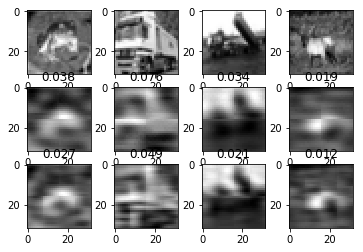

In [15]:
#DC_trainset = torch.utils.data.TensorDataset(DC_data,DC_data)
#DC_trainloader = torch.utils.data.DataLoader(DC_trainset, batch_size=batch_size,shuffle=True)
#dataiter = iter(testloader)
#images, labels = dataiter.next()
r = 16
GPU=False

trainednet16 = DeepCodec(r)
pathtoweights = './weights/trained/r=16/epoch_5000.weights'
trainednet16.load_state_dict(torch.load(pathtoweights))

trainednet8 = DeepCodec(8)
pathtoweights8 = './weights/trained/r=8/epoch_5000.weights'
trainednet8.load_state_dict(torch.load(pathtoweights8))

if GPU:
    untrainednet.cuda()
    trainednet.cuda()
for i in range(4):
    img = batchtoimg(DC_data[2*i:2*(i+1)])
    plt.subplot(3,4,i+1)
    # print images
    imshow(img)
    
    inputVal = Variable(DC_data[2*i:2*(i+1)])
    if GPU:
        inputVal = inputVal.cuda()
    output = trainednet16(inputVal)
    netimg = batchtoimg(output.data)
    plt.subplot(3,4,4+i+1)
    imshow(netimg)
    plt.title('%.3f' % torch.mean((img-netimg)**2))
    
    output2 = trainednet8(inputVal)
    netimg2 = batchtoimg(output2.data)
    plt.subplot(3,4,8+i+1)
    imshow(netimg2)
    plt.title('%.3f' % torch.mean((img-netimg2)**2))


# Calculate MSE

In [50]:
numdata = DC_data.shape[0]
train_mses8 = np.zeros(numdata)
train_mses16 = np.zeros(numdata)
GPU = True
if GPU:
    trainednet16.cuda()
    trainednet8.cuda()
    
trainloader = torch.utils.data.DataLoader(DC_data, batch_size=100,shuffle=False)
for ii,data in enumerate(trainloader):
    if GPU:
        inputVal = Variable(data.cuda())
    else:
        inputVal = Variable(data)
    
    output = trainednet8(inputVal)
    train_mses8[ii*100:(ii+1)*100] = torch.mean((inputVal.data - output.data)**2,1)[:,0]
    
    output2 = trainednet16(inputVal)
    train_mses16[ii*100:(ii+1)*100] = torch.mean((inputVal.data - output2.data)**2,1)[:,0]
print('R=8, Training MSE = %.4f' % np.mean(train_mses8))
print('R=16, Training MSE = %.4f' % np.mean(train_mses16))



R=8, Training MSE = 0.0245
R=16, Training MSE = 0.0371


In [51]:
testloader = torch.utils.data.DataLoader(DC_testdata, batch_size=100,shuffle=False)
test_mses8 = np.zeros(DC_testdata.shape[0])
test_mses16 = np.zeros(DC_testdata.shape[0])

for ii,data in enumerate(testloader):
    if GPU:
        inputVal = Variable(data.cuda())
    else:
        inputVal = Variable(data)
    
    output = trainednet8(inputVal)
    test_mses8[ii*100:(ii+1)*100] = torch.mean((inputVal.data - output.data)**2,1)[:,0]
    
    output2 = trainednet16(inputVal)
    test_mses16[ii*100:(ii+1)*100] = torch.mean((inputVal.data - output2.data)**2,1)[:,0]
print('R=8, Training MSE = %.4f' % np.mean(test_mses8))
print('R=16, Training MSE = %.4f' % np.mean(test_mses16))

R=8, Training MSE = 0.0246
R=16, Training MSE = 0.0372


# Compare Results to DCT Coefficients

In [52]:
from scipy.fftpack import idct, dct

In [59]:
def dct2(img):
    return dct(dct(img, norm='ortho',axis=0),norm='ortho',axis=1)
def idct2(img):
    return idct(idct(test2, norm='ortho',axis=0),norm='ortho',axis=1)
index8 = np.zeros(32,32)

    
    

In [62]:
test = np.eye(3)
test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [65]:
temp = np.arange(9).reshape(3,3)
temp[test==0] = 0
temp

array([[0, 0, 0],
       [0, 4, 0],
       [0, 0, 8]])

# Test dataset size

In [9]:
N = 512
r = 8
GPU = True
batch_size = 1000
net = DeepCodec(r)
if GPU:
    net.cuda()
DC_trainset = torch.utils.data.TensorDataset(DC_data,DC_data)
DC_trainloader = torch.utils.data.DataLoader(DC_trainset, batch_size=batch_size,shuffle=True)
train_net(net, DC_trainloader, num_epochs=5000, GPU=GPU,
          weightpath='./weights/',save_epoch=500,
          lr=0.001,momentum=0.9,saveweights=True)

	[1,     1] loss: 0.024, 0.072 seconds elapsed
	[1,    11] loss: 0.232, 0.736 seconds elapsed
	[1,    21] loss: 0.232, 1.129 seconds elapsed
	[1,    31] loss: 0.231, 1.501 seconds elapsed
	[1,    41] loss: 0.232, 1.958 seconds elapsed
	[1,    51] loss: 0.233, 2.347 seconds elapsed
	[1,    61] loss: 0.233, 2.708 seconds elapsed
	[1,    71] loss: 0.232, 3.175 seconds elapsed
	[1,    81] loss: 0.230, 3.557 seconds elapsed
	[1,    91] loss: 0.234, 3.914 seconds elapsed
Epoch 1 Training Time: 4.326 seconds
Total Elapsed Time: 4.326 seconds
	[2,     1] loss: 0.024, 0.038 seconds elapsed
	[2,    11] loss: 0.231, 0.398 seconds elapsed
	[2,    21] loss: 0.229, 0.746 seconds elapsed
	[2,    31] loss: 0.228, 1.203 seconds elapsed
	[2,    41] loss: 0.231, 1.560 seconds elapsed
	[2,    51] loss: 0.229, 2.006 seconds elapsed
	[2,    61] loss: 0.228, 2.363 seconds elapsed
	[2,    71] loss: 0.231, 2.727 seconds elapsed
	[2,    81] loss: 0.227, 3.176 seconds elapsed
	[2,    91] loss: 0.230, 3.531 secon

KeyboardInterrupt: 

In [10]:

N = 512
r = 8
GPU = True
for batch_size in [5, 100, 500, 1000, 5000, 10000]:
    print('Testing batch size = %i' % (batch_size))
    net = DeepCodec(r)
    if GPU:
        net.cuda()
    DC_trainset = torch.utils.data.TensorDataset(DC_data,DC_data)
    DC_trainloader = torch.utils.data.DataLoader(DC_trainset, batch_size=batch_size,shuffle=True)
    train_net(net, DC_trainloader, num_epochs=1, GPU=GPU,
              weightpath='./weights/',save_epoch=250,
              lr=0.001,momentum=0.9,saveweights=False)

Testing batch size = 5
	[1,  2000] loss: 0.116, 15.046 seconds elapsed
	[1,  4000] loss: 0.080, 30.212 seconds elapsed
	[1,  6000] loss: 0.070, 46.152 seconds elapsed
	[1,  8000] loss: 0.064, 60.693 seconds elapsed
	[1, 10000] loss: 0.062, 75.078 seconds elapsed
	[1, 12000] loss: 0.060, 89.378 seconds elapsed
	[1, 14000] loss: 0.059, 103.848 seconds elapsed
	[1, 16000] loss: 0.058, 118.490 seconds elapsed
	[1, 18000] loss: 0.058, 133.849 seconds elapsed
	[1, 20000] loss: 0.058, 148.748 seconds elapsed
Epoch 1 Training Time: 148.749 seconds
Total Elapsed Time: 148.749 seconds
Finished Training
Testing batch size = 100
Epoch 1 Training Time: 13.742 seconds
Total Elapsed Time: 13.742 seconds
Finished Training
Testing batch size = 500
Epoch 1 Training Time: 9.985 seconds
Total Elapsed Time: 9.985 seconds
Finished Training
Testing batch size = 1000
Epoch 1 Training Time: 10.003 seconds
Total Elapsed Time: 10.003 seconds
Finished Training
Testing batch size = 5000
Epoch 1 Training Time: 10.4

## Without GPU

In [11]:
N = 512
r = 8
GPU = False
for batch_size in [5, 100, 500, 1000, 5000, 10000]:
    print('Testing batch size = %i' % (batch_size))
    net = DeepCodec(r)
    if GPU:
        net.cuda()
    DC_trainset = torch.utils.data.TensorDataset(DC_data,DC_data)
    DC_trainloader = torch.utils.data.DataLoader(DC_trainset, batch_size=batch_size,shuffle=True)
    train_net(net, DC_trainloader, num_epochs=1, GPU=GPU,
              weightpath='./weights/',save_epoch=250,
              lr=0.001,momentum=0.9,saveweights=False)

Testing batch size = 5
	[1,  2000] loss: 0.108, 8.632 seconds elapsed
	[1,  4000] loss: 0.080, 17.260 seconds elapsed
	[1,  6000] loss: 0.073, 25.863 seconds elapsed
	[1,  8000] loss: 0.069, 34.485 seconds elapsed
	[1, 10000] loss: 0.067, 43.121 seconds elapsed
	[1, 12000] loss: 0.063, 51.723 seconds elapsed
	[1, 14000] loss: 0.061, 60.305 seconds elapsed
	[1, 16000] loss: 0.061, 68.984 seconds elapsed
	[1, 18000] loss: 0.058, 77.594 seconds elapsed
	[1, 20000] loss: 0.056, 86.222 seconds elapsed
Epoch 1 Training Time: 86.223 seconds
Total Elapsed Time: 86.223 seconds
Finished Training
Testing batch size = 100
Epoch 1 Training Time: 124.523 seconds
Total Elapsed Time: 124.523 seconds
Finished Training
Testing batch size = 500
Epoch 1 Training Time: 123.234 seconds
Total Elapsed Time: 123.234 seconds
Finished Training
Testing batch size = 1000
Epoch 1 Training Time: 125.056 seconds
Total Elapsed Time: 125.056 seconds
Finished Training
Testing batch size = 5000
Epoch 1 Training Time: 129

	[1,  2000] loss: 0.133, 16.149 seconds elapsed
	[1,  4000] loss: 0.084, 30.454 seconds elapsed
	[1,  6000] loss: 0.076, 44.972 seconds elapsed
	[1,  8000] loss: 0.069, 59.767 seconds elapsed
	[1, 10000] loss: 0.064, 74.437 seconds elapsed
	[1, 12000] loss: 0.063, 89.137 seconds elapsed
	[1, 14000] loss: 0.061, 103.913 seconds elapsed
	[1, 16000] loss: 0.059, 118.704 seconds elapsed
	[1, 18000] loss: 0.058, 133.259 seconds elapsed
	[1, 20000] loss: 0.057, 147.871 seconds elapsed
Epoch 1 Training Time: 147.871 seconds
Total Elapsed Time: 147.871 seconds
Finished Training


## Example Reload Net

In [39]:
# Prepare Data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                         shuffle=False, num_workers=2)


DC_testdata = torch.zeros(2*len(testset),512,1)
for i,data in enumerate(testset):
    images, labels = data
    gray = rgbtogray(images)
    H,W = gray.size()
    H2 = int(H/2)
    DC_data[2*i] = gray[:H2,:].view(512,1)
    DC_data[2*i+1] = gray[H2:,:].view(512,1)



Files already downloaded and verified


In [8]:
DC_testset = torch.utils.data.TensorDataset(DC_testdata,DC_testdata)
DC_testloader = torch.utils.data.DataLoader(DC_testset, batch_size=2,shuffle=False)

In [9]:
# Load Weights

pathtoweights='./weights/trained/2018-04-01_23-58-55_trained/epoch_1001.weights'
r=8
trainednet = DeepCodec(r)
trainednet.load_state_dict(torch.load(pathtoweights))


In [11]:
dataiter = iter(DC_testloader)
images, labels = dataiter.next()

In [13]:
outputs = trainednet(Variable(images))


In [32]:
DC_testdata.size()

torch.Size([20000, 512, 1])

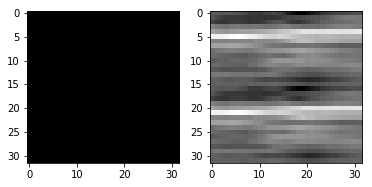

In [34]:
xhat = batchtoimg(outputs.data)
x = batchtoimg(DC_testdata[:2])
plt.figure()
plt.subplot(121)
imshow(x)
plt.subplot(122)
imshow(xhat)

In [172]:

for i in range(2):
    img, label = faketrainset[i]
    loss = F.mse_loss(Variable(img),Variable(label))
    print(loss[0])
    rimg = net.forward(Variable(img.unsqueeze(0)))
    print(F.mse_loss(rimg,Variable(label)))
    rimg = net2.forward(Variable(img.unsqueeze(0)))
    print(F.mse_loss(rimg,Variable(label)))
    #plt.figure()
    #plt.imshow()

Variable containing:
 0
[torch.FloatTensor of size 1]

Variable containing:
 1.0126
[torch.FloatTensor of size 1]

Variable containing:
 1.0126
[torch.FloatTensor of size 1]

Variable containing:
 0
[torch.FloatTensor of size 1]

Variable containing:
 1.0329
[torch.FloatTensor of size 1]

Variable containing:
 1.0329
[torch.FloatTensor of size 1]



In [4]:
N = 512
r = 8
GPU = True
for batch_size in [1000]:#[500, 1000, 5000, 10000]:
    print('Testing batch size = %i' % (batch_size))
    net = DeepCodec(r)
    if GPU:
        net.cuda()
    DC_trainset = torch.utils.data.TensorDataset(DC_data,DC_data)
    DC_trainloader = torch.utils.data.DataLoader(DC_trainset, batch_size=batch_size,shuffle=True)
    train_net(net, DC_trainloader, num_epochs=8, GPU=GPU,
              weightpath='./weights/',save_epoch=2,
              lr=0.001,momentum=0.9,saveweights=False)

Testing batch size = 1000
	[1,     1] loss: 0.024, 0.861 seconds elapsed
	[1,    11] loss: 0.232, 1.716 seconds elapsed
	[1,    21] loss: 0.230, 2.483 seconds elapsed
	[1,    31] loss: 0.230, 3.264 seconds elapsed
	[1,    41] loss: 0.231, 4.025 seconds elapsed
	[1,    51] loss: 0.230, 4.808 seconds elapsed
	[1,    61] loss: 0.229, 5.566 seconds elapsed
	[1,    71] loss: 0.230, 6.350 seconds elapsed
	[1,    81] loss: 0.224, 7.108 seconds elapsed
	[1,    91] loss: 0.227, 7.865 seconds elapsed
Epoch 1 Training Time: 8.568 seconds
Total Elapsed Time: 8.568 seconds
	[2,     1] loss: 0.023, 0.077 seconds elapsed
	[2,    11] loss: 0.225, 0.837 seconds elapsed
	[2,    21] loss: 0.223, 1.618 seconds elapsed
	[2,    31] loss: 0.220, 2.373 seconds elapsed
	[2,    41] loss: 0.213, 3.151 seconds elapsed
	[2,    51] loss: 0.202, 3.909 seconds elapsed
	[2,    61] loss: 0.180, 4.689 seconds elapsed
	[2,    71] loss: 0.167, 5.452 seconds elapsed
	[2,    81] loss: 0.158, 6.242 seconds elapsed
	[2,    91

In [10]:
temp = ''
for i in range(4):
    temp += '%i\t%f\t%f\t%f\n' % (1,float(10.0)/10,5,5)
temp

'1\t1.000000\t5.000000\t5.000000\n1\t1.000000\t5.000000\t5.000000\n1\t1.000000\t5.000000\t5.000000\n1\t1.000000\t5.000000\t5.000000\n'

In [23]:
len(DC_trainloader)
DC_trainloader.batch_size


10000

In [16]:
print('Test {}'.format((1.1234)))

Test 1.1234
